## Code actionnable 

L'idee du code actionnable est de produire un code sur lequel on puisse appliquer des transformations lineaires simples : rotations, translations, homoteties.

On étudie le melange de deux flux d'information, l'un étant l'identité (invariant selon les poses), l'autre etant l'action (l'information spatiale) appliquee sur l'objet.


en entrée : x uniquement

**Idee principale : l' encodeur produit un code latent selon le principe VAE (dimension 4). 
Ce code latent est "divisé" en 2 composantes (maximalement independants de par la contrainte KL).**

les 2 premieres composantes servent à "agir sur le code" en le translatant. Elles doivent donc selectionner une information spatiale utile à l'encodage de la position.

Les 2 dernieres composantes sont utilisées comme entree d'un classifieur **supervisé**. Elles doivent donc selectionner une information utile à la classification.

La couche intermediaire (dim 256) utile à la classification est ensuite projetee sur un espace de caracteristiques n x 2D. 

la translation est appliquee uniformement à toutes les caracteristiques

validation du code par reconstruction de x en sortie (BCE Loss)



In [1]:
%matplotlib inline

In [2]:
from Where_act_code_VAE_classif_alt import init
args = init(verbose=1, epochs=10)
print('Parameters=', args)

Parameters= {'momentum': 0.48, 'epochs': 10, 'dimension': 25, 'batch_size': 50, 'mean': 0.0, 'seed': 42, 'lr': 0.001, 'no_cuda': True, 'num_processes': 1, 'log_interval': 10, 'std': 1.0, 'verbose': 1, 'valid_size': 0.2, 'test_batch_size': 1, 'size': 64}


In [3]:
import numpy as np
import torch

In [4]:
import easydict

## Réseau de neurones

### Lancer l'apprentissage ou charger les données

In [5]:
path = '2018-07-26_actionnable_code_VAE_classif_alt_latent256.pt'

In [6]:
!ls -l {path}
!rm {path}

ls: impossible d'accéder à '2018-07-26_actionnable_code_VAE_classif_BIAS.pt': Aucun fichier ou dossier de ce type
rm: impossible de supprimer '2018-07-26_actionnable_code_VAE_classif_BIAS.pt': Aucun fichier ou dossier de ce type


In [7]:
from Where_act_code_VAE_classif_alt import ML
ml = ML(args)

cuda? False


(<matplotlib.figure.Figure at 0x7f6028d62b00>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5ff1549f28>)

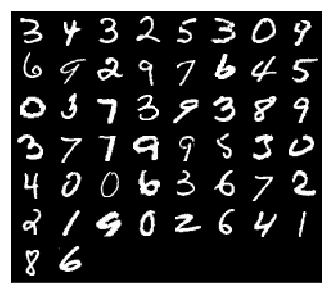

In [8]:
ml.dataset.show()

In [9]:
print(ml.model)

Net(
  (conv1): Conv2d(1, 16, kernel_size=(4, 4), stride=(4, 4))
  (conv2): Conv2d(16, 64, kernel_size=(4, 4), stride=(4, 4))
  (conv3): Conv2d(64, 256, kernel_size=(4, 4), stride=(4, 4))
  (fc_x): Linear(in_features=256, out_features=32, bias=False)
  (fc_mu): Linear(in_features=32, out_features=4, bias=False)
  (fc_logvar): Linear(in_features=32, out_features=4, bias=False)
  (fc_classif_1): Linear(in_features=2, out_features=32, bias=True)
  (fc_classif_2): Linear(in_features=32, out_features=10, bias=True)
  (fc_z_d1): Linear(in_features=32, out_features=32, bias=True)
  (fc_z_d2): Linear(in_features=32, out_features=32, bias=True)
  (deconv3): ConvTranspose2d(256, 64, kernel_size=(4, 4), stride=(4, 4))
  (deconv2): ConvTranspose2d(64, 16, kernel_size=(4, 4), stride=(4, 4))
  (deconv1): ConvTranspose2d(16, 1, kernel_size=(4, 4), stride=(4, 4))
  (fc_z): Linear(in_features=256, out_features=10, bias=False)
)


In [10]:
ml.args.epochs = 1000

In [11]:
#ml.model.fc_logvar.weight

In [12]:
#ml.model.fc_logvar.weight

In [13]:
#ml.model.fc_mu.weight

In [14]:
#ml.model.fc_mu.weight

In [15]:
ml.train(None)

Train Epoch
	Train Epoch: 1 [0/60000 (0%)]	classif Loss: 295.10	BCE_loss: 2845.36	KL: 0.00	Accuracy: 0.08
	Train Epoch: 1 [500/60000 (1%)]	classif Loss: 296.71	BCE_loss: 2301.74	KL: 0.06	Accuracy: 0.06
	Train Epoch: 1 [1000/60000 (2%)]	classif Loss: 296.29	BCE_loss: 802.68	KL: 12.74	Accuracy: 0.10
	Train Epoch: 1 [1500/60000 (2%)]	classif Loss: 292.69	BCE_loss: 577.72	KL: 3.86	Accuracy: 0.12
	Train Epoch: 1 [2000/60000 (3%)]	classif Loss: 298.78	BCE_loss: 505.77	KL: 0.04	Accuracy: 0.06
	Train Epoch: 1 [2500/60000 (4%)]	classif Loss: 299.25	BCE_loss: 463.37	KL: 0.01	Accuracy: 0.06
	Train Epoch: 1 [3000/60000 (5%)]	classif Loss: 299.36	BCE_loss: 458.36	KL: 0.01	Accuracy: 0.14
	Train Epoch: 1 [3500/60000 (6%)]	classif Loss: 295.13	BCE_loss: 426.63	KL: 0.03	Accuracy: 0.18
	Train Epoch: 1 [4000/60000 (7%)]	classif Loss: 299.05	BCE_loss: 491.55	KL: 0.35	Accuracy: 0.10
	Train Epoch: 1 [4500/60000 (8%)]	classif Loss: 297.13	BCE_loss: 466.14	KL: 1.87	Accuracy: 0.08
	Train Epoch: 1 [5000/60000 (

	Train Epoch: 1 [42000/60000 (70%)]	classif Loss: 296.20	BCE_loss: 419.20	KL: 7.06	Accuracy: 0.10
	Train Epoch: 1 [42500/60000 (71%)]	classif Loss: 294.73	BCE_loss: 415.16	KL: 5.56	Accuracy: 0.06
	Train Epoch: 1 [43000/60000 (72%)]	classif Loss: 295.81	BCE_loss: 439.92	KL: 8.04	Accuracy: 0.06
	Train Epoch: 1 [43500/60000 (72%)]	classif Loss: 297.08	BCE_loss: 425.57	KL: 6.64	Accuracy: 0.06
	Train Epoch: 1 [44000/60000 (73%)]	classif Loss: 295.37	BCE_loss: 431.01	KL: 7.82	Accuracy: 0.12
	Train Epoch: 1 [44500/60000 (74%)]	classif Loss: 294.02	BCE_loss: 379.07	KL: 4.49	Accuracy: 0.10
	Train Epoch: 1 [45000/60000 (75%)]	classif Loss: 295.73	BCE_loss: 417.73	KL: 5.41	Accuracy: 0.06
	Train Epoch: 1 [45500/60000 (76%)]	classif Loss: 295.31	BCE_loss: 393.19	KL: 4.49	Accuracy: 0.04
	Train Epoch: 1 [46000/60000 (77%)]	classif Loss: 292.44	BCE_loss: 368.95	KL: 2.33	Accuracy: 0.12
	Train Epoch: 1 [46500/60000 (78%)]	classif Loss: 295.39	BCE_loss: 429.44	KL: 5.62	Accuracy: 0.04
	Train Epoch: 1 [470

	Train Epoch: 2 [24000/60000 (40%)]	classif Loss: 295.90	BCE_loss: 387.40	KL: 6.34	Accuracy: 0.10
	Train Epoch: 2 [24500/60000 (41%)]	classif Loss: 292.05	BCE_loss: 397.69	KL: 9.71	Accuracy: 0.20
	Train Epoch: 2 [25000/60000 (42%)]	classif Loss: 296.24	BCE_loss: 372.57	KL: 5.83	Accuracy: 0.08
	Train Epoch: 2 [25500/60000 (42%)]	classif Loss: 294.61	BCE_loss: 395.16	KL: 7.44	Accuracy: 0.18
	Train Epoch: 2 [26000/60000 (43%)]	classif Loss: 296.82	BCE_loss: 423.86	KL: 7.27	Accuracy: 0.10
	Train Epoch: 2 [26500/60000 (44%)]	classif Loss: 295.50	BCE_loss: 368.88	KL: 7.26	Accuracy: 0.04
	Train Epoch: 2 [27000/60000 (45%)]	classif Loss: 297.49	BCE_loss: 419.03	KL: 8.26	Accuracy: 0.10
	Train Epoch: 2 [27500/60000 (46%)]	classif Loss: 293.85	BCE_loss: 384.26	KL: 5.29	Accuracy: 0.18
	Train Epoch: 2 [28000/60000 (47%)]	classif Loss: 294.36	BCE_loss: 441.17	KL: 7.92	Accuracy: 0.18
	Train Epoch: 2 [28500/60000 (48%)]	classif Loss: 294.34	BCE_loss: 408.84	KL: 10.28	Accuracy: 0.14
	Train Epoch: 2 [29

	Train Epoch: 3 [6000/60000 (10%)]	classif Loss: 295.37	BCE_loss: 371.67	KL: 16.33	Accuracy: 0.08
	Train Epoch: 3 [6500/60000 (11%)]	classif Loss: 293.85	BCE_loss: 357.01	KL: 14.39	Accuracy: 0.04
	Train Epoch: 3 [7000/60000 (12%)]	classif Loss: 296.56	BCE_loss: 384.19	KL: 19.31	Accuracy: 0.04
	Train Epoch: 3 [7500/60000 (12%)]	classif Loss: 295.14	BCE_loss: 389.11	KL: 16.30	Accuracy: 0.16
	Train Epoch: 3 [8000/60000 (13%)]	classif Loss: 296.93	BCE_loss: 401.78	KL: 18.12	Accuracy: 0.04
	Train Epoch: 3 [8500/60000 (14%)]	classif Loss: 292.30	BCE_loss: 377.92	KL: 25.74	Accuracy: 0.20
	Train Epoch: 3 [9000/60000 (15%)]	classif Loss: 294.81	BCE_loss: 365.11	KL: 14.88	Accuracy: 0.08
	Train Epoch: 3 [9500/60000 (16%)]	classif Loss: 294.99	BCE_loss: 364.62	KL: 18.10	Accuracy: 0.12
	Train Epoch: 3 [10000/60000 (17%)]	classif Loss: 294.27	BCE_loss: 393.46	KL: 24.62	Accuracy: 0.12
	Train Epoch: 3 [10500/60000 (18%)]	classif Loss: 294.86	BCE_loss: 378.87	KL: 19.61	Accuracy: 0.12
	Train Epoch: 3 [1

	Train Epoch: 3 [47500/60000 (79%)]	classif Loss: 294.50	BCE_loss: 365.85	KL: 27.31	Accuracy: 0.04
	Train Epoch: 3 [48000/60000 (80%)]	classif Loss: 293.75	BCE_loss: 382.26	KL: 21.80	Accuracy: 0.14
	Train Epoch: 3 [48500/60000 (81%)]	classif Loss: 297.53	BCE_loss: 406.88	KL: 25.81	Accuracy: 0.08
	Train Epoch: 3 [49000/60000 (82%)]	classif Loss: 293.79	BCE_loss: 382.68	KL: 29.78	Accuracy: 0.12
	Train Epoch: 3 [49500/60000 (82%)]	classif Loss: 295.52	BCE_loss: 362.47	KL: 21.99	Accuracy: 0.08
	Train Epoch: 3 [50000/60000 (83%)]	classif Loss: 294.58	BCE_loss: 347.77	KL: 26.18	Accuracy: 0.12
	Train Epoch: 3 [50500/60000 (84%)]	classif Loss: 293.18	BCE_loss: 387.77	KL: 28.15	Accuracy: 0.12
	Train Epoch: 3 [51000/60000 (85%)]	classif Loss: 295.78	BCE_loss: 364.48	KL: 23.74	Accuracy: 0.14
	Train Epoch: 3 [51500/60000 (86%)]	classif Loss: 294.86	BCE_loss: 382.92	KL: 27.84	Accuracy: 0.12
	Train Epoch: 3 [52000/60000 (87%)]	classif Loss: 295.84	BCE_loss: 366.22	KL: 31.13	Accuracy: 0.10
	Train Epo

	Train Epoch: 4 [29500/60000 (49%)]	classif Loss: 293.06	BCE_loss: 371.63	KL: 38.77	Accuracy: 0.10
	Train Epoch: 4 [30000/60000 (50%)]	classif Loss: 293.57	BCE_loss: 374.78	KL: 39.10	Accuracy: 0.10
	Train Epoch: 4 [30500/60000 (51%)]	classif Loss: 293.84	BCE_loss: 370.59	KL: 36.48	Accuracy: 0.14
	Train Epoch: 4 [31000/60000 (52%)]	classif Loss: 295.16	BCE_loss: 369.15	KL: 36.50	Accuracy: 0.08
	Train Epoch: 4 [31500/60000 (52%)]	classif Loss: 291.88	BCE_loss: 352.15	KL: 35.82	Accuracy: 0.22
	Train Epoch: 4 [32000/60000 (53%)]	classif Loss: 295.72	BCE_loss: 376.76	KL: 35.99	Accuracy: 0.14
	Train Epoch: 4 [32500/60000 (54%)]	classif Loss: 298.43	BCE_loss: 376.00	KL: 35.61	Accuracy: 0.04
	Train Epoch: 4 [33000/60000 (55%)]	classif Loss: 299.02	BCE_loss: 384.98	KL: 42.03	Accuracy: 0.08
	Train Epoch: 4 [33500/60000 (56%)]	classif Loss: 293.47	BCE_loss: 340.85	KL: 32.13	Accuracy: 0.18
	Train Epoch: 4 [34000/60000 (57%)]	classif Loss: 294.21	BCE_loss: 338.65	KL: 29.93	Accuracy: 0.12
	Train Epo

	Train Epoch: 5 [11500/60000 (19%)]	classif Loss: 295.80	BCE_loss: 372.02	KL: 40.25	Accuracy: 0.14
	Train Epoch: 5 [12000/60000 (20%)]	classif Loss: 296.64	BCE_loss: 359.76	KL: 47.31	Accuracy: 0.08
	Train Epoch: 5 [12500/60000 (21%)]	classif Loss: 295.84	BCE_loss: 376.14	KL: 40.54	Accuracy: 0.14
	Train Epoch: 5 [13000/60000 (22%)]	classif Loss: 293.97	BCE_loss: 355.11	KL: 46.49	Accuracy: 0.08
	Train Epoch: 5 [13500/60000 (22%)]	classif Loss: 296.78	BCE_loss: 373.13	KL: 45.15	Accuracy: 0.08
	Train Epoch: 5 [14000/60000 (23%)]	classif Loss: 296.75	BCE_loss: 382.22	KL: 46.96	Accuracy: 0.10
	Train Epoch: 5 [14500/60000 (24%)]	classif Loss: 293.46	BCE_loss: 357.27	KL: 46.77	Accuracy: 0.10
	Train Epoch: 5 [15000/60000 (25%)]	classif Loss: 294.24	BCE_loss: 360.84	KL: 46.25	Accuracy: 0.08
	Train Epoch: 5 [15500/60000 (26%)]	classif Loss: 293.75	BCE_loss: 335.37	KL: 43.94	Accuracy: 0.16
	Train Epoch: 5 [16000/60000 (27%)]	classif Loss: 293.31	BCE_loss: 368.67	KL: 48.73	Accuracy: 0.10
	Train Epo

	Train Epoch: 5 [53000/60000 (88%)]	classif Loss: 291.69	BCE_loss: 351.82	KL: 51.43	Accuracy: 0.16
	Train Epoch: 5 [53500/60000 (89%)]	classif Loss: 296.71	BCE_loss: 355.05	KL: 55.20	Accuracy: 0.06
	Train Epoch: 5 [54000/60000 (90%)]	classif Loss: 293.77	BCE_loss: 374.68	KL: 50.73	Accuracy: 0.06
	Train Epoch: 5 [54500/60000 (91%)]	classif Loss: 292.45	BCE_loss: 328.86	KL: 42.63	Accuracy: 0.14
	Train Epoch: 5 [55000/60000 (92%)]	classif Loss: 294.10	BCE_loss: 331.57	KL: 48.40	Accuracy: 0.06
	Train Epoch: 5 [55500/60000 (92%)]	classif Loss: 293.36	BCE_loss: 361.17	KL: 53.03	Accuracy: 0.20
	Train Epoch: 5 [56000/60000 (93%)]	classif Loss: 294.30	BCE_loss: 332.36	KL: 51.37	Accuracy: 0.12
	Train Epoch: 5 [56500/60000 (94%)]	classif Loss: 297.04	BCE_loss: 333.36	KL: 52.00	Accuracy: 0.16
	Train Epoch: 5 [57000/60000 (95%)]	classif Loss: 294.32	BCE_loss: 360.85	KL: 42.48	Accuracy: 0.12
	Train Epoch: 5 [57500/60000 (96%)]	classif Loss: 295.79	BCE_loss: 338.60	KL: 47.67	Accuracy: 0.14
	Train Epo

	Train Epoch: 6 [35000/60000 (58%)]	classif Loss: 295.72	BCE_loss: 344.91	KL: 49.73	Accuracy: 0.10
	Train Epoch: 6 [35500/60000 (59%)]	classif Loss: 293.82	BCE_loss: 333.12	KL: 55.70	Accuracy: 0.08
	Train Epoch: 6 [36000/60000 (60%)]	classif Loss: 290.32	BCE_loss: 339.74	KL: 54.40	Accuracy: 0.10
	Train Epoch: 6 [36500/60000 (61%)]	classif Loss: 287.02	BCE_loss: 328.42	KL: 54.13	Accuracy: 0.28
	Train Epoch: 6 [37000/60000 (62%)]	classif Loss: 290.39	BCE_loss: 334.93	KL: 57.88	Accuracy: 0.18
	Train Epoch: 6 [37500/60000 (62%)]	classif Loss: 292.49	BCE_loss: 339.90	KL: 48.16	Accuracy: 0.12
	Train Epoch: 6 [38000/60000 (63%)]	classif Loss: 297.51	BCE_loss: 334.88	KL: 48.21	Accuracy: 0.18
	Train Epoch: 6 [38500/60000 (64%)]	classif Loss: 288.68	BCE_loss: 330.10	KL: 70.77	Accuracy: 0.18
	Train Epoch: 6 [39000/60000 (65%)]	classif Loss: 290.95	BCE_loss: 342.68	KL: 52.45	Accuracy: 0.10
	Train Epoch: 6 [39500/60000 (66%)]	classif Loss: 295.86	BCE_loss: 338.96	KL: 59.35	Accuracy: 0.10
	Train Epo

Process Process-7:
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.5/dist-packages/torch/utils/data/dataloader.py", line 52, in _worker_loop
    r = index_queue.get()
  File "/usr/lib/python3.5/multiprocessing/queues.py", line 343, in get
    res = self._reader.recv_bytes()
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
KeyboardInterrupt


KeyboardInterrupt: 

In [17]:
ml.train(None)

Train Epoch
	Train Epoch: 1 [0/60000 (0%)]	classif Loss: 294.22	BCE_loss: 335.86	KL: 61.28	Accuracy: 0.18
	Train Epoch: 1 [500/60000 (1%)]	classif Loss: 291.44	BCE_loss: 344.59	KL: 60.91	Accuracy: 0.10
	Train Epoch: 1 [1000/60000 (2%)]	classif Loss: 289.33	BCE_loss: 343.23	KL: 64.41	Accuracy: 0.18
	Train Epoch: 1 [1500/60000 (2%)]	classif Loss: 291.94	BCE_loss: 327.84	KL: 58.53	Accuracy: 0.16
	Train Epoch: 1 [2000/60000 (3%)]	classif Loss: 289.32	BCE_loss: 338.97	KL: 57.04	Accuracy: 0.12
	Train Epoch: 1 [2500/60000 (4%)]	classif Loss: 290.04	BCE_loss: 331.07	KL: 66.31	Accuracy: 0.14
	Train Epoch: 1 [3000/60000 (5%)]	classif Loss: 290.52	BCE_loss: 364.92	KL: 58.84	Accuracy: 0.12
	Train Epoch: 1 [3500/60000 (6%)]	classif Loss: 293.13	BCE_loss: 335.75	KL: 52.27	Accuracy: 0.10
	Train Epoch: 1 [4000/60000 (7%)]	classif Loss: 294.16	BCE_loss: 336.02	KL: 61.80	Accuracy: 0.08
	Train Epoch: 1 [4500/60000 (8%)]	classif Loss: 296.88	BCE_loss: 342.32	KL: 57.41	Accuracy: 0.04
	Train Epoch: 1 [5000/

	Train Epoch: 1 [41500/60000 (69%)]	classif Loss: 262.41	BCE_loss: 357.62	KL: 87.46	Accuracy: 0.28
	Train Epoch: 1 [42000/60000 (70%)]	classif Loss: 274.71	BCE_loss: 312.54	KL: 75.84	Accuracy: 0.16
	Train Epoch: 1 [42500/60000 (71%)]	classif Loss: 272.66	BCE_loss: 329.38	KL: 76.27	Accuracy: 0.08
	Train Epoch: 1 [43000/60000 (72%)]	classif Loss: 267.71	BCE_loss: 310.91	KL: 70.90	Accuracy: 0.14
	Train Epoch: 1 [43500/60000 (72%)]	classif Loss: 283.26	BCE_loss: 326.30	KL: 63.58	Accuracy: 0.14
	Train Epoch: 1 [44000/60000 (73%)]	classif Loss: 278.81	BCE_loss: 309.29	KL: 83.91	Accuracy: 0.12
	Train Epoch: 1 [44500/60000 (74%)]	classif Loss: 278.61	BCE_loss: 328.26	KL: 67.00	Accuracy: 0.12
	Train Epoch: 1 [45000/60000 (75%)]	classif Loss: 264.07	BCE_loss: 337.35	KL: 86.15	Accuracy: 0.18
	Train Epoch: 1 [45500/60000 (76%)]	classif Loss: 273.09	BCE_loss: 340.65	KL: 86.40	Accuracy: 0.18
	Train Epoch: 1 [46000/60000 (77%)]	classif Loss: 277.75	BCE_loss: 322.59	KL: 71.47	Accuracy: 0.14
	Train Epo

	Train Epoch: 2 [23500/60000 (39%)]	classif Loss: 269.31	BCE_loss: 312.59	KL: 78.09	Accuracy: 0.24
	Train Epoch: 2 [24000/60000 (40%)]	classif Loss: 266.00	BCE_loss: 308.83	KL: 77.20	Accuracy: 0.24
	Train Epoch: 2 [24500/60000 (41%)]	classif Loss: 248.88	BCE_loss: 319.76	KL: 82.90	Accuracy: 0.32
	Train Epoch: 2 [25000/60000 (42%)]	classif Loss: 268.31	BCE_loss: 334.46	KL: 77.35	Accuracy: 0.20
	Train Epoch: 2 [25500/60000 (42%)]	classif Loss: 248.68	BCE_loss: 319.30	KL: 86.49	Accuracy: 0.24
	Train Epoch: 2 [26000/60000 (43%)]	classif Loss: 267.88	BCE_loss: 315.60	KL: 77.62	Accuracy: 0.20
	Train Epoch: 2 [26500/60000 (44%)]	classif Loss: 273.50	BCE_loss: 321.75	KL: 90.31	Accuracy: 0.14
	Train Epoch: 2 [27000/60000 (45%)]	classif Loss: 268.95	BCE_loss: 351.08	KL: 94.06	Accuracy: 0.16
	Train Epoch: 2 [27500/60000 (46%)]	classif Loss: 259.22	BCE_loss: 315.45	KL: 92.51	Accuracy: 0.22
	Train Epoch: 2 [28000/60000 (47%)]	classif Loss: 249.86	BCE_loss: 342.30	KL: 84.63	Accuracy: 0.22
	Train Epo

	Train Epoch: 3 [5000/60000 (8%)]	classif Loss: 285.28	BCE_loss: 287.40	KL: 83.15	Accuracy: 0.14
	Train Epoch: 3 [5500/60000 (9%)]	classif Loss: 244.38	BCE_loss: 305.00	KL: 94.47	Accuracy: 0.26
	Train Epoch: 3 [6000/60000 (10%)]	classif Loss: 262.22	BCE_loss: 322.30	KL: 72.41	Accuracy: 0.22
	Train Epoch: 3 [6500/60000 (11%)]	classif Loss: 265.63	BCE_loss: 309.89	KL: 81.72	Accuracy: 0.14
	Train Epoch: 3 [7000/60000 (12%)]	classif Loss: 260.12	BCE_loss: 334.41	KL: 101.35	Accuracy: 0.16
	Train Epoch: 3 [7500/60000 (12%)]	classif Loss: 254.36	BCE_loss: 303.68	KL: 88.20	Accuracy: 0.22
	Train Epoch: 3 [8000/60000 (13%)]	classif Loss: 275.22	BCE_loss: 330.05	KL: 78.70	Accuracy: 0.12
	Train Epoch: 3 [8500/60000 (14%)]	classif Loss: 248.10	BCE_loss: 318.66	KL: 86.75	Accuracy: 0.30
	Train Epoch: 3 [9000/60000 (15%)]	classif Loss: 273.32	BCE_loss: 328.64	KL: 90.18	Accuracy: 0.16
	Train Epoch: 3 [9500/60000 (16%)]	classif Loss: 261.67	BCE_loss: 310.98	KL: 76.53	Accuracy: 0.22
	Train Epoch: 3 [1000

	Train Epoch: 3 [46500/60000 (78%)]	classif Loss: 270.62	BCE_loss: 319.90	KL: 80.94	Accuracy: 0.16
	Train Epoch: 3 [47000/60000 (78%)]	classif Loss: 272.96	BCE_loss: 323.02	KL: 91.09	Accuracy: 0.22
	Train Epoch: 3 [47500/60000 (79%)]	classif Loss: 254.12	BCE_loss: 305.50	KL: 92.64	Accuracy: 0.22
	Train Epoch: 3 [48000/60000 (80%)]	classif Loss: 265.38	BCE_loss: 323.18	KL: 85.43	Accuracy: 0.18
	Train Epoch: 3 [48500/60000 (81%)]	classif Loss: 259.05	BCE_loss: 338.11	KL: 85.28	Accuracy: 0.16
	Train Epoch: 3 [49000/60000 (82%)]	classif Loss: 247.79	BCE_loss: 319.09	KL: 93.51	Accuracy: 0.30
	Train Epoch: 3 [49500/60000 (82%)]	classif Loss: 275.53	BCE_loss: 305.59	KL: 74.55	Accuracy: 0.16
	Train Epoch: 3 [50000/60000 (83%)]	classif Loss: 263.63	BCE_loss: 308.61	KL: 90.24	Accuracy: 0.24
	Train Epoch: 3 [50500/60000 (84%)]	classif Loss: 263.73	BCE_loss: 301.19	KL: 86.95	Accuracy: 0.26
	Train Epoch: 3 [51000/60000 (85%)]	classif Loss: 259.61	BCE_loss: 308.48	KL: 86.77	Accuracy: 0.24
	Train Epo

	Train Epoch: 4 [28500/60000 (48%)]	classif Loss: 257.23	BCE_loss: 334.14	KL: 90.03	Accuracy: 0.16
	Train Epoch: 4 [29000/60000 (48%)]	classif Loss: 242.35	BCE_loss: 300.94	KL: 90.69	Accuracy: 0.30
	Train Epoch: 4 [29500/60000 (49%)]	classif Loss: 245.07	BCE_loss: 309.61	KL: 92.74	Accuracy: 0.26
	Train Epoch: 4 [30000/60000 (50%)]	classif Loss: 273.23	BCE_loss: 333.81	KL: 95.86	Accuracy: 0.14
	Train Epoch: 4 [30500/60000 (51%)]	classif Loss: 247.76	BCE_loss: 318.55	KL: 104.58	Accuracy: 0.22
	Train Epoch: 4 [31000/60000 (52%)]	classif Loss: 245.27	BCE_loss: 310.97	KL: 93.17	Accuracy: 0.22
	Train Epoch: 4 [31500/60000 (52%)]	classif Loss: 227.58	BCE_loss: 318.90	KL: 103.45	Accuracy: 0.30
	Train Epoch: 4 [32000/60000 (53%)]	classif Loss: 256.54	BCE_loss: 307.79	KL: 86.96	Accuracy: 0.24
	Train Epoch: 4 [32500/60000 (54%)]	classif Loss: 289.96	BCE_loss: 341.11	KL: 84.28	Accuracy: 0.12
	Train Epoch: 4 [33000/60000 (55%)]	classif Loss: 268.83	BCE_loss: 325.74	KL: 91.81	Accuracy: 0.22
	Train E

	Train Epoch: 5 [10000/60000 (17%)]	classif Loss: 237.17	BCE_loss: 300.10	KL: 102.78	Accuracy: 0.26
	Train Epoch: 5 [10500/60000 (18%)]	classif Loss: 241.36	BCE_loss: 284.51	KL: 90.59	Accuracy: 0.32
	Train Epoch: 5 [11000/60000 (18%)]	classif Loss: 255.39	BCE_loss: 318.23	KL: 103.43	Accuracy: 0.16
	Train Epoch: 5 [11500/60000 (19%)]	classif Loss: 258.57	BCE_loss: 304.99	KL: 101.37	Accuracy: 0.22
	Train Epoch: 5 [12000/60000 (20%)]	classif Loss: 262.37	BCE_loss: 308.85	KL: 100.62	Accuracy: 0.20
	Train Epoch: 5 [12500/60000 (21%)]	classif Loss: 223.42	BCE_loss: 333.12	KL: 112.43	Accuracy: 0.28
	Train Epoch: 5 [13000/60000 (22%)]	classif Loss: 238.60	BCE_loss: 336.13	KL: 100.71	Accuracy: 0.18
	Train Epoch: 5 [13500/60000 (22%)]	classif Loss: 245.32	BCE_loss: 308.25	KL: 100.89	Accuracy: 0.24
	Train Epoch: 5 [14000/60000 (23%)]	classif Loss: 246.25	BCE_loss: 327.76	KL: 96.87	Accuracy: 0.20
	Train Epoch: 5 [14500/60000 (24%)]	classif Loss: 223.41	BCE_loss: 311.52	KL: 111.63	Accuracy: 0.34
	T

	Train Epoch: 5 [51500/60000 (86%)]	classif Loss: 228.80	BCE_loss: 294.81	KL: 108.98	Accuracy: 0.26
	Train Epoch: 5 [52000/60000 (87%)]	classif Loss: 250.95	BCE_loss: 320.53	KL: 105.96	Accuracy: 0.24
	Train Epoch: 5 [52500/60000 (88%)]	classif Loss: 228.91	BCE_loss: 297.81	KL: 105.47	Accuracy: 0.30
	Train Epoch: 5 [53000/60000 (88%)]	classif Loss: 214.65	BCE_loss: 319.90	KL: 112.46	Accuracy: 0.38
	Train Epoch: 5 [53500/60000 (89%)]	classif Loss: 250.84	BCE_loss: 327.20	KL: 126.10	Accuracy: 0.22
	Train Epoch: 5 [54000/60000 (90%)]	classif Loss: 237.63	BCE_loss: 292.14	KL: 110.16	Accuracy: 0.24
	Train Epoch: 5 [54500/60000 (91%)]	classif Loss: 221.99	BCE_loss: 295.63	KL: 106.86	Accuracy: 0.22
	Train Epoch: 5 [55000/60000 (92%)]	classif Loss: 235.46	BCE_loss: 301.88	KL: 106.67	Accuracy: 0.30
	Train Epoch: 5 [55500/60000 (92%)]	classif Loss: 237.36	BCE_loss: 308.29	KL: 104.62	Accuracy: 0.24
	Train Epoch: 5 [56000/60000 (93%)]	classif Loss: 242.95	BCE_loss: 298.93	KL: 106.18	Accuracy: 0.28


	Train Epoch: 6 [33000/60000 (55%)]	classif Loss: 242.77	BCE_loss: 307.70	KL: 116.13	Accuracy: 0.26
	Train Epoch: 6 [33500/60000 (56%)]	classif Loss: 207.40	BCE_loss: 276.99	KL: 126.96	Accuracy: 0.34
	Train Epoch: 6 [34000/60000 (57%)]	classif Loss: 226.13	BCE_loss: 297.42	KL: 119.09	Accuracy: 0.28
	Train Epoch: 6 [34500/60000 (58%)]	classif Loss: 224.01	BCE_loss: 314.00	KL: 121.64	Accuracy: 0.28
	Train Epoch: 6 [35000/60000 (58%)]	classif Loss: 214.03	BCE_loss: 310.61	KL: 115.92	Accuracy: 0.30
	Train Epoch: 6 [35500/60000 (59%)]	classif Loss: 228.36	BCE_loss: 306.16	KL: 108.46	Accuracy: 0.30
	Train Epoch: 6 [36000/60000 (60%)]	classif Loss: 235.60	BCE_loss: 294.36	KL: 113.00	Accuracy: 0.26
	Train Epoch: 6 [36500/60000 (61%)]	classif Loss: 227.48	BCE_loss: 294.33	KL: 107.20	Accuracy: 0.34
	Train Epoch: 6 [37000/60000 (62%)]	classif Loss: 215.16	BCE_loss: 320.46	KL: 121.92	Accuracy: 0.30
	Train Epoch: 6 [37500/60000 (62%)]	classif Loss: 240.59	BCE_loss: 310.68	KL: 101.09	Accuracy: 0.34


	Train Epoch: 7 [14500/60000 (24%)]	classif Loss: 221.54	BCE_loss: 297.59	KL: 115.74	Accuracy: 0.30
	Train Epoch: 7 [15000/60000 (25%)]	classif Loss: 199.08	BCE_loss: 304.69	KL: 116.57	Accuracy: 0.32
	Train Epoch: 7 [15500/60000 (26%)]	classif Loss: 226.58	BCE_loss: 296.00	KL: 115.66	Accuracy: 0.30
	Train Epoch: 7 [16000/60000 (27%)]	classif Loss: 224.27	BCE_loss: 312.18	KL: 126.13	Accuracy: 0.38
	Train Epoch: 7 [16500/60000 (28%)]	classif Loss: 219.77	BCE_loss: 318.13	KL: 108.78	Accuracy: 0.32
	Train Epoch: 7 [17000/60000 (28%)]	classif Loss: 197.53	BCE_loss: 292.87	KL: 120.99	Accuracy: 0.34
	Train Epoch: 7 [17500/60000 (29%)]	classif Loss: 211.12	BCE_loss: 294.73	KL: 111.02	Accuracy: 0.30
	Train Epoch: 7 [18000/60000 (30%)]	classif Loss: 232.71	BCE_loss: 296.95	KL: 117.04	Accuracy: 0.22
	Train Epoch: 7 [18500/60000 (31%)]	classif Loss: 224.38	BCE_loss: 320.30	KL: 127.72	Accuracy: 0.32
	Train Epoch: 7 [19000/60000 (32%)]	classif Loss: 217.11	BCE_loss: 321.16	KL: 117.60	Accuracy: 0.32


	Train Epoch: 7 [55500/60000 (92%)]	classif Loss: 232.71	BCE_loss: 299.88	KL: 115.52	Accuracy: 0.22
	Train Epoch: 7 [56000/60000 (93%)]	classif Loss: 231.05	BCE_loss: 309.57	KL: 126.12	Accuracy: 0.26
	Train Epoch: 7 [56500/60000 (94%)]	classif Loss: 208.32	BCE_loss: 309.16	KL: 116.96	Accuracy: 0.44
	Train Epoch: 7 [57000/60000 (95%)]	classif Loss: 226.15	BCE_loss: 301.26	KL: 119.10	Accuracy: 0.40
	Train Epoch: 7 [57500/60000 (96%)]	classif Loss: 196.81	BCE_loss: 296.84	KL: 134.84	Accuracy: 0.40
	Train Epoch: 7 [58000/60000 (97%)]	classif Loss: 239.04	BCE_loss: 303.59	KL: 107.92	Accuracy: 0.24
	Train Epoch: 7 [58500/60000 (98%)]	classif Loss: 201.25	BCE_loss: 316.37	KL: 125.08	Accuracy: 0.34
	Train Epoch: 7 [59000/60000 (98%)]	classif Loss: 242.71	BCE_loss: 297.59	KL: 125.81	Accuracy: 0.26
	Train Epoch: 7 [59500/60000 (99%)]	classif Loss: 204.05	BCE_loss: 301.26	KL: 115.57	Accuracy: 0.38
	Train Epoch: 8 [0/60000 (0%)]	classif Loss: 226.97	BCE_loss: 329.12	KL: 127.53	Accuracy: 0.36
	Trai

	Train Epoch: 8 [37000/60000 (62%)]	classif Loss: 178.60	BCE_loss: 277.85	KL: 129.34	Accuracy: 0.34
	Train Epoch: 8 [37500/60000 (62%)]	classif Loss: 201.60	BCE_loss: 289.95	KL: 119.44	Accuracy: 0.36
	Train Epoch: 8 [38000/60000 (63%)]	classif Loss: 203.80	BCE_loss: 302.68	KL: 129.88	Accuracy: 0.28
	Train Epoch: 8 [38500/60000 (64%)]	classif Loss: 230.15	BCE_loss: 318.57	KL: 118.41	Accuracy: 0.26
	Train Epoch: 8 [39000/60000 (65%)]	classif Loss: 201.82	BCE_loss: 276.69	KL: 130.20	Accuracy: 0.36
	Train Epoch: 8 [39500/60000 (66%)]	classif Loss: 204.31	BCE_loss: 289.09	KL: 127.00	Accuracy: 0.30
	Train Epoch: 8 [40000/60000 (67%)]	classif Loss: 230.08	BCE_loss: 327.86	KL: 132.13	Accuracy: 0.24
	Train Epoch: 8 [40500/60000 (68%)]	classif Loss: 203.09	BCE_loss: 287.72	KL: 122.71	Accuracy: 0.32
	Train Epoch: 8 [41000/60000 (68%)]	classif Loss: 172.54	BCE_loss: 302.44	KL: 131.82	Accuracy: 0.48
	Train Epoch: 8 [41500/60000 (69%)]	classif Loss: 219.45	BCE_loss: 294.10	KL: 128.60	Accuracy: 0.40


	Train Epoch: 9 [18500/60000 (31%)]	classif Loss: 202.57	BCE_loss: 317.86	KL: 132.20	Accuracy: 0.28
	Train Epoch: 9 [19000/60000 (32%)]	classif Loss: 211.12	BCE_loss: 303.21	KL: 130.43	Accuracy: 0.34
	Train Epoch: 9 [19500/60000 (32%)]	classif Loss: 213.72	BCE_loss: 310.45	KL: 131.11	Accuracy: 0.32
	Train Epoch: 9 [20000/60000 (33%)]	classif Loss: 209.91	BCE_loss: 299.64	KL: 134.46	Accuracy: 0.38
	Train Epoch: 9 [20500/60000 (34%)]	classif Loss: 193.84	BCE_loss: 342.61	KL: 141.67	Accuracy: 0.26
	Train Epoch: 9 [21000/60000 (35%)]	classif Loss: 198.40	BCE_loss: 311.45	KL: 126.79	Accuracy: 0.28
	Train Epoch: 9 [21500/60000 (36%)]	classif Loss: 223.48	BCE_loss: 302.06	KL: 124.93	Accuracy: 0.38
	Train Epoch: 9 [22000/60000 (37%)]	classif Loss: 201.93	BCE_loss: 294.57	KL: 135.15	Accuracy: 0.40
	Train Epoch: 9 [22500/60000 (38%)]	classif Loss: 204.45	BCE_loss: 316.68	KL: 138.16	Accuracy: 0.30
	Train Epoch: 9 [23000/60000 (38%)]	classif Loss: 201.49	BCE_loss: 304.24	KL: 129.53	Accuracy: 0.30


	Train Epoch: 9 [59500/60000 (99%)]	classif Loss: 221.09	BCE_loss: 293.43	KL: 132.80	Accuracy: 0.26
	Train Epoch: 10 [0/60000 (0%)]	classif Loss: 197.21	BCE_loss: 308.18	KL: 134.44	Accuracy: 0.44
	Train Epoch: 10 [500/60000 (1%)]	classif Loss: 195.46	BCE_loss: 285.04	KL: 129.07	Accuracy: 0.38
	Train Epoch: 10 [1000/60000 (2%)]	classif Loss: 197.48	BCE_loss: 310.63	KL: 131.07	Accuracy: 0.30
	Train Epoch: 10 [1500/60000 (2%)]	classif Loss: 189.66	BCE_loss: 304.31	KL: 124.19	Accuracy: 0.42
	Train Epoch: 10 [2000/60000 (3%)]	classif Loss: 202.21	BCE_loss: 277.97	KL: 124.56	Accuracy: 0.22
	Train Epoch: 10 [2500/60000 (4%)]	classif Loss: 189.57	BCE_loss: 294.55	KL: 125.85	Accuracy: 0.40
	Train Epoch: 10 [3000/60000 (5%)]	classif Loss: 188.60	BCE_loss: 290.57	KL: 123.82	Accuracy: 0.38
	Train Epoch: 10 [3500/60000 (6%)]	classif Loss: 217.28	BCE_loss: 333.25	KL: 131.61	Accuracy: 0.34
	Train Epoch: 10 [4000/60000 (7%)]	classif Loss: 221.48	BCE_loss: 303.61	KL: 132.98	Accuracy: 0.20
	Train Epoch:

	Train Epoch: 10 [40500/60000 (68%)]	classif Loss: 183.69	BCE_loss: 295.47	KL: 135.09	Accuracy: 0.40
	Train Epoch: 10 [41000/60000 (68%)]	classif Loss: 201.43	BCE_loss: 306.89	KL: 120.73	Accuracy: 0.34
	Train Epoch: 10 [41500/60000 (69%)]	classif Loss: 200.18	BCE_loss: 293.10	KL: 123.53	Accuracy: 0.34
	Train Epoch: 10 [42000/60000 (70%)]	classif Loss: 185.16	BCE_loss: 310.45	KL: 145.22	Accuracy: 0.40
	Train Epoch: 10 [42500/60000 (71%)]	classif Loss: 186.66	BCE_loss: 294.19	KL: 134.74	Accuracy: 0.32
	Train Epoch: 10 [43000/60000 (72%)]	classif Loss: 201.52	BCE_loss: 309.98	KL: 133.79	Accuracy: 0.36
	Train Epoch: 10 [43500/60000 (72%)]	classif Loss: 183.22	BCE_loss: 322.42	KL: 128.11	Accuracy: 0.36
	Train Epoch: 10 [44000/60000 (73%)]	classif Loss: 179.00	BCE_loss: 296.56	KL: 133.75	Accuracy: 0.38
	Train Epoch: 10 [44500/60000 (74%)]	classif Loss: 202.35	BCE_loss: 302.53	KL: 142.51	Accuracy: 0.30
	Train Epoch: 10 [45000/60000 (75%)]	classif Loss: 161.72	BCE_loss: 295.74	KL: 130.64	Accur

	Train Epoch: 11 [21500/60000 (36%)]	classif Loss: 199.01	BCE_loss: 285.40	KL: 124.28	Accuracy: 0.38
	Train Epoch: 11 [22000/60000 (37%)]	classif Loss: 193.30	BCE_loss: 290.50	KL: 124.51	Accuracy: 0.34
	Train Epoch: 11 [22500/60000 (38%)]	classif Loss: 191.60	BCE_loss: 299.34	KL: 147.78	Accuracy: 0.38
	Train Epoch: 11 [23000/60000 (38%)]	classif Loss: 217.33	BCE_loss: 302.53	KL: 126.43	Accuracy: 0.34
	Train Epoch: 11 [23500/60000 (39%)]	classif Loss: 211.05	BCE_loss: 295.69	KL: 127.29	Accuracy: 0.36
	Train Epoch: 11 [24000/60000 (40%)]	classif Loss: 202.98	BCE_loss: 290.34	KL: 137.20	Accuracy: 0.34
	Train Epoch: 11 [24500/60000 (41%)]	classif Loss: 167.53	BCE_loss: 292.82	KL: 143.55	Accuracy: 0.48
	Train Epoch: 11 [25000/60000 (42%)]	classif Loss: 187.00	BCE_loss: 302.61	KL: 145.29	Accuracy: 0.48
	Train Epoch: 11 [25500/60000 (42%)]	classif Loss: 198.26	BCE_loss: 337.54	KL: 139.00	Accuracy: 0.40
	Train Epoch: 11 [26000/60000 (43%)]	classif Loss: 202.43	BCE_loss: 298.26	KL: 134.30	Accur

	Train Epoch: 12 [2500/60000 (4%)]	classif Loss: 179.97	BCE_loss: 280.48	KL: 138.15	Accuracy: 0.40
	Train Epoch: 12 [3000/60000 (5%)]	classif Loss: 176.84	BCE_loss: 303.80	KL: 143.66	Accuracy: 0.26
	Train Epoch: 12 [3500/60000 (6%)]	classif Loss: 197.68	BCE_loss: 295.45	KL: 137.59	Accuracy: 0.34
	Train Epoch: 12 [4000/60000 (7%)]	classif Loss: 197.57	BCE_loss: 310.85	KL: 146.44	Accuracy: 0.20
	Train Epoch: 12 [4500/60000 (8%)]	classif Loss: 195.98	BCE_loss: 307.89	KL: 125.66	Accuracy: 0.38
	Train Epoch: 12 [5000/60000 (8%)]	classif Loss: 187.72	BCE_loss: 291.07	KL: 131.44	Accuracy: 0.26
	Train Epoch: 12 [5500/60000 (9%)]	classif Loss: 168.70	BCE_loss: 313.56	KL: 144.03	Accuracy: 0.46
	Train Epoch: 12 [6000/60000 (10%)]	classif Loss: 199.95	BCE_loss: 304.91	KL: 125.90	Accuracy: 0.18
	Train Epoch: 12 [6500/60000 (11%)]	classif Loss: 192.63	BCE_loss: 310.20	KL: 141.90	Accuracy: 0.40
	Train Epoch: 12 [7000/60000 (12%)]	classif Loss: 176.54	BCE_loss: 293.55	KL: 141.67	Accuracy: 0.48
	Train 

	Train Epoch: 12 [43500/60000 (72%)]	classif Loss: 194.22	BCE_loss: 292.89	KL: 140.30	Accuracy: 0.28
	Train Epoch: 12 [44000/60000 (73%)]	classif Loss: 197.71	BCE_loss: 287.18	KL: 143.54	Accuracy: 0.36
	Train Epoch: 12 [44500/60000 (74%)]	classif Loss: 194.68	BCE_loss: 310.70	KL: 132.42	Accuracy: 0.36
	Train Epoch: 12 [45000/60000 (75%)]	classif Loss: 203.78	BCE_loss: 294.28	KL: 129.98	Accuracy: 0.36
	Train Epoch: 12 [45500/60000 (76%)]	classif Loss: 215.11	BCE_loss: 310.99	KL: 128.93	Accuracy: 0.32
	Train Epoch: 12 [46000/60000 (77%)]	classif Loss: 194.55	BCE_loss: 292.07	KL: 144.17	Accuracy: 0.36
	Train Epoch: 12 [46500/60000 (78%)]	classif Loss: 163.45	BCE_loss: 297.09	KL: 131.82	Accuracy: 0.38
	Train Epoch: 12 [47000/60000 (78%)]	classif Loss: 190.01	BCE_loss: 307.00	KL: 147.94	Accuracy: 0.32
	Train Epoch: 12 [47500/60000 (79%)]	classif Loss: 220.67	BCE_loss: 281.40	KL: 139.13	Accuracy: 0.32
	Train Epoch: 12 [48000/60000 (80%)]	classif Loss: 176.38	BCE_loss: 286.07	KL: 136.76	Accur

	Train Epoch: 13 [24500/60000 (41%)]	classif Loss: 156.62	BCE_loss: 302.47	KL: 142.88	Accuracy: 0.48
	Train Epoch: 13 [25000/60000 (42%)]	classif Loss: 195.31	BCE_loss: 285.45	KL: 145.56	Accuracy: 0.44
	Train Epoch: 13 [25500/60000 (42%)]	classif Loss: 197.38	BCE_loss: 289.24	KL: 147.94	Accuracy: 0.44
	Train Epoch: 13 [26000/60000 (43%)]	classif Loss: 181.44	BCE_loss: 281.11	KL: 153.25	Accuracy: 0.42
	Train Epoch: 13 [26500/60000 (44%)]	classif Loss: 183.81	BCE_loss: 284.53	KL: 131.24	Accuracy: 0.30
	Train Epoch: 13 [27000/60000 (45%)]	classif Loss: 189.72	BCE_loss: 281.94	KL: 140.72	Accuracy: 0.38
	Train Epoch: 13 [27500/60000 (46%)]	classif Loss: 209.17	BCE_loss: 299.91	KL: 144.22	Accuracy: 0.36
	Train Epoch: 13 [28000/60000 (47%)]	classif Loss: 180.20	BCE_loss: 305.82	KL: 139.68	Accuracy: 0.38
	Train Epoch: 13 [28500/60000 (48%)]	classif Loss: 205.07	BCE_loss: 326.33	KL: 135.98	Accuracy: 0.38
	Train Epoch: 13 [29000/60000 (48%)]	classif Loss: 155.33	BCE_loss: 290.37	KL: 141.14	Accur

	Train Epoch: 14 [5500/60000 (9%)]	classif Loss: 168.60	BCE_loss: 291.32	KL: 152.19	Accuracy: 0.38
	Train Epoch: 14 [6000/60000 (10%)]	classif Loss: 185.89	BCE_loss: 318.18	KL: 134.70	Accuracy: 0.42
	Train Epoch: 14 [6500/60000 (11%)]	classif Loss: 178.74	BCE_loss: 291.51	KL: 140.11	Accuracy: 0.42
	Train Epoch: 14 [7000/60000 (12%)]	classif Loss: 207.25	BCE_loss: 323.30	KL: 140.87	Accuracy: 0.44
	Train Epoch: 14 [7500/60000 (12%)]	classif Loss: 216.79	BCE_loss: 297.51	KL: 126.65	Accuracy: 0.40
	Train Epoch: 14 [8000/60000 (13%)]	classif Loss: 169.49	BCE_loss: 292.78	KL: 148.83	Accuracy: 0.46
	Train Epoch: 14 [8500/60000 (14%)]	classif Loss: 157.05	BCE_loss: 292.65	KL: 140.42	Accuracy: 0.50
	Train Epoch: 14 [9000/60000 (15%)]	classif Loss: 175.57	BCE_loss: 308.33	KL: 142.77	Accuracy: 0.46
	Train Epoch: 14 [9500/60000 (16%)]	classif Loss: 220.73	BCE_loss: 303.78	KL: 136.05	Accuracy: 0.22
	Train Epoch: 14 [10000/60000 (17%)]	classif Loss: 170.27	BCE_loss: 307.42	KL: 153.65	Accuracy: 0.36


	Train Epoch: 14 [46500/60000 (78%)]	classif Loss: 203.54	BCE_loss: 309.81	KL: 153.85	Accuracy: 0.34
	Train Epoch: 14 [47000/60000 (78%)]	classif Loss: 194.83	BCE_loss: 299.16	KL: 130.51	Accuracy: 0.38
	Train Epoch: 14 [47500/60000 (79%)]	classif Loss: 150.98	BCE_loss: 285.02	KL: 139.68	Accuracy: 0.40
	Train Epoch: 14 [48000/60000 (80%)]	classif Loss: 166.04	BCE_loss: 306.31	KL: 143.63	Accuracy: 0.46
	Train Epoch: 14 [48500/60000 (81%)]	classif Loss: 193.81	BCE_loss: 277.43	KL: 131.07	Accuracy: 0.44
	Train Epoch: 14 [49000/60000 (82%)]	classif Loss: 208.52	BCE_loss: 308.04	KL: 133.99	Accuracy: 0.30
	Train Epoch: 14 [49500/60000 (82%)]	classif Loss: 187.73	BCE_loss: 299.62	KL: 141.04	Accuracy: 0.42
	Train Epoch: 14 [50000/60000 (83%)]	classif Loss: 167.02	BCE_loss: 285.96	KL: 154.95	Accuracy: 0.36
	Train Epoch: 14 [50500/60000 (84%)]	classif Loss: 188.30	BCE_loss: 302.45	KL: 151.85	Accuracy: 0.36
	Train Epoch: 14 [51000/60000 (85%)]	classif Loss: 177.72	BCE_loss: 320.68	KL: 129.07	Accur

	Train Epoch: 15 [27500/60000 (46%)]	classif Loss: 203.48	BCE_loss: 331.73	KL: 141.18	Accuracy: 0.26
	Train Epoch: 15 [28000/60000 (47%)]	classif Loss: 189.39	BCE_loss: 298.14	KL: 151.72	Accuracy: 0.32
	Train Epoch: 15 [28500/60000 (48%)]	classif Loss: 182.04	BCE_loss: 289.84	KL: 146.58	Accuracy: 0.40
	Train Epoch: 15 [29000/60000 (48%)]	classif Loss: 175.17	BCE_loss: 288.14	KL: 142.41	Accuracy: 0.42
	Train Epoch: 15 [29500/60000 (49%)]	classif Loss: 162.59	BCE_loss: 271.41	KL: 131.97	Accuracy: 0.44
	Train Epoch: 15 [30000/60000 (50%)]	classif Loss: 178.67	BCE_loss: 295.93	KL: 143.86	Accuracy: 0.40
	Train Epoch: 15 [30500/60000 (51%)]	classif Loss: 188.34	BCE_loss: 297.42	KL: 146.48	Accuracy: 0.42
	Train Epoch: 15 [31000/60000 (52%)]	classif Loss: 186.46	BCE_loss: 298.93	KL: 144.38	Accuracy: 0.40
	Train Epoch: 15 [31500/60000 (52%)]	classif Loss: 183.92	BCE_loss: 291.11	KL: 134.71	Accuracy: 0.36
	Train Epoch: 15 [32000/60000 (53%)]	classif Loss: 202.39	BCE_loss: 306.73	KL: 129.77	Accur

	Train Epoch: 16 [8500/60000 (14%)]	classif Loss: 206.99	BCE_loss: 299.30	KL: 136.20	Accuracy: 0.32
	Train Epoch: 16 [9000/60000 (15%)]	classif Loss: 172.11	BCE_loss: 298.71	KL: 140.63	Accuracy: 0.44
	Train Epoch: 16 [9500/60000 (16%)]	classif Loss: 200.34	BCE_loss: 305.69	KL: 148.51	Accuracy: 0.40
	Train Epoch: 16 [10000/60000 (17%)]	classif Loss: 161.19	BCE_loss: 303.32	KL: 146.82	Accuracy: 0.50
	Train Epoch: 16 [10500/60000 (18%)]	classif Loss: 218.99	BCE_loss: 299.73	KL: 134.96	Accuracy: 0.44
	Train Epoch: 16 [11000/60000 (18%)]	classif Loss: 193.98	BCE_loss: 290.37	KL: 139.87	Accuracy: 0.38
	Train Epoch: 16 [11500/60000 (19%)]	classif Loss: 175.69	BCE_loss: 333.54	KL: 139.75	Accuracy: 0.42
	Train Epoch: 16 [12000/60000 (20%)]	classif Loss: 168.28	BCE_loss: 294.81	KL: 151.13	Accuracy: 0.48
	Train Epoch: 16 [12500/60000 (21%)]	classif Loss: 188.29	BCE_loss: 286.11	KL: 145.41	Accuracy: 0.46
	Train Epoch: 16 [13000/60000 (22%)]	classif Loss: 176.39	BCE_loss: 295.82	KL: 138.16	Accuracy

	Train Epoch: 16 [49500/60000 (82%)]	classif Loss: 219.34	BCE_loss: 309.75	KL: 137.35	Accuracy: 0.34
	Train Epoch: 16 [50000/60000 (83%)]	classif Loss: 190.61	BCE_loss: 308.72	KL: 147.48	Accuracy: 0.26
	Train Epoch: 16 [50500/60000 (84%)]	classif Loss: 164.90	BCE_loss: 288.22	KL: 149.13	Accuracy: 0.34
	Train Epoch: 16 [51000/60000 (85%)]	classif Loss: 170.06	BCE_loss: 319.27	KL: 150.94	Accuracy: 0.32
	Train Epoch: 16 [51500/60000 (86%)]	classif Loss: 200.62	BCE_loss: 316.81	KL: 148.52	Accuracy: 0.36
	Train Epoch: 16 [52000/60000 (87%)]	classif Loss: 187.89	BCE_loss: 275.18	KL: 129.11	Accuracy: 0.42
	Train Epoch: 16 [52500/60000 (88%)]	classif Loss: 173.97	BCE_loss: 300.09	KL: 144.23	Accuracy: 0.36
	Train Epoch: 16 [53000/60000 (88%)]	classif Loss: 173.41	BCE_loss: 308.41	KL: 141.72	Accuracy: 0.46
	Train Epoch: 16 [53500/60000 (89%)]	classif Loss: 182.39	BCE_loss: 324.96	KL: 147.61	Accuracy: 0.42
	Train Epoch: 16 [54000/60000 (90%)]	classif Loss: 179.65	BCE_loss: 327.66	KL: 155.08	Accur

	Train Epoch: 17 [30500/60000 (51%)]	classif Loss: 170.07	BCE_loss: 314.29	KL: 145.31	Accuracy: 0.56
	Train Epoch: 17 [31000/60000 (52%)]	classif Loss: 197.40	BCE_loss: 295.43	KL: 131.62	Accuracy: 0.40
	Train Epoch: 17 [31500/60000 (52%)]	classif Loss: 164.37	BCE_loss: 276.77	KL: 134.71	Accuracy: 0.44
	Train Epoch: 17 [32000/60000 (53%)]	classif Loss: 191.65	BCE_loss: 290.94	KL: 140.66	Accuracy: 0.38
	Train Epoch: 17 [32500/60000 (54%)]	classif Loss: 208.25	BCE_loss: 316.70	KL: 147.05	Accuracy: 0.40
	Train Epoch: 17 [33000/60000 (55%)]	classif Loss: 161.35	BCE_loss: 302.59	KL: 146.45	Accuracy: 0.44
	Train Epoch: 17 [33500/60000 (56%)]	classif Loss: 190.69	BCE_loss: 302.08	KL: 147.75	Accuracy: 0.36
	Train Epoch: 17 [34000/60000 (57%)]	classif Loss: 173.10	BCE_loss: 305.58	KL: 143.35	Accuracy: 0.40
	Train Epoch: 17 [34500/60000 (58%)]	classif Loss: 169.86	BCE_loss: 290.56	KL: 144.88	Accuracy: 0.52
	Train Epoch: 17 [35000/60000 (58%)]	classif Loss: 178.76	BCE_loss: 293.79	KL: 136.18	Accur

	Train Epoch: 18 [11500/60000 (19%)]	classif Loss: 186.89	BCE_loss: 292.19	KL: 138.30	Accuracy: 0.38
	Train Epoch: 18 [12000/60000 (20%)]	classif Loss: 165.94	BCE_loss: 292.32	KL: 142.35	Accuracy: 0.42
	Train Epoch: 18 [12500/60000 (21%)]	classif Loss: 181.12	BCE_loss: 295.37	KL: 152.77	Accuracy: 0.40
	Train Epoch: 18 [13000/60000 (22%)]	classif Loss: 167.50	BCE_loss: 273.57	KL: 147.35	Accuracy: 0.50
	Train Epoch: 18 [13500/60000 (22%)]	classif Loss: 202.32	BCE_loss: 297.24	KL: 129.43	Accuracy: 0.26
	Train Epoch: 18 [14000/60000 (23%)]	classif Loss: 183.63	BCE_loss: 288.46	KL: 148.11	Accuracy: 0.28
	Train Epoch: 18 [14500/60000 (24%)]	classif Loss: 160.08	BCE_loss: 277.43	KL: 138.54	Accuracy: 0.46
	Train Epoch: 18 [15000/60000 (25%)]	classif Loss: 193.65	BCE_loss: 307.04	KL: 138.84	Accuracy: 0.36
	Train Epoch: 18 [15500/60000 (26%)]	classif Loss: 165.74	BCE_loss: 289.60	KL: 147.05	Accuracy: 0.52
	Train Epoch: 18 [16000/60000 (27%)]	classif Loss: 181.68	BCE_loss: 273.61	KL: 143.14	Accur

	Train Epoch: 18 [52500/60000 (88%)]	classif Loss: 158.52	BCE_loss: 293.36	KL: 153.23	Accuracy: 0.46
	Train Epoch: 18 [53000/60000 (88%)]	classif Loss: 171.53	BCE_loss: 295.03	KL: 144.50	Accuracy: 0.50
	Train Epoch: 18 [53500/60000 (89%)]	classif Loss: 195.90	BCE_loss: 309.03	KL: 142.82	Accuracy: 0.38
	Train Epoch: 18 [54000/60000 (90%)]	classif Loss: 157.76	BCE_loss: 297.88	KL: 145.19	Accuracy: 0.46
	Train Epoch: 18 [54500/60000 (91%)]	classif Loss: 156.29	BCE_loss: 281.55	KL: 155.57	Accuracy: 0.50
	Train Epoch: 18 [55000/60000 (92%)]	classif Loss: 172.52	BCE_loss: 286.25	KL: 143.90	Accuracy: 0.44
	Train Epoch: 18 [55500/60000 (92%)]	classif Loss: 172.63	BCE_loss: 299.05	KL: 149.56	Accuracy: 0.62
	Train Epoch: 18 [56000/60000 (93%)]	classif Loss: 169.42	BCE_loss: 302.96	KL: 143.80	Accuracy: 0.40
	Train Epoch: 18 [56500/60000 (94%)]	classif Loss: 195.23	BCE_loss: 287.64	KL: 150.59	Accuracy: 0.36
	Train Epoch: 18 [57000/60000 (95%)]	classif Loss: 193.20	BCE_loss: 297.53	KL: 145.21	Accur

	Train Epoch: 19 [33500/60000 (56%)]	classif Loss: 151.49	BCE_loss: 307.02	KL: 167.21	Accuracy: 0.44
	Train Epoch: 19 [34000/60000 (57%)]	classif Loss: 178.24	BCE_loss: 312.15	KL: 155.50	Accuracy: 0.38
	Train Epoch: 19 [34500/60000 (58%)]	classif Loss: 173.25	BCE_loss: 311.02	KL: 151.89	Accuracy: 0.38
	Train Epoch: 19 [35000/60000 (58%)]	classif Loss: 155.77	BCE_loss: 280.29	KL: 134.77	Accuracy: 0.48
	Train Epoch: 19 [35500/60000 (59%)]	classif Loss: 172.53	BCE_loss: 306.29	KL: 164.27	Accuracy: 0.52
	Train Epoch: 19 [36000/60000 (60%)]	classif Loss: 154.01	BCE_loss: 311.75	KL: 155.13	Accuracy: 0.44
	Train Epoch: 19 [36500/60000 (61%)]	classif Loss: 182.88	BCE_loss: 297.65	KL: 149.46	Accuracy: 0.42
	Train Epoch: 19 [37000/60000 (62%)]	classif Loss: 156.47	BCE_loss: 273.66	KL: 141.67	Accuracy: 0.44
	Train Epoch: 19 [37500/60000 (62%)]	classif Loss: 192.12	BCE_loss: 320.98	KL: 148.38	Accuracy: 0.46
	Train Epoch: 19 [38000/60000 (63%)]	classif Loss: 143.77	BCE_loss: 296.63	KL: 158.79	Accur

	Train Epoch: 20 [14500/60000 (24%)]	classif Loss: 161.08	BCE_loss: 274.58	KL: 135.86	Accuracy: 0.48
	Train Epoch: 20 [15000/60000 (25%)]	classif Loss: 181.21	BCE_loss: 297.15	KL: 140.09	Accuracy: 0.46
	Train Epoch: 20 [15500/60000 (26%)]	classif Loss: 172.46	BCE_loss: 300.74	KL: 155.91	Accuracy: 0.44
	Train Epoch: 20 [16000/60000 (27%)]	classif Loss: 173.12	BCE_loss: 313.01	KL: 153.52	Accuracy: 0.36
	Train Epoch: 20 [16500/60000 (28%)]	classif Loss: 158.63	BCE_loss: 309.42	KL: 144.21	Accuracy: 0.48
	Train Epoch: 20 [17000/60000 (28%)]	classif Loss: 187.17	BCE_loss: 303.21	KL: 142.96	Accuracy: 0.42
	Train Epoch: 20 [17500/60000 (29%)]	classif Loss: 180.12	BCE_loss: 288.13	KL: 145.66	Accuracy: 0.42
	Train Epoch: 20 [18000/60000 (30%)]	classif Loss: 166.36	BCE_loss: 285.76	KL: 158.36	Accuracy: 0.42
	Train Epoch: 20 [18500/60000 (31%)]	classif Loss: 161.39	BCE_loss: 331.63	KL: 158.34	Accuracy: 0.52
	Train Epoch: 20 [19000/60000 (32%)]	classif Loss: 180.76	BCE_loss: 305.64	KL: 145.43	Accur

	Train Epoch: 20 [55500/60000 (92%)]	classif Loss: 179.02	BCE_loss: 281.09	KL: 148.60	Accuracy: 0.32
	Train Epoch: 20 [56000/60000 (93%)]	classif Loss: 202.17	BCE_loss: 288.81	KL: 141.33	Accuracy: 0.36
	Train Epoch: 20 [56500/60000 (94%)]	classif Loss: 173.32	BCE_loss: 305.63	KL: 144.50	Accuracy: 0.42
	Train Epoch: 20 [57000/60000 (95%)]	classif Loss: 190.45	BCE_loss: 320.67	KL: 150.49	Accuracy: 0.36
	Train Epoch: 20 [57500/60000 (96%)]	classif Loss: 157.78	BCE_loss: 302.48	KL: 151.50	Accuracy: 0.50
	Train Epoch: 20 [58000/60000 (97%)]	classif Loss: 176.45	BCE_loss: 275.92	KL: 145.87	Accuracy: 0.46
	Train Epoch: 20 [58500/60000 (98%)]	classif Loss: 173.71	BCE_loss: 294.78	KL: 147.88	Accuracy: 0.40
	Train Epoch: 20 [59000/60000 (98%)]	classif Loss: 161.64	BCE_loss: 311.80	KL: 147.96	Accuracy: 0.40
	Train Epoch: 20 [59500/60000 (99%)]	classif Loss: 197.73	BCE_loss: 287.05	KL: 135.03	Accuracy: 0.34
	Train Epoch: 21 [0/60000 (0%)]	classif Loss: 164.18	BCE_loss: 303.73	KL: 144.55	Accuracy: 

	Train Epoch: 21 [36500/60000 (61%)]	classif Loss: 192.50	BCE_loss: 305.78	KL: 148.12	Accuracy: 0.40
	Train Epoch: 21 [37000/60000 (62%)]	classif Loss: 193.79	BCE_loss: 296.36	KL: 146.52	Accuracy: 0.34
	Train Epoch: 21 [37500/60000 (62%)]	classif Loss: 183.48	BCE_loss: 299.89	KL: 157.06	Accuracy: 0.40
	Train Epoch: 21 [38000/60000 (63%)]	classif Loss: 152.34	BCE_loss: 283.18	KL: 151.64	Accuracy: 0.50
	Train Epoch: 21 [38500/60000 (64%)]	classif Loss: 176.85	BCE_loss: 307.05	KL: 148.91	Accuracy: 0.36
	Train Epoch: 21 [39000/60000 (65%)]	classif Loss: 205.34	BCE_loss: 287.30	KL: 147.28	Accuracy: 0.22
	Train Epoch: 21 [39500/60000 (66%)]	classif Loss: 157.82	BCE_loss: 334.05	KL: 164.10	Accuracy: 0.46
	Train Epoch: 21 [40000/60000 (67%)]	classif Loss: 181.02	BCE_loss: 284.90	KL: 144.55	Accuracy: 0.48
	Train Epoch: 21 [40500/60000 (68%)]	classif Loss: 179.03	BCE_loss: 282.07	KL: 154.44	Accuracy: 0.36
	Train Epoch: 21 [41000/60000 (68%)]	classif Loss: 179.54	BCE_loss: 277.76	KL: 150.34	Accur

	Train Epoch: 22 [17500/60000 (29%)]	classif Loss: 151.50	BCE_loss: 293.90	KL: 164.07	Accuracy: 0.46
	Train Epoch: 22 [18000/60000 (30%)]	classif Loss: 148.30	BCE_loss: 286.34	KL: 157.77	Accuracy: 0.42
	Train Epoch: 22 [18500/60000 (31%)]	classif Loss: 162.55	BCE_loss: 304.68	KL: 147.99	Accuracy: 0.50
	Train Epoch: 22 [19000/60000 (32%)]	classif Loss: 157.31	BCE_loss: 289.62	KL: 152.96	Accuracy: 0.54
	Train Epoch: 22 [19500/60000 (32%)]	classif Loss: 165.44	BCE_loss: 280.74	KL: 161.58	Accuracy: 0.36
	Train Epoch: 22 [20000/60000 (33%)]	classif Loss: 182.59	BCE_loss: 279.36	KL: 142.54	Accuracy: 0.42
	Train Epoch: 22 [20500/60000 (34%)]	classif Loss: 175.06	BCE_loss: 301.05	KL: 164.81	Accuracy: 0.54
	Train Epoch: 22 [21000/60000 (35%)]	classif Loss: 174.47	BCE_loss: 306.34	KL: 147.13	Accuracy: 0.40
	Train Epoch: 22 [21500/60000 (36%)]	classif Loss: 159.79	BCE_loss: 310.59	KL: 147.68	Accuracy: 0.46
	Train Epoch: 22 [22000/60000 (37%)]	classif Loss: 188.69	BCE_loss: 322.33	KL: 149.45	Accur

	Train Epoch: 22 [58500/60000 (98%)]	classif Loss: 144.59	BCE_loss: 279.81	KL: 157.30	Accuracy: 0.58
	Train Epoch: 22 [59000/60000 (98%)]	classif Loss: 143.62	BCE_loss: 326.25	KL: 156.09	Accuracy: 0.50
	Train Epoch: 22 [59500/60000 (99%)]	classif Loss: 164.52	BCE_loss: 298.02	KL: 157.62	Accuracy: 0.50
	Train Epoch: 23 [0/60000 (0%)]	classif Loss: 175.64	BCE_loss: 289.55	KL: 137.20	Accuracy: 0.42
	Train Epoch: 23 [500/60000 (1%)]	classif Loss: 190.88	BCE_loss: 304.97	KL: 148.54	Accuracy: 0.40
	Train Epoch: 23 [1000/60000 (2%)]	classif Loss: 178.74	BCE_loss: 308.96	KL: 154.02	Accuracy: 0.54
	Train Epoch: 23 [1500/60000 (2%)]	classif Loss: 174.10	BCE_loss: 292.80	KL: 162.97	Accuracy: 0.46
	Train Epoch: 23 [2000/60000 (3%)]	classif Loss: 195.17	BCE_loss: 273.75	KL: 142.96	Accuracy: 0.40
	Train Epoch: 23 [2500/60000 (4%)]	classif Loss: 141.54	BCE_loss: 307.52	KL: 158.25	Accuracy: 0.54
	Train Epoch: 23 [3000/60000 (5%)]	classif Loss: 151.39	BCE_loss: 303.18	KL: 155.71	Accuracy: 0.52
	Train E

	Train Epoch: 23 [39500/60000 (66%)]	classif Loss: 193.46	BCE_loss: 299.51	KL: 143.65	Accuracy: 0.46
	Train Epoch: 23 [40000/60000 (67%)]	classif Loss: 177.94	BCE_loss: 304.76	KL: 157.61	Accuracy: 0.32
	Train Epoch: 23 [40500/60000 (68%)]	classif Loss: 164.57	BCE_loss: 280.98	KL: 148.43	Accuracy: 0.48
	Train Epoch: 23 [41000/60000 (68%)]	classif Loss: 148.06	BCE_loss: 297.37	KL: 146.27	Accuracy: 0.40
	Train Epoch: 23 [41500/60000 (69%)]	classif Loss: 175.37	BCE_loss: 289.92	KL: 150.91	Accuracy: 0.54
	Train Epoch: 23 [42000/60000 (70%)]	classif Loss: 180.57	BCE_loss: 322.21	KL: 162.79	Accuracy: 0.48
	Train Epoch: 23 [42500/60000 (71%)]	classif Loss: 147.87	BCE_loss: 310.18	KL: 152.55	Accuracy: 0.52
	Train Epoch: 23 [43000/60000 (72%)]	classif Loss: 154.77	BCE_loss: 286.35	KL: 151.69	Accuracy: 0.50
	Train Epoch: 23 [43500/60000 (72%)]	classif Loss: 166.32	BCE_loss: 297.91	KL: 156.46	Accuracy: 0.50
	Train Epoch: 23 [44000/60000 (73%)]	classif Loss: 184.02	BCE_loss: 298.33	KL: 155.52	Accur

	Train Epoch: 24 [20500/60000 (34%)]	classif Loss: 156.00	BCE_loss: 309.87	KL: 153.88	Accuracy: 0.34
	Train Epoch: 24 [21000/60000 (35%)]	classif Loss: 197.94	BCE_loss: 289.66	KL: 157.05	Accuracy: 0.34
	Train Epoch: 24 [21500/60000 (36%)]	classif Loss: 178.49	BCE_loss: 292.63	KL: 151.47	Accuracy: 0.44
	Train Epoch: 24 [22000/60000 (37%)]	classif Loss: 177.46	BCE_loss: 286.25	KL: 149.47	Accuracy: 0.32
	Train Epoch: 24 [22500/60000 (38%)]	classif Loss: 188.86	BCE_loss: 304.55	KL: 154.38	Accuracy: 0.32
	Train Epoch: 24 [23000/60000 (38%)]	classif Loss: 147.39	BCE_loss: 292.83	KL: 146.21	Accuracy: 0.46
	Train Epoch: 24 [23500/60000 (39%)]	classif Loss: 188.31	BCE_loss: 313.35	KL: 153.65	Accuracy: 0.42
	Train Epoch: 24 [24000/60000 (40%)]	classif Loss: 187.32	BCE_loss: 275.08	KL: 146.27	Accuracy: 0.38
	Train Epoch: 24 [24500/60000 (41%)]	classif Loss: 160.73	BCE_loss: 282.66	KL: 155.34	Accuracy: 0.50
	Train Epoch: 24 [25000/60000 (42%)]	classif Loss: 175.06	BCE_loss: 297.79	KL: 153.82	Accur

	Train Epoch: 25 [1500/60000 (2%)]	classif Loss: 157.49	BCE_loss: 280.75	KL: 150.02	Accuracy: 0.44
	Train Epoch: 25 [2000/60000 (3%)]	classif Loss: 168.04	BCE_loss: 302.71	KL: 149.40	Accuracy: 0.40
	Train Epoch: 25 [2500/60000 (4%)]	classif Loss: 160.46	BCE_loss: 285.17	KL: 161.71	Accuracy: 0.42
	Train Epoch: 25 [3000/60000 (5%)]	classif Loss: 159.17	BCE_loss: 303.11	KL: 147.21	Accuracy: 0.46
	Train Epoch: 25 [3500/60000 (6%)]	classif Loss: 155.92	BCE_loss: 295.06	KL: 145.31	Accuracy: 0.48
	Train Epoch: 25 [4000/60000 (7%)]	classif Loss: 193.27	BCE_loss: 303.08	KL: 152.59	Accuracy: 0.40
	Train Epoch: 25 [4500/60000 (8%)]	classif Loss: 151.96	BCE_loss: 299.08	KL: 143.12	Accuracy: 0.50
	Train Epoch: 25 [5000/60000 (8%)]	classif Loss: 154.03	BCE_loss: 282.69	KL: 159.57	Accuracy: 0.42
	Train Epoch: 25 [5500/60000 (9%)]	classif Loss: 177.00	BCE_loss: 282.57	KL: 142.87	Accuracy: 0.34
	Train Epoch: 25 [6000/60000 (10%)]	classif Loss: 158.37	BCE_loss: 306.06	KL: 144.93	Accuracy: 0.44
	Train Ep

	Train Epoch: 25 [42500/60000 (71%)]	classif Loss: 160.79	BCE_loss: 287.58	KL: 157.23	Accuracy: 0.40
	Train Epoch: 25 [43000/60000 (72%)]	classif Loss: 176.76	BCE_loss: 290.21	KL: 147.80	Accuracy: 0.36
	Train Epoch: 25 [43500/60000 (72%)]	classif Loss: 154.60	BCE_loss: 281.36	KL: 153.15	Accuracy: 0.54
	Train Epoch: 25 [44000/60000 (73%)]	classif Loss: 152.61	BCE_loss: 308.10	KL: 155.85	Accuracy: 0.48
	Train Epoch: 25 [44500/60000 (74%)]	classif Loss: 138.97	BCE_loss: 272.11	KL: 154.40	Accuracy: 0.52
	Train Epoch: 25 [45000/60000 (75%)]	classif Loss: 140.52	BCE_loss: 295.02	KL: 150.99	Accuracy: 0.54
	Train Epoch: 25 [45500/60000 (76%)]	classif Loss: 147.16	BCE_loss: 300.86	KL: 162.36	Accuracy: 0.52
	Train Epoch: 25 [46000/60000 (77%)]	classif Loss: 168.32	BCE_loss: 261.08	KL: 149.78	Accuracy: 0.44
	Train Epoch: 25 [46500/60000 (78%)]	classif Loss: 166.78	BCE_loss: 285.56	KL: 168.20	Accuracy: 0.46
	Train Epoch: 25 [47000/60000 (78%)]	classif Loss: 177.20	BCE_loss: 296.36	KL: 162.96	Accur

	Train Epoch: 26 [23500/60000 (39%)]	classif Loss: 172.54	BCE_loss: 328.58	KL: 154.33	Accuracy: 0.40
	Train Epoch: 26 [24000/60000 (40%)]	classif Loss: 162.18	BCE_loss: 311.91	KL: 164.75	Accuracy: 0.58
	Train Epoch: 26 [24500/60000 (41%)]	classif Loss: 182.01	BCE_loss: 314.36	KL: 155.96	Accuracy: 0.48
	Train Epoch: 26 [25000/60000 (42%)]	classif Loss: 174.50	BCE_loss: 294.29	KL: 152.96	Accuracy: 0.48
	Train Epoch: 26 [25500/60000 (42%)]	classif Loss: 200.66	BCE_loss: 284.93	KL: 144.37	Accuracy: 0.40
	Train Epoch: 26 [26000/60000 (43%)]	classif Loss: 154.50	BCE_loss: 302.52	KL: 169.32	Accuracy: 0.52
	Train Epoch: 26 [26500/60000 (44%)]	classif Loss: 185.43	BCE_loss: 288.02	KL: 143.86	Accuracy: 0.46
	Train Epoch: 26 [27000/60000 (45%)]	classif Loss: 156.45	BCE_loss: 290.25	KL: 148.52	Accuracy: 0.46
	Train Epoch: 26 [27500/60000 (46%)]	classif Loss: 149.74	BCE_loss: 299.13	KL: 167.34	Accuracy: 0.54
	Train Epoch: 26 [28000/60000 (47%)]	classif Loss: 191.51	BCE_loss: 301.03	KL: 148.00	Accur

	Train Epoch: 27 [4500/60000 (8%)]	classif Loss: 162.00	BCE_loss: 305.74	KL: 177.91	Accuracy: 0.56
	Train Epoch: 27 [5000/60000 (8%)]	classif Loss: 187.95	BCE_loss: 297.74	KL: 158.45	Accuracy: 0.40
	Train Epoch: 27 [5500/60000 (9%)]	classif Loss: 151.57	BCE_loss: 282.79	KL: 150.66	Accuracy: 0.50
	Train Epoch: 27 [6000/60000 (10%)]	classif Loss: 193.61	BCE_loss: 285.08	KL: 137.52	Accuracy: 0.46
	Train Epoch: 27 [6500/60000 (11%)]	classif Loss: 115.04	BCE_loss: 296.11	KL: 149.28	Accuracy: 0.62
	Train Epoch: 27 [7000/60000 (12%)]	classif Loss: 166.74	BCE_loss: 259.18	KL: 146.46	Accuracy: 0.48
	Train Epoch: 27 [7500/60000 (12%)]	classif Loss: 153.16	BCE_loss: 303.76	KL: 152.49	Accuracy: 0.48
	Train Epoch: 27 [8000/60000 (13%)]	classif Loss: 144.86	BCE_loss: 300.94	KL: 162.71	Accuracy: 0.50
	Train Epoch: 27 [8500/60000 (14%)]	classif Loss: 135.06	BCE_loss: 286.23	KL: 153.02	Accuracy: 0.48
	Train Epoch: 27 [9000/60000 (15%)]	classif Loss: 161.44	BCE_loss: 298.19	KL: 143.54	Accuracy: 0.48
	Tr

	Train Epoch: 27 [45500/60000 (76%)]	classif Loss: 173.13	BCE_loss: 310.56	KL: 154.71	Accuracy: 0.48
	Train Epoch: 27 [46000/60000 (77%)]	classif Loss: 151.30	BCE_loss: 275.86	KL: 152.09	Accuracy: 0.54
	Train Epoch: 27 [46500/60000 (78%)]	classif Loss: 166.34	BCE_loss: 299.34	KL: 154.34	Accuracy: 0.44
	Train Epoch: 27 [47000/60000 (78%)]	classif Loss: 177.64	BCE_loss: 301.34	KL: 150.76	Accuracy: 0.40
	Train Epoch: 27 [47500/60000 (79%)]	classif Loss: 145.36	BCE_loss: 289.95	KL: 148.97	Accuracy: 0.42
	Train Epoch: 27 [48000/60000 (80%)]	classif Loss: 175.21	BCE_loss: 286.30	KL: 146.62	Accuracy: 0.44
	Train Epoch: 27 [48500/60000 (81%)]	classif Loss: 154.87	BCE_loss: 296.99	KL: 153.53	Accuracy: 0.44
	Train Epoch: 27 [49000/60000 (82%)]	classif Loss: 153.71	BCE_loss: 300.03	KL: 149.27	Accuracy: 0.40
	Train Epoch: 27 [49500/60000 (82%)]	classif Loss: 163.29	BCE_loss: 301.08	KL: 151.32	Accuracy: 0.42
	Train Epoch: 27 [50000/60000 (83%)]	classif Loss: 180.33	BCE_loss: 308.57	KL: 156.22	Accur

	Train Epoch: 28 [26500/60000 (44%)]	classif Loss: 142.60	BCE_loss: 291.19	KL: 156.99	Accuracy: 0.54
	Train Epoch: 28 [27000/60000 (45%)]	classif Loss: 139.40	BCE_loss: 290.28	KL: 156.15	Accuracy: 0.54
	Train Epoch: 28 [27500/60000 (46%)]	classif Loss: 147.65	BCE_loss: 280.33	KL: 143.32	Accuracy: 0.44
	Train Epoch: 28 [28000/60000 (47%)]	classif Loss: 152.90	BCE_loss: 313.94	KL: 152.23	Accuracy: 0.46
	Train Epoch: 28 [28500/60000 (48%)]	classif Loss: 186.21	BCE_loss: 298.18	KL: 161.17	Accuracy: 0.32
	Train Epoch: 28 [29000/60000 (48%)]	classif Loss: 140.76	BCE_loss: 296.94	KL: 150.34	Accuracy: 0.56
	Train Epoch: 28 [29500/60000 (49%)]	classif Loss: 162.25	BCE_loss: 295.56	KL: 163.98	Accuracy: 0.54
	Train Epoch: 28 [30000/60000 (50%)]	classif Loss: 160.20	BCE_loss: 276.86	KL: 163.93	Accuracy: 0.40
	Train Epoch: 28 [30500/60000 (51%)]	classif Loss: 169.72	BCE_loss: 324.75	KL: 157.60	Accuracy: 0.42
	Train Epoch: 28 [31000/60000 (52%)]	classif Loss: 155.42	BCE_loss: 285.03	KL: 145.53	Accur

	Train Epoch: 29 [7500/60000 (12%)]	classif Loss: 161.84	BCE_loss: 294.34	KL: 146.75	Accuracy: 0.40
	Train Epoch: 29 [8000/60000 (13%)]	classif Loss: 190.82	BCE_loss: 287.32	KL: 153.25	Accuracy: 0.46
	Train Epoch: 29 [8500/60000 (14%)]	classif Loss: 140.97	BCE_loss: 299.02	KL: 167.16	Accuracy: 0.54
	Train Epoch: 29 [9000/60000 (15%)]	classif Loss: 174.77	BCE_loss: 283.64	KL: 139.57	Accuracy: 0.54
	Train Epoch: 29 [9500/60000 (16%)]	classif Loss: 154.83	BCE_loss: 308.15	KL: 155.75	Accuracy: 0.50
	Train Epoch: 29 [10000/60000 (17%)]	classif Loss: 137.74	BCE_loss: 287.98	KL: 166.06	Accuracy: 0.62
	Train Epoch: 29 [10500/60000 (18%)]	classif Loss: 167.82	BCE_loss: 279.75	KL: 155.64	Accuracy: 0.48
	Train Epoch: 29 [11000/60000 (18%)]	classif Loss: 170.32	BCE_loss: 302.14	KL: 141.98	Accuracy: 0.48
	Train Epoch: 29 [11500/60000 (19%)]	classif Loss: 176.74	BCE_loss: 276.72	KL: 142.62	Accuracy: 0.48
	Train Epoch: 29 [12000/60000 (20%)]	classif Loss: 192.78	BCE_loss: 272.40	KL: 152.96	Accuracy: 

	Train Epoch: 29 [48500/60000 (81%)]	classif Loss: 150.08	BCE_loss: 293.69	KL: 159.74	Accuracy: 0.48
	Train Epoch: 29 [49000/60000 (82%)]	classif Loss: 142.75	BCE_loss: 270.19	KL: 143.18	Accuracy: 0.50
	Train Epoch: 29 [49500/60000 (82%)]	classif Loss: 176.17	BCE_loss: 301.31	KL: 147.66	Accuracy: 0.48
	Train Epoch: 29 [50000/60000 (83%)]	classif Loss: 183.74	BCE_loss: 299.49	KL: 161.43	Accuracy: 0.42
	Train Epoch: 29 [50500/60000 (84%)]	classif Loss: 145.66	BCE_loss: 295.51	KL: 160.93	Accuracy: 0.40
	Train Epoch: 29 [51000/60000 (85%)]	classif Loss: 173.64	BCE_loss: 291.77	KL: 160.74	Accuracy: 0.54
	Train Epoch: 29 [51500/60000 (86%)]	classif Loss: 163.56	BCE_loss: 279.37	KL: 145.93	Accuracy: 0.48
	Train Epoch: 29 [52000/60000 (87%)]	classif Loss: 192.57	BCE_loss: 300.90	KL: 149.75	Accuracy: 0.36
	Train Epoch: 29 [52500/60000 (88%)]	classif Loss: 201.81	BCE_loss: 297.36	KL: 140.98	Accuracy: 0.26
	Train Epoch: 29 [53000/60000 (88%)]	classif Loss: 180.60	BCE_loss: 291.90	KL: 145.33	Accur

	Train Epoch: 30 [29500/60000 (49%)]	classif Loss: 196.06	BCE_loss: 303.14	KL: 165.49	Accuracy: 0.26
	Train Epoch: 30 [30000/60000 (50%)]	classif Loss: 136.77	BCE_loss: 283.17	KL: 156.10	Accuracy: 0.56
	Train Epoch: 30 [30500/60000 (51%)]	classif Loss: 137.47	BCE_loss: 299.79	KL: 158.46	Accuracy: 0.58
	Train Epoch: 30 [31000/60000 (52%)]	classif Loss: 131.66	BCE_loss: 291.40	KL: 158.16	Accuracy: 0.56
	Train Epoch: 30 [31500/60000 (52%)]	classif Loss: 190.82	BCE_loss: 284.22	KL: 150.02	Accuracy: 0.52
	Train Epoch: 30 [32000/60000 (53%)]	classif Loss: 153.77	BCE_loss: 279.93	KL: 154.31	Accuracy: 0.50
	Train Epoch: 30 [32500/60000 (54%)]	classif Loss: 160.24	BCE_loss: 289.85	KL: 155.27	Accuracy: 0.50
	Train Epoch: 30 [33000/60000 (55%)]	classif Loss: 188.09	BCE_loss: 308.68	KL: 150.67	Accuracy: 0.36
	Train Epoch: 30 [33500/60000 (56%)]	classif Loss: 159.43	BCE_loss: 301.00	KL: 156.31	Accuracy: 0.46
	Train Epoch: 30 [34000/60000 (57%)]	classif Loss: 172.61	BCE_loss: 314.37	KL: 177.82	Accur

	Train Epoch: 31 [10500/60000 (18%)]	classif Loss: 146.56	BCE_loss: 301.65	KL: 149.31	Accuracy: 0.46
	Train Epoch: 31 [11000/60000 (18%)]	classif Loss: 149.52	BCE_loss: 306.68	KL: 156.97	Accuracy: 0.40
	Train Epoch: 31 [11500/60000 (19%)]	classif Loss: 143.89	BCE_loss: 281.20	KL: 144.35	Accuracy: 0.62
	Train Epoch: 31 [12000/60000 (20%)]	classif Loss: 167.86	BCE_loss: 300.29	KL: 146.98	Accuracy: 0.40
	Train Epoch: 31 [12500/60000 (21%)]	classif Loss: 169.87	BCE_loss: 295.66	KL: 161.64	Accuracy: 0.44
	Train Epoch: 31 [13000/60000 (22%)]	classif Loss: 174.45	BCE_loss: 272.11	KL: 165.13	Accuracy: 0.54
	Train Epoch: 31 [13500/60000 (22%)]	classif Loss: 120.49	BCE_loss: 291.54	KL: 159.06	Accuracy: 0.54
	Train Epoch: 31 [14000/60000 (23%)]	classif Loss: 130.27	BCE_loss: 290.93	KL: 155.62	Accuracy: 0.52
	Train Epoch: 31 [14500/60000 (24%)]	classif Loss: 146.38	BCE_loss: 294.67	KL: 158.57	Accuracy: 0.52
	Train Epoch: 31 [15000/60000 (25%)]	classif Loss: 175.61	BCE_loss: 299.04	KL: 161.84	Accur

	Train Epoch: 31 [51500/60000 (86%)]	classif Loss: 145.78	BCE_loss: 278.07	KL: 141.56	Accuracy: 0.56
	Train Epoch: 31 [52000/60000 (87%)]	classif Loss: 162.59	BCE_loss: 275.26	KL: 153.73	Accuracy: 0.52
	Train Epoch: 31 [52500/60000 (88%)]	classif Loss: 178.56	BCE_loss: 313.66	KL: 156.20	Accuracy: 0.60
	Train Epoch: 31 [53000/60000 (88%)]	classif Loss: 148.83	BCE_loss: 298.97	KL: 160.82	Accuracy: 0.52
	Train Epoch: 31 [53500/60000 (89%)]	classif Loss: 156.47	BCE_loss: 280.18	KL: 157.22	Accuracy: 0.42
	Train Epoch: 31 [54000/60000 (90%)]	classif Loss: 135.83	BCE_loss: 305.30	KL: 149.19	Accuracy: 0.58
	Train Epoch: 31 [54500/60000 (91%)]	classif Loss: 149.56	BCE_loss: 289.25	KL: 156.02	Accuracy: 0.36
	Train Epoch: 31 [55000/60000 (92%)]	classif Loss: 172.73	BCE_loss: 280.69	KL: 156.62	Accuracy: 0.42
	Train Epoch: 31 [55500/60000 (92%)]	classif Loss: 161.74	BCE_loss: 292.88	KL: 159.96	Accuracy: 0.46
	Train Epoch: 31 [56000/60000 (93%)]	classif Loss: 161.79	BCE_loss: 285.75	KL: 163.79	Accur

	Train Epoch: 32 [32500/60000 (54%)]	classif Loss: 162.34	BCE_loss: 286.92	KL: 157.21	Accuracy: 0.46
	Train Epoch: 32 [33000/60000 (55%)]	classif Loss: 171.23	BCE_loss: 269.63	KL: 160.47	Accuracy: 0.58
	Train Epoch: 32 [33500/60000 (56%)]	classif Loss: 141.38	BCE_loss: 292.63	KL: 151.20	Accuracy: 0.54
	Train Epoch: 32 [34000/60000 (57%)]	classif Loss: 146.14	BCE_loss: 282.93	KL: 152.45	Accuracy: 0.58
	Train Epoch: 32 [34500/60000 (58%)]	classif Loss: 169.24	BCE_loss: 266.62	KL: 161.91	Accuracy: 0.48
	Train Epoch: 32 [35000/60000 (58%)]	classif Loss: 109.95	BCE_loss: 299.26	KL: 166.38	Accuracy: 0.60
	Train Epoch: 32 [35500/60000 (59%)]	classif Loss: 139.08	BCE_loss: 284.59	KL: 148.03	Accuracy: 0.54
	Train Epoch: 32 [36000/60000 (60%)]	classif Loss: 155.19	BCE_loss: 280.39	KL: 157.84	Accuracy: 0.56
	Train Epoch: 32 [36500/60000 (61%)]	classif Loss: 129.86	BCE_loss: 297.71	KL: 163.26	Accuracy: 0.58
	Train Epoch: 32 [37000/60000 (62%)]	classif Loss: 150.51	BCE_loss: 268.82	KL: 154.99	Accur

	Train Epoch: 33 [13500/60000 (22%)]	classif Loss: 143.91	BCE_loss: 284.21	KL: 151.68	Accuracy: 0.60
	Train Epoch: 33 [14000/60000 (23%)]	classif Loss: 179.07	BCE_loss: 294.63	KL: 161.98	Accuracy: 0.46
	Train Epoch: 33 [14500/60000 (24%)]	classif Loss: 155.44	BCE_loss: 289.37	KL: 152.65	Accuracy: 0.48
	Train Epoch: 33 [15000/60000 (25%)]	classif Loss: 171.10	BCE_loss: 302.90	KL: 156.71	Accuracy: 0.54
	Train Epoch: 33 [15500/60000 (26%)]	classif Loss: 153.22	BCE_loss: 282.89	KL: 153.24	Accuracy: 0.58
	Train Epoch: 33 [16000/60000 (27%)]	classif Loss: 157.86	BCE_loss: 305.43	KL: 171.74	Accuracy: 0.48
	Train Epoch: 33 [16500/60000 (28%)]	classif Loss: 163.14	BCE_loss: 306.40	KL: 154.59	Accuracy: 0.58
	Train Epoch: 33 [17000/60000 (28%)]	classif Loss: 141.87	BCE_loss: 301.35	KL: 165.65	Accuracy: 0.52
	Train Epoch: 33 [17500/60000 (29%)]	classif Loss: 135.85	BCE_loss: 282.35	KL: 156.22	Accuracy: 0.52
	Train Epoch: 33 [18000/60000 (30%)]	classif Loss: 143.29	BCE_loss: 285.56	KL: 161.53	Accur

	Train Epoch: 33 [54500/60000 (91%)]	classif Loss: 155.13	BCE_loss: 304.93	KL: 168.76	Accuracy: 0.54
	Train Epoch: 33 [55000/60000 (92%)]	classif Loss: 194.24	BCE_loss: 297.00	KL: 154.17	Accuracy: 0.38
	Train Epoch: 33 [55500/60000 (92%)]	classif Loss: 149.11	BCE_loss: 299.41	KL: 162.63	Accuracy: 0.48
	Train Epoch: 33 [56000/60000 (93%)]	classif Loss: 159.20	BCE_loss: 282.56	KL: 159.63	Accuracy: 0.48
	Train Epoch: 33 [56500/60000 (94%)]	classif Loss: 136.76	BCE_loss: 305.27	KL: 158.08	Accuracy: 0.62
	Train Epoch: 33 [57000/60000 (95%)]	classif Loss: 144.27	BCE_loss: 287.20	KL: 168.82	Accuracy: 0.46
	Train Epoch: 33 [57500/60000 (96%)]	classif Loss: 112.01	BCE_loss: 282.12	KL: 169.90	Accuracy: 0.66
	Train Epoch: 33 [58000/60000 (97%)]	classif Loss: 209.87	BCE_loss: 306.10	KL: 157.35	Accuracy: 0.36
	Train Epoch: 33 [58500/60000 (98%)]	classif Loss: 145.01	BCE_loss: 302.37	KL: 162.06	Accuracy: 0.54
	Train Epoch: 33 [59000/60000 (98%)]	classif Loss: 153.72	BCE_loss: 284.38	KL: 165.01	Accur

	Train Epoch: 34 [35500/60000 (59%)]	classif Loss: 134.21	BCE_loss: 290.49	KL: 166.79	Accuracy: 0.54
	Train Epoch: 34 [36000/60000 (60%)]	classif Loss: 141.41	BCE_loss: 282.97	KL: 166.52	Accuracy: 0.42
	Train Epoch: 34 [36500/60000 (61%)]	classif Loss: 159.35	BCE_loss: 286.54	KL: 158.45	Accuracy: 0.52
	Train Epoch: 34 [37000/60000 (62%)]	classif Loss: 146.19	BCE_loss: 289.05	KL: 169.18	Accuracy: 0.64
	Train Epoch: 34 [37500/60000 (62%)]	classif Loss: 137.38	BCE_loss: 293.85	KL: 152.11	Accuracy: 0.58
	Train Epoch: 34 [38000/60000 (63%)]	classif Loss: 157.73	BCE_loss: 290.86	KL: 157.30	Accuracy: 0.50
	Train Epoch: 34 [38500/60000 (64%)]	classif Loss: 156.13	BCE_loss: 302.49	KL: 175.85	Accuracy: 0.54
	Train Epoch: 34 [39000/60000 (65%)]	classif Loss: 145.40	BCE_loss: 289.82	KL: 169.22	Accuracy: 0.46
	Train Epoch: 34 [39500/60000 (66%)]	classif Loss: 129.59	BCE_loss: 283.98	KL: 159.93	Accuracy: 0.52
	Train Epoch: 34 [40000/60000 (67%)]	classif Loss: 161.44	BCE_loss: 284.67	KL: 158.79	Accur

	Train Epoch: 35 [16500/60000 (28%)]	classif Loss: 122.64	BCE_loss: 298.77	KL: 166.28	Accuracy: 0.60
	Train Epoch: 35 [17000/60000 (28%)]	classif Loss: 144.49	BCE_loss: 300.61	KL: 158.40	Accuracy: 0.44
	Train Epoch: 35 [17500/60000 (29%)]	classif Loss: 200.66	BCE_loss: 298.14	KL: 159.35	Accuracy: 0.42
	Train Epoch: 35 [18000/60000 (30%)]	classif Loss: 164.60	BCE_loss: 294.72	KL: 176.37	Accuracy: 0.60
	Train Epoch: 35 [18500/60000 (31%)]	classif Loss: 139.29	BCE_loss: 284.33	KL: 160.57	Accuracy: 0.66
	Train Epoch: 35 [19000/60000 (32%)]	classif Loss: 116.50	BCE_loss: 288.49	KL: 162.76	Accuracy: 0.70
	Train Epoch: 35 [19500/60000 (32%)]	classif Loss: 170.02	BCE_loss: 280.76	KL: 157.59	Accuracy: 0.48
	Train Epoch: 35 [20000/60000 (33%)]	classif Loss: 127.49	BCE_loss: 285.87	KL: 176.32	Accuracy: 0.64
	Train Epoch: 35 [20500/60000 (34%)]	classif Loss: 153.05	BCE_loss: 291.88	KL: 166.99	Accuracy: 0.56
	Train Epoch: 35 [21000/60000 (35%)]	classif Loss: 152.64	BCE_loss: 297.13	KL: 159.02	Accur

	Train Epoch: 35 [57500/60000 (96%)]	classif Loss: 143.27	BCE_loss: 308.33	KL: 171.39	Accuracy: 0.50
	Train Epoch: 35 [58000/60000 (97%)]	classif Loss: 116.71	BCE_loss: 281.49	KL: 171.25	Accuracy: 0.62
	Train Epoch: 35 [58500/60000 (98%)]	classif Loss: 142.78	BCE_loss: 302.92	KL: 154.90	Accuracy: 0.54
	Train Epoch: 35 [59000/60000 (98%)]	classif Loss: 149.07	BCE_loss: 282.43	KL: 162.72	Accuracy: 0.44
	Train Epoch: 35 [59500/60000 (99%)]	classif Loss: 151.70	BCE_loss: 303.17	KL: 161.47	Accuracy: 0.48
	Train Epoch: 36 [0/60000 (0%)]	classif Loss: 131.94	BCE_loss: 313.19	KL: 166.42	Accuracy: 0.52
	Train Epoch: 36 [500/60000 (1%)]	classif Loss: 167.72	BCE_loss: 294.06	KL: 164.68	Accuracy: 0.54
	Train Epoch: 36 [1000/60000 (2%)]	classif Loss: 115.72	BCE_loss: 279.58	KL: 172.23	Accuracy: 0.64
	Train Epoch: 36 [1500/60000 (2%)]	classif Loss: 181.42	BCE_loss: 302.67	KL: 174.30	Accuracy: 0.52
	Train Epoch: 36 [2000/60000 (3%)]	classif Loss: 147.69	BCE_loss: 292.12	KL: 153.19	Accuracy: 0.54
	Tra

	Train Epoch: 36 [38500/60000 (64%)]	classif Loss: 149.54	BCE_loss: 289.58	KL: 165.72	Accuracy: 0.48
	Train Epoch: 36 [39000/60000 (65%)]	classif Loss: 150.97	BCE_loss: 273.68	KL: 162.64	Accuracy: 0.54
	Train Epoch: 36 [39500/60000 (66%)]	classif Loss: 192.33	BCE_loss: 294.67	KL: 164.47	Accuracy: 0.44
	Train Epoch: 36 [40000/60000 (67%)]	classif Loss: 119.05	BCE_loss: 312.57	KL: 167.11	Accuracy: 0.62
	Train Epoch: 36 [40500/60000 (68%)]	classif Loss: 139.69	BCE_loss: 306.96	KL: 165.15	Accuracy: 0.46
	Train Epoch: 36 [41000/60000 (68%)]	classif Loss: 132.44	BCE_loss: 309.65	KL: 163.19	Accuracy: 0.62
	Train Epoch: 36 [41500/60000 (69%)]	classif Loss: 115.05	BCE_loss: 297.93	KL: 168.17	Accuracy: 0.66
	Train Epoch: 36 [42000/60000 (70%)]	classif Loss: 162.55	BCE_loss: 292.40	KL: 162.35	Accuracy: 0.50
	Train Epoch: 36 [42500/60000 (71%)]	classif Loss: 124.57	BCE_loss: 305.45	KL: 163.21	Accuracy: 0.62
	Train Epoch: 36 [43000/60000 (72%)]	classif Loss: 146.82	BCE_loss: 298.92	KL: 164.51	Accur

	Train Epoch: 37 [19500/60000 (32%)]	classif Loss: 167.58	BCE_loss: 312.76	KL: 167.17	Accuracy: 0.44
	Train Epoch: 37 [20000/60000 (33%)]	classif Loss: 133.82	BCE_loss: 299.71	KL: 171.03	Accuracy: 0.66
	Train Epoch: 37 [20500/60000 (34%)]	classif Loss: 140.85	BCE_loss: 288.41	KL: 155.22	Accuracy: 0.60
	Train Epoch: 37 [21000/60000 (35%)]	classif Loss: 126.21	BCE_loss: 300.38	KL: 164.22	Accuracy: 0.54
	Train Epoch: 37 [21500/60000 (36%)]	classif Loss: 145.87	BCE_loss: 290.59	KL: 165.61	Accuracy: 0.60
	Train Epoch: 37 [22000/60000 (37%)]	classif Loss: 130.56	BCE_loss: 297.43	KL: 159.38	Accuracy: 0.54
	Train Epoch: 37 [22500/60000 (38%)]	classif Loss: 170.08	BCE_loss: 333.52	KL: 167.50	Accuracy: 0.34
	Train Epoch: 37 [23000/60000 (38%)]	classif Loss: 111.38	BCE_loss: 282.34	KL: 153.13	Accuracy: 0.60
	Train Epoch: 37 [23500/60000 (39%)]	classif Loss: 147.52	BCE_loss: 278.21	KL: 156.41	Accuracy: 0.54
	Train Epoch: 37 [24000/60000 (40%)]	classif Loss: 141.63	BCE_loss: 306.16	KL: 158.34	Accur

	Train Epoch: 38 [500/60000 (1%)]	classif Loss: 132.83	BCE_loss: 322.83	KL: 184.19	Accuracy: 0.66
	Train Epoch: 38 [1000/60000 (2%)]	classif Loss: 134.14	BCE_loss: 287.79	KL: 174.15	Accuracy: 0.54
	Train Epoch: 38 [1500/60000 (2%)]	classif Loss: 166.37	BCE_loss: 292.67	KL: 169.99	Accuracy: 0.44
	Train Epoch: 38 [2000/60000 (3%)]	classif Loss: 148.43	BCE_loss: 285.79	KL: 162.97	Accuracy: 0.46
	Train Epoch: 38 [2500/60000 (4%)]	classif Loss: 127.10	BCE_loss: 290.93	KL: 163.25	Accuracy: 0.60
	Train Epoch: 38 [3000/60000 (5%)]	classif Loss: 139.48	BCE_loss: 300.94	KL: 158.41	Accuracy: 0.64
	Train Epoch: 38 [3500/60000 (6%)]	classif Loss: 171.27	BCE_loss: 266.97	KL: 160.97	Accuracy: 0.48
	Train Epoch: 38 [4000/60000 (7%)]	classif Loss: 139.79	BCE_loss: 297.51	KL: 161.79	Accuracy: 0.54
	Train Epoch: 38 [4500/60000 (8%)]	classif Loss: 137.83	BCE_loss: 282.58	KL: 155.67	Accuracy: 0.56
	Train Epoch: 38 [5000/60000 (8%)]	classif Loss: 167.72	BCE_loss: 304.66	KL: 169.73	Accuracy: 0.54
	Train Epoc

	Train Epoch: 38 [41500/60000 (69%)]	classif Loss: 137.02	BCE_loss: 284.37	KL: 160.01	Accuracy: 0.46
	Train Epoch: 38 [42000/60000 (70%)]	classif Loss: 116.88	BCE_loss: 292.37	KL: 158.79	Accuracy: 0.58
	Train Epoch: 38 [42500/60000 (71%)]	classif Loss: 166.06	BCE_loss: 286.42	KL: 155.66	Accuracy: 0.58
	Train Epoch: 38 [43000/60000 (72%)]	classif Loss: 106.25	BCE_loss: 299.93	KL: 166.56	Accuracy: 0.62
	Train Epoch: 38 [43500/60000 (72%)]	classif Loss: 151.46	BCE_loss: 314.46	KL: 163.66	Accuracy: 0.54
	Train Epoch: 38 [44000/60000 (73%)]	classif Loss: 162.43	BCE_loss: 299.69	KL: 175.22	Accuracy: 0.60
	Train Epoch: 38 [44500/60000 (74%)]	classif Loss: 128.60	BCE_loss: 313.29	KL: 181.96	Accuracy: 0.54
	Train Epoch: 38 [45000/60000 (75%)]	classif Loss: 137.55	BCE_loss: 304.20	KL: 169.30	Accuracy: 0.58
	Train Epoch: 38 [45500/60000 (76%)]	classif Loss: 133.65	BCE_loss: 290.37	KL: 165.68	Accuracy: 0.50
	Train Epoch: 38 [46000/60000 (77%)]	classif Loss: 151.32	BCE_loss: 297.69	KL: 170.41	Accur

	Train Epoch: 39 [22500/60000 (38%)]	classif Loss: 132.89	BCE_loss: 290.08	KL: 168.55	Accuracy: 0.58
	Train Epoch: 39 [23000/60000 (38%)]	classif Loss: 151.94	BCE_loss: 294.26	KL: 163.05	Accuracy: 0.52
	Train Epoch: 39 [23500/60000 (39%)]	classif Loss: 132.25	BCE_loss: 289.00	KL: 168.92	Accuracy: 0.54
	Train Epoch: 39 [24000/60000 (40%)]	classif Loss: 131.64	BCE_loss: 279.86	KL: 158.67	Accuracy: 0.54
	Train Epoch: 39 [24500/60000 (41%)]	classif Loss: 141.22	BCE_loss: 288.81	KL: 159.03	Accuracy: 0.54
	Train Epoch: 39 [25000/60000 (42%)]	classif Loss: 156.97	BCE_loss: 291.55	KL: 162.47	Accuracy: 0.54
	Train Epoch: 39 [25500/60000 (42%)]	classif Loss: 177.98	BCE_loss: 291.82	KL: 157.80	Accuracy: 0.48
	Train Epoch: 39 [26000/60000 (43%)]	classif Loss: 135.50	BCE_loss: 288.28	KL: 170.13	Accuracy: 0.52
	Train Epoch: 39 [26500/60000 (44%)]	classif Loss: 167.21	BCE_loss: 306.10	KL: 158.77	Accuracy: 0.50
	Train Epoch: 39 [27000/60000 (45%)]	classif Loss: 150.61	BCE_loss: 301.17	KL: 167.96	Accur

	Train Epoch: 40 [3500/60000 (6%)]	classif Loss: 160.07	BCE_loss: 285.91	KL: 157.85	Accuracy: 0.44
	Train Epoch: 40 [4000/60000 (7%)]	classif Loss: 146.63	BCE_loss: 292.94	KL: 167.09	Accuracy: 0.48
	Train Epoch: 40 [4500/60000 (8%)]	classif Loss: 125.80	BCE_loss: 298.63	KL: 169.50	Accuracy: 0.60
	Train Epoch: 40 [5000/60000 (8%)]	classif Loss: 143.95	BCE_loss: 276.39	KL: 162.39	Accuracy: 0.58
	Train Epoch: 40 [5500/60000 (9%)]	classif Loss: 186.12	BCE_loss: 299.00	KL: 169.69	Accuracy: 0.48
	Train Epoch: 40 [6000/60000 (10%)]	classif Loss: 134.27	BCE_loss: 286.00	KL: 170.24	Accuracy: 0.64
	Train Epoch: 40 [6500/60000 (11%)]	classif Loss: 149.34	BCE_loss: 282.41	KL: 173.48	Accuracy: 0.50
	Train Epoch: 40 [7000/60000 (12%)]	classif Loss: 174.34	BCE_loss: 293.79	KL: 144.35	Accuracy: 0.46
	Train Epoch: 40 [7500/60000 (12%)]	classif Loss: 173.88	BCE_loss: 303.87	KL: 159.79	Accuracy: 0.44
	Train Epoch: 40 [8000/60000 (13%)]	classif Loss: 131.69	BCE_loss: 285.08	KL: 154.19	Accuracy: 0.62
	Trai

	Train Epoch: 40 [44500/60000 (74%)]	classif Loss: 150.45	BCE_loss: 313.71	KL: 171.68	Accuracy: 0.62
	Train Epoch: 40 [45000/60000 (75%)]	classif Loss: 127.32	BCE_loss: 297.40	KL: 167.58	Accuracy: 0.58
	Train Epoch: 40 [45500/60000 (76%)]	classif Loss: 134.06	BCE_loss: 303.03	KL: 173.22	Accuracy: 0.66
	Train Epoch: 40 [46000/60000 (77%)]	classif Loss: 135.41	BCE_loss: 295.18	KL: 163.44	Accuracy: 0.52
	Train Epoch: 40 [46500/60000 (78%)]	classif Loss: 142.78	BCE_loss: 284.38	KL: 172.49	Accuracy: 0.46
	Train Epoch: 40 [47000/60000 (78%)]	classif Loss: 94.80	BCE_loss: 296.53	KL: 180.43	Accuracy: 0.74
	Train Epoch: 40 [47500/60000 (79%)]	classif Loss: 143.28	BCE_loss: 295.11	KL: 166.76	Accuracy: 0.48
	Train Epoch: 40 [48000/60000 (80%)]	classif Loss: 150.26	BCE_loss: 288.22	KL: 163.08	Accuracy: 0.54
	Train Epoch: 40 [48500/60000 (81%)]	classif Loss: 147.12	BCE_loss: 305.81	KL: 170.39	Accuracy: 0.50
	Train Epoch: 40 [49000/60000 (82%)]	classif Loss: 128.46	BCE_loss: 273.27	KL: 157.05	Accura

	Train Epoch: 41 [25500/60000 (42%)]	classif Loss: 134.11	BCE_loss: 288.06	KL: 170.75	Accuracy: 0.58
	Train Epoch: 41 [26000/60000 (43%)]	classif Loss: 123.49	BCE_loss: 298.65	KL: 163.96	Accuracy: 0.62
	Train Epoch: 41 [26500/60000 (44%)]	classif Loss: 114.66	BCE_loss: 282.77	KL: 163.70	Accuracy: 0.66
	Train Epoch: 41 [27000/60000 (45%)]	classif Loss: 146.28	BCE_loss: 290.67	KL: 164.03	Accuracy: 0.62
	Train Epoch: 41 [27500/60000 (46%)]	classif Loss: 138.65	BCE_loss: 307.71	KL: 165.10	Accuracy: 0.48
	Train Epoch: 41 [28000/60000 (47%)]	classif Loss: 144.28	BCE_loss: 292.06	KL: 161.16	Accuracy: 0.52
	Train Epoch: 41 [28500/60000 (48%)]	classif Loss: 144.81	BCE_loss: 284.13	KL: 162.84	Accuracy: 0.60
	Train Epoch: 41 [29000/60000 (48%)]	classif Loss: 127.93	BCE_loss: 302.25	KL: 173.37	Accuracy: 0.54
	Train Epoch: 41 [29500/60000 (49%)]	classif Loss: 165.24	BCE_loss: 296.86	KL: 166.59	Accuracy: 0.52
	Train Epoch: 41 [30000/60000 (50%)]	classif Loss: 155.38	BCE_loss: 287.53	KL: 158.84	Accur

	Train Epoch: 42 [6500/60000 (11%)]	classif Loss: 160.51	BCE_loss: 300.37	KL: 176.09	Accuracy: 0.66
	Train Epoch: 42 [7000/60000 (12%)]	classif Loss: 166.07	BCE_loss: 281.75	KL: 169.92	Accuracy: 0.54
	Train Epoch: 42 [7500/60000 (12%)]	classif Loss: 153.58	BCE_loss: 261.68	KL: 163.07	Accuracy: 0.44
	Train Epoch: 42 [8000/60000 (13%)]	classif Loss: 178.34	BCE_loss: 294.31	KL: 167.34	Accuracy: 0.50
	Train Epoch: 42 [8500/60000 (14%)]	classif Loss: 146.18	BCE_loss: 288.87	KL: 177.21	Accuracy: 0.54
	Train Epoch: 42 [9000/60000 (15%)]	classif Loss: 155.26	BCE_loss: 295.00	KL: 166.19	Accuracy: 0.62
	Train Epoch: 42 [9500/60000 (16%)]	classif Loss: 168.37	BCE_loss: 296.17	KL: 154.73	Accuracy: 0.44
	Train Epoch: 42 [10000/60000 (17%)]	classif Loss: 141.84	BCE_loss: 296.60	KL: 167.49	Accuracy: 0.54
	Train Epoch: 42 [10500/60000 (18%)]	classif Loss: 155.36	BCE_loss: 309.86	KL: 162.41	Accuracy: 0.54
	Train Epoch: 42 [11000/60000 (18%)]	classif Loss: 113.44	BCE_loss: 298.40	KL: 160.94	Accuracy: 0.

	Train Epoch: 42 [47500/60000 (79%)]	classif Loss: 144.29	BCE_loss: 283.04	KL: 159.95	Accuracy: 0.48
	Train Epoch: 42 [48000/60000 (80%)]	classif Loss: 110.73	BCE_loss: 285.06	KL: 173.73	Accuracy: 0.64
	Train Epoch: 42 [48500/60000 (81%)]	classif Loss: 167.31	BCE_loss: 295.66	KL: 166.48	Accuracy: 0.52
	Train Epoch: 42 [49000/60000 (82%)]	classif Loss: 141.77	BCE_loss: 289.42	KL: 148.33	Accuracy: 0.50
	Train Epoch: 42 [49500/60000 (82%)]	classif Loss: 101.37	BCE_loss: 273.02	KL: 164.51	Accuracy: 0.76
	Train Epoch: 42 [50000/60000 (83%)]	classif Loss: 116.43	BCE_loss: 279.54	KL: 162.60	Accuracy: 0.62
	Train Epoch: 42 [50500/60000 (84%)]	classif Loss: 133.91	BCE_loss: 303.43	KL: 165.38	Accuracy: 0.56
	Train Epoch: 42 [51000/60000 (85%)]	classif Loss: 135.81	BCE_loss: 286.91	KL: 166.68	Accuracy: 0.52
	Train Epoch: 42 [51500/60000 (86%)]	classif Loss: 165.96	BCE_loss: 303.03	KL: 165.86	Accuracy: 0.54
	Train Epoch: 42 [52000/60000 (87%)]	classif Loss: 118.42	BCE_loss: 290.81	KL: 170.60	Accur

	Train Epoch: 43 [28500/60000 (48%)]	classif Loss: 154.16	BCE_loss: 283.83	KL: 155.89	Accuracy: 0.60
	Train Epoch: 43 [29000/60000 (48%)]	classif Loss: 128.88	BCE_loss: 276.69	KL: 162.50	Accuracy: 0.56
	Train Epoch: 43 [29500/60000 (49%)]	classif Loss: 133.53	BCE_loss: 297.76	KL: 167.92	Accuracy: 0.56
	Train Epoch: 43 [30000/60000 (50%)]	classif Loss: 126.76	BCE_loss: 299.28	KL: 171.44	Accuracy: 0.62
	Train Epoch: 43 [30500/60000 (51%)]	classif Loss: 168.10	BCE_loss: 298.08	KL: 174.27	Accuracy: 0.48
	Train Epoch: 43 [31000/60000 (52%)]	classif Loss: 142.98	BCE_loss: 300.05	KL: 154.51	Accuracy: 0.68
	Train Epoch: 43 [31500/60000 (52%)]	classif Loss: 131.14	BCE_loss: 288.06	KL: 146.92	Accuracy: 0.56
	Train Epoch: 43 [32000/60000 (53%)]	classif Loss: 175.30	BCE_loss: 285.19	KL: 171.62	Accuracy: 0.62
	Train Epoch: 43 [32500/60000 (54%)]	classif Loss: 181.95	BCE_loss: 281.40	KL: 166.03	Accuracy: 0.40
	Train Epoch: 43 [33000/60000 (55%)]	classif Loss: 113.77	BCE_loss: 293.64	KL: 167.09	Accur

	Train Epoch: 44 [9500/60000 (16%)]	classif Loss: 118.98	BCE_loss: 306.07	KL: 164.53	Accuracy: 0.56
	Train Epoch: 44 [10000/60000 (17%)]	classif Loss: 122.96	BCE_loss: 292.97	KL: 171.56	Accuracy: 0.68
	Train Epoch: 44 [10500/60000 (18%)]	classif Loss: 126.60	BCE_loss: 268.10	KL: 162.71	Accuracy: 0.56
	Train Epoch: 44 [11000/60000 (18%)]	classif Loss: 114.18	BCE_loss: 289.25	KL: 157.54	Accuracy: 0.62
	Train Epoch: 44 [11500/60000 (19%)]	classif Loss: 107.36	BCE_loss: 286.02	KL: 166.43	Accuracy: 0.68
	Train Epoch: 44 [12000/60000 (20%)]	classif Loss: 136.09	BCE_loss: 275.46	KL: 155.30	Accuracy: 0.64
	Train Epoch: 44 [12500/60000 (21%)]	classif Loss: 194.19	BCE_loss: 320.64	KL: 151.96	Accuracy: 0.46
	Train Epoch: 44 [13000/60000 (22%)]	classif Loss: 115.02	BCE_loss: 286.66	KL: 163.48	Accuracy: 0.56
	Train Epoch: 44 [13500/60000 (22%)]	classif Loss: 136.64	BCE_loss: 278.12	KL: 177.04	Accuracy: 0.58
	Train Epoch: 44 [14000/60000 (23%)]	classif Loss: 146.68	BCE_loss: 315.00	KL: 170.20	Accura

	Train Epoch: 44 [50500/60000 (84%)]	classif Loss: 132.46	BCE_loss: 291.91	KL: 178.35	Accuracy: 0.48
	Train Epoch: 44 [51000/60000 (85%)]	classif Loss: 149.72	BCE_loss: 289.22	KL: 157.48	Accuracy: 0.52
	Train Epoch: 44 [51500/60000 (86%)]	classif Loss: 133.16	BCE_loss: 297.02	KL: 158.29	Accuracy: 0.56
	Train Epoch: 44 [52000/60000 (87%)]	classif Loss: 140.95	BCE_loss: 304.01	KL: 185.89	Accuracy: 0.56
	Train Epoch: 44 [52500/60000 (88%)]	classif Loss: 128.59	BCE_loss: 300.87	KL: 171.31	Accuracy: 0.64
	Train Epoch: 44 [53000/60000 (88%)]	classif Loss: 104.47	BCE_loss: 290.87	KL: 161.72	Accuracy: 0.74
	Train Epoch: 44 [53500/60000 (89%)]	classif Loss: 115.80	BCE_loss: 289.81	KL: 165.60	Accuracy: 0.68
	Train Epoch: 44 [54000/60000 (90%)]	classif Loss: 127.99	BCE_loss: 304.82	KL: 167.15	Accuracy: 0.52
	Train Epoch: 44 [54500/60000 (91%)]	classif Loss: 159.57	BCE_loss: 295.35	KL: 167.51	Accuracy: 0.44
	Train Epoch: 44 [55000/60000 (92%)]	classif Loss: 158.15	BCE_loss: 274.72	KL: 176.02	Accur

	Train Epoch: 45 [31500/60000 (52%)]	classif Loss: 162.17	BCE_loss: 294.05	KL: 162.02	Accuracy: 0.52
	Train Epoch: 45 [32000/60000 (53%)]	classif Loss: 157.47	BCE_loss: 287.23	KL: 161.23	Accuracy: 0.60
	Train Epoch: 45 [32500/60000 (54%)]	classif Loss: 128.32	BCE_loss: 308.79	KL: 160.19	Accuracy: 0.60
	Train Epoch: 45 [33000/60000 (55%)]	classif Loss: 158.80	BCE_loss: 324.33	KL: 163.09	Accuracy: 0.58
	Train Epoch: 45 [33500/60000 (56%)]	classif Loss: 121.89	BCE_loss: 299.80	KL: 164.21	Accuracy: 0.66
	Train Epoch: 45 [34000/60000 (57%)]	classif Loss: 159.75	BCE_loss: 293.25	KL: 165.76	Accuracy: 0.58
	Train Epoch: 45 [34500/60000 (58%)]	classif Loss: 164.75	BCE_loss: 312.14	KL: 181.08	Accuracy: 0.56
	Train Epoch: 45 [35000/60000 (58%)]	classif Loss: 112.04	BCE_loss: 286.56	KL: 169.73	Accuracy: 0.70
	Train Epoch: 45 [35500/60000 (59%)]	classif Loss: 130.43	BCE_loss: 265.72	KL: 157.80	Accuracy: 0.58
	Train Epoch: 45 [36000/60000 (60%)]	classif Loss: 147.50	BCE_loss: 268.71	KL: 149.10	Accur

	Train Epoch: 46 [12500/60000 (21%)]	classif Loss: 155.73	BCE_loss: 287.42	KL: 162.82	Accuracy: 0.56
	Train Epoch: 46 [13000/60000 (22%)]	classif Loss: 131.22	BCE_loss: 275.01	KL: 162.96	Accuracy: 0.58
	Train Epoch: 46 [13500/60000 (22%)]	classif Loss: 129.46	BCE_loss: 287.92	KL: 159.24	Accuracy: 0.56
	Train Epoch: 46 [14000/60000 (23%)]	classif Loss: 131.80	BCE_loss: 270.99	KL: 161.73	Accuracy: 0.64
	Train Epoch: 46 [14500/60000 (24%)]	classif Loss: 162.83	BCE_loss: 302.67	KL: 165.12	Accuracy: 0.60
	Train Epoch: 46 [15000/60000 (25%)]	classif Loss: 148.64	BCE_loss: 291.42	KL: 166.72	Accuracy: 0.46
	Train Epoch: 46 [15500/60000 (26%)]	classif Loss: 152.26	BCE_loss: 279.02	KL: 158.41	Accuracy: 0.52
	Train Epoch: 46 [16000/60000 (27%)]	classif Loss: 114.34	BCE_loss: 297.80	KL: 168.62	Accuracy: 0.66
	Train Epoch: 46 [16500/60000 (28%)]	classif Loss: 147.21	BCE_loss: 312.30	KL: 165.84	Accuracy: 0.52
	Train Epoch: 46 [17000/60000 (28%)]	classif Loss: 133.69	BCE_loss: 295.96	KL: 171.71	Accur

	Train Epoch: 46 [53500/60000 (89%)]	classif Loss: 152.52	BCE_loss: 301.84	KL: 169.49	Accuracy: 0.50
	Train Epoch: 46 [54000/60000 (90%)]	classif Loss: 124.44	BCE_loss: 280.18	KL: 164.00	Accuracy: 0.62
	Train Epoch: 46 [54500/60000 (91%)]	classif Loss: 134.95	BCE_loss: 294.10	KL: 165.64	Accuracy: 0.64
	Train Epoch: 46 [55000/60000 (92%)]	classif Loss: 118.50	BCE_loss: 285.37	KL: 172.98	Accuracy: 0.64
	Train Epoch: 46 [55500/60000 (92%)]	classif Loss: 151.64	BCE_loss: 299.29	KL: 174.42	Accuracy: 0.54
	Train Epoch: 46 [56000/60000 (93%)]	classif Loss: 111.27	BCE_loss: 312.24	KL: 179.63	Accuracy: 0.64
	Train Epoch: 46 [56500/60000 (94%)]	classif Loss: 145.91	BCE_loss: 288.57	KL: 164.85	Accuracy: 0.60
	Train Epoch: 46 [57000/60000 (95%)]	classif Loss: 147.82	BCE_loss: 290.26	KL: 165.53	Accuracy: 0.62
	Train Epoch: 46 [57500/60000 (96%)]	classif Loss: 133.92	BCE_loss: 302.85	KL: 167.14	Accuracy: 0.54
	Train Epoch: 46 [58000/60000 (97%)]	classif Loss: 128.54	BCE_loss: 290.20	KL: 161.41	Accur

	Train Epoch: 47 [34500/60000 (58%)]	classif Loss: 152.42	BCE_loss: 297.09	KL: 171.49	Accuracy: 0.58
	Train Epoch: 47 [35000/60000 (58%)]	classif Loss: 130.25	BCE_loss: 272.76	KL: 177.98	Accuracy: 0.64
	Train Epoch: 47 [35500/60000 (59%)]	classif Loss: 160.56	BCE_loss: 286.14	KL: 182.38	Accuracy: 0.54
	Train Epoch: 47 [36000/60000 (60%)]	classif Loss: 131.27	BCE_loss: 288.69	KL: 175.31	Accuracy: 0.54
	Train Epoch: 47 [36500/60000 (61%)]	classif Loss: 168.49	BCE_loss: 310.95	KL: 177.31	Accuracy: 0.62
	Train Epoch: 47 [37000/60000 (62%)]	classif Loss: 131.23	BCE_loss: 278.86	KL: 173.32	Accuracy: 0.62
	Train Epoch: 47 [37500/60000 (62%)]	classif Loss: 118.81	BCE_loss: 274.15	KL: 165.97	Accuracy: 0.60
	Train Epoch: 47 [38000/60000 (63%)]	classif Loss: 163.33	BCE_loss: 296.57	KL: 170.58	Accuracy: 0.54
	Train Epoch: 47 [38500/60000 (64%)]	classif Loss: 136.67	BCE_loss: 292.35	KL: 158.31	Accuracy: 0.68
	Train Epoch: 47 [39000/60000 (65%)]	classif Loss: 134.09	BCE_loss: 274.11	KL: 169.93	Accur

	Train Epoch: 48 [15500/60000 (26%)]	classif Loss: 148.58	BCE_loss: 298.35	KL: 175.67	Accuracy: 0.62
	Train Epoch: 48 [16000/60000 (27%)]	classif Loss: 152.64	BCE_loss: 295.75	KL: 163.50	Accuracy: 0.54
	Train Epoch: 48 [16500/60000 (28%)]	classif Loss: 125.22	BCE_loss: 277.53	KL: 176.17	Accuracy: 0.54
	Train Epoch: 48 [17000/60000 (28%)]	classif Loss: 146.58	BCE_loss: 297.57	KL: 167.99	Accuracy: 0.56
	Train Epoch: 48 [17500/60000 (29%)]	classif Loss: 163.11	BCE_loss: 308.27	KL: 172.14	Accuracy: 0.50
	Train Epoch: 48 [18000/60000 (30%)]	classif Loss: 104.61	BCE_loss: 281.16	KL: 176.96	Accuracy: 0.68
	Train Epoch: 48 [18500/60000 (31%)]	classif Loss: 160.53	BCE_loss: 288.35	KL: 163.82	Accuracy: 0.42
	Train Epoch: 48 [19000/60000 (32%)]	classif Loss: 115.49	BCE_loss: 291.01	KL: 163.18	Accuracy: 0.58
	Train Epoch: 48 [19500/60000 (32%)]	classif Loss: 115.30	BCE_loss: 285.27	KL: 174.51	Accuracy: 0.54
	Train Epoch: 48 [20000/60000 (33%)]	classif Loss: 111.94	BCE_loss: 274.89	KL: 169.51	Accur

	Train Epoch: 48 [56500/60000 (94%)]	classif Loss: 139.34	BCE_loss: 294.83	KL: 167.71	Accuracy: 0.54
	Train Epoch: 48 [57000/60000 (95%)]	classif Loss: 153.00	BCE_loss: 279.46	KL: 164.13	Accuracy: 0.60
	Train Epoch: 48 [57500/60000 (96%)]	classif Loss: 115.04	BCE_loss: 291.39	KL: 169.25	Accuracy: 0.68
	Train Epoch: 48 [58000/60000 (97%)]	classif Loss: 119.36	BCE_loss: 292.36	KL: 171.73	Accuracy: 0.62
	Train Epoch: 48 [58500/60000 (98%)]	classif Loss: 135.08	BCE_loss: 299.09	KL: 162.53	Accuracy: 0.64
	Train Epoch: 48 [59000/60000 (98%)]	classif Loss: 150.88	BCE_loss: 302.52	KL: 171.29	Accuracy: 0.60
	Train Epoch: 48 [59500/60000 (99%)]	classif Loss: 125.01	BCE_loss: 292.63	KL: 174.54	Accuracy: 0.62
	Train Epoch: 49 [0/60000 (0%)]	classif Loss: 144.43	BCE_loss: 305.37	KL: 173.65	Accuracy: 0.52
	Train Epoch: 49 [500/60000 (1%)]	classif Loss: 99.45	BCE_loss: 265.90	KL: 173.03	Accuracy: 0.68
	Train Epoch: 49 [1000/60000 (2%)]	classif Loss: 110.95	BCE_loss: 272.11	KL: 164.52	Accuracy: 0.68
	

	Train Epoch: 49 [37500/60000 (62%)]	classif Loss: 121.83	BCE_loss: 277.40	KL: 168.88	Accuracy: 0.58
	Train Epoch: 49 [38000/60000 (63%)]	classif Loss: 166.23	BCE_loss: 299.72	KL: 170.37	Accuracy: 0.48
	Train Epoch: 49 [38500/60000 (64%)]	classif Loss: 145.16	BCE_loss: 276.15	KL: 162.55	Accuracy: 0.56
	Train Epoch: 49 [39000/60000 (65%)]	classif Loss: 215.88	BCE_loss: 298.16	KL: 165.17	Accuracy: 0.34
	Train Epoch: 49 [39500/60000 (66%)]	classif Loss: 121.09	BCE_loss: 278.83	KL: 170.70	Accuracy: 0.62
	Train Epoch: 49 [40000/60000 (67%)]	classif Loss: 142.21	BCE_loss: 288.02	KL: 172.69	Accuracy: 0.62
	Train Epoch: 49 [40500/60000 (68%)]	classif Loss: 117.77	BCE_loss: 287.55	KL: 161.86	Accuracy: 0.52
	Train Epoch: 49 [41000/60000 (68%)]	classif Loss: 148.17	BCE_loss: 275.29	KL: 168.03	Accuracy: 0.62
	Train Epoch: 49 [41500/60000 (69%)]	classif Loss: 146.65	BCE_loss: 296.75	KL: 166.86	Accuracy: 0.52
	Train Epoch: 49 [42000/60000 (70%)]	classif Loss: 124.57	BCE_loss: 271.07	KL: 179.61	Accur

	Train Epoch: 50 [18500/60000 (31%)]	classif Loss: 119.42	BCE_loss: 289.62	KL: 172.33	Accuracy: 0.56
	Train Epoch: 50 [19000/60000 (32%)]	classif Loss: 129.27	BCE_loss: 299.08	KL: 168.96	Accuracy: 0.52
	Train Epoch: 50 [19500/60000 (32%)]	classif Loss: 136.91	BCE_loss: 288.43	KL: 167.15	Accuracy: 0.62
	Train Epoch: 50 [20000/60000 (33%)]	classif Loss: 119.12	BCE_loss: 304.05	KL: 177.19	Accuracy: 0.62
	Train Epoch: 50 [20500/60000 (34%)]	classif Loss: 141.17	BCE_loss: 292.79	KL: 179.31	Accuracy: 0.66
	Train Epoch: 50 [21000/60000 (35%)]	classif Loss: 188.53	BCE_loss: 294.94	KL: 172.43	Accuracy: 0.46
	Train Epoch: 50 [21500/60000 (36%)]	classif Loss: 133.49	BCE_loss: 317.02	KL: 173.53	Accuracy: 0.52
	Train Epoch: 50 [22000/60000 (37%)]	classif Loss: 154.74	BCE_loss: 281.80	KL: 165.28	Accuracy: 0.48
	Train Epoch: 50 [22500/60000 (38%)]	classif Loss: 145.36	BCE_loss: 286.21	KL: 159.23	Accuracy: 0.48
	Train Epoch: 50 [23000/60000 (38%)]	classif Loss: 134.43	BCE_loss: 284.37	KL: 166.61	Accur

	Train Epoch: 50 [59500/60000 (99%)]	classif Loss: 155.30	BCE_loss: 290.84	KL: 173.08	Accuracy: 0.52
	Train Epoch: 51 [0/60000 (0%)]	classif Loss: 141.91	BCE_loss: 290.70	KL: 183.22	Accuracy: 0.46
	Train Epoch: 51 [500/60000 (1%)]	classif Loss: 104.30	BCE_loss: 289.39	KL: 174.73	Accuracy: 0.70
	Train Epoch: 51 [1000/60000 (2%)]	classif Loss: 137.53	BCE_loss: 291.79	KL: 158.85	Accuracy: 0.68
	Train Epoch: 51 [1500/60000 (2%)]	classif Loss: 141.28	BCE_loss: 291.77	KL: 165.47	Accuracy: 0.48
	Train Epoch: 51 [2000/60000 (3%)]	classif Loss: 113.63	BCE_loss: 282.86	KL: 167.77	Accuracy: 0.62
	Train Epoch: 51 [2500/60000 (4%)]	classif Loss: 118.64	BCE_loss: 285.23	KL: 176.47	Accuracy: 0.52
	Train Epoch: 51 [3000/60000 (5%)]	classif Loss: 147.73	BCE_loss: 290.06	KL: 167.47	Accuracy: 0.58
	Train Epoch: 51 [3500/60000 (6%)]	classif Loss: 142.23	BCE_loss: 296.03	KL: 153.50	Accuracy: 0.60
	Train Epoch: 51 [4000/60000 (7%)]	classif Loss: 125.97	BCE_loss: 299.79	KL: 186.15	Accuracy: 0.60
	Train Epoch

	Train Epoch: 51 [40500/60000 (68%)]	classif Loss: 135.09	BCE_loss: 290.76	KL: 166.04	Accuracy: 0.72
	Train Epoch: 51 [41000/60000 (68%)]	classif Loss: 147.22	BCE_loss: 307.83	KL: 168.38	Accuracy: 0.60
	Train Epoch: 51 [41500/60000 (69%)]	classif Loss: 144.95	BCE_loss: 295.71	KL: 165.32	Accuracy: 0.60
	Train Epoch: 51 [42000/60000 (70%)]	classif Loss: 136.79	BCE_loss: 309.65	KL: 169.44	Accuracy: 0.64
	Train Epoch: 51 [42500/60000 (71%)]	classif Loss: 117.33	BCE_loss: 278.15	KL: 186.63	Accuracy: 0.58
	Train Epoch: 51 [43000/60000 (72%)]	classif Loss: 98.85	BCE_loss: 270.57	KL: 161.10	Accuracy: 0.64
	Train Epoch: 51 [43500/60000 (72%)]	classif Loss: 103.46	BCE_loss: 302.97	KL: 162.25	Accuracy: 0.68
	Train Epoch: 51 [44000/60000 (73%)]	classif Loss: 129.33	BCE_loss: 290.04	KL: 176.42	Accuracy: 0.66
	Train Epoch: 51 [44500/60000 (74%)]	classif Loss: 137.40	BCE_loss: 308.84	KL: 178.31	Accuracy: 0.66
	Train Epoch: 51 [45000/60000 (75%)]	classif Loss: 122.14	BCE_loss: 282.10	KL: 165.96	Accura

	Train Epoch: 52 [21500/60000 (36%)]	classif Loss: 117.52	BCE_loss: 300.03	KL: 168.34	Accuracy: 0.60
	Train Epoch: 52 [22000/60000 (37%)]	classif Loss: 147.90	BCE_loss: 293.00	KL: 172.89	Accuracy: 0.54
	Train Epoch: 52 [22500/60000 (38%)]	classif Loss: 145.79	BCE_loss: 283.57	KL: 165.32	Accuracy: 0.56
	Train Epoch: 52 [23000/60000 (38%)]	classif Loss: 135.28	BCE_loss: 277.36	KL: 158.59	Accuracy: 0.62
	Train Epoch: 52 [23500/60000 (39%)]	classif Loss: 126.38	BCE_loss: 283.91	KL: 182.38	Accuracy: 0.60
	Train Epoch: 52 [24000/60000 (40%)]	classif Loss: 125.74	BCE_loss: 298.40	KL: 169.10	Accuracy: 0.58
	Train Epoch: 52 [24500/60000 (41%)]	classif Loss: 126.32	BCE_loss: 285.54	KL: 173.91	Accuracy: 0.56
	Train Epoch: 52 [25000/60000 (42%)]	classif Loss: 150.85	BCE_loss: 293.71	KL: 187.22	Accuracy: 0.62
	Train Epoch: 52 [25500/60000 (42%)]	classif Loss: 128.51	BCE_loss: 293.78	KL: 162.13	Accuracy: 0.48
	Train Epoch: 52 [26000/60000 (43%)]	classif Loss: 151.75	BCE_loss: 301.09	KL: 187.66	Accur

	Train Epoch: 53 [2500/60000 (4%)]	classif Loss: 132.87	BCE_loss: 277.33	KL: 172.73	Accuracy: 0.62
	Train Epoch: 53 [3000/60000 (5%)]	classif Loss: 162.83	BCE_loss: 296.87	KL: 175.29	Accuracy: 0.48
	Train Epoch: 53 [3500/60000 (6%)]	classif Loss: 117.95	BCE_loss: 278.75	KL: 167.04	Accuracy: 0.66
	Train Epoch: 53 [4000/60000 (7%)]	classif Loss: 174.18	BCE_loss: 303.90	KL: 166.40	Accuracy: 0.42
	Train Epoch: 53 [4500/60000 (8%)]	classif Loss: 146.03	BCE_loss: 291.37	KL: 174.13	Accuracy: 0.56
	Train Epoch: 53 [5000/60000 (8%)]	classif Loss: 129.07	BCE_loss: 301.26	KL: 176.55	Accuracy: 0.58
	Train Epoch: 53 [5500/60000 (9%)]	classif Loss: 149.04	BCE_loss: 276.56	KL: 167.40	Accuracy: 0.58
	Train Epoch: 53 [6000/60000 (10%)]	classif Loss: 119.24	BCE_loss: 302.35	KL: 164.01	Accuracy: 0.60
	Train Epoch: 53 [6500/60000 (11%)]	classif Loss: 135.74	BCE_loss: 304.46	KL: 163.16	Accuracy: 0.60
	Train Epoch: 53 [7000/60000 (12%)]	classif Loss: 125.28	BCE_loss: 287.72	KL: 165.87	Accuracy: 0.62
	Train 

	Train Epoch: 53 [43500/60000 (72%)]	classif Loss: 150.72	BCE_loss: 301.54	KL: 168.36	Accuracy: 0.62
	Train Epoch: 53 [44000/60000 (73%)]	classif Loss: 100.47	BCE_loss: 271.12	KL: 168.74	Accuracy: 0.60
	Train Epoch: 53 [44500/60000 (74%)]	classif Loss: 151.27	BCE_loss: 310.28	KL: 177.78	Accuracy: 0.50
	Train Epoch: 53 [45000/60000 (75%)]	classif Loss: 158.95	BCE_loss: 286.31	KL: 170.24	Accuracy: 0.60
	Train Epoch: 53 [45500/60000 (76%)]	classif Loss: 140.91	BCE_loss: 285.19	KL: 175.06	Accuracy: 0.54
	Train Epoch: 53 [46000/60000 (77%)]	classif Loss: 113.53	BCE_loss: 305.30	KL: 176.77	Accuracy: 0.64
	Train Epoch: 53 [46500/60000 (78%)]	classif Loss: 99.80	BCE_loss: 290.22	KL: 166.07	Accuracy: 0.66
	Train Epoch: 53 [47000/60000 (78%)]	classif Loss: 136.88	BCE_loss: 288.14	KL: 165.09	Accuracy: 0.54
	Train Epoch: 53 [47500/60000 (79%)]	classif Loss: 127.57	BCE_loss: 279.88	KL: 169.80	Accuracy: 0.68
	Train Epoch: 53 [48000/60000 (80%)]	classif Loss: 158.42	BCE_loss: 291.68	KL: 165.62	Accura

	Train Epoch: 54 [24500/60000 (41%)]	classif Loss: 119.68	BCE_loss: 282.08	KL: 169.86	Accuracy: 0.62
	Train Epoch: 54 [25000/60000 (42%)]	classif Loss: 128.32	BCE_loss: 322.21	KL: 163.00	Accuracy: 0.70
	Train Epoch: 54 [25500/60000 (42%)]	classif Loss: 155.71	BCE_loss: 307.78	KL: 169.36	Accuracy: 0.58
	Train Epoch: 54 [26000/60000 (43%)]	classif Loss: 148.46	BCE_loss: 296.87	KL: 160.64	Accuracy: 0.58
	Train Epoch: 54 [26500/60000 (44%)]	classif Loss: 115.11	BCE_loss: 275.05	KL: 164.63	Accuracy: 0.56
	Train Epoch: 54 [27000/60000 (45%)]	classif Loss: 142.87	BCE_loss: 312.72	KL: 167.20	Accuracy: 0.52
	Train Epoch: 54 [27500/60000 (46%)]	classif Loss: 119.92	BCE_loss: 268.32	KL: 169.17	Accuracy: 0.62
	Train Epoch: 54 [28000/60000 (47%)]	classif Loss: 121.49	BCE_loss: 304.09	KL: 171.55	Accuracy: 0.62
	Train Epoch: 54 [28500/60000 (48%)]	classif Loss: 146.04	BCE_loss: 277.67	KL: 169.42	Accuracy: 0.60
	Train Epoch: 54 [29000/60000 (48%)]	classif Loss: 139.58	BCE_loss: 306.97	KL: 185.40	Accur

	Train Epoch: 55 [5500/60000 (9%)]	classif Loss: 159.30	BCE_loss: 312.25	KL: 163.65	Accuracy: 0.54
	Train Epoch: 55 [6000/60000 (10%)]	classif Loss: 119.96	BCE_loss: 284.99	KL: 176.71	Accuracy: 0.70
	Train Epoch: 55 [6500/60000 (11%)]	classif Loss: 111.78	BCE_loss: 274.47	KL: 167.22	Accuracy: 0.68
	Train Epoch: 55 [7000/60000 (12%)]	classif Loss: 97.74	BCE_loss: 289.89	KL: 163.97	Accuracy: 0.66
	Train Epoch: 55 [7500/60000 (12%)]	classif Loss: 129.05	BCE_loss: 295.34	KL: 175.57	Accuracy: 0.70
	Train Epoch: 55 [8000/60000 (13%)]	classif Loss: 142.44	BCE_loss: 295.06	KL: 167.98	Accuracy: 0.52
	Train Epoch: 55 [8500/60000 (14%)]	classif Loss: 146.30	BCE_loss: 292.52	KL: 169.76	Accuracy: 0.60
	Train Epoch: 55 [9000/60000 (15%)]	classif Loss: 129.61	BCE_loss: 307.99	KL: 169.07	Accuracy: 0.66
	Train Epoch: 55 [9500/60000 (16%)]	classif Loss: 120.56	BCE_loss: 308.28	KL: 166.74	Accuracy: 0.60
	Train Epoch: 55 [10000/60000 (17%)]	classif Loss: 133.43	BCE_loss: 321.06	KL: 168.82	Accuracy: 0.58
	

	Train Epoch: 55 [46500/60000 (78%)]	classif Loss: 156.92	BCE_loss: 293.75	KL: 185.47	Accuracy: 0.56
	Train Epoch: 55 [47000/60000 (78%)]	classif Loss: 134.55	BCE_loss: 279.21	KL: 170.93	Accuracy: 0.64
	Train Epoch: 55 [47500/60000 (79%)]	classif Loss: 125.96	BCE_loss: 308.95	KL: 173.19	Accuracy: 0.58
	Train Epoch: 55 [48000/60000 (80%)]	classif Loss: 129.58	BCE_loss: 298.36	KL: 165.77	Accuracy: 0.68
	Train Epoch: 55 [48500/60000 (81%)]	classif Loss: 123.92	BCE_loss: 288.41	KL: 173.56	Accuracy: 0.64
	Train Epoch: 55 [49000/60000 (82%)]	classif Loss: 109.54	BCE_loss: 277.31	KL: 173.76	Accuracy: 0.62
	Train Epoch: 55 [49500/60000 (82%)]	classif Loss: 122.12	BCE_loss: 289.19	KL: 175.91	Accuracy: 0.58
	Train Epoch: 55 [50000/60000 (83%)]	classif Loss: 126.77	BCE_loss: 285.86	KL: 170.99	Accuracy: 0.64
	Train Epoch: 55 [50500/60000 (84%)]	classif Loss: 129.71	BCE_loss: 301.41	KL: 186.80	Accuracy: 0.54
	Train Epoch: 55 [51000/60000 (85%)]	classif Loss: 139.40	BCE_loss: 305.92	KL: 172.01	Accur

	Train Epoch: 56 [27500/60000 (46%)]	classif Loss: 111.67	BCE_loss: 283.03	KL: 175.58	Accuracy: 0.66
	Train Epoch: 56 [28000/60000 (47%)]	classif Loss: 130.47	BCE_loss: 289.87	KL: 177.50	Accuracy: 0.62
	Train Epoch: 56 [28500/60000 (48%)]	classif Loss: 129.31	BCE_loss: 291.29	KL: 174.43	Accuracy: 0.58
	Train Epoch: 56 [29000/60000 (48%)]	classif Loss: 117.99	BCE_loss: 294.67	KL: 157.99	Accuracy: 0.66
	Train Epoch: 56 [29500/60000 (49%)]	classif Loss: 99.59	BCE_loss: 288.82	KL: 172.78	Accuracy: 0.66
	Train Epoch: 56 [30000/60000 (50%)]	classif Loss: 122.43	BCE_loss: 284.87	KL: 171.53	Accuracy: 0.58
	Train Epoch: 56 [30500/60000 (51%)]	classif Loss: 136.45	BCE_loss: 288.98	KL: 167.51	Accuracy: 0.68
	Train Epoch: 56 [31000/60000 (52%)]	classif Loss: 131.84	BCE_loss: 304.90	KL: 174.16	Accuracy: 0.58
	Train Epoch: 56 [31500/60000 (52%)]	classif Loss: 143.72	BCE_loss: 288.93	KL: 165.54	Accuracy: 0.56
	Train Epoch: 56 [32000/60000 (53%)]	classif Loss: 103.77	BCE_loss: 284.76	KL: 167.96	Accura

	Train Epoch: 57 [8500/60000 (14%)]	classif Loss: 162.77	BCE_loss: 319.79	KL: 178.13	Accuracy: 0.64
	Train Epoch: 57 [9000/60000 (15%)]	classif Loss: 110.51	BCE_loss: 285.92	KL: 172.65	Accuracy: 0.72
	Train Epoch: 57 [9500/60000 (16%)]	classif Loss: 148.44	BCE_loss: 305.27	KL: 172.11	Accuracy: 0.54
	Train Epoch: 57 [10000/60000 (17%)]	classif Loss: 184.47	BCE_loss: 278.17	KL: 175.60	Accuracy: 0.46
	Train Epoch: 57 [10500/60000 (18%)]	classif Loss: 139.98	BCE_loss: 268.57	KL: 173.04	Accuracy: 0.70
	Train Epoch: 57 [11000/60000 (18%)]	classif Loss: 136.02	BCE_loss: 293.47	KL: 195.86	Accuracy: 0.52
	Train Epoch: 57 [11500/60000 (19%)]	classif Loss: 116.56	BCE_loss: 266.54	KL: 157.09	Accuracy: 0.54
	Train Epoch: 57 [12000/60000 (20%)]	classif Loss: 111.94	BCE_loss: 291.44	KL: 172.82	Accuracy: 0.66
	Train Epoch: 57 [12500/60000 (21%)]	classif Loss: 120.12	BCE_loss: 275.69	KL: 182.09	Accuracy: 0.62
	Train Epoch: 57 [13000/60000 (22%)]	classif Loss: 122.14	BCE_loss: 288.81	KL: 184.41	Accuracy

	Train Epoch: 57 [49500/60000 (82%)]	classif Loss: 120.59	BCE_loss: 279.25	KL: 178.30	Accuracy: 0.68
	Train Epoch: 57 [50000/60000 (83%)]	classif Loss: 125.66	BCE_loss: 308.74	KL: 167.53	Accuracy: 0.58
	Train Epoch: 57 [50500/60000 (84%)]	classif Loss: 141.66	BCE_loss: 295.92	KL: 176.60	Accuracy: 0.54
	Train Epoch: 57 [51000/60000 (85%)]	classif Loss: 106.86	BCE_loss: 265.85	KL: 169.95	Accuracy: 0.66
	Train Epoch: 57 [51500/60000 (86%)]	classif Loss: 132.46	BCE_loss: 283.35	KL: 169.92	Accuracy: 0.66
	Train Epoch: 57 [52000/60000 (87%)]	classif Loss: 127.84	BCE_loss: 290.78	KL: 172.43	Accuracy: 0.64
	Train Epoch: 57 [52500/60000 (88%)]	classif Loss: 140.34	BCE_loss: 300.94	KL: 182.12	Accuracy: 0.60
	Train Epoch: 57 [53000/60000 (88%)]	classif Loss: 132.10	BCE_loss: 289.61	KL: 179.85	Accuracy: 0.52
	Train Epoch: 57 [53500/60000 (89%)]	classif Loss: 111.26	BCE_loss: 291.11	KL: 170.84	Accuracy: 0.70
	Train Epoch: 57 [54000/60000 (90%)]	classif Loss: 121.15	BCE_loss: 288.39	KL: 168.93	Accur

	Train Epoch: 58 [30500/60000 (51%)]	classif Loss: 103.56	BCE_loss: 282.91	KL: 166.90	Accuracy: 0.62
	Train Epoch: 58 [31000/60000 (52%)]	classif Loss: 143.13	BCE_loss: 288.96	KL: 157.57	Accuracy: 0.62
	Train Epoch: 58 [31500/60000 (52%)]	classif Loss: 145.96	BCE_loss: 267.51	KL: 166.53	Accuracy: 0.60
	Train Epoch: 58 [32000/60000 (53%)]	classif Loss: 101.37	BCE_loss: 288.07	KL: 164.18	Accuracy: 0.72
	Train Epoch: 58 [32500/60000 (54%)]	classif Loss: 143.27	BCE_loss: 271.79	KL: 173.29	Accuracy: 0.70
	Train Epoch: 58 [33000/60000 (55%)]	classif Loss: 173.83	BCE_loss: 301.36	KL: 166.93	Accuracy: 0.48
	Train Epoch: 58 [33500/60000 (56%)]	classif Loss: 167.32	BCE_loss: 275.44	KL: 172.97	Accuracy: 0.48
	Train Epoch: 58 [34000/60000 (57%)]	classif Loss: 156.85	BCE_loss: 283.79	KL: 163.52	Accuracy: 0.52
	Train Epoch: 58 [34500/60000 (58%)]	classif Loss: 129.41	BCE_loss: 306.60	KL: 169.12	Accuracy: 0.60
	Train Epoch: 58 [35000/60000 (58%)]	classif Loss: 129.47	BCE_loss: 299.18	KL: 181.09	Accur

	Train Epoch: 59 [11500/60000 (19%)]	classif Loss: 145.59	BCE_loss: 285.73	KL: 165.69	Accuracy: 0.52
	Train Epoch: 59 [12000/60000 (20%)]	classif Loss: 141.65	BCE_loss: 310.63	KL: 184.60	Accuracy: 0.66
	Train Epoch: 59 [12500/60000 (21%)]	classif Loss: 177.01	BCE_loss: 288.92	KL: 164.53	Accuracy: 0.56
	Train Epoch: 59 [13000/60000 (22%)]	classif Loss: 150.29	BCE_loss: 295.94	KL: 161.40	Accuracy: 0.54
	Train Epoch: 59 [13500/60000 (22%)]	classif Loss: 146.18	BCE_loss: 295.70	KL: 179.20	Accuracy: 0.56
	Train Epoch: 59 [14000/60000 (23%)]	classif Loss: 119.49	BCE_loss: 300.29	KL: 179.17	Accuracy: 0.66
	Train Epoch: 59 [14500/60000 (24%)]	classif Loss: 107.76	BCE_loss: 304.32	KL: 175.54	Accuracy: 0.74
	Train Epoch: 59 [15000/60000 (25%)]	classif Loss: 112.50	BCE_loss: 289.55	KL: 178.33	Accuracy: 0.72
	Train Epoch: 59 [15500/60000 (26%)]	classif Loss: 138.73	BCE_loss: 298.18	KL: 163.76	Accuracy: 0.46
	Train Epoch: 59 [16000/60000 (27%)]	classif Loss: 86.53	BCE_loss: 291.03	KL: 181.52	Accura

	Train Epoch: 59 [52500/60000 (88%)]	classif Loss: 134.43	BCE_loss: 314.52	KL: 183.10	Accuracy: 0.46
	Train Epoch: 59 [53000/60000 (88%)]	classif Loss: 110.68	BCE_loss: 281.26	KL: 173.43	Accuracy: 0.62
	Train Epoch: 59 [53500/60000 (89%)]	classif Loss: 127.84	BCE_loss: 283.92	KL: 172.01	Accuracy: 0.60
	Train Epoch: 59 [54000/60000 (90%)]	classif Loss: 146.78	BCE_loss: 278.26	KL: 167.87	Accuracy: 0.58
	Train Epoch: 59 [54500/60000 (91%)]	classif Loss: 105.21	BCE_loss: 288.11	KL: 171.81	Accuracy: 0.66
	Train Epoch: 59 [55000/60000 (92%)]	classif Loss: 143.01	BCE_loss: 276.47	KL: 179.37	Accuracy: 0.58
	Train Epoch: 59 [55500/60000 (92%)]	classif Loss: 97.05	BCE_loss: 298.26	KL: 172.45	Accuracy: 0.66
	Train Epoch: 59 [56000/60000 (93%)]	classif Loss: 111.45	BCE_loss: 296.15	KL: 182.95	Accuracy: 0.74
	Train Epoch: 59 [56500/60000 (94%)]	classif Loss: 154.69	BCE_loss: 307.89	KL: 173.04	Accuracy: 0.64
	Train Epoch: 59 [57000/60000 (95%)]	classif Loss: 151.93	BCE_loss: 302.33	KL: 169.99	Accura

	Train Epoch: 60 [33500/60000 (56%)]	classif Loss: 102.25	BCE_loss: 292.09	KL: 178.74	Accuracy: 0.72
	Train Epoch: 60 [34000/60000 (57%)]	classif Loss: 189.98	BCE_loss: 289.80	KL: 164.57	Accuracy: 0.54
	Train Epoch: 60 [34500/60000 (58%)]	classif Loss: 103.41	BCE_loss: 284.86	KL: 176.50	Accuracy: 0.66
	Train Epoch: 60 [35000/60000 (58%)]	classif Loss: 118.88	BCE_loss: 290.80	KL: 179.78	Accuracy: 0.58
	Train Epoch: 60 [35500/60000 (59%)]	classif Loss: 116.50	BCE_loss: 283.43	KL: 170.46	Accuracy: 0.64
	Train Epoch: 60 [36000/60000 (60%)]	classif Loss: 97.28	BCE_loss: 319.34	KL: 175.20	Accuracy: 0.64
	Train Epoch: 60 [36500/60000 (61%)]	classif Loss: 167.89	BCE_loss: 281.81	KL: 162.03	Accuracy: 0.58
	Train Epoch: 60 [37000/60000 (62%)]	classif Loss: 150.00	BCE_loss: 292.37	KL: 161.83	Accuracy: 0.60
	Train Epoch: 60 [37500/60000 (62%)]	classif Loss: 121.50	BCE_loss: 284.77	KL: 177.65	Accuracy: 0.66
	Train Epoch: 60 [38000/60000 (63%)]	classif Loss: 113.10	BCE_loss: 300.65	KL: 176.95	Accura

	Train Epoch: 61 [14500/60000 (24%)]	classif Loss: 119.12	BCE_loss: 276.27	KL: 179.47	Accuracy: 0.58
	Train Epoch: 61 [15000/60000 (25%)]	classif Loss: 109.17	BCE_loss: 276.03	KL: 166.19	Accuracy: 0.66
	Train Epoch: 61 [15500/60000 (26%)]	classif Loss: 129.15	BCE_loss: 265.96	KL: 164.49	Accuracy: 0.60
	Train Epoch: 61 [16000/60000 (27%)]	classif Loss: 141.34	BCE_loss: 277.24	KL: 171.03	Accuracy: 0.62
	Train Epoch: 61 [16500/60000 (28%)]	classif Loss: 136.56	BCE_loss: 284.40	KL: 164.62	Accuracy: 0.56
	Train Epoch: 61 [17000/60000 (28%)]	classif Loss: 139.96	BCE_loss: 293.35	KL: 164.37	Accuracy: 0.56
	Train Epoch: 61 [17500/60000 (29%)]	classif Loss: 164.55	BCE_loss: 305.18	KL: 181.08	Accuracy: 0.54
	Train Epoch: 61 [18000/60000 (30%)]	classif Loss: 166.66	BCE_loss: 292.01	KL: 180.52	Accuracy: 0.46
	Train Epoch: 61 [18500/60000 (31%)]	classif Loss: 104.00	BCE_loss: 297.47	KL: 184.71	Accuracy: 0.74
	Train Epoch: 61 [19000/60000 (32%)]	classif Loss: 121.95	BCE_loss: 302.46	KL: 165.28	Accur

	Train Epoch: 61 [55500/60000 (92%)]	classif Loss: 136.36	BCE_loss: 285.81	KL: 161.02	Accuracy: 0.66
	Train Epoch: 61 [56000/60000 (93%)]	classif Loss: 159.51	BCE_loss: 277.51	KL: 165.18	Accuracy: 0.58
	Train Epoch: 61 [56500/60000 (94%)]	classif Loss: 116.70	BCE_loss: 314.18	KL: 190.78	Accuracy: 0.66
	Train Epoch: 61 [57000/60000 (95%)]	classif Loss: 134.65	BCE_loss: 290.47	KL: 180.20	Accuracy: 0.56
	Train Epoch: 61 [57500/60000 (96%)]	classif Loss: 129.36	BCE_loss: 290.04	KL: 170.55	Accuracy: 0.58
	Train Epoch: 61 [58000/60000 (97%)]	classif Loss: 158.30	BCE_loss: 278.42	KL: 174.65	Accuracy: 0.60
	Train Epoch: 61 [58500/60000 (98%)]	classif Loss: 139.20	BCE_loss: 277.97	KL: 168.27	Accuracy: 0.58
	Train Epoch: 61 [59000/60000 (98%)]	classif Loss: 158.21	BCE_loss: 273.90	KL: 168.12	Accuracy: 0.56
	Train Epoch: 61 [59500/60000 (99%)]	classif Loss: 105.79	BCE_loss: 302.33	KL: 179.97	Accuracy: 0.72
	Train Epoch: 62 [0/60000 (0%)]	classif Loss: 129.66	BCE_loss: 307.37	KL: 172.62	Accuracy: 

	Train Epoch: 62 [36500/60000 (61%)]	classif Loss: 100.11	BCE_loss: 276.65	KL: 171.58	Accuracy: 0.74
	Train Epoch: 62 [37000/60000 (62%)]	classif Loss: 107.40	BCE_loss: 305.39	KL: 185.68	Accuracy: 0.76
	Train Epoch: 62 [37500/60000 (62%)]	classif Loss: 100.70	BCE_loss: 281.94	KL: 169.25	Accuracy: 0.72
	Train Epoch: 62 [38000/60000 (63%)]	classif Loss: 126.98	BCE_loss: 316.28	KL: 169.44	Accuracy: 0.56
	Train Epoch: 62 [38500/60000 (64%)]	classif Loss: 96.55	BCE_loss: 292.13	KL: 176.59	Accuracy: 0.76
	Train Epoch: 62 [39000/60000 (65%)]	classif Loss: 118.83	BCE_loss: 292.90	KL: 164.03	Accuracy: 0.64
	Train Epoch: 62 [39500/60000 (66%)]	classif Loss: 109.96	BCE_loss: 274.48	KL: 175.65	Accuracy: 0.68
	Train Epoch: 62 [40000/60000 (67%)]	classif Loss: 120.45	BCE_loss: 308.15	KL: 181.15	Accuracy: 0.56
	Train Epoch: 62 [40500/60000 (68%)]	classif Loss: 126.82	BCE_loss: 280.84	KL: 176.00	Accuracy: 0.58
	Train Epoch: 62 [41000/60000 (68%)]	classif Loss: 124.24	BCE_loss: 299.52	KL: 175.83	Accura

	Train Epoch: 63 [17500/60000 (29%)]	classif Loss: 144.00	BCE_loss: 275.17	KL: 160.77	Accuracy: 0.62
	Train Epoch: 63 [18000/60000 (30%)]	classif Loss: 125.71	BCE_loss: 317.55	KL: 178.34	Accuracy: 0.70
	Train Epoch: 63 [18500/60000 (31%)]	classif Loss: 100.15	BCE_loss: 289.86	KL: 178.50	Accuracy: 0.66
	Train Epoch: 63 [19000/60000 (32%)]	classif Loss: 134.75	BCE_loss: 277.41	KL: 159.28	Accuracy: 0.56
	Train Epoch: 63 [19500/60000 (32%)]	classif Loss: 147.71	BCE_loss: 289.54	KL: 163.36	Accuracy: 0.52
	Train Epoch: 63 [20000/60000 (33%)]	classif Loss: 129.53	BCE_loss: 326.21	KL: 174.97	Accuracy: 0.62
	Train Epoch: 63 [20500/60000 (34%)]	classif Loss: 114.54	BCE_loss: 286.17	KL: 168.23	Accuracy: 0.54
	Train Epoch: 63 [21000/60000 (35%)]	classif Loss: 144.58	BCE_loss: 282.65	KL: 169.78	Accuracy: 0.60
	Train Epoch: 63 [21500/60000 (36%)]	classif Loss: 109.87	BCE_loss: 289.17	KL: 168.39	Accuracy: 0.64
	Train Epoch: 63 [22000/60000 (37%)]	classif Loss: 121.31	BCE_loss: 277.17	KL: 165.65	Accur

	Train Epoch: 63 [58500/60000 (98%)]	classif Loss: 127.04	BCE_loss: 302.64	KL: 171.99	Accuracy: 0.64
	Train Epoch: 63 [59000/60000 (98%)]	classif Loss: 103.31	BCE_loss: 276.69	KL: 172.34	Accuracy: 0.58
	Train Epoch: 63 [59500/60000 (99%)]	classif Loss: 114.67	BCE_loss: 291.54	KL: 178.24	Accuracy: 0.62
	Train Epoch: 64 [0/60000 (0%)]	classif Loss: 124.53	BCE_loss: 305.72	KL: 162.16	Accuracy: 0.74
	Train Epoch: 64 [500/60000 (1%)]	classif Loss: 140.76	BCE_loss: 289.74	KL: 161.92	Accuracy: 0.54
	Train Epoch: 64 [1000/60000 (2%)]	classif Loss: 106.46	BCE_loss: 283.18	KL: 179.26	Accuracy: 0.72
	Train Epoch: 64 [1500/60000 (2%)]	classif Loss: 146.55	BCE_loss: 281.78	KL: 173.48	Accuracy: 0.56
	Train Epoch: 64 [2000/60000 (3%)]	classif Loss: 177.99	BCE_loss: 299.99	KL: 175.98	Accuracy: 0.52
	Train Epoch: 64 [2500/60000 (4%)]	classif Loss: 127.23	BCE_loss: 283.62	KL: 175.50	Accuracy: 0.66
	Train Epoch: 64 [3000/60000 (5%)]	classif Loss: 124.55	BCE_loss: 282.30	KL: 170.59	Accuracy: 0.62
	Train E

	Train Epoch: 64 [39500/60000 (66%)]	classif Loss: 123.60	BCE_loss: 296.39	KL: 163.05	Accuracy: 0.66
	Train Epoch: 64 [40000/60000 (67%)]	classif Loss: 121.17	BCE_loss: 299.46	KL: 177.17	Accuracy: 0.64
	Train Epoch: 64 [40500/60000 (68%)]	classif Loss: 80.34	BCE_loss: 284.11	KL: 179.21	Accuracy: 0.76
	Train Epoch: 64 [41000/60000 (68%)]	classif Loss: 123.41	BCE_loss: 277.38	KL: 161.90	Accuracy: 0.66
	Train Epoch: 64 [41500/60000 (69%)]	classif Loss: 142.84	BCE_loss: 291.52	KL: 174.05	Accuracy: 0.62
	Train Epoch: 64 [42000/60000 (70%)]	classif Loss: 117.54	BCE_loss: 295.77	KL: 173.83	Accuracy: 0.62
	Train Epoch: 64 [42500/60000 (71%)]	classif Loss: 134.84	BCE_loss: 313.41	KL: 169.10	Accuracy: 0.64
	Train Epoch: 64 [43000/60000 (72%)]	classif Loss: 148.71	BCE_loss: 322.40	KL: 191.27	Accuracy: 0.60
	Train Epoch: 64 [43500/60000 (72%)]	classif Loss: 121.85	BCE_loss: 279.32	KL: 168.22	Accuracy: 0.72
	Train Epoch: 64 [44000/60000 (73%)]	classif Loss: 114.56	BCE_loss: 286.38	KL: 169.88	Accura

	Train Epoch: 65 [20500/60000 (34%)]	classif Loss: 118.32	BCE_loss: 302.56	KL: 180.31	Accuracy: 0.56
	Train Epoch: 65 [21000/60000 (35%)]	classif Loss: 129.32	BCE_loss: 305.89	KL: 172.62	Accuracy: 0.64
	Train Epoch: 65 [21500/60000 (36%)]	classif Loss: 142.67	BCE_loss: 290.68	KL: 159.14	Accuracy: 0.52
	Train Epoch: 65 [22000/60000 (37%)]	classif Loss: 132.34	BCE_loss: 269.57	KL: 161.66	Accuracy: 0.58
	Train Epoch: 65 [22500/60000 (38%)]	classif Loss: 119.29	BCE_loss: 291.23	KL: 157.19	Accuracy: 0.60
	Train Epoch: 65 [23000/60000 (38%)]	classif Loss: 121.77	BCE_loss: 285.19	KL: 171.10	Accuracy: 0.68
	Train Epoch: 65 [23500/60000 (39%)]	classif Loss: 99.49	BCE_loss: 290.46	KL: 179.64	Accuracy: 0.74
	Train Epoch: 65 [24000/60000 (40%)]	classif Loss: 133.76	BCE_loss: 289.14	KL: 168.79	Accuracy: 0.64
	Train Epoch: 65 [24500/60000 (41%)]	classif Loss: 131.97	BCE_loss: 291.57	KL: 169.54	Accuracy: 0.54
	Train Epoch: 65 [25000/60000 (42%)]	classif Loss: 96.32	BCE_loss: 278.76	KL: 182.85	Accurac

	Train Epoch: 66 [1500/60000 (2%)]	classif Loss: 124.84	BCE_loss: 298.53	KL: 176.54	Accuracy: 0.68
	Train Epoch: 66 [2000/60000 (3%)]	classif Loss: 133.02	BCE_loss: 286.19	KL: 163.14	Accuracy: 0.58
	Train Epoch: 66 [2500/60000 (4%)]	classif Loss: 131.36	BCE_loss: 286.17	KL: 161.21	Accuracy: 0.64
	Train Epoch: 66 [3000/60000 (5%)]	classif Loss: 98.39	BCE_loss: 279.82	KL: 174.19	Accuracy: 0.58
	Train Epoch: 66 [3500/60000 (6%)]	classif Loss: 106.89	BCE_loss: 297.71	KL: 183.16	Accuracy: 0.70
	Train Epoch: 66 [4000/60000 (7%)]	classif Loss: 132.05	BCE_loss: 288.76	KL: 170.75	Accuracy: 0.56
	Train Epoch: 66 [4500/60000 (8%)]	classif Loss: 117.15	BCE_loss: 296.61	KL: 166.01	Accuracy: 0.62
	Train Epoch: 66 [5000/60000 (8%)]	classif Loss: 156.89	BCE_loss: 296.50	KL: 187.39	Accuracy: 0.54
	Train Epoch: 66 [5500/60000 (9%)]	classif Loss: 111.67	BCE_loss: 286.47	KL: 167.65	Accuracy: 0.72
	Train Epoch: 66 [6000/60000 (10%)]	classif Loss: 111.44	BCE_loss: 280.88	KL: 158.43	Accuracy: 0.72
	Train Epo

	Train Epoch: 66 [42500/60000 (71%)]	classif Loss: 165.56	BCE_loss: 314.99	KL: 174.04	Accuracy: 0.56
	Train Epoch: 66 [43000/60000 (72%)]	classif Loss: 132.92	BCE_loss: 288.38	KL: 177.81	Accuracy: 0.74
	Train Epoch: 66 [43500/60000 (72%)]	classif Loss: 133.16	BCE_loss: 280.80	KL: 164.63	Accuracy: 0.48
	Train Epoch: 66 [44000/60000 (73%)]	classif Loss: 127.21	BCE_loss: 280.84	KL: 165.37	Accuracy: 0.58
	Train Epoch: 66 [44500/60000 (74%)]	classif Loss: 95.16	BCE_loss: 287.12	KL: 172.98	Accuracy: 0.64
	Train Epoch: 66 [45000/60000 (75%)]	classif Loss: 156.48	BCE_loss: 300.84	KL: 179.13	Accuracy: 0.56
	Train Epoch: 66 [45500/60000 (76%)]	classif Loss: 122.08	BCE_loss: 287.66	KL: 181.31	Accuracy: 0.54
	Train Epoch: 66 [46000/60000 (77%)]	classif Loss: 141.65	BCE_loss: 306.40	KL: 174.73	Accuracy: 0.52
	Train Epoch: 66 [46500/60000 (78%)]	classif Loss: 123.39	BCE_loss: 274.79	KL: 169.60	Accuracy: 0.64
	Train Epoch: 66 [47000/60000 (78%)]	classif Loss: 131.12	BCE_loss: 286.73	KL: 152.89	Accura

	Train Epoch: 67 [23500/60000 (39%)]	classif Loss: 120.92	BCE_loss: 297.72	KL: 175.34	Accuracy: 0.70
	Train Epoch: 67 [24000/60000 (40%)]	classif Loss: 120.74	BCE_loss: 279.18	KL: 176.63	Accuracy: 0.66
	Train Epoch: 67 [24500/60000 (41%)]	classif Loss: 117.96	BCE_loss: 289.11	KL: 172.57	Accuracy: 0.64
	Train Epoch: 67 [25000/60000 (42%)]	classif Loss: 137.18	BCE_loss: 324.46	KL: 180.54	Accuracy: 0.58
	Train Epoch: 67 [25500/60000 (42%)]	classif Loss: 111.62	BCE_loss: 276.73	KL: 164.36	Accuracy: 0.64
	Train Epoch: 67 [26000/60000 (43%)]	classif Loss: 113.27	BCE_loss: 279.41	KL: 175.96	Accuracy: 0.74
	Train Epoch: 67 [26500/60000 (44%)]	classif Loss: 89.19	BCE_loss: 291.01	KL: 173.27	Accuracy: 0.72
	Train Epoch: 67 [27000/60000 (45%)]	classif Loss: 147.78	BCE_loss: 309.10	KL: 178.57	Accuracy: 0.62
	Train Epoch: 67 [27500/60000 (46%)]	classif Loss: 126.63	BCE_loss: 285.43	KL: 172.78	Accuracy: 0.54
	Train Epoch: 67 [28000/60000 (47%)]	classif Loss: 102.55	BCE_loss: 312.12	KL: 186.36	Accura

	Train Epoch: 68 [4500/60000 (8%)]	classif Loss: 130.15	BCE_loss: 294.90	KL: 170.81	Accuracy: 0.48
	Train Epoch: 68 [5000/60000 (8%)]	classif Loss: 163.14	BCE_loss: 286.32	KL: 181.56	Accuracy: 0.50
	Train Epoch: 68 [5500/60000 (9%)]	classif Loss: 105.20	BCE_loss: 278.18	KL: 174.66	Accuracy: 0.66
	Train Epoch: 68 [6000/60000 (10%)]	classif Loss: 143.38	BCE_loss: 317.39	KL: 172.94	Accuracy: 0.52
	Train Epoch: 68 [6500/60000 (11%)]	classif Loss: 109.17	BCE_loss: 297.97	KL: 168.54	Accuracy: 0.68
	Train Epoch: 68 [7000/60000 (12%)]	classif Loss: 160.05	BCE_loss: 277.25	KL: 174.31	Accuracy: 0.56
	Train Epoch: 68 [7500/60000 (12%)]	classif Loss: 131.56	BCE_loss: 294.42	KL: 179.54	Accuracy: 0.58
	Train Epoch: 68 [8000/60000 (13%)]	classif Loss: 135.18	BCE_loss: 285.74	KL: 162.52	Accuracy: 0.56
	Train Epoch: 68 [8500/60000 (14%)]	classif Loss: 115.80	BCE_loss: 294.41	KL: 175.19	Accuracy: 0.58
	Train Epoch: 68 [9000/60000 (15%)]	classif Loss: 148.27	BCE_loss: 288.52	KL: 176.17	Accuracy: 0.62
	Tr

	Train Epoch: 68 [45500/60000 (76%)]	classif Loss: 154.67	BCE_loss: 300.57	KL: 172.22	Accuracy: 0.50
	Train Epoch: 68 [46000/60000 (77%)]	classif Loss: 90.00	BCE_loss: 291.66	KL: 182.34	Accuracy: 0.80
	Train Epoch: 68 [46500/60000 (78%)]	classif Loss: 112.78	BCE_loss: 282.08	KL: 169.20	Accuracy: 0.62
	Train Epoch: 68 [47000/60000 (78%)]	classif Loss: 111.33	BCE_loss: 289.04	KL: 171.61	Accuracy: 0.66
	Train Epoch: 68 [47500/60000 (79%)]	classif Loss: 113.54	BCE_loss: 271.99	KL: 178.06	Accuracy: 0.66
	Train Epoch: 68 [48000/60000 (80%)]	classif Loss: 112.71	BCE_loss: 306.02	KL: 177.22	Accuracy: 0.66
	Train Epoch: 68 [48500/60000 (81%)]	classif Loss: 109.15	BCE_loss: 291.97	KL: 168.68	Accuracy: 0.68
	Train Epoch: 68 [49000/60000 (82%)]	classif Loss: 133.45	BCE_loss: 293.09	KL: 178.12	Accuracy: 0.60
	Train Epoch: 68 [49500/60000 (82%)]	classif Loss: 101.38	BCE_loss: 276.14	KL: 181.06	Accuracy: 0.62
	Train Epoch: 68 [50000/60000 (83%)]	classif Loss: 149.23	BCE_loss: 293.65	KL: 174.37	Accura

	Train Epoch: 69 [26500/60000 (44%)]	classif Loss: 90.98	BCE_loss: 302.44	KL: 178.80	Accuracy: 0.68
	Train Epoch: 69 [27000/60000 (45%)]	classif Loss: 118.76	BCE_loss: 287.88	KL: 176.40	Accuracy: 0.64
	Train Epoch: 69 [27500/60000 (46%)]	classif Loss: 126.95	BCE_loss: 293.74	KL: 172.03	Accuracy: 0.54
	Train Epoch: 69 [28000/60000 (47%)]	classif Loss: 142.24	BCE_loss: 305.63	KL: 181.09	Accuracy: 0.60
	Train Epoch: 69 [28500/60000 (48%)]	classif Loss: 115.26	BCE_loss: 268.70	KL: 175.02	Accuracy: 0.68
	Train Epoch: 69 [29000/60000 (48%)]	classif Loss: 126.43	BCE_loss: 286.71	KL: 173.75	Accuracy: 0.62
	Train Epoch: 69 [29500/60000 (49%)]	classif Loss: 139.45	BCE_loss: 309.37	KL: 175.18	Accuracy: 0.62
	Train Epoch: 69 [30000/60000 (50%)]	classif Loss: 102.58	BCE_loss: 302.57	KL: 181.61	Accuracy: 0.76
	Train Epoch: 69 [30500/60000 (51%)]	classif Loss: 110.81	BCE_loss: 312.11	KL: 186.73	Accuracy: 0.60
	Train Epoch: 69 [31000/60000 (52%)]	classif Loss: 117.75	BCE_loss: 287.03	KL: 169.94	Accura

	Train Epoch: 70 [7500/60000 (12%)]	classif Loss: 99.00	BCE_loss: 282.95	KL: 177.48	Accuracy: 0.74
	Train Epoch: 70 [8000/60000 (13%)]	classif Loss: 128.11	BCE_loss: 279.92	KL: 182.31	Accuracy: 0.64
	Train Epoch: 70 [8500/60000 (14%)]	classif Loss: 133.21	BCE_loss: 284.53	KL: 183.77	Accuracy: 0.64
	Train Epoch: 70 [9000/60000 (15%)]	classif Loss: 142.54	BCE_loss: 287.80	KL: 161.33	Accuracy: 0.56
	Train Epoch: 70 [9500/60000 (16%)]	classif Loss: 85.29	BCE_loss: 288.15	KL: 174.02	Accuracy: 0.76
	Train Epoch: 70 [10000/60000 (17%)]	classif Loss: 159.81	BCE_loss: 284.48	KL: 178.09	Accuracy: 0.48
	Train Epoch: 70 [10500/60000 (18%)]	classif Loss: 136.68	BCE_loss: 294.81	KL: 168.73	Accuracy: 0.52
	Train Epoch: 70 [11000/60000 (18%)]	classif Loss: 146.93	BCE_loss: 281.77	KL: 161.75	Accuracy: 0.62
	Train Epoch: 70 [11500/60000 (19%)]	classif Loss: 103.61	BCE_loss: 294.91	KL: 184.14	Accuracy: 0.68
	Train Epoch: 70 [12000/60000 (20%)]	classif Loss: 147.56	BCE_loss: 303.08	KL: 184.28	Accuracy: 0.

	Train Epoch: 70 [48500/60000 (81%)]	classif Loss: 142.74	BCE_loss: 305.59	KL: 168.35	Accuracy: 0.54
	Train Epoch: 70 [49000/60000 (82%)]	classif Loss: 107.12	BCE_loss: 279.42	KL: 169.50	Accuracy: 0.66
	Train Epoch: 70 [49500/60000 (82%)]	classif Loss: 157.12	BCE_loss: 280.72	KL: 173.34	Accuracy: 0.48
	Train Epoch: 70 [50000/60000 (83%)]	classif Loss: 132.55	BCE_loss: 302.52	KL: 177.09	Accuracy: 0.56
	Train Epoch: 70 [50500/60000 (84%)]	classif Loss: 153.08	BCE_loss: 289.78	KL: 178.13	Accuracy: 0.48
	Train Epoch: 70 [51000/60000 (85%)]	classif Loss: 116.56	BCE_loss: 295.57	KL: 171.50	Accuracy: 0.58
	Train Epoch: 70 [51500/60000 (86%)]	classif Loss: 71.84	BCE_loss: 291.47	KL: 177.14	Accuracy: 0.84
	Train Epoch: 70 [52000/60000 (87%)]	classif Loss: 123.95	BCE_loss: 277.88	KL: 176.50	Accuracy: 0.68
	Train Epoch: 70 [52500/60000 (88%)]	classif Loss: 107.25	BCE_loss: 285.39	KL: 172.20	Accuracy: 0.68
	Train Epoch: 70 [53000/60000 (88%)]	classif Loss: 88.18	BCE_loss: 271.32	KL: 178.21	Accurac

	Train Epoch: 71 [29500/60000 (49%)]	classif Loss: 116.18	BCE_loss: 302.57	KL: 174.78	Accuracy: 0.80
	Train Epoch: 71 [30000/60000 (50%)]	classif Loss: 132.47	BCE_loss: 288.02	KL: 172.47	Accuracy: 0.54
	Train Epoch: 71 [30500/60000 (51%)]	classif Loss: 108.59	BCE_loss: 254.61	KL: 166.27	Accuracy: 0.74
	Train Epoch: 71 [31000/60000 (52%)]	classif Loss: 102.48	BCE_loss: 286.89	KL: 177.73	Accuracy: 0.72
	Train Epoch: 71 [31500/60000 (52%)]	classif Loss: 152.64	BCE_loss: 281.52	KL: 169.75	Accuracy: 0.48
	Train Epoch: 71 [32000/60000 (53%)]	classif Loss: 109.10	BCE_loss: 302.03	KL: 178.40	Accuracy: 0.64
	Train Epoch: 71 [32500/60000 (54%)]	classif Loss: 101.69	BCE_loss: 301.20	KL: 198.13	Accuracy: 0.72
	Train Epoch: 71 [33000/60000 (55%)]	classif Loss: 111.97	BCE_loss: 294.91	KL: 171.21	Accuracy: 0.70
	Train Epoch: 71 [33500/60000 (56%)]	classif Loss: 150.09	BCE_loss: 305.56	KL: 176.32	Accuracy: 0.56
	Train Epoch: 71 [34000/60000 (57%)]	classif Loss: 154.87	BCE_loss: 284.06	KL: 171.54	Accur

	Train Epoch: 72 [10500/60000 (18%)]	classif Loss: 132.18	BCE_loss: 307.05	KL: 179.12	Accuracy: 0.56
	Train Epoch: 72 [11000/60000 (18%)]	classif Loss: 100.94	BCE_loss: 297.84	KL: 177.06	Accuracy: 0.66
	Train Epoch: 72 [11500/60000 (19%)]	classif Loss: 105.31	BCE_loss: 290.23	KL: 180.13	Accuracy: 0.66
	Train Epoch: 72 [12000/60000 (20%)]	classif Loss: 133.20	BCE_loss: 300.99	KL: 178.75	Accuracy: 0.64
	Train Epoch: 72 [12500/60000 (21%)]	classif Loss: 112.26	BCE_loss: 272.60	KL: 176.40	Accuracy: 0.60
	Train Epoch: 72 [13000/60000 (22%)]	classif Loss: 119.19	BCE_loss: 274.54	KL: 173.80	Accuracy: 0.66
	Train Epoch: 72 [13500/60000 (22%)]	classif Loss: 118.46	BCE_loss: 287.67	KL: 179.30	Accuracy: 0.64
	Train Epoch: 72 [14000/60000 (23%)]	classif Loss: 132.86	BCE_loss: 280.54	KL: 169.18	Accuracy: 0.66
	Train Epoch: 72 [14500/60000 (24%)]	classif Loss: 148.34	BCE_loss: 297.61	KL: 177.51	Accuracy: 0.50
	Train Epoch: 72 [15000/60000 (25%)]	classif Loss: 131.46	BCE_loss: 272.33	KL: 179.95	Accur

	Train Epoch: 72 [51500/60000 (86%)]	classif Loss: 113.70	BCE_loss: 278.85	KL: 187.06	Accuracy: 0.66
	Train Epoch: 72 [52000/60000 (87%)]	classif Loss: 122.42	BCE_loss: 298.65	KL: 173.08	Accuracy: 0.68
	Train Epoch: 72 [52500/60000 (88%)]	classif Loss: 138.95	BCE_loss: 291.69	KL: 168.14	Accuracy: 0.56
	Train Epoch: 72 [53000/60000 (88%)]	classif Loss: 160.90	BCE_loss: 290.73	KL: 179.12	Accuracy: 0.46
	Train Epoch: 72 [53500/60000 (89%)]	classif Loss: 155.04	BCE_loss: 272.84	KL: 168.73	Accuracy: 0.58
	Train Epoch: 72 [54000/60000 (90%)]	classif Loss: 131.81	BCE_loss: 297.76	KL: 174.41	Accuracy: 0.54
	Train Epoch: 72 [54500/60000 (91%)]	classif Loss: 105.57	BCE_loss: 302.04	KL: 178.90	Accuracy: 0.68
	Train Epoch: 72 [55000/60000 (92%)]	classif Loss: 142.71	BCE_loss: 296.62	KL: 178.40	Accuracy: 0.78
	Train Epoch: 72 [55500/60000 (92%)]	classif Loss: 135.02	BCE_loss: 280.28	KL: 168.65	Accuracy: 0.62
	Train Epoch: 72 [56000/60000 (93%)]	classif Loss: 110.10	BCE_loss: 290.28	KL: 177.06	Accur

	Train Epoch: 73 [32500/60000 (54%)]	classif Loss: 110.56	BCE_loss: 303.17	KL: 178.11	Accuracy: 0.54
	Train Epoch: 73 [33000/60000 (55%)]	classif Loss: 143.04	BCE_loss: 287.14	KL: 173.43	Accuracy: 0.54
	Train Epoch: 73 [33500/60000 (56%)]	classif Loss: 81.79	BCE_loss: 273.62	KL: 172.51	Accuracy: 0.80
	Train Epoch: 73 [34000/60000 (57%)]	classif Loss: 138.32	BCE_loss: 300.11	KL: 164.64	Accuracy: 0.54
	Train Epoch: 73 [34500/60000 (58%)]	classif Loss: 130.67	BCE_loss: 290.11	KL: 174.14	Accuracy: 0.62
	Train Epoch: 73 [35000/60000 (58%)]	classif Loss: 141.79	BCE_loss: 269.31	KL: 179.83	Accuracy: 0.64
	Train Epoch: 73 [35500/60000 (59%)]	classif Loss: 163.85	BCE_loss: 281.78	KL: 171.07	Accuracy: 0.62
	Train Epoch: 73 [36000/60000 (60%)]	classif Loss: 106.54	BCE_loss: 290.15	KL: 181.13	Accuracy: 0.72
	Train Epoch: 73 [36500/60000 (61%)]	classif Loss: 112.37	BCE_loss: 289.92	KL: 181.85	Accuracy: 0.68
	Train Epoch: 73 [37000/60000 (62%)]	classif Loss: 159.31	BCE_loss: 283.93	KL: 177.07	Accura

	Train Epoch: 74 [13500/60000 (22%)]	classif Loss: 126.42	BCE_loss: 284.96	KL: 181.54	Accuracy: 0.64
	Train Epoch: 74 [14000/60000 (23%)]	classif Loss: 109.10	BCE_loss: 282.89	KL: 176.63	Accuracy: 0.66
	Train Epoch: 74 [14500/60000 (24%)]	classif Loss: 135.54	BCE_loss: 299.75	KL: 161.43	Accuracy: 0.58
	Train Epoch: 74 [15000/60000 (25%)]	classif Loss: 135.70	BCE_loss: 289.92	KL: 168.24	Accuracy: 0.56
	Train Epoch: 74 [15500/60000 (26%)]	classif Loss: 132.01	BCE_loss: 297.95	KL: 170.67	Accuracy: 0.56
	Train Epoch: 74 [16000/60000 (27%)]	classif Loss: 111.81	BCE_loss: 293.17	KL: 180.44	Accuracy: 0.66
	Train Epoch: 74 [16500/60000 (28%)]	classif Loss: 136.48	BCE_loss: 301.11	KL: 182.12	Accuracy: 0.66
	Train Epoch: 74 [17000/60000 (28%)]	classif Loss: 104.45	BCE_loss: 286.35	KL: 173.24	Accuracy: 0.72
	Train Epoch: 74 [17500/60000 (29%)]	classif Loss: 140.98	BCE_loss: 300.45	KL: 170.43	Accuracy: 0.56
	Train Epoch: 74 [18000/60000 (30%)]	classif Loss: 142.34	BCE_loss: 301.53	KL: 168.43	Accur

	Train Epoch: 74 [54500/60000 (91%)]	classif Loss: 139.19	BCE_loss: 273.32	KL: 185.33	Accuracy: 0.66
	Train Epoch: 74 [55000/60000 (92%)]	classif Loss: 133.71	BCE_loss: 296.31	KL: 180.56	Accuracy: 0.72
	Train Epoch: 74 [55500/60000 (92%)]	classif Loss: 125.08	BCE_loss: 284.01	KL: 168.81	Accuracy: 0.72
	Train Epoch: 74 [56000/60000 (93%)]	classif Loss: 123.15	BCE_loss: 294.52	KL: 179.10	Accuracy: 0.58
	Train Epoch: 74 [56500/60000 (94%)]	classif Loss: 130.46	BCE_loss: 286.72	KL: 173.51	Accuracy: 0.54
	Train Epoch: 74 [57000/60000 (95%)]	classif Loss: 116.90	BCE_loss: 295.49	KL: 178.81	Accuracy: 0.62
	Train Epoch: 74 [57500/60000 (96%)]	classif Loss: 126.13	BCE_loss: 292.43	KL: 175.30	Accuracy: 0.70
	Train Epoch: 74 [58000/60000 (97%)]	classif Loss: 141.51	BCE_loss: 292.95	KL: 187.26	Accuracy: 0.58
	Train Epoch: 74 [58500/60000 (98%)]	classif Loss: 163.57	BCE_loss: 282.78	KL: 169.67	Accuracy: 0.54
	Train Epoch: 74 [59000/60000 (98%)]	classif Loss: 139.52	BCE_loss: 301.02	KL: 177.19	Accur

	Train Epoch: 75 [35500/60000 (59%)]	classif Loss: 109.14	BCE_loss: 285.52	KL: 174.95	Accuracy: 0.70
	Train Epoch: 75 [36000/60000 (60%)]	classif Loss: 108.12	BCE_loss: 314.46	KL: 178.55	Accuracy: 0.56
	Train Epoch: 75 [36500/60000 (61%)]	classif Loss: 103.28	BCE_loss: 283.98	KL: 180.93	Accuracy: 0.76
	Train Epoch: 75 [37000/60000 (62%)]	classif Loss: 131.23	BCE_loss: 282.95	KL: 163.19	Accuracy: 0.52
	Train Epoch: 75 [37500/60000 (62%)]	classif Loss: 107.73	BCE_loss: 283.08	KL: 189.15	Accuracy: 0.68
	Train Epoch: 75 [38000/60000 (63%)]	classif Loss: 141.27	BCE_loss: 302.54	KL: 187.63	Accuracy: 0.64
	Train Epoch: 75 [38500/60000 (64%)]	classif Loss: 141.44	BCE_loss: 310.31	KL: 165.90	Accuracy: 0.56
	Train Epoch: 75 [39000/60000 (65%)]	classif Loss: 123.75	BCE_loss: 307.19	KL: 193.68	Accuracy: 0.70
	Train Epoch: 75 [39500/60000 (66%)]	classif Loss: 113.94	BCE_loss: 280.08	KL: 195.17	Accuracy: 0.78
	Train Epoch: 75 [40000/60000 (67%)]	classif Loss: 109.40	BCE_loss: 276.43	KL: 170.54	Accur

	Train Epoch: 76 [16500/60000 (28%)]	classif Loss: 121.06	BCE_loss: 280.95	KL: 166.72	Accuracy: 0.52
	Train Epoch: 76 [17000/60000 (28%)]	classif Loss: 146.60	BCE_loss: 306.45	KL: 181.43	Accuracy: 0.58
	Train Epoch: 76 [17500/60000 (29%)]	classif Loss: 149.35	BCE_loss: 284.42	KL: 166.24	Accuracy: 0.64
	Train Epoch: 76 [18000/60000 (30%)]	classif Loss: 169.25	BCE_loss: 299.73	KL: 173.58	Accuracy: 0.56
	Train Epoch: 76 [18500/60000 (31%)]	classif Loss: 142.32	BCE_loss: 272.74	KL: 176.02	Accuracy: 0.56
	Train Epoch: 76 [19000/60000 (32%)]	classif Loss: 119.23	BCE_loss: 288.64	KL: 176.89	Accuracy: 0.60
	Train Epoch: 76 [19500/60000 (32%)]	classif Loss: 100.77	BCE_loss: 310.25	KL: 165.97	Accuracy: 0.64
	Train Epoch: 76 [20000/60000 (33%)]	classif Loss: 86.30	BCE_loss: 274.77	KL: 181.73	Accuracy: 0.84
	Train Epoch: 76 [20500/60000 (34%)]	classif Loss: 115.65	BCE_loss: 302.18	KL: 181.45	Accuracy: 0.56
	Train Epoch: 76 [21000/60000 (35%)]	classif Loss: 117.25	BCE_loss: 326.24	KL: 176.66	Accura

	Train Epoch: 76 [57500/60000 (96%)]	classif Loss: 118.47	BCE_loss: 286.93	KL: 170.27	Accuracy: 0.70
	Train Epoch: 76 [58000/60000 (97%)]	classif Loss: 106.51	BCE_loss: 309.05	KL: 180.54	Accuracy: 0.64
	Train Epoch: 76 [58500/60000 (98%)]	classif Loss: 149.45	BCE_loss: 263.35	KL: 171.98	Accuracy: 0.68
	Train Epoch: 76 [59000/60000 (98%)]	classif Loss: 136.53	BCE_loss: 279.97	KL: 162.83	Accuracy: 0.56
	Train Epoch: 76 [59500/60000 (99%)]	classif Loss: 130.63	BCE_loss: 298.13	KL: 163.65	Accuracy: 0.60
	Train Epoch: 77 [0/60000 (0%)]	classif Loss: 127.62	BCE_loss: 280.68	KL: 174.99	Accuracy: 0.62
	Train Epoch: 77 [500/60000 (1%)]	classif Loss: 100.03	BCE_loss: 283.31	KL: 172.81	Accuracy: 0.70
	Train Epoch: 77 [1000/60000 (2%)]	classif Loss: 123.54	BCE_loss: 299.97	KL: 171.34	Accuracy: 0.60
	Train Epoch: 77 [1500/60000 (2%)]	classif Loss: 131.87	BCE_loss: 296.10	KL: 177.12	Accuracy: 0.68
	Train Epoch: 77 [2000/60000 (3%)]	classif Loss: 128.31	BCE_loss: 278.55	KL: 182.00	Accuracy: 0.64
	Tra

	Train Epoch: 77 [38500/60000 (64%)]	classif Loss: 117.06	BCE_loss: 284.11	KL: 171.05	Accuracy: 0.72
	Train Epoch: 77 [39000/60000 (65%)]	classif Loss: 145.14	BCE_loss: 277.81	KL: 179.82	Accuracy: 0.58
	Train Epoch: 77 [39500/60000 (66%)]	classif Loss: 125.43	BCE_loss: 280.46	KL: 182.66	Accuracy: 0.66
	Train Epoch: 77 [40000/60000 (67%)]	classif Loss: 142.30	BCE_loss: 287.82	KL: 159.37	Accuracy: 0.54
	Train Epoch: 77 [40500/60000 (68%)]	classif Loss: 106.66	BCE_loss: 293.14	KL: 177.97	Accuracy: 0.68
	Train Epoch: 77 [41000/60000 (68%)]	classif Loss: 96.54	BCE_loss: 286.31	KL: 187.38	Accuracy: 0.64
	Train Epoch: 77 [41500/60000 (69%)]	classif Loss: 115.85	BCE_loss: 296.51	KL: 182.34	Accuracy: 0.60
	Train Epoch: 77 [42000/60000 (70%)]	classif Loss: 133.85	BCE_loss: 302.10	KL: 179.97	Accuracy: 0.60
	Train Epoch: 77 [42500/60000 (71%)]	classif Loss: 112.00	BCE_loss: 294.64	KL: 183.85	Accuracy: 0.70
	Train Epoch: 77 [43000/60000 (72%)]	classif Loss: 97.64	BCE_loss: 276.17	KL: 188.93	Accurac

	Train Epoch: 78 [19500/60000 (32%)]	classif Loss: 106.41	BCE_loss: 290.03	KL: 170.06	Accuracy: 0.62
	Train Epoch: 78 [20000/60000 (33%)]	classif Loss: 139.79	BCE_loss: 302.11	KL: 183.61	Accuracy: 0.56
	Train Epoch: 78 [20500/60000 (34%)]	classif Loss: 95.23	BCE_loss: 297.70	KL: 174.87	Accuracy: 0.70
	Train Epoch: 78 [21000/60000 (35%)]	classif Loss: 134.52	BCE_loss: 323.88	KL: 176.55	Accuracy: 0.60
	Train Epoch: 78 [21500/60000 (36%)]	classif Loss: 146.12	BCE_loss: 301.70	KL: 189.67	Accuracy: 0.62
	Train Epoch: 78 [22000/60000 (37%)]	classif Loss: 130.15	BCE_loss: 272.53	KL: 168.31	Accuracy: 0.60
	Train Epoch: 78 [22500/60000 (38%)]	classif Loss: 121.61	BCE_loss: 297.28	KL: 185.58	Accuracy: 0.66
	Train Epoch: 78 [23000/60000 (38%)]	classif Loss: 130.75	BCE_loss: 277.15	KL: 173.33	Accuracy: 0.60
	Train Epoch: 78 [23500/60000 (39%)]	classif Loss: 103.13	BCE_loss: 307.42	KL: 181.96	Accuracy: 0.68
	Train Epoch: 78 [24000/60000 (40%)]	classif Loss: 172.97	BCE_loss: 271.00	KL: 179.13	Accura

	Train Epoch: 79 [500/60000 (1%)]	classif Loss: 107.16	BCE_loss: 285.27	KL: 172.26	Accuracy: 0.70
	Train Epoch: 79 [1000/60000 (2%)]	classif Loss: 129.14	BCE_loss: 297.44	KL: 174.23	Accuracy: 0.62
	Train Epoch: 79 [1500/60000 (2%)]	classif Loss: 104.38	BCE_loss: 301.12	KL: 176.44	Accuracy: 0.72
	Train Epoch: 79 [2000/60000 (3%)]	classif Loss: 125.84	BCE_loss: 318.35	KL: 190.67	Accuracy: 0.58
	Train Epoch: 79 [2500/60000 (4%)]	classif Loss: 98.00	BCE_loss: 280.84	KL: 164.84	Accuracy: 0.60
	Train Epoch: 79 [3000/60000 (5%)]	classif Loss: 111.71	BCE_loss: 273.22	KL: 185.17	Accuracy: 0.62
	Train Epoch: 79 [3500/60000 (6%)]	classif Loss: 124.01	BCE_loss: 280.57	KL: 184.40	Accuracy: 0.60
	Train Epoch: 79 [4000/60000 (7%)]	classif Loss: 107.84	BCE_loss: 278.57	KL: 187.56	Accuracy: 0.72
	Train Epoch: 79 [4500/60000 (8%)]	classif Loss: 116.35	BCE_loss: 289.74	KL: 171.70	Accuracy: 0.62
	Train Epoch: 79 [5000/60000 (8%)]	classif Loss: 118.34	BCE_loss: 285.65	KL: 179.53	Accuracy: 0.60
	Train Epoch

	Train Epoch: 79 [41500/60000 (69%)]	classif Loss: 101.48	BCE_loss: 284.21	KL: 178.21	Accuracy: 0.68
	Train Epoch: 79 [42000/60000 (70%)]	classif Loss: 122.16	BCE_loss: 288.10	KL: 176.10	Accuracy: 0.60
	Train Epoch: 79 [42500/60000 (71%)]	classif Loss: 132.64	BCE_loss: 295.45	KL: 177.34	Accuracy: 0.60
	Train Epoch: 79 [43000/60000 (72%)]	classif Loss: 88.93	BCE_loss: 279.57	KL: 188.29	Accuracy: 0.66
	Train Epoch: 79 [43500/60000 (72%)]	classif Loss: 105.33	BCE_loss: 285.16	KL: 172.64	Accuracy: 0.76
	Train Epoch: 79 [44000/60000 (73%)]	classif Loss: 136.36	BCE_loss: 295.66	KL: 162.46	Accuracy: 0.62
	Train Epoch: 79 [44500/60000 (74%)]	classif Loss: 155.32	BCE_loss: 282.46	KL: 177.29	Accuracy: 0.60
	Train Epoch: 79 [45000/60000 (75%)]	classif Loss: 110.81	BCE_loss: 275.81	KL: 173.30	Accuracy: 0.68
	Train Epoch: 79 [45500/60000 (76%)]	classif Loss: 128.44	BCE_loss: 290.95	KL: 180.76	Accuracy: 0.68
	Train Epoch: 79 [46000/60000 (77%)]	classif Loss: 134.05	BCE_loss: 278.25	KL: 184.89	Accura

	Train Epoch: 80 [22500/60000 (38%)]	classif Loss: 116.15	BCE_loss: 273.31	KL: 166.75	Accuracy: 0.68
	Train Epoch: 80 [23000/60000 (38%)]	classif Loss: 141.13	BCE_loss: 299.73	KL: 183.64	Accuracy: 0.56
	Train Epoch: 80 [23500/60000 (39%)]	classif Loss: 100.96	BCE_loss: 288.16	KL: 181.02	Accuracy: 0.70
	Train Epoch: 80 [24000/60000 (40%)]	classif Loss: 125.99	BCE_loss: 306.10	KL: 173.28	Accuracy: 0.62
	Train Epoch: 80 [24500/60000 (41%)]	classif Loss: 104.95	BCE_loss: 296.37	KL: 184.53	Accuracy: 0.64
	Train Epoch: 80 [25000/60000 (42%)]	classif Loss: 156.36	BCE_loss: 270.65	KL: 176.79	Accuracy: 0.58
	Train Epoch: 80 [25500/60000 (42%)]	classif Loss: 159.18	BCE_loss: 269.48	KL: 178.79	Accuracy: 0.60
	Train Epoch: 80 [26000/60000 (43%)]	classif Loss: 132.11	BCE_loss: 286.41	KL: 165.14	Accuracy: 0.60
	Train Epoch: 80 [26500/60000 (44%)]	classif Loss: 104.02	BCE_loss: 285.20	KL: 167.08	Accuracy: 0.70
	Train Epoch: 80 [27000/60000 (45%)]	classif Loss: 138.33	BCE_loss: 278.96	KL: 175.12	Accur

	Train Epoch: 81 [3500/60000 (6%)]	classif Loss: 116.10	BCE_loss: 291.57	KL: 176.05	Accuracy: 0.62
	Train Epoch: 81 [4000/60000 (7%)]	classif Loss: 117.46	BCE_loss: 270.53	KL: 172.37	Accuracy: 0.64
	Train Epoch: 81 [4500/60000 (8%)]	classif Loss: 105.00	BCE_loss: 278.62	KL: 177.81	Accuracy: 0.62
	Train Epoch: 81 [5000/60000 (8%)]	classif Loss: 103.08	BCE_loss: 277.73	KL: 173.39	Accuracy: 0.66
	Train Epoch: 81 [5500/60000 (9%)]	classif Loss: 127.32	BCE_loss: 291.66	KL: 179.66	Accuracy: 0.62
	Train Epoch: 81 [6000/60000 (10%)]	classif Loss: 76.25	BCE_loss: 273.36	KL: 193.67	Accuracy: 0.78
	Train Epoch: 81 [6500/60000 (11%)]	classif Loss: 81.93	BCE_loss: 293.42	KL: 169.99	Accuracy: 0.74
	Train Epoch: 81 [7000/60000 (12%)]	classif Loss: 116.88	BCE_loss: 294.80	KL: 171.46	Accuracy: 0.58
	Train Epoch: 81 [7500/60000 (12%)]	classif Loss: 99.70	BCE_loss: 286.32	KL: 184.93	Accuracy: 0.62
	Train Epoch: 81 [8000/60000 (13%)]	classif Loss: 108.22	BCE_loss: 281.04	KL: 170.73	Accuracy: 0.68
	Train E

	Train Epoch: 81 [44500/60000 (74%)]	classif Loss: 118.27	BCE_loss: 286.24	KL: 168.78	Accuracy: 0.60
	Train Epoch: 81 [45000/60000 (75%)]	classif Loss: 146.74	BCE_loss: 304.06	KL: 174.27	Accuracy: 0.60
	Train Epoch: 81 [45500/60000 (76%)]	classif Loss: 125.68	BCE_loss: 291.86	KL: 174.20	Accuracy: 0.66
	Train Epoch: 81 [46000/60000 (77%)]	classif Loss: 123.01	BCE_loss: 294.66	KL: 165.76	Accuracy: 0.48
	Train Epoch: 81 [46500/60000 (78%)]	classif Loss: 149.44	BCE_loss: 295.47	KL: 177.60	Accuracy: 0.58
	Train Epoch: 81 [47000/60000 (78%)]	classif Loss: 152.12	BCE_loss: 290.17	KL: 172.67	Accuracy: 0.64
	Train Epoch: 81 [47500/60000 (79%)]	classif Loss: 110.64	BCE_loss: 317.17	KL: 183.10	Accuracy: 0.74
	Train Epoch: 81 [48000/60000 (80%)]	classif Loss: 131.52	BCE_loss: 291.48	KL: 177.96	Accuracy: 0.62
	Train Epoch: 81 [48500/60000 (81%)]	classif Loss: 133.57	BCE_loss: 285.53	KL: 179.08	Accuracy: 0.60
	Train Epoch: 81 [49000/60000 (82%)]	classif Loss: 165.59	BCE_loss: 315.58	KL: 186.71	Accur

	Train Epoch: 82 [25500/60000 (42%)]	classif Loss: 118.63	BCE_loss: 290.41	KL: 174.77	Accuracy: 0.72
	Train Epoch: 82 [26000/60000 (43%)]	classif Loss: 148.88	BCE_loss: 307.17	KL: 171.50	Accuracy: 0.50
	Train Epoch: 82 [26500/60000 (44%)]	classif Loss: 104.28	BCE_loss: 273.84	KL: 173.59	Accuracy: 0.60
	Train Epoch: 82 [27000/60000 (45%)]	classif Loss: 82.26	BCE_loss: 286.47	KL: 169.24	Accuracy: 0.74
	Train Epoch: 82 [27500/60000 (46%)]	classif Loss: 104.86	BCE_loss: 281.07	KL: 175.37	Accuracy: 0.70
	Train Epoch: 82 [28000/60000 (47%)]	classif Loss: 117.79	BCE_loss: 289.72	KL: 174.69	Accuracy: 0.62
	Train Epoch: 82 [28500/60000 (48%)]	classif Loss: 98.18	BCE_loss: 269.77	KL: 172.74	Accuracy: 0.72
	Train Epoch: 82 [29000/60000 (48%)]	classif Loss: 137.63	BCE_loss: 307.59	KL: 186.89	Accuracy: 0.62
	Train Epoch: 82 [29500/60000 (49%)]	classif Loss: 114.70	BCE_loss: 287.06	KL: 180.53	Accuracy: 0.66
	Train Epoch: 82 [30000/60000 (50%)]	classif Loss: 157.67	BCE_loss: 285.40	KL: 176.71	Accurac

	Train Epoch: 83 [6500/60000 (11%)]	classif Loss: 131.55	BCE_loss: 298.17	KL: 185.84	Accuracy: 0.64
	Train Epoch: 83 [7000/60000 (12%)]	classif Loss: 112.56	BCE_loss: 284.64	KL: 178.88	Accuracy: 0.62
	Train Epoch: 83 [7500/60000 (12%)]	classif Loss: 100.66	BCE_loss: 301.13	KL: 186.07	Accuracy: 0.62
	Train Epoch: 83 [8000/60000 (13%)]	classif Loss: 115.96	BCE_loss: 301.49	KL: 177.79	Accuracy: 0.72
	Train Epoch: 83 [8500/60000 (14%)]	classif Loss: 171.44	BCE_loss: 288.06	KL: 171.03	Accuracy: 0.56
	Train Epoch: 83 [9000/60000 (15%)]	classif Loss: 112.29	BCE_loss: 302.87	KL: 182.06	Accuracy: 0.70
	Train Epoch: 83 [9500/60000 (16%)]	classif Loss: 131.87	BCE_loss: 280.84	KL: 174.51	Accuracy: 0.66
	Train Epoch: 83 [10000/60000 (17%)]	classif Loss: 134.57	BCE_loss: 294.73	KL: 187.12	Accuracy: 0.58
	Train Epoch: 83 [10500/60000 (18%)]	classif Loss: 114.14	BCE_loss: 296.24	KL: 178.85	Accuracy: 0.66
	Train Epoch: 83 [11000/60000 (18%)]	classif Loss: 119.24	BCE_loss: 302.08	KL: 182.22	Accuracy: 0.

	Train Epoch: 83 [47500/60000 (79%)]	classif Loss: 125.42	BCE_loss: 274.71	KL: 190.41	Accuracy: 0.68
	Train Epoch: 83 [48000/60000 (80%)]	classif Loss: 141.59	BCE_loss: 292.14	KL: 181.57	Accuracy: 0.60
	Train Epoch: 83 [48500/60000 (81%)]	classif Loss: 126.77	BCE_loss: 292.20	KL: 177.54	Accuracy: 0.70
	Train Epoch: 83 [49000/60000 (82%)]	classif Loss: 127.71	BCE_loss: 276.64	KL: 170.46	Accuracy: 0.62
	Train Epoch: 83 [49500/60000 (82%)]	classif Loss: 129.79	BCE_loss: 277.78	KL: 174.42	Accuracy: 0.54
	Train Epoch: 83 [50000/60000 (83%)]	classif Loss: 112.71	BCE_loss: 290.28	KL: 179.24	Accuracy: 0.74
	Train Epoch: 83 [50500/60000 (84%)]	classif Loss: 118.91	BCE_loss: 300.14	KL: 196.89	Accuracy: 0.64
	Train Epoch: 83 [51000/60000 (85%)]	classif Loss: 127.29	BCE_loss: 280.32	KL: 172.53	Accuracy: 0.58
	Train Epoch: 83 [51500/60000 (86%)]	classif Loss: 132.79	BCE_loss: 280.07	KL: 194.16	Accuracy: 0.62
	Train Epoch: 83 [52000/60000 (87%)]	classif Loss: 131.10	BCE_loss: 285.39	KL: 171.42	Accur

	Train Epoch: 84 [28500/60000 (48%)]	classif Loss: 105.01	BCE_loss: 284.44	KL: 179.57	Accuracy: 0.68
	Train Epoch: 84 [29000/60000 (48%)]	classif Loss: 120.98	BCE_loss: 282.71	KL: 179.76	Accuracy: 0.62
	Train Epoch: 84 [29500/60000 (49%)]	classif Loss: 118.80	BCE_loss: 295.62	KL: 173.43	Accuracy: 0.56
	Train Epoch: 84 [30000/60000 (50%)]	classif Loss: 109.29	BCE_loss: 311.42	KL: 176.60	Accuracy: 0.62
	Train Epoch: 84 [30500/60000 (51%)]	classif Loss: 145.04	BCE_loss: 293.48	KL: 166.04	Accuracy: 0.58
	Train Epoch: 84 [31000/60000 (52%)]	classif Loss: 103.43	BCE_loss: 308.23	KL: 187.33	Accuracy: 0.66
	Train Epoch: 84 [31500/60000 (52%)]	classif Loss: 84.96	BCE_loss: 276.32	KL: 170.14	Accuracy: 0.68
	Train Epoch: 84 [32000/60000 (53%)]	classif Loss: 152.16	BCE_loss: 304.61	KL: 177.64	Accuracy: 0.64
	Train Epoch: 84 [32500/60000 (54%)]	classif Loss: 84.25	BCE_loss: 292.86	KL: 176.32	Accuracy: 0.78
	Train Epoch: 84 [33000/60000 (55%)]	classif Loss: 109.33	BCE_loss: 300.02	KL: 177.64	Accurac

	Train Epoch: 85 [9500/60000 (16%)]	classif Loss: 111.27	BCE_loss: 300.44	KL: 186.59	Accuracy: 0.72
	Train Epoch: 85 [10000/60000 (17%)]	classif Loss: 126.86	BCE_loss: 287.03	KL: 173.72	Accuracy: 0.62
	Train Epoch: 85 [10500/60000 (18%)]	classif Loss: 116.93	BCE_loss: 274.07	KL: 183.85	Accuracy: 0.68
	Train Epoch: 85 [11000/60000 (18%)]	classif Loss: 78.49	BCE_loss: 282.98	KL: 180.35	Accuracy: 0.86
	Train Epoch: 85 [11500/60000 (19%)]	classif Loss: 98.30	BCE_loss: 315.30	KL: 189.13	Accuracy: 0.72
	Train Epoch: 85 [12000/60000 (20%)]	classif Loss: 112.99	BCE_loss: 292.72	KL: 177.10	Accuracy: 0.70
	Train Epoch: 85 [12500/60000 (21%)]	classif Loss: 107.65	BCE_loss: 301.58	KL: 175.65	Accuracy: 0.58
	Train Epoch: 85 [13000/60000 (22%)]	classif Loss: 157.84	BCE_loss: 299.71	KL: 168.96	Accuracy: 0.54
	Train Epoch: 85 [13500/60000 (22%)]	classif Loss: 91.03	BCE_loss: 288.12	KL: 187.94	Accuracy: 0.74
	Train Epoch: 85 [14000/60000 (23%)]	classif Loss: 108.40	BCE_loss: 296.51	KL: 178.77	Accuracy:

	Train Epoch: 85 [50500/60000 (84%)]	classif Loss: 84.83	BCE_loss: 276.49	KL: 188.78	Accuracy: 0.66
	Train Epoch: 85 [51000/60000 (85%)]	classif Loss: 110.79	BCE_loss: 295.39	KL: 178.70	Accuracy: 0.62
	Train Epoch: 85 [51500/60000 (86%)]	classif Loss: 108.75	BCE_loss: 270.15	KL: 164.94	Accuracy: 0.64
	Train Epoch: 85 [52000/60000 (87%)]	classif Loss: 155.58	BCE_loss: 313.14	KL: 183.27	Accuracy: 0.56
	Train Epoch: 85 [52500/60000 (88%)]	classif Loss: 110.68	BCE_loss: 303.67	KL: 188.55	Accuracy: 0.72
	Train Epoch: 85 [53000/60000 (88%)]	classif Loss: 122.18	BCE_loss: 287.93	KL: 173.95	Accuracy: 0.66
	Train Epoch: 85 [53500/60000 (89%)]	classif Loss: 122.42	BCE_loss: 295.66	KL: 180.66	Accuracy: 0.58
	Train Epoch: 85 [54000/60000 (90%)]	classif Loss: 92.87	BCE_loss: 291.17	KL: 174.13	Accuracy: 0.68
	Train Epoch: 85 [54500/60000 (91%)]	classif Loss: 96.90	BCE_loss: 291.65	KL: 182.37	Accuracy: 0.74
	Train Epoch: 85 [55000/60000 (92%)]	classif Loss: 127.75	BCE_loss: 279.87	KL: 174.52	Accuracy

	Train Epoch: 86 [31500/60000 (52%)]	classif Loss: 133.42	BCE_loss: 274.09	KL: 176.06	Accuracy: 0.58
	Train Epoch: 86 [32000/60000 (53%)]	classif Loss: 95.48	BCE_loss: 286.68	KL: 170.10	Accuracy: 0.72
	Train Epoch: 86 [32500/60000 (54%)]	classif Loss: 132.81	BCE_loss: 300.57	KL: 167.30	Accuracy: 0.56
	Train Epoch: 86 [33000/60000 (55%)]	classif Loss: 137.14	BCE_loss: 300.39	KL: 183.05	Accuracy: 0.58
	Train Epoch: 86 [33500/60000 (56%)]	classif Loss: 99.71	BCE_loss: 280.66	KL: 195.07	Accuracy: 0.72
	Train Epoch: 86 [34000/60000 (57%)]	classif Loss: 104.09	BCE_loss: 276.22	KL: 179.53	Accuracy: 0.72
	Train Epoch: 86 [34500/60000 (58%)]	classif Loss: 124.53	BCE_loss: 292.35	KL: 173.46	Accuracy: 0.58
	Train Epoch: 86 [35000/60000 (58%)]	classif Loss: 105.26	BCE_loss: 318.34	KL: 181.13	Accuracy: 0.60
	Train Epoch: 86 [35500/60000 (59%)]	classif Loss: 161.22	BCE_loss: 295.89	KL: 170.27	Accuracy: 0.52
	Train Epoch: 86 [36000/60000 (60%)]	classif Loss: 112.03	BCE_loss: 296.83	KL: 186.02	Accurac

	Train Epoch: 87 [12500/60000 (21%)]	classif Loss: 110.33	BCE_loss: 285.39	KL: 181.87	Accuracy: 0.66
	Train Epoch: 87 [13000/60000 (22%)]	classif Loss: 118.42	BCE_loss: 296.45	KL: 179.38	Accuracy: 0.70
	Train Epoch: 87 [13500/60000 (22%)]	classif Loss: 101.92	BCE_loss: 290.12	KL: 175.43	Accuracy: 0.74
	Train Epoch: 87 [14000/60000 (23%)]	classif Loss: 123.36	BCE_loss: 309.78	KL: 178.23	Accuracy: 0.64
	Train Epoch: 87 [14500/60000 (24%)]	classif Loss: 143.90	BCE_loss: 287.34	KL: 188.50	Accuracy: 0.58
	Train Epoch: 87 [15000/60000 (25%)]	classif Loss: 116.21	BCE_loss: 303.67	KL: 198.81	Accuracy: 0.72
	Train Epoch: 87 [15500/60000 (26%)]	classif Loss: 138.77	BCE_loss: 301.10	KL: 186.32	Accuracy: 0.58
	Train Epoch: 87 [16000/60000 (27%)]	classif Loss: 106.27	BCE_loss: 277.42	KL: 177.64	Accuracy: 0.74
	Train Epoch: 87 [16500/60000 (28%)]	classif Loss: 112.90	BCE_loss: 295.54	KL: 173.21	Accuracy: 0.72
	Train Epoch: 87 [17000/60000 (28%)]	classif Loss: 119.52	BCE_loss: 289.31	KL: 196.25	Accur

	Train Epoch: 87 [53500/60000 (89%)]	classif Loss: 120.61	BCE_loss: 277.14	KL: 177.69	Accuracy: 0.72
	Train Epoch: 87 [54000/60000 (90%)]	classif Loss: 137.99	BCE_loss: 294.28	KL: 177.43	Accuracy: 0.60
	Train Epoch: 87 [54500/60000 (91%)]	classif Loss: 138.21	BCE_loss: 308.21	KL: 173.64	Accuracy: 0.62
	Train Epoch: 87 [55000/60000 (92%)]	classif Loss: 138.53	BCE_loss: 297.57	KL: 171.27	Accuracy: 0.64
	Train Epoch: 87 [55500/60000 (92%)]	classif Loss: 124.49	BCE_loss: 285.85	KL: 190.87	Accuracy: 0.74
	Train Epoch: 87 [56000/60000 (93%)]	classif Loss: 108.27	BCE_loss: 288.76	KL: 176.66	Accuracy: 0.64
	Train Epoch: 87 [56500/60000 (94%)]	classif Loss: 106.89	BCE_loss: 281.87	KL: 171.46	Accuracy: 0.68
	Train Epoch: 87 [57000/60000 (95%)]	classif Loss: 104.08	BCE_loss: 285.57	KL: 183.98	Accuracy: 0.60
	Train Epoch: 87 [57500/60000 (96%)]	classif Loss: 110.41	BCE_loss: 295.05	KL: 182.71	Accuracy: 0.68
	Train Epoch: 87 [58000/60000 (97%)]	classif Loss: 138.54	BCE_loss: 289.74	KL: 171.88	Accur

	Train Epoch: 88 [34500/60000 (58%)]	classif Loss: 92.73	BCE_loss: 291.45	KL: 194.68	Accuracy: 0.74
	Train Epoch: 88 [35000/60000 (58%)]	classif Loss: 87.96	BCE_loss: 298.22	KL: 183.51	Accuracy: 0.74
	Train Epoch: 88 [35500/60000 (59%)]	classif Loss: 127.76	BCE_loss: 298.19	KL: 181.21	Accuracy: 0.56
	Train Epoch: 88 [36000/60000 (60%)]	classif Loss: 159.47	BCE_loss: 307.17	KL: 181.52	Accuracy: 0.50
	Train Epoch: 88 [36500/60000 (61%)]	classif Loss: 107.22	BCE_loss: 285.16	KL: 180.16	Accuracy: 0.62
	Train Epoch: 88 [37000/60000 (62%)]	classif Loss: 131.55	BCE_loss: 286.52	KL: 173.94	Accuracy: 0.72
	Train Epoch: 88 [37500/60000 (62%)]	classif Loss: 128.36	BCE_loss: 292.54	KL: 185.92	Accuracy: 0.56
	Train Epoch: 88 [38000/60000 (63%)]	classif Loss: 121.94	BCE_loss: 283.46	KL: 178.01	Accuracy: 0.66
	Train Epoch: 88 [38500/60000 (64%)]	classif Loss: 133.02	BCE_loss: 302.44	KL: 188.58	Accuracy: 0.60
	Train Epoch: 88 [39000/60000 (65%)]	classif Loss: 97.10	BCE_loss: 283.74	KL: 180.01	Accuracy

	Train Epoch: 89 [15500/60000 (26%)]	classif Loss: 126.91	BCE_loss: 279.11	KL: 181.17	Accuracy: 0.58
	Train Epoch: 89 [16000/60000 (27%)]	classif Loss: 110.10	BCE_loss: 311.10	KL: 190.03	Accuracy: 0.68
	Train Epoch: 89 [16500/60000 (28%)]	classif Loss: 112.07	BCE_loss: 298.63	KL: 170.28	Accuracy: 0.70
	Train Epoch: 89 [17000/60000 (28%)]	classif Loss: 116.47	BCE_loss: 274.84	KL: 174.01	Accuracy: 0.58
	Train Epoch: 89 [17500/60000 (29%)]	classif Loss: 140.78	BCE_loss: 293.86	KL: 168.02	Accuracy: 0.66
	Train Epoch: 89 [18000/60000 (30%)]	classif Loss: 105.88	BCE_loss: 258.03	KL: 179.49	Accuracy: 0.68
	Train Epoch: 89 [18500/60000 (31%)]	classif Loss: 146.15	BCE_loss: 301.40	KL: 182.56	Accuracy: 0.52
	Train Epoch: 89 [19000/60000 (32%)]	classif Loss: 99.45	BCE_loss: 300.63	KL: 182.63	Accuracy: 0.74
	Train Epoch: 89 [19500/60000 (32%)]	classif Loss: 96.53	BCE_loss: 284.07	KL: 173.17	Accuracy: 0.74
	Train Epoch: 89 [20000/60000 (33%)]	classif Loss: 101.07	BCE_loss: 310.36	KL: 190.47	Accurac

	Train Epoch: 89 [56500/60000 (94%)]	classif Loss: 104.31	BCE_loss: 293.48	KL: 191.48	Accuracy: 0.62
	Train Epoch: 89 [57000/60000 (95%)]	classif Loss: 144.27	BCE_loss: 302.09	KL: 178.88	Accuracy: 0.60
	Train Epoch: 89 [57500/60000 (96%)]	classif Loss: 115.04	BCE_loss: 286.97	KL: 187.70	Accuracy: 0.60
	Train Epoch: 89 [58000/60000 (97%)]	classif Loss: 106.84	BCE_loss: 297.80	KL: 177.58	Accuracy: 0.68
	Train Epoch: 89 [58500/60000 (98%)]	classif Loss: 112.85	BCE_loss: 293.78	KL: 179.30	Accuracy: 0.70
	Train Epoch: 89 [59000/60000 (98%)]	classif Loss: 150.77	BCE_loss: 276.45	KL: 189.27	Accuracy: 0.64
	Train Epoch: 89 [59500/60000 (99%)]	classif Loss: 112.29	BCE_loss: 283.45	KL: 176.91	Accuracy: 0.64
	Train Epoch: 90 [0/60000 (0%)]	classif Loss: 135.89	BCE_loss: 280.27	KL: 168.58	Accuracy: 0.60
	Train Epoch: 90 [500/60000 (1%)]	classif Loss: 127.29	BCE_loss: 286.65	KL: 177.15	Accuracy: 0.68
	Train Epoch: 90 [1000/60000 (2%)]	classif Loss: 111.89	BCE_loss: 286.66	KL: 174.79	Accuracy: 0.70


	Train Epoch: 90 [37500/60000 (62%)]	classif Loss: 125.22	BCE_loss: 301.68	KL: 192.65	Accuracy: 0.72
	Train Epoch: 90 [38000/60000 (63%)]	classif Loss: 123.42	BCE_loss: 315.61	KL: 170.80	Accuracy: 0.68
	Train Epoch: 90 [38500/60000 (64%)]	classif Loss: 97.13	BCE_loss: 289.86	KL: 186.34	Accuracy: 0.80
	Train Epoch: 90 [39000/60000 (65%)]	classif Loss: 151.00	BCE_loss: 305.47	KL: 184.38	Accuracy: 0.62
	Train Epoch: 90 [39500/60000 (66%)]	classif Loss: 111.26	BCE_loss: 278.88	KL: 180.20	Accuracy: 0.70
	Train Epoch: 90 [40000/60000 (67%)]	classif Loss: 133.62	BCE_loss: 281.97	KL: 183.32	Accuracy: 0.64
	Train Epoch: 90 [40500/60000 (68%)]	classif Loss: 154.13	BCE_loss: 281.57	KL: 181.45	Accuracy: 0.62
	Train Epoch: 90 [41000/60000 (68%)]	classif Loss: 127.64	BCE_loss: 295.26	KL: 178.11	Accuracy: 0.64
	Train Epoch: 90 [41500/60000 (69%)]	classif Loss: 110.26	BCE_loss: 292.87	KL: 178.14	Accuracy: 0.74
	Train Epoch: 90 [42000/60000 (70%)]	classif Loss: 119.59	BCE_loss: 283.33	KL: 179.72	Accura

	Train Epoch: 91 [18500/60000 (31%)]	classif Loss: 121.64	BCE_loss: 272.67	KL: 182.61	Accuracy: 0.64
	Train Epoch: 91 [19000/60000 (32%)]	classif Loss: 135.67	BCE_loss: 294.54	KL: 178.92	Accuracy: 0.64
	Train Epoch: 91 [19500/60000 (32%)]	classif Loss: 149.15	BCE_loss: 305.14	KL: 180.16	Accuracy: 0.62
	Train Epoch: 91 [20000/60000 (33%)]	classif Loss: 124.11	BCE_loss: 275.79	KL: 189.83	Accuracy: 0.70
	Train Epoch: 91 [20500/60000 (34%)]	classif Loss: 122.62	BCE_loss: 270.27	KL: 170.49	Accuracy: 0.66
	Train Epoch: 91 [21000/60000 (35%)]	classif Loss: 120.54	BCE_loss: 298.80	KL: 169.28	Accuracy: 0.56
	Train Epoch: 91 [21500/60000 (36%)]	classif Loss: 94.64	BCE_loss: 273.88	KL: 181.96	Accuracy: 0.66
	Train Epoch: 91 [22000/60000 (37%)]	classif Loss: 123.05	BCE_loss: 297.86	KL: 202.40	Accuracy: 0.62
	Train Epoch: 91 [22500/60000 (38%)]	classif Loss: 125.87	BCE_loss: 273.28	KL: 171.16	Accuracy: 0.62
	Train Epoch: 91 [23000/60000 (38%)]	classif Loss: 129.31	BCE_loss: 305.78	KL: 186.46	Accura

	Train Epoch: 91 [59500/60000 (99%)]	classif Loss: 143.05	BCE_loss: 290.29	KL: 173.99	Accuracy: 0.52
	Train Epoch: 92 [0/60000 (0%)]	classif Loss: 150.50	BCE_loss: 291.15	KL: 175.49	Accuracy: 0.66
	Train Epoch: 92 [500/60000 (1%)]	classif Loss: 144.47	BCE_loss: 280.61	KL: 176.77	Accuracy: 0.60
	Train Epoch: 92 [1000/60000 (2%)]	classif Loss: 102.26	BCE_loss: 279.29	KL: 177.15	Accuracy: 0.66
	Train Epoch: 92 [1500/60000 (2%)]	classif Loss: 76.15	BCE_loss: 274.10	KL: 177.12	Accuracy: 0.78
	Train Epoch: 92 [2000/60000 (3%)]	classif Loss: 115.59	BCE_loss: 290.90	KL: 175.88	Accuracy: 0.60
	Train Epoch: 92 [2500/60000 (4%)]	classif Loss: 138.83	BCE_loss: 288.05	KL: 169.88	Accuracy: 0.50
	Train Epoch: 92 [3000/60000 (5%)]	classif Loss: 129.02	BCE_loss: 280.76	KL: 193.20	Accuracy: 0.60
	Train Epoch: 92 [3500/60000 (6%)]	classif Loss: 142.56	BCE_loss: 282.32	KL: 182.14	Accuracy: 0.64
	Train Epoch: 92 [4000/60000 (7%)]	classif Loss: 107.77	BCE_loss: 282.34	KL: 186.39	Accuracy: 0.76
	Train Epoch:

	Train Epoch: 92 [40500/60000 (68%)]	classif Loss: 122.22	BCE_loss: 298.39	KL: 172.59	Accuracy: 0.62
	Train Epoch: 92 [41000/60000 (68%)]	classif Loss: 110.63	BCE_loss: 290.38	KL: 186.69	Accuracy: 0.64
	Train Epoch: 92 [41500/60000 (69%)]	classif Loss: 90.40	BCE_loss: 293.61	KL: 181.08	Accuracy: 0.66
	Train Epoch: 92 [42000/60000 (70%)]	classif Loss: 125.12	BCE_loss: 272.94	KL: 169.65	Accuracy: 0.56
	Train Epoch: 92 [42500/60000 (71%)]	classif Loss: 141.94	BCE_loss: 277.13	KL: 181.15	Accuracy: 0.66
	Train Epoch: 92 [43000/60000 (72%)]	classif Loss: 92.14	BCE_loss: 294.59	KL: 180.59	Accuracy: 0.68
	Train Epoch: 92 [43500/60000 (72%)]	classif Loss: 149.92	BCE_loss: 302.26	KL: 180.19	Accuracy: 0.64
	Train Epoch: 92 [44000/60000 (73%)]	classif Loss: 79.50	BCE_loss: 289.33	KL: 184.44	Accuracy: 0.76
	Train Epoch: 92 [44500/60000 (74%)]	classif Loss: 151.88	BCE_loss: 287.76	KL: 172.11	Accuracy: 0.54
	Train Epoch: 92 [45000/60000 (75%)]	classif Loss: 104.77	BCE_loss: 282.62	KL: 175.20	Accuracy

	Train Epoch: 93 [21500/60000 (36%)]	classif Loss: 160.88	BCE_loss: 297.34	KL: 182.38	Accuracy: 0.54
	Train Epoch: 93 [22000/60000 (37%)]	classif Loss: 117.64	BCE_loss: 297.02	KL: 163.71	Accuracy: 0.64
	Train Epoch: 93 [22500/60000 (38%)]	classif Loss: 115.56	BCE_loss: 279.64	KL: 188.04	Accuracy: 0.74
	Train Epoch: 93 [23000/60000 (38%)]	classif Loss: 98.32	BCE_loss: 284.64	KL: 179.63	Accuracy: 0.68
	Train Epoch: 93 [23500/60000 (39%)]	classif Loss: 137.98	BCE_loss: 291.82	KL: 193.00	Accuracy: 0.56
	Train Epoch: 93 [24000/60000 (40%)]	classif Loss: 112.21	BCE_loss: 277.84	KL: 171.11	Accuracy: 0.68
	Train Epoch: 93 [24500/60000 (41%)]	classif Loss: 133.89	BCE_loss: 278.47	KL: 172.21	Accuracy: 0.52
	Train Epoch: 93 [25000/60000 (42%)]	classif Loss: 120.00	BCE_loss: 277.16	KL: 177.64	Accuracy: 0.64
	Train Epoch: 93 [25500/60000 (42%)]	classif Loss: 91.92	BCE_loss: 303.39	KL: 170.06	Accuracy: 0.76
	Train Epoch: 93 [26000/60000 (43%)]	classif Loss: 136.12	BCE_loss: 301.87	KL: 180.31	Accurac

	Train Epoch: 94 [2500/60000 (4%)]	classif Loss: 114.57	BCE_loss: 296.24	KL: 188.39	Accuracy: 0.58
	Train Epoch: 94 [3000/60000 (5%)]	classif Loss: 116.28	BCE_loss: 305.63	KL: 188.71	Accuracy: 0.72
	Train Epoch: 94 [3500/60000 (6%)]	classif Loss: 137.56	BCE_loss: 293.69	KL: 169.24	Accuracy: 0.66
	Train Epoch: 94 [4000/60000 (7%)]	classif Loss: 110.17	BCE_loss: 296.94	KL: 185.32	Accuracy: 0.62
	Train Epoch: 94 [4500/60000 (8%)]	classif Loss: 106.31	BCE_loss: 290.58	KL: 180.67	Accuracy: 0.72
	Train Epoch: 94 [5000/60000 (8%)]	classif Loss: 110.45	BCE_loss: 314.94	KL: 190.65	Accuracy: 0.78
	Train Epoch: 94 [5500/60000 (9%)]	classif Loss: 103.44	BCE_loss: 289.30	KL: 172.70	Accuracy: 0.62
	Train Epoch: 94 [6000/60000 (10%)]	classif Loss: 103.05	BCE_loss: 299.91	KL: 178.14	Accuracy: 0.66
	Train Epoch: 94 [6500/60000 (11%)]	classif Loss: 123.05	BCE_loss: 280.64	KL: 175.84	Accuracy: 0.66
	Train Epoch: 94 [7000/60000 (12%)]	classif Loss: 110.54	BCE_loss: 280.98	KL: 185.62	Accuracy: 0.58
	Train 

	Train Epoch: 94 [43500/60000 (72%)]	classif Loss: 107.89	BCE_loss: 281.86	KL: 183.60	Accuracy: 0.76
	Train Epoch: 94 [44000/60000 (73%)]	classif Loss: 109.01	BCE_loss: 285.46	KL: 188.61	Accuracy: 0.68
	Train Epoch: 94 [44500/60000 (74%)]	classif Loss: 126.36	BCE_loss: 291.91	KL: 178.22	Accuracy: 0.58
	Train Epoch: 94 [45000/60000 (75%)]	classif Loss: 147.40	BCE_loss: 298.61	KL: 178.76	Accuracy: 0.62
	Train Epoch: 94 [45500/60000 (76%)]	classif Loss: 142.60	BCE_loss: 286.17	KL: 169.53	Accuracy: 0.66
	Train Epoch: 94 [46000/60000 (77%)]	classif Loss: 135.32	BCE_loss: 301.55	KL: 184.46	Accuracy: 0.60
	Train Epoch: 94 [46500/60000 (78%)]	classif Loss: 97.09	BCE_loss: 291.07	KL: 184.14	Accuracy: 0.74
	Train Epoch: 94 [47000/60000 (78%)]	classif Loss: 114.45	BCE_loss: 292.08	KL: 166.23	Accuracy: 0.70
	Train Epoch: 94 [47500/60000 (79%)]	classif Loss: 112.12	BCE_loss: 304.86	KL: 177.16	Accuracy: 0.62
	Train Epoch: 94 [48000/60000 (80%)]	classif Loss: 149.83	BCE_loss: 302.04	KL: 176.04	Accura

	Train Epoch: 95 [24500/60000 (41%)]	classif Loss: 138.83	BCE_loss: 279.29	KL: 178.54	Accuracy: 0.66
	Train Epoch: 95 [25000/60000 (42%)]	classif Loss: 115.42	BCE_loss: 296.52	KL: 191.56	Accuracy: 0.72
	Train Epoch: 95 [25500/60000 (42%)]	classif Loss: 109.08	BCE_loss: 295.59	KL: 187.08	Accuracy: 0.76
	Train Epoch: 95 [26000/60000 (43%)]	classif Loss: 177.93	BCE_loss: 289.60	KL: 184.35	Accuracy: 0.52
	Train Epoch: 95 [26500/60000 (44%)]	classif Loss: 113.53	BCE_loss: 276.13	KL: 175.12	Accuracy: 0.66
	Train Epoch: 95 [27000/60000 (45%)]	classif Loss: 104.51	BCE_loss: 278.47	KL: 180.10	Accuracy: 0.72
	Train Epoch: 95 [27500/60000 (46%)]	classif Loss: 132.05	BCE_loss: 287.26	KL: 183.06	Accuracy: 0.50
	Train Epoch: 95 [28000/60000 (47%)]	classif Loss: 89.53	BCE_loss: 292.21	KL: 181.72	Accuracy: 0.72
	Train Epoch: 95 [28500/60000 (48%)]	classif Loss: 138.47	BCE_loss: 289.45	KL: 174.03	Accuracy: 0.60
	Train Epoch: 95 [29000/60000 (48%)]	classif Loss: 137.85	BCE_loss: 291.43	KL: 171.35	Accura

	Train Epoch: 96 [5500/60000 (9%)]	classif Loss: 98.76	BCE_loss: 302.45	KL: 176.94	Accuracy: 0.66
	Train Epoch: 96 [6000/60000 (10%)]	classif Loss: 92.29	BCE_loss: 280.35	KL: 179.96	Accuracy: 0.70
	Train Epoch: 96 [6500/60000 (11%)]	classif Loss: 110.76	BCE_loss: 276.93	KL: 180.83	Accuracy: 0.72
	Train Epoch: 96 [7000/60000 (12%)]	classif Loss: 112.93	BCE_loss: 300.89	KL: 178.94	Accuracy: 0.60
	Train Epoch: 96 [7500/60000 (12%)]	classif Loss: 107.66	BCE_loss: 294.18	KL: 178.71	Accuracy: 0.64
	Train Epoch: 96 [8000/60000 (13%)]	classif Loss: 104.62	BCE_loss: 272.26	KL: 179.90	Accuracy: 0.76
	Train Epoch: 96 [8500/60000 (14%)]	classif Loss: 127.58	BCE_loss: 289.42	KL: 179.38	Accuracy: 0.64
	Train Epoch: 96 [9000/60000 (15%)]	classif Loss: 81.24	BCE_loss: 285.93	KL: 185.33	Accuracy: 0.74
	Train Epoch: 96 [9500/60000 (16%)]	classif Loss: 132.28	BCE_loss: 311.48	KL: 176.28	Accuracy: 0.60
	Train Epoch: 96 [10000/60000 (17%)]	classif Loss: 118.09	BCE_loss: 299.06	KL: 179.53	Accuracy: 0.72
	Tr

	Train Epoch: 96 [46500/60000 (78%)]	classif Loss: 142.19	BCE_loss: 293.50	KL: 188.50	Accuracy: 0.48
	Train Epoch: 96 [47000/60000 (78%)]	classif Loss: 119.17	BCE_loss: 291.29	KL: 187.53	Accuracy: 0.60
	Train Epoch: 96 [47500/60000 (79%)]	classif Loss: 96.83	BCE_loss: 294.13	KL: 180.60	Accuracy: 0.70
	Train Epoch: 96 [48000/60000 (80%)]	classif Loss: 155.12	BCE_loss: 291.06	KL: 175.60	Accuracy: 0.60
	Train Epoch: 96 [48500/60000 (81%)]	classif Loss: 163.11	BCE_loss: 274.16	KL: 186.00	Accuracy: 0.58
	Train Epoch: 96 [49000/60000 (82%)]	classif Loss: 90.97	BCE_loss: 273.71	KL: 188.13	Accuracy: 0.76
	Train Epoch: 96 [49500/60000 (82%)]	classif Loss: 96.97	BCE_loss: 297.52	KL: 175.25	Accuracy: 0.68
	Train Epoch: 96 [50000/60000 (83%)]	classif Loss: 114.06	BCE_loss: 282.08	KL: 177.98	Accuracy: 0.64
	Train Epoch: 96 [50500/60000 (84%)]	classif Loss: 111.83	BCE_loss: 293.13	KL: 175.43	Accuracy: 0.66
	Train Epoch: 96 [51000/60000 (85%)]	classif Loss: 115.25	BCE_loss: 309.92	KL: 175.88	Accuracy

	Train Epoch: 97 [27500/60000 (46%)]	classif Loss: 148.94	BCE_loss: 303.91	KL: 171.34	Accuracy: 0.58
	Train Epoch: 97 [28000/60000 (47%)]	classif Loss: 127.86	BCE_loss: 279.63	KL: 186.74	Accuracy: 0.64
	Train Epoch: 97 [28500/60000 (48%)]	classif Loss: 118.40	BCE_loss: 294.86	KL: 168.93	Accuracy: 0.56
	Train Epoch: 97 [29000/60000 (48%)]	classif Loss: 88.72	BCE_loss: 276.55	KL: 183.45	Accuracy: 0.78
	Train Epoch: 97 [29500/60000 (49%)]	classif Loss: 100.67	BCE_loss: 304.65	KL: 179.41	Accuracy: 0.70
	Train Epoch: 97 [30000/60000 (50%)]	classif Loss: 121.58	BCE_loss: 312.59	KL: 191.43	Accuracy: 0.66
	Train Epoch: 97 [30500/60000 (51%)]	classif Loss: 86.87	BCE_loss: 286.49	KL: 183.05	Accuracy: 0.76
	Train Epoch: 97 [31000/60000 (52%)]	classif Loss: 135.03	BCE_loss: 283.91	KL: 171.97	Accuracy: 0.58
	Train Epoch: 97 [31500/60000 (52%)]	classif Loss: 99.27	BCE_loss: 286.02	KL: 176.67	Accuracy: 0.70
	Train Epoch: 97 [32000/60000 (53%)]	classif Loss: 131.18	BCE_loss: 287.09	KL: 171.41	Accuracy

	Train Epoch: 98 [8500/60000 (14%)]	classif Loss: 111.73	BCE_loss: 294.91	KL: 186.91	Accuracy: 0.66
	Train Epoch: 98 [9000/60000 (15%)]	classif Loss: 99.50	BCE_loss: 298.97	KL: 185.34	Accuracy: 0.74
	Train Epoch: 98 [9500/60000 (16%)]	classif Loss: 119.48	BCE_loss: 279.86	KL: 165.36	Accuracy: 0.72
	Train Epoch: 98 [10000/60000 (17%)]	classif Loss: 141.91	BCE_loss: 263.69	KL: 175.79	Accuracy: 0.60
	Train Epoch: 98 [10500/60000 (18%)]	classif Loss: 150.70	BCE_loss: 281.60	KL: 176.96	Accuracy: 0.56
	Train Epoch: 98 [11000/60000 (18%)]	classif Loss: 123.49	BCE_loss: 293.51	KL: 170.61	Accuracy: 0.62
	Train Epoch: 98 [11500/60000 (19%)]	classif Loss: 112.69	BCE_loss: 303.74	KL: 184.66	Accuracy: 0.70
	Train Epoch: 98 [12000/60000 (20%)]	classif Loss: 94.01	BCE_loss: 274.09	KL: 173.73	Accuracy: 0.72
	Train Epoch: 98 [12500/60000 (21%)]	classif Loss: 130.97	BCE_loss: 298.02	KL: 177.94	Accuracy: 0.54
	Train Epoch: 98 [13000/60000 (22%)]	classif Loss: 95.26	BCE_loss: 287.26	KL: 187.88	Accuracy: 0

	Train Epoch: 98 [49500/60000 (82%)]	classif Loss: 95.08	BCE_loss: 285.16	KL: 169.19	Accuracy: 0.74
	Train Epoch: 98 [50000/60000 (83%)]	classif Loss: 106.82	BCE_loss: 280.51	KL: 179.60	Accuracy: 0.68
	Train Epoch: 98 [50500/60000 (84%)]	classif Loss: 150.53	BCE_loss: 279.68	KL: 173.02	Accuracy: 0.60
	Train Epoch: 98 [51000/60000 (85%)]	classif Loss: 110.79	BCE_loss: 291.51	KL: 177.67	Accuracy: 0.60
	Train Epoch: 98 [51500/60000 (86%)]	classif Loss: 109.47	BCE_loss: 294.78	KL: 185.98	Accuracy: 0.76
	Train Epoch: 98 [52000/60000 (87%)]	classif Loss: 112.77	BCE_loss: 306.97	KL: 191.24	Accuracy: 0.68
	Train Epoch: 98 [52500/60000 (88%)]	classif Loss: 104.07	BCE_loss: 264.17	KL: 169.68	Accuracy: 0.74
	Train Epoch: 98 [53000/60000 (88%)]	classif Loss: 67.42	BCE_loss: 277.48	KL: 183.94	Accuracy: 0.82
	Train Epoch: 98 [53500/60000 (89%)]	classif Loss: 116.23	BCE_loss: 274.93	KL: 176.39	Accuracy: 0.72
	Train Epoch: 98 [54000/60000 (90%)]	classif Loss: 151.38	BCE_loss: 294.15	KL: 175.98	Accurac

	Train Epoch: 99 [30500/60000 (51%)]	classif Loss: 128.43	BCE_loss: 281.75	KL: 197.25	Accuracy: 0.62
	Train Epoch: 99 [31000/60000 (52%)]	classif Loss: 126.25	BCE_loss: 279.54	KL: 165.13	Accuracy: 0.54
	Train Epoch: 99 [31500/60000 (52%)]	classif Loss: 125.72	BCE_loss: 282.76	KL: 173.63	Accuracy: 0.64
	Train Epoch: 99 [32000/60000 (53%)]	classif Loss: 92.99	BCE_loss: 304.88	KL: 187.81	Accuracy: 0.72
	Train Epoch: 99 [32500/60000 (54%)]	classif Loss: 107.02	BCE_loss: 279.85	KL: 168.29	Accuracy: 0.74
	Train Epoch: 99 [33000/60000 (55%)]	classif Loss: 130.96	BCE_loss: 288.31	KL: 181.76	Accuracy: 0.58
	Train Epoch: 99 [33500/60000 (56%)]	classif Loss: 100.88	BCE_loss: 294.41	KL: 186.02	Accuracy: 0.64
	Train Epoch: 99 [34000/60000 (57%)]	classif Loss: 140.88	BCE_loss: 277.95	KL: 174.75	Accuracy: 0.60
	Train Epoch: 99 [34500/60000 (58%)]	classif Loss: 91.42	BCE_loss: 292.45	KL: 185.26	Accuracy: 0.70
	Train Epoch: 99 [35000/60000 (58%)]	classif Loss: 110.97	BCE_loss: 267.65	KL: 177.94	Accurac

	Train Epoch: 100 [11500/60000 (19%)]	classif Loss: 130.98	BCE_loss: 297.01	KL: 168.16	Accuracy: 0.62
	Train Epoch: 100 [12000/60000 (20%)]	classif Loss: 101.15	BCE_loss: 281.65	KL: 177.38	Accuracy: 0.76
	Train Epoch: 100 [12500/60000 (21%)]	classif Loss: 121.54	BCE_loss: 272.38	KL: 179.02	Accuracy: 0.64
	Train Epoch: 100 [13000/60000 (22%)]	classif Loss: 125.88	BCE_loss: 277.47	KL: 184.35	Accuracy: 0.70
	Train Epoch: 100 [13500/60000 (22%)]	classif Loss: 125.68	BCE_loss: 274.68	KL: 180.42	Accuracy: 0.64
	Train Epoch: 100 [14000/60000 (23%)]	classif Loss: 133.31	BCE_loss: 277.27	KL: 189.79	Accuracy: 0.72
	Train Epoch: 100 [14500/60000 (24%)]	classif Loss: 106.60	BCE_loss: 296.93	KL: 174.60	Accuracy: 0.68
	Train Epoch: 100 [15000/60000 (25%)]	classif Loss: 143.69	BCE_loss: 283.71	KL: 190.71	Accuracy: 0.68
	Train Epoch: 100 [15500/60000 (26%)]	classif Loss: 108.00	BCE_loss: 275.39	KL: 183.97	Accuracy: 0.74
	Train Epoch: 100 [16000/60000 (27%)]	classif Loss: 97.67	BCE_loss: 272.39	KL: 178

	Train Epoch: 100 [52000/60000 (87%)]	classif Loss: 122.27	BCE_loss: 291.63	KL: 178.89	Accuracy: 0.62
	Train Epoch: 100 [52500/60000 (88%)]	classif Loss: 137.08	BCE_loss: 288.64	KL: 176.41	Accuracy: 0.58
	Train Epoch: 100 [53000/60000 (88%)]	classif Loss: 88.31	BCE_loss: 278.62	KL: 193.97	Accuracy: 0.74
	Train Epoch: 100 [53500/60000 (89%)]	classif Loss: 124.56	BCE_loss: 296.79	KL: 183.10	Accuracy: 0.64
	Train Epoch: 100 [54000/60000 (90%)]	classif Loss: 98.90	BCE_loss: 303.33	KL: 173.86	Accuracy: 0.74
	Train Epoch: 100 [54500/60000 (91%)]	classif Loss: 116.12	BCE_loss: 287.95	KL: 173.60	Accuracy: 0.64
	Train Epoch: 100 [55000/60000 (92%)]	classif Loss: 137.94	BCE_loss: 278.22	KL: 162.15	Accuracy: 0.66
	Train Epoch: 100 [55500/60000 (92%)]	classif Loss: 124.71	BCE_loss: 303.29	KL: 177.41	Accuracy: 0.62
	Train Epoch: 100 [56000/60000 (93%)]	classif Loss: 108.73	BCE_loss: 270.50	KL: 174.43	Accuracy: 0.66
	Train Epoch: 100 [56500/60000 (94%)]	classif Loss: 118.15	BCE_loss: 303.56	KL: 170.

	Train Epoch: 101 [32500/60000 (54%)]	classif Loss: 120.48	BCE_loss: 286.86	KL: 179.27	Accuracy: 0.70
	Train Epoch: 101 [33000/60000 (55%)]	classif Loss: 106.67	BCE_loss: 286.41	KL: 177.01	Accuracy: 0.64
	Train Epoch: 101 [33500/60000 (56%)]	classif Loss: 113.05	BCE_loss: 298.63	KL: 183.36	Accuracy: 0.72
	Train Epoch: 101 [34000/60000 (57%)]	classif Loss: 139.78	BCE_loss: 278.22	KL: 174.52	Accuracy: 0.60
	Train Epoch: 101 [34500/60000 (58%)]	classif Loss: 94.85	BCE_loss: 268.05	KL: 170.98	Accuracy: 0.74
	Train Epoch: 101 [35000/60000 (58%)]	classif Loss: 98.89	BCE_loss: 318.91	KL: 182.74	Accuracy: 0.70
	Train Epoch: 101 [35500/60000 (59%)]	classif Loss: 113.38	BCE_loss: 301.22	KL: 185.29	Accuracy: 0.66
	Train Epoch: 101 [36000/60000 (60%)]	classif Loss: 112.30	BCE_loss: 306.87	KL: 184.34	Accuracy: 0.60
	Train Epoch: 101 [36500/60000 (61%)]	classif Loss: 85.03	BCE_loss: 269.00	KL: 176.20	Accuracy: 0.72
	Train Epoch: 101 [37000/60000 (62%)]	classif Loss: 146.25	BCE_loss: 300.68	KL: 171.9

	Train Epoch: 102 [13000/60000 (22%)]	classif Loss: 126.39	BCE_loss: 281.14	KL: 187.49	Accuracy: 0.60
	Train Epoch: 102 [13500/60000 (22%)]	classif Loss: 160.33	BCE_loss: 294.29	KL: 187.06	Accuracy: 0.58
	Train Epoch: 102 [14000/60000 (23%)]	classif Loss: 127.90	BCE_loss: 287.27	KL: 189.95	Accuracy: 0.68
	Train Epoch: 102 [14500/60000 (24%)]	classif Loss: 95.06	BCE_loss: 312.76	KL: 190.10	Accuracy: 0.72
	Train Epoch: 102 [15000/60000 (25%)]	classif Loss: 133.19	BCE_loss: 281.19	KL: 184.07	Accuracy: 0.60
	Train Epoch: 102 [15500/60000 (26%)]	classif Loss: 128.01	BCE_loss: 295.01	KL: 188.55	Accuracy: 0.64
	Train Epoch: 102 [16000/60000 (27%)]	classif Loss: 115.63	BCE_loss: 281.27	KL: 171.15	Accuracy: 0.62
	Train Epoch: 102 [16500/60000 (28%)]	classif Loss: 137.54	BCE_loss: 282.67	KL: 178.31	Accuracy: 0.56
	Train Epoch: 102 [17000/60000 (28%)]	classif Loss: 92.68	BCE_loss: 275.55	KL: 176.02	Accuracy: 0.68
	Train Epoch: 102 [17500/60000 (29%)]	classif Loss: 156.87	BCE_loss: 285.20	KL: 174.

	Train Epoch: 102 [53500/60000 (89%)]	classif Loss: 139.88	BCE_loss: 282.37	KL: 174.44	Accuracy: 0.68
	Train Epoch: 102 [54000/60000 (90%)]	classif Loss: 113.32	BCE_loss: 295.22	KL: 180.29	Accuracy: 0.68
	Train Epoch: 102 [54500/60000 (91%)]	classif Loss: 92.81	BCE_loss: 293.44	KL: 177.53	Accuracy: 0.76
	Train Epoch: 102 [55000/60000 (92%)]	classif Loss: 110.59	BCE_loss: 285.85	KL: 180.11	Accuracy: 0.60
	Train Epoch: 102 [55500/60000 (92%)]	classif Loss: 128.77	BCE_loss: 308.43	KL: 188.45	Accuracy: 0.52
	Train Epoch: 102 [56000/60000 (93%)]	classif Loss: 127.30	BCE_loss: 298.74	KL: 180.92	Accuracy: 0.66
	Train Epoch: 102 [56500/60000 (94%)]	classif Loss: 124.99	BCE_loss: 298.31	KL: 185.07	Accuracy: 0.72
	Train Epoch: 102 [57000/60000 (95%)]	classif Loss: 102.22	BCE_loss: 304.11	KL: 182.14	Accuracy: 0.66
	Train Epoch: 102 [57500/60000 (96%)]	classif Loss: 108.06	BCE_loss: 285.65	KL: 179.78	Accuracy: 0.72
	Train Epoch: 102 [58000/60000 (97%)]	classif Loss: 115.10	BCE_loss: 272.73	KL: 171

	Train Epoch: 103 [34000/60000 (57%)]	classif Loss: 99.77	BCE_loss: 270.03	KL: 175.72	Accuracy: 0.68
	Train Epoch: 103 [34500/60000 (58%)]	classif Loss: 127.92	BCE_loss: 275.13	KL: 162.71	Accuracy: 0.62
	Train Epoch: 103 [35000/60000 (58%)]	classif Loss: 116.11	BCE_loss: 293.93	KL: 176.60	Accuracy: 0.62
	Train Epoch: 103 [35500/60000 (59%)]	classif Loss: 94.45	BCE_loss: 297.51	KL: 185.15	Accuracy: 0.74
	Train Epoch: 103 [36000/60000 (60%)]	classif Loss: 92.32	BCE_loss: 293.30	KL: 193.52	Accuracy: 0.70
	Train Epoch: 103 [36500/60000 (61%)]	classif Loss: 132.10	BCE_loss: 279.12	KL: 176.21	Accuracy: 0.64
	Train Epoch: 103 [37000/60000 (62%)]	classif Loss: 111.93	BCE_loss: 279.31	KL: 177.74	Accuracy: 0.66
	Train Epoch: 103 [37500/60000 (62%)]	classif Loss: 105.93	BCE_loss: 286.05	KL: 178.41	Accuracy: 0.62
	Train Epoch: 103 [38000/60000 (63%)]	classif Loss: 121.92	BCE_loss: 304.06	KL: 186.82	Accuracy: 0.68
	Train Epoch: 103 [38500/60000 (64%)]	classif Loss: 138.36	BCE_loss: 299.12	KL: 163.3

	Train Epoch: 104 [14500/60000 (24%)]	classif Loss: 106.59	BCE_loss: 286.01	KL: 174.18	Accuracy: 0.72
	Train Epoch: 104 [15000/60000 (25%)]	classif Loss: 112.01	BCE_loss: 279.87	KL: 182.56	Accuracy: 0.68
	Train Epoch: 104 [15500/60000 (26%)]	classif Loss: 129.45	BCE_loss: 301.86	KL: 184.58	Accuracy: 0.58
	Train Epoch: 104 [16000/60000 (27%)]	classif Loss: 150.36	BCE_loss: 279.79	KL: 180.52	Accuracy: 0.66
	Train Epoch: 104 [16500/60000 (28%)]	classif Loss: 161.27	BCE_loss: 278.85	KL: 166.95	Accuracy: 0.50
	Train Epoch: 104 [17000/60000 (28%)]	classif Loss: 108.22	BCE_loss: 295.77	KL: 177.86	Accuracy: 0.68
	Train Epoch: 104 [17500/60000 (29%)]	classif Loss: 100.31	BCE_loss: 295.62	KL: 163.91	Accuracy: 0.70
	Train Epoch: 104 [18000/60000 (30%)]	classif Loss: 116.34	BCE_loss: 333.35	KL: 178.03	Accuracy: 0.76
	Train Epoch: 104 [18500/60000 (31%)]	classif Loss: 92.14	BCE_loss: 295.94	KL: 177.14	Accuracy: 0.76
	Train Epoch: 104 [19000/60000 (32%)]	classif Loss: 91.46	BCE_loss: 291.17	KL: 177.

	Train Epoch: 104 [55000/60000 (92%)]	classif Loss: 118.33	BCE_loss: 277.57	KL: 175.52	Accuracy: 0.62
	Train Epoch: 104 [55500/60000 (92%)]	classif Loss: 131.91	BCE_loss: 282.17	KL: 169.15	Accuracy: 0.66
	Train Epoch: 104 [56000/60000 (93%)]	classif Loss: 107.36	BCE_loss: 277.08	KL: 180.49	Accuracy: 0.74
	Train Epoch: 104 [56500/60000 (94%)]	classif Loss: 154.36	BCE_loss: 301.06	KL: 182.19	Accuracy: 0.48
	Train Epoch: 104 [57000/60000 (95%)]	classif Loss: 134.65	BCE_loss: 307.48	KL: 174.65	Accuracy: 0.56
	Train Epoch: 104 [57500/60000 (96%)]	classif Loss: 114.89	BCE_loss: 275.76	KL: 163.62	Accuracy: 0.64
	Train Epoch: 104 [58000/60000 (97%)]	classif Loss: 114.83	BCE_loss: 322.68	KL: 185.53	Accuracy: 0.72
	Train Epoch: 104 [58500/60000 (98%)]	classif Loss: 72.69	BCE_loss: 291.05	KL: 177.52	Accuracy: 0.76
	Train Epoch: 104 [59000/60000 (98%)]	classif Loss: 129.96	BCE_loss: 288.94	KL: 180.71	Accuracy: 0.66
	Train Epoch: 104 [59500/60000 (99%)]	classif Loss: 150.75	BCE_loss: 295.99	KL: 189

	Train Epoch: 105 [35500/60000 (59%)]	classif Loss: 135.09	BCE_loss: 287.21	KL: 173.51	Accuracy: 0.62
	Train Epoch: 105 [36000/60000 (60%)]	classif Loss: 165.03	BCE_loss: 275.98	KL: 173.97	Accuracy: 0.62
	Train Epoch: 105 [36500/60000 (61%)]	classif Loss: 112.46	BCE_loss: 303.87	KL: 187.82	Accuracy: 0.62
	Train Epoch: 105 [37000/60000 (62%)]	classif Loss: 97.79	BCE_loss: 282.85	KL: 191.38	Accuracy: 0.70
	Train Epoch: 105 [37500/60000 (62%)]	classif Loss: 122.65	BCE_loss: 281.86	KL: 167.49	Accuracy: 0.58
	Train Epoch: 105 [38000/60000 (63%)]	classif Loss: 160.25	BCE_loss: 321.71	KL: 176.99	Accuracy: 0.56
	Train Epoch: 105 [38500/60000 (64%)]	classif Loss: 84.15	BCE_loss: 284.27	KL: 176.69	Accuracy: 0.70
	Train Epoch: 105 [39000/60000 (65%)]	classif Loss: 121.13	BCE_loss: 295.37	KL: 192.64	Accuracy: 0.66
	Train Epoch: 105 [39500/60000 (66%)]	classif Loss: 123.40	BCE_loss: 264.89	KL: 177.20	Accuracy: 0.66
	Train Epoch: 105 [40000/60000 (67%)]	classif Loss: 109.62	BCE_loss: 293.14	KL: 176.

	Train Epoch: 106 [16000/60000 (27%)]	classif Loss: 109.30	BCE_loss: 277.32	KL: 188.58	Accuracy: 0.70
	Train Epoch: 106 [16500/60000 (28%)]	classif Loss: 112.10	BCE_loss: 300.98	KL: 183.77	Accuracy: 0.62
	Train Epoch: 106 [17000/60000 (28%)]	classif Loss: 131.61	BCE_loss: 300.43	KL: 170.74	Accuracy: 0.62
	Train Epoch: 106 [17500/60000 (29%)]	classif Loss: 110.51	BCE_loss: 290.15	KL: 184.34	Accuracy: 0.76
	Train Epoch: 106 [18000/60000 (30%)]	classif Loss: 140.97	BCE_loss: 290.66	KL: 179.76	Accuracy: 0.60
	Train Epoch: 106 [18500/60000 (31%)]	classif Loss: 68.93	BCE_loss: 288.57	KL: 180.24	Accuracy: 0.86
	Train Epoch: 106 [19000/60000 (32%)]	classif Loss: 105.57	BCE_loss: 303.03	KL: 176.51	Accuracy: 0.64
	Train Epoch: 106 [19500/60000 (32%)]	classif Loss: 70.85	BCE_loss: 283.43	KL: 177.96	Accuracy: 0.78
	Train Epoch: 106 [20000/60000 (33%)]	classif Loss: 136.12	BCE_loss: 290.63	KL: 183.60	Accuracy: 0.72
	Train Epoch: 106 [20500/60000 (34%)]	classif Loss: 124.31	BCE_loss: 298.22	KL: 182.

	Train Epoch: 106 [56500/60000 (94%)]	classif Loss: 126.88	BCE_loss: 288.05	KL: 188.68	Accuracy: 0.64
	Train Epoch: 106 [57000/60000 (95%)]	classif Loss: 111.91	BCE_loss: 277.52	KL: 179.94	Accuracy: 0.68
	Train Epoch: 106 [57500/60000 (96%)]	classif Loss: 110.40	BCE_loss: 306.20	KL: 188.74	Accuracy: 0.66
	Train Epoch: 106 [58000/60000 (97%)]	classif Loss: 117.70	BCE_loss: 286.24	KL: 168.04	Accuracy: 0.68
	Train Epoch: 106 [58500/60000 (98%)]	classif Loss: 124.48	BCE_loss: 289.26	KL: 182.21	Accuracy: 0.68
	Train Epoch: 106 [59000/60000 (98%)]	classif Loss: 136.04	BCE_loss: 297.12	KL: 177.29	Accuracy: 0.60
	Train Epoch: 106 [59500/60000 (99%)]	classif Loss: 95.75	BCE_loss: 279.53	KL: 182.52	Accuracy: 0.70
	Train Epoch: 107 [0/60000 (0%)]	classif Loss: 100.13	BCE_loss: 272.57	KL: 171.37	Accuracy: 0.72
	Train Epoch: 107 [500/60000 (1%)]	classif Loss: 131.27	BCE_loss: 307.20	KL: 184.85	Accuracy: 0.60
	Train Epoch: 107 [1000/60000 (2%)]	classif Loss: 119.77	BCE_loss: 285.13	KL: 176.77	Accura

	Train Epoch: 107 [37000/60000 (62%)]	classif Loss: 107.66	BCE_loss: 323.45	KL: 190.89	Accuracy: 0.68
	Train Epoch: 107 [37500/60000 (62%)]	classif Loss: 129.09	BCE_loss: 295.75	KL: 176.12	Accuracy: 0.66
	Train Epoch: 107 [38000/60000 (63%)]	classif Loss: 123.09	BCE_loss: 279.08	KL: 185.24	Accuracy: 0.64
	Train Epoch: 107 [38500/60000 (64%)]	classif Loss: 139.33	BCE_loss: 292.40	KL: 189.63	Accuracy: 0.66
	Train Epoch: 107 [39000/60000 (65%)]	classif Loss: 96.49	BCE_loss: 300.11	KL: 191.26	Accuracy: 0.70
	Train Epoch: 107 [39500/60000 (66%)]	classif Loss: 161.13	BCE_loss: 294.38	KL: 189.29	Accuracy: 0.52
	Train Epoch: 107 [40000/60000 (67%)]	classif Loss: 125.92	BCE_loss: 304.04	KL: 180.08	Accuracy: 0.72
	Train Epoch: 107 [40500/60000 (68%)]	classif Loss: 105.00	BCE_loss: 302.83	KL: 181.99	Accuracy: 0.60
	Train Epoch: 107 [41000/60000 (68%)]	classif Loss: 84.91	BCE_loss: 275.86	KL: 181.83	Accuracy: 0.78
	Train Epoch: 107 [41500/60000 (69%)]	classif Loss: 142.33	BCE_loss: 311.42	KL: 187.

	Train Epoch: 108 [17500/60000 (29%)]	classif Loss: 154.89	BCE_loss: 281.42	KL: 178.87	Accuracy: 0.60
	Train Epoch: 108 [18000/60000 (30%)]	classif Loss: 124.07	BCE_loss: 285.51	KL: 184.05	Accuracy: 0.66
	Train Epoch: 108 [18500/60000 (31%)]	classif Loss: 127.64	BCE_loss: 297.20	KL: 171.13	Accuracy: 0.58
	Train Epoch: 108 [19000/60000 (32%)]	classif Loss: 128.22	BCE_loss: 285.10	KL: 173.16	Accuracy: 0.62
	Train Epoch: 108 [19500/60000 (32%)]	classif Loss: 111.10	BCE_loss: 266.48	KL: 180.19	Accuracy: 0.74
	Train Epoch: 108 [20000/60000 (33%)]	classif Loss: 104.00	BCE_loss: 280.50	KL: 182.26	Accuracy: 0.74
	Train Epoch: 108 [20500/60000 (34%)]	classif Loss: 125.03	BCE_loss: 293.01	KL: 181.05	Accuracy: 0.66
	Train Epoch: 108 [21000/60000 (35%)]	classif Loss: 144.82	BCE_loss: 297.51	KL: 200.07	Accuracy: 0.60
	Train Epoch: 108 [21500/60000 (36%)]	classif Loss: 109.90	BCE_loss: 285.66	KL: 189.97	Accuracy: 0.62
	Train Epoch: 108 [22000/60000 (37%)]	classif Loss: 90.96	BCE_loss: 283.04	KL: 179

	Train Epoch: 108 [58000/60000 (97%)]	classif Loss: 76.90	BCE_loss: 281.11	KL: 174.60	Accuracy: 0.76
	Train Epoch: 108 [58500/60000 (98%)]	classif Loss: 158.41	BCE_loss: 286.19	KL: 172.04	Accuracy: 0.66
	Train Epoch: 108 [59000/60000 (98%)]	classif Loss: 84.00	BCE_loss: 292.70	KL: 179.66	Accuracy: 0.78
	Train Epoch: 108 [59500/60000 (99%)]	classif Loss: 140.62	BCE_loss: 302.85	KL: 180.11	Accuracy: 0.62
	Train Epoch: 109 [0/60000 (0%)]	classif Loss: 108.56	BCE_loss: 272.95	KL: 170.62	Accuracy: 0.76
	Train Epoch: 109 [500/60000 (1%)]	classif Loss: 106.67	BCE_loss: 304.26	KL: 184.62	Accuracy: 0.64
	Train Epoch: 109 [1000/60000 (2%)]	classif Loss: 103.73	BCE_loss: 290.68	KL: 196.84	Accuracy: 0.68
	Train Epoch: 109 [1500/60000 (2%)]	classif Loss: 113.14	BCE_loss: 309.84	KL: 180.40	Accuracy: 0.68
	Train Epoch: 109 [2000/60000 (3%)]	classif Loss: 92.92	BCE_loss: 278.69	KL: 169.27	Accuracy: 0.66
	Train Epoch: 109 [2500/60000 (4%)]	classif Loss: 103.94	BCE_loss: 284.24	KL: 180.96	Accuracy: 0.70

	Train Epoch: 109 [38500/60000 (64%)]	classif Loss: 104.81	BCE_loss: 296.76	KL: 186.96	Accuracy: 0.70
	Train Epoch: 109 [39000/60000 (65%)]	classif Loss: 131.94	BCE_loss: 288.40	KL: 171.11	Accuracy: 0.66
	Train Epoch: 109 [39500/60000 (66%)]	classif Loss: 111.45	BCE_loss: 293.08	KL: 201.21	Accuracy: 0.62
	Train Epoch: 109 [40000/60000 (67%)]	classif Loss: 100.19	BCE_loss: 278.10	KL: 175.07	Accuracy: 0.60
	Train Epoch: 109 [40500/60000 (68%)]	classif Loss: 135.72	BCE_loss: 278.61	KL: 178.67	Accuracy: 0.70
	Train Epoch: 109 [41000/60000 (68%)]	classif Loss: 154.90	BCE_loss: 283.86	KL: 179.74	Accuracy: 0.62
	Train Epoch: 109 [41500/60000 (69%)]	classif Loss: 98.70	BCE_loss: 276.17	KL: 171.40	Accuracy: 0.72
	Train Epoch: 109 [42000/60000 (70%)]	classif Loss: 104.06	BCE_loss: 300.73	KL: 195.30	Accuracy: 0.62
	Train Epoch: 109 [42500/60000 (71%)]	classif Loss: 115.48	BCE_loss: 311.19	KL: 166.62	Accuracy: 0.70
	Train Epoch: 109 [43000/60000 (72%)]	classif Loss: 115.58	BCE_loss: 285.17	KL: 179

	Train Epoch: 110 [19000/60000 (32%)]	classif Loss: 83.82	BCE_loss: 275.63	KL: 190.46	Accuracy: 0.70
	Train Epoch: 110 [19500/60000 (32%)]	classif Loss: 76.27	BCE_loss: 271.09	KL: 174.75	Accuracy: 0.74
	Train Epoch: 110 [20000/60000 (33%)]	classif Loss: 131.72	BCE_loss: 286.98	KL: 165.81	Accuracy: 0.58
	Train Epoch: 110 [20500/60000 (34%)]	classif Loss: 132.04	BCE_loss: 287.25	KL: 190.62	Accuracy: 0.56
	Train Epoch: 110 [21000/60000 (35%)]	classif Loss: 75.88	BCE_loss: 307.33	KL: 178.00	Accuracy: 0.82
	Train Epoch: 110 [21500/60000 (36%)]	classif Loss: 108.66	BCE_loss: 286.24	KL: 187.93	Accuracy: 0.72
	Train Epoch: 110 [22000/60000 (37%)]	classif Loss: 105.91	BCE_loss: 283.99	KL: 175.68	Accuracy: 0.70
	Train Epoch: 110 [22500/60000 (38%)]	classif Loss: 151.80	BCE_loss: 287.62	KL: 177.73	Accuracy: 0.64
	Train Epoch: 110 [23000/60000 (38%)]	classif Loss: 112.51	BCE_loss: 275.22	KL: 186.97	Accuracy: 0.62
	Train Epoch: 110 [23500/60000 (39%)]	classif Loss: 117.12	BCE_loss: 292.94	KL: 178.8

	Train Epoch: 110 [59500/60000 (99%)]	classif Loss: 146.35	BCE_loss: 293.53	KL: 181.02	Accuracy: 0.60
	Train Epoch: 111 [0/60000 (0%)]	classif Loss: 134.09	BCE_loss: 297.09	KL: 184.18	Accuracy: 0.62
	Train Epoch: 111 [500/60000 (1%)]	classif Loss: 115.27	BCE_loss: 293.88	KL: 184.96	Accuracy: 0.64
	Train Epoch: 111 [1000/60000 (2%)]	classif Loss: 77.17	BCE_loss: 292.54	KL: 176.59	Accuracy: 0.82
	Train Epoch: 111 [1500/60000 (2%)]	classif Loss: 97.43	BCE_loss: 288.58	KL: 179.95	Accuracy: 0.74
	Train Epoch: 111 [2000/60000 (3%)]	classif Loss: 107.55	BCE_loss: 288.31	KL: 170.90	Accuracy: 0.70
	Train Epoch: 111 [2500/60000 (4%)]	classif Loss: 110.48	BCE_loss: 262.03	KL: 177.14	Accuracy: 0.66
	Train Epoch: 111 [3000/60000 (5%)]	classif Loss: 95.29	BCE_loss: 276.80	KL: 179.41	Accuracy: 0.72
	Train Epoch: 111 [3500/60000 (6%)]	classif Loss: 118.23	BCE_loss: 287.01	KL: 156.73	Accuracy: 0.54
	Train Epoch: 111 [4000/60000 (7%)]	classif Loss: 101.66	BCE_loss: 293.71	KL: 188.84	Accuracy: 0.72
	Trai

	Train Epoch: 111 [40000/60000 (67%)]	classif Loss: 110.85	BCE_loss: 281.07	KL: 186.33	Accuracy: 0.74
	Train Epoch: 111 [40500/60000 (68%)]	classif Loss: 110.80	BCE_loss: 277.08	KL: 170.74	Accuracy: 0.68
	Train Epoch: 111 [41000/60000 (68%)]	classif Loss: 89.32	BCE_loss: 274.16	KL: 181.66	Accuracy: 0.72
	Train Epoch: 111 [41500/60000 (69%)]	classif Loss: 79.07	BCE_loss: 290.25	KL: 183.65	Accuracy: 0.80
	Train Epoch: 111 [42000/60000 (70%)]	classif Loss: 180.99	BCE_loss: 295.27	KL: 169.42	Accuracy: 0.54
	Train Epoch: 111 [42500/60000 (71%)]	classif Loss: 124.34	BCE_loss: 286.84	KL: 178.34	Accuracy: 0.68
	Train Epoch: 111 [43000/60000 (72%)]	classif Loss: 135.33	BCE_loss: 280.98	KL: 177.45	Accuracy: 0.66
	Train Epoch: 111 [43500/60000 (72%)]	classif Loss: 98.60	BCE_loss: 285.95	KL: 171.13	Accuracy: 0.76
	Train Epoch: 111 [44000/60000 (73%)]	classif Loss: 120.09	BCE_loss: 298.26	KL: 172.02	Accuracy: 0.62
	Train Epoch: 111 [44500/60000 (74%)]	classif Loss: 139.22	BCE_loss: 286.57	KL: 177.3

	Train Epoch: 112 [20500/60000 (34%)]	classif Loss: 173.57	BCE_loss: 297.04	KL: 182.60	Accuracy: 0.54
	Train Epoch: 112 [21000/60000 (35%)]	classif Loss: 109.29	BCE_loss: 292.96	KL: 184.44	Accuracy: 0.68
	Train Epoch: 112 [21500/60000 (36%)]	classif Loss: 112.57	BCE_loss: 288.33	KL: 186.49	Accuracy: 0.76
	Train Epoch: 112 [22000/60000 (37%)]	classif Loss: 142.64	BCE_loss: 282.26	KL: 172.38	Accuracy: 0.60
	Train Epoch: 112 [22500/60000 (38%)]	classif Loss: 111.55	BCE_loss: 299.31	KL: 188.26	Accuracy: 0.68
	Train Epoch: 112 [23000/60000 (38%)]	classif Loss: 111.01	BCE_loss: 279.00	KL: 189.10	Accuracy: 0.64
	Train Epoch: 112 [23500/60000 (39%)]	classif Loss: 96.05	BCE_loss: 297.14	KL: 204.21	Accuracy: 0.62
	Train Epoch: 112 [24000/60000 (40%)]	classif Loss: 91.91	BCE_loss: 290.98	KL: 174.12	Accuracy: 0.74
	Train Epoch: 112 [24500/60000 (41%)]	classif Loss: 118.12	BCE_loss: 280.63	KL: 164.16	Accuracy: 0.64
	Train Epoch: 112 [25000/60000 (42%)]	classif Loss: 162.43	BCE_loss: 291.02	KL: 170.

	Train Epoch: 113 [1000/60000 (2%)]	classif Loss: 98.22	BCE_loss: 280.18	KL: 184.81	Accuracy: 0.72
	Train Epoch: 113 [1500/60000 (2%)]	classif Loss: 137.95	BCE_loss: 286.55	KL: 181.74	Accuracy: 0.66
	Train Epoch: 113 [2000/60000 (3%)]	classif Loss: 103.18	BCE_loss: 281.69	KL: 179.93	Accuracy: 0.72
	Train Epoch: 113 [2500/60000 (4%)]	classif Loss: 117.28	BCE_loss: 302.13	KL: 190.68	Accuracy: 0.62
	Train Epoch: 113 [3000/60000 (5%)]	classif Loss: 101.20	BCE_loss: 293.26	KL: 181.42	Accuracy: 0.68
	Train Epoch: 113 [3500/60000 (6%)]	classif Loss: 82.67	BCE_loss: 274.65	KL: 182.47	Accuracy: 0.76
	Train Epoch: 113 [4000/60000 (7%)]	classif Loss: 97.02	BCE_loss: 298.09	KL: 194.05	Accuracy: 0.64
	Train Epoch: 113 [4500/60000 (8%)]	classif Loss: 123.24	BCE_loss: 306.11	KL: 197.11	Accuracy: 0.70
	Train Epoch: 113 [5000/60000 (8%)]	classif Loss: 141.22	BCE_loss: 276.91	KL: 163.85	Accuracy: 0.68
	Train Epoch: 113 [5500/60000 (9%)]	classif Loss: 108.06	BCE_loss: 296.20	KL: 182.22	Accuracy: 0.76
	Tr

	Train Epoch: 113 [41500/60000 (69%)]	classif Loss: 119.48	BCE_loss: 280.55	KL: 173.73	Accuracy: 0.54
	Train Epoch: 113 [42000/60000 (70%)]	classif Loss: 115.63	BCE_loss: 305.41	KL: 195.29	Accuracy: 0.64
	Train Epoch: 113 [42500/60000 (71%)]	classif Loss: 147.25	BCE_loss: 278.49	KL: 179.21	Accuracy: 0.68
	Train Epoch: 113 [43000/60000 (72%)]	classif Loss: 121.41	BCE_loss: 280.09	KL: 184.62	Accuracy: 0.60
	Train Epoch: 113 [43500/60000 (72%)]	classif Loss: 91.10	BCE_loss: 285.77	KL: 173.17	Accuracy: 0.76
	Train Epoch: 113 [44000/60000 (73%)]	classif Loss: 96.45	BCE_loss: 304.56	KL: 189.46	Accuracy: 0.68
	Train Epoch: 113 [44500/60000 (74%)]	classif Loss: 93.24	BCE_loss: 287.71	KL: 189.03	Accuracy: 0.76
	Train Epoch: 113 [45000/60000 (75%)]	classif Loss: 93.67	BCE_loss: 285.91	KL: 189.20	Accuracy: 0.68
	Train Epoch: 113 [45500/60000 (76%)]	classif Loss: 115.15	BCE_loss: 305.48	KL: 179.55	Accuracy: 0.72
	Train Epoch: 113 [46000/60000 (77%)]	classif Loss: 131.27	BCE_loss: 280.27	KL: 189.30

	Train Epoch: 114 [22000/60000 (37%)]	classif Loss: 152.93	BCE_loss: 292.40	KL: 190.76	Accuracy: 0.54
	Train Epoch: 114 [22500/60000 (38%)]	classif Loss: 138.08	BCE_loss: 299.67	KL: 185.26	Accuracy: 0.56
	Train Epoch: 114 [23000/60000 (38%)]	classif Loss: 95.34	BCE_loss: 300.43	KL: 174.07	Accuracy: 0.74
	Train Epoch: 114 [23500/60000 (39%)]	classif Loss: 121.68	BCE_loss: 299.49	KL: 192.03	Accuracy: 0.66
	Train Epoch: 114 [24000/60000 (40%)]	classif Loss: 127.03	BCE_loss: 308.20	KL: 184.88	Accuracy: 0.62
	Train Epoch: 114 [24500/60000 (41%)]	classif Loss: 130.84	BCE_loss: 299.59	KL: 185.39	Accuracy: 0.56
	Train Epoch: 114 [25000/60000 (42%)]	classif Loss: 67.22	BCE_loss: 288.30	KL: 189.77	Accuracy: 0.80
	Train Epoch: 114 [25500/60000 (42%)]	classif Loss: 98.49	BCE_loss: 279.13	KL: 175.95	Accuracy: 0.74
	Train Epoch: 114 [26000/60000 (43%)]	classif Loss: 125.38	BCE_loss: 302.72	KL: 194.15	Accuracy: 0.62
	Train Epoch: 114 [26500/60000 (44%)]	classif Loss: 114.24	BCE_loss: 296.22	KL: 181.7

	Train Epoch: 115 [2500/60000 (4%)]	classif Loss: 115.21	BCE_loss: 295.22	KL: 183.86	Accuracy: 0.68
	Train Epoch: 115 [3000/60000 (5%)]	classif Loss: 126.25	BCE_loss: 275.25	KL: 181.31	Accuracy: 0.64
	Train Epoch: 115 [3500/60000 (6%)]	classif Loss: 124.30	BCE_loss: 311.13	KL: 180.79	Accuracy: 0.52
	Train Epoch: 115 [4000/60000 (7%)]	classif Loss: 130.18	BCE_loss: 296.18	KL: 184.11	Accuracy: 0.56
	Train Epoch: 115 [4500/60000 (8%)]	classif Loss: 85.77	BCE_loss: 286.51	KL: 187.35	Accuracy: 0.74
	Train Epoch: 115 [5000/60000 (8%)]	classif Loss: 89.14	BCE_loss: 306.05	KL: 177.15	Accuracy: 0.72
	Train Epoch: 115 [5500/60000 (9%)]	classif Loss: 88.67	BCE_loss: 266.62	KL: 167.77	Accuracy: 0.68
	Train Epoch: 115 [6000/60000 (10%)]	classif Loss: 123.54	BCE_loss: 272.79	KL: 184.83	Accuracy: 0.74
	Train Epoch: 115 [6500/60000 (11%)]	classif Loss: 114.51	BCE_loss: 295.75	KL: 189.83	Accuracy: 0.66
	Train Epoch: 115 [7000/60000 (12%)]	classif Loss: 112.79	BCE_loss: 278.60	KL: 186.89	Accuracy: 0.60


	Train Epoch: 115 [43000/60000 (72%)]	classif Loss: 86.18	BCE_loss: 278.46	KL: 188.51	Accuracy: 0.84
	Train Epoch: 115 [43500/60000 (72%)]	classif Loss: 89.47	BCE_loss: 278.75	KL: 178.02	Accuracy: 0.80
	Train Epoch: 115 [44000/60000 (73%)]	classif Loss: 115.34	BCE_loss: 293.09	KL: 179.81	Accuracy: 0.70
	Train Epoch: 115 [44500/60000 (74%)]	classif Loss: 141.58	BCE_loss: 279.50	KL: 195.51	Accuracy: 0.60
	Train Epoch: 115 [45000/60000 (75%)]	classif Loss: 141.23	BCE_loss: 274.65	KL: 187.94	Accuracy: 0.60
	Train Epoch: 115 [45500/60000 (76%)]	classif Loss: 94.09	BCE_loss: 293.13	KL: 188.12	Accuracy: 0.72
	Train Epoch: 115 [46000/60000 (77%)]	classif Loss: 85.56	BCE_loss: 289.61	KL: 167.91	Accuracy: 0.76
	Train Epoch: 115 [46500/60000 (78%)]	classif Loss: 102.31	BCE_loss: 312.95	KL: 184.79	Accuracy: 0.80
	Train Epoch: 115 [47000/60000 (78%)]	classif Loss: 77.00	BCE_loss: 270.99	KL: 182.47	Accuracy: 0.70
	Train Epoch: 115 [47500/60000 (79%)]	classif Loss: 125.04	BCE_loss: 315.82	KL: 193.35	

	Train Epoch: 116 [23500/60000 (39%)]	classif Loss: 98.55	BCE_loss: 293.48	KL: 184.09	Accuracy: 0.72
	Train Epoch: 116 [24000/60000 (40%)]	classif Loss: 88.98	BCE_loss: 279.17	KL: 183.28	Accuracy: 0.82
	Train Epoch: 116 [24500/60000 (41%)]	classif Loss: 102.23	BCE_loss: 292.51	KL: 165.47	Accuracy: 0.72
	Train Epoch: 116 [25000/60000 (42%)]	classif Loss: 143.02	BCE_loss: 291.59	KL: 187.64	Accuracy: 0.60
	Train Epoch: 116 [25500/60000 (42%)]	classif Loss: 92.62	BCE_loss: 296.40	KL: 199.11	Accuracy: 0.62
	Train Epoch: 116 [26000/60000 (43%)]	classif Loss: 147.32	BCE_loss: 286.69	KL: 177.44	Accuracy: 0.50
	Train Epoch: 116 [26500/60000 (44%)]	classif Loss: 135.62	BCE_loss: 306.24	KL: 187.07	Accuracy: 0.60
	Train Epoch: 116 [27000/60000 (45%)]	classif Loss: 113.37	BCE_loss: 283.77	KL: 185.02	Accuracy: 0.68
	Train Epoch: 116 [27500/60000 (46%)]	classif Loss: 81.23	BCE_loss: 284.11	KL: 183.66	Accuracy: 0.72
	Train Epoch: 116 [28000/60000 (47%)]	classif Loss: 102.52	BCE_loss: 273.28	KL: 174.30

	Train Epoch: 117 [4000/60000 (7%)]	classif Loss: 119.04	BCE_loss: 284.27	KL: 191.62	Accuracy: 0.64
	Train Epoch: 117 [4500/60000 (8%)]	classif Loss: 130.95	BCE_loss: 301.30	KL: 188.69	Accuracy: 0.68
	Train Epoch: 117 [5000/60000 (8%)]	classif Loss: 131.07	BCE_loss: 291.20	KL: 181.86	Accuracy: 0.72
	Train Epoch: 117 [5500/60000 (9%)]	classif Loss: 99.48	BCE_loss: 288.94	KL: 182.49	Accuracy: 0.74
	Train Epoch: 117 [6000/60000 (10%)]	classif Loss: 104.49	BCE_loss: 299.34	KL: 189.72	Accuracy: 0.68
	Train Epoch: 117 [6500/60000 (11%)]	classif Loss: 112.69	BCE_loss: 286.81	KL: 182.09	Accuracy: 0.72
	Train Epoch: 117 [7000/60000 (12%)]	classif Loss: 105.42	BCE_loss: 301.62	KL: 201.74	Accuracy: 0.70
	Train Epoch: 117 [7500/60000 (12%)]	classif Loss: 102.24	BCE_loss: 278.11	KL: 178.88	Accuracy: 0.76
	Train Epoch: 117 [8000/60000 (13%)]	classif Loss: 96.78	BCE_loss: 300.99	KL: 177.75	Accuracy: 0.76
	Train Epoch: 117 [8500/60000 (14%)]	classif Loss: 113.09	BCE_loss: 296.81	KL: 190.10	Accuracy: 0

	Train Epoch: 117 [44500/60000 (74%)]	classif Loss: 100.09	BCE_loss: 298.36	KL: 178.94	Accuracy: 0.70
	Train Epoch: 117 [45000/60000 (75%)]	classif Loss: 157.10	BCE_loss: 304.83	KL: 170.91	Accuracy: 0.58
	Train Epoch: 117 [45500/60000 (76%)]	classif Loss: 109.18	BCE_loss: 285.20	KL: 182.88	Accuracy: 0.70
	Train Epoch: 117 [46000/60000 (77%)]	classif Loss: 122.74	BCE_loss: 278.95	KL: 184.09	Accuracy: 0.76
	Train Epoch: 117 [46500/60000 (78%)]	classif Loss: 128.10	BCE_loss: 297.02	KL: 183.69	Accuracy: 0.62
	Train Epoch: 117 [47000/60000 (78%)]	classif Loss: 128.00	BCE_loss: 310.36	KL: 184.96	Accuracy: 0.66
	Train Epoch: 117 [47500/60000 (79%)]	classif Loss: 123.95	BCE_loss: 282.20	KL: 184.10	Accuracy: 0.52
	Train Epoch: 117 [48000/60000 (80%)]	classif Loss: 121.75	BCE_loss: 311.77	KL: 175.28	Accuracy: 0.64
	Train Epoch: 117 [48500/60000 (81%)]	classif Loss: 103.21	BCE_loss: 293.25	KL: 183.97	Accuracy: 0.70
	Train Epoch: 117 [49000/60000 (82%)]	classif Loss: 112.51	BCE_loss: 266.56	KL: 17

	Train Epoch: 118 [25000/60000 (42%)]	classif Loss: 125.24	BCE_loss: 273.43	KL: 176.31	Accuracy: 0.60
	Train Epoch: 118 [25500/60000 (42%)]	classif Loss: 125.98	BCE_loss: 316.87	KL: 182.36	Accuracy: 0.62
	Train Epoch: 118 [26000/60000 (43%)]	classif Loss: 105.87	BCE_loss: 276.56	KL: 198.43	Accuracy: 0.68
	Train Epoch: 118 [26500/60000 (44%)]	classif Loss: 111.40	BCE_loss: 287.02	KL: 186.42	Accuracy: 0.68
	Train Epoch: 118 [27000/60000 (45%)]	classif Loss: 116.43	BCE_loss: 269.32	KL: 180.94	Accuracy: 0.70
	Train Epoch: 118 [27500/60000 (46%)]	classif Loss: 164.56	BCE_loss: 283.43	KL: 184.51	Accuracy: 0.56
	Train Epoch: 118 [28000/60000 (47%)]	classif Loss: 89.39	BCE_loss: 283.74	KL: 190.92	Accuracy: 0.72
	Train Epoch: 118 [28500/60000 (48%)]	classif Loss: 128.10	BCE_loss: 299.20	KL: 176.07	Accuracy: 0.60
	Train Epoch: 118 [29000/60000 (48%)]	classif Loss: 125.64	BCE_loss: 276.17	KL: 171.39	Accuracy: 0.66
	Train Epoch: 118 [29500/60000 (49%)]	classif Loss: 171.54	BCE_loss: 301.37	KL: 176

	Train Epoch: 119 [5500/60000 (9%)]	classif Loss: 130.22	BCE_loss: 268.75	KL: 178.26	Accuracy: 0.62
	Train Epoch: 119 [6000/60000 (10%)]	classif Loss: 94.05	BCE_loss: 299.79	KL: 187.17	Accuracy: 0.74
	Train Epoch: 119 [6500/60000 (11%)]	classif Loss: 123.04	BCE_loss: 297.13	KL: 187.50	Accuracy: 0.66
	Train Epoch: 119 [7000/60000 (12%)]	classif Loss: 107.55	BCE_loss: 296.25	KL: 183.88	Accuracy: 0.72
	Train Epoch: 119 [7500/60000 (12%)]	classif Loss: 93.08	BCE_loss: 284.33	KL: 179.92	Accuracy: 0.74
	Train Epoch: 119 [8000/60000 (13%)]	classif Loss: 84.20	BCE_loss: 295.18	KL: 178.18	Accuracy: 0.76
	Train Epoch: 119 [8500/60000 (14%)]	classif Loss: 108.58	BCE_loss: 278.00	KL: 174.79	Accuracy: 0.74
	Train Epoch: 119 [9000/60000 (15%)]	classif Loss: 80.13	BCE_loss: 290.39	KL: 175.68	Accuracy: 0.80
	Train Epoch: 119 [9500/60000 (16%)]	classif Loss: 94.63	BCE_loss: 275.26	KL: 177.69	Accuracy: 0.70
	Train Epoch: 119 [10000/60000 (17%)]	classif Loss: 85.98	BCE_loss: 298.51	KL: 178.43	Accuracy: 0

	Train Epoch: 119 [46000/60000 (77%)]	classif Loss: 117.23	BCE_loss: 280.11	KL: 181.14	Accuracy: 0.72
	Train Epoch: 119 [46500/60000 (78%)]	classif Loss: 97.81	BCE_loss: 293.43	KL: 183.85	Accuracy: 0.70
	Train Epoch: 119 [47000/60000 (78%)]	classif Loss: 116.47	BCE_loss: 306.91	KL: 192.27	Accuracy: 0.68
	Train Epoch: 119 [47500/60000 (79%)]	classif Loss: 105.79	BCE_loss: 273.42	KL: 168.61	Accuracy: 0.70
	Train Epoch: 119 [48000/60000 (80%)]	classif Loss: 101.52	BCE_loss: 279.32	KL: 173.65	Accuracy: 0.58
	Train Epoch: 119 [48500/60000 (81%)]	classif Loss: 105.33	BCE_loss: 287.01	KL: 179.32	Accuracy: 0.64
	Train Epoch: 119 [49000/60000 (82%)]	classif Loss: 67.82	BCE_loss: 297.04	KL: 182.97	Accuracy: 0.78
	Train Epoch: 119 [49500/60000 (82%)]	classif Loss: 144.31	BCE_loss: 323.72	KL: 183.59	Accuracy: 0.58
	Train Epoch: 119 [50000/60000 (83%)]	classif Loss: 97.91	BCE_loss: 278.37	KL: 182.15	Accuracy: 0.72
	Train Epoch: 119 [50500/60000 (84%)]	classif Loss: 100.70	BCE_loss: 296.55	KL: 177.6

	Train Epoch: 120 [26500/60000 (44%)]	classif Loss: 123.07	BCE_loss: 307.56	KL: 169.15	Accuracy: 0.62
	Train Epoch: 120 [27000/60000 (45%)]	classif Loss: 149.50	BCE_loss: 282.33	KL: 177.06	Accuracy: 0.52
	Train Epoch: 120 [27500/60000 (46%)]	classif Loss: 128.56	BCE_loss: 274.62	KL: 184.86	Accuracy: 0.74
	Train Epoch: 120 [28000/60000 (47%)]	classif Loss: 118.92	BCE_loss: 281.09	KL: 177.45	Accuracy: 0.60
	Train Epoch: 120 [28500/60000 (48%)]	classif Loss: 105.53	BCE_loss: 283.50	KL: 169.72	Accuracy: 0.78
	Train Epoch: 120 [29000/60000 (48%)]	classif Loss: 116.27	BCE_loss: 291.52	KL: 174.83	Accuracy: 0.62
	Train Epoch: 120 [29500/60000 (49%)]	classif Loss: 105.63	BCE_loss: 288.62	KL: 173.33	Accuracy: 0.62
	Train Epoch: 120 [30000/60000 (50%)]	classif Loss: 104.30	BCE_loss: 305.83	KL: 192.59	Accuracy: 0.68
	Train Epoch: 120 [30500/60000 (51%)]	classif Loss: 141.36	BCE_loss: 291.10	KL: 169.93	Accuracy: 0.60
	Train Epoch: 120 [31000/60000 (52%)]	classif Loss: 116.65	BCE_loss: 288.79	KL: 17

	Train Epoch: 121 [7000/60000 (12%)]	classif Loss: 101.42	BCE_loss: 303.19	KL: 191.96	Accuracy: 0.60
	Train Epoch: 121 [7500/60000 (12%)]	classif Loss: 115.43	BCE_loss: 290.03	KL: 178.57	Accuracy: 0.62
	Train Epoch: 121 [8000/60000 (13%)]	classif Loss: 125.46	BCE_loss: 303.26	KL: 191.44	Accuracy: 0.64
	Train Epoch: 121 [8500/60000 (14%)]	classif Loss: 96.88	BCE_loss: 281.51	KL: 175.58	Accuracy: 0.76
	Train Epoch: 121 [9000/60000 (15%)]	classif Loss: 152.91	BCE_loss: 299.65	KL: 173.01	Accuracy: 0.58
	Train Epoch: 121 [9500/60000 (16%)]	classif Loss: 120.21	BCE_loss: 295.31	KL: 175.36	Accuracy: 0.68
	Train Epoch: 121 [10000/60000 (17%)]	classif Loss: 131.81	BCE_loss: 283.27	KL: 165.43	Accuracy: 0.66
	Train Epoch: 121 [10500/60000 (18%)]	classif Loss: 106.90	BCE_loss: 272.02	KL: 164.22	Accuracy: 0.76
	Train Epoch: 121 [11000/60000 (18%)]	classif Loss: 116.17	BCE_loss: 288.35	KL: 181.62	Accuracy: 0.68
	Train Epoch: 121 [11500/60000 (19%)]	classif Loss: 127.23	BCE_loss: 301.59	KL: 187.19	Ac

	Train Epoch: 121 [47500/60000 (79%)]	classif Loss: 76.65	BCE_loss: 266.30	KL: 194.33	Accuracy: 0.74
	Train Epoch: 121 [48000/60000 (80%)]	classif Loss: 123.55	BCE_loss: 285.28	KL: 197.19	Accuracy: 0.66
	Train Epoch: 121 [48500/60000 (81%)]	classif Loss: 109.38	BCE_loss: 312.67	KL: 188.16	Accuracy: 0.64
	Train Epoch: 121 [49000/60000 (82%)]	classif Loss: 125.04	BCE_loss: 269.75	KL: 179.33	Accuracy: 0.74
	Train Epoch: 121 [49500/60000 (82%)]	classif Loss: 100.47	BCE_loss: 302.39	KL: 181.51	Accuracy: 0.70
	Train Epoch: 121 [50000/60000 (83%)]	classif Loss: 106.66	BCE_loss: 288.04	KL: 174.00	Accuracy: 0.64
	Train Epoch: 121 [50500/60000 (84%)]	classif Loss: 136.47	BCE_loss: 290.28	KL: 182.27	Accuracy: 0.72
	Train Epoch: 121 [51000/60000 (85%)]	classif Loss: 131.10	BCE_loss: 289.53	KL: 181.00	Accuracy: 0.66
	Train Epoch: 121 [51500/60000 (86%)]	classif Loss: 118.45	BCE_loss: 297.09	KL: 197.57	Accuracy: 0.62
	Train Epoch: 121 [52000/60000 (87%)]	classif Loss: 105.49	BCE_loss: 292.95	KL: 188

	Train Epoch: 122 [28000/60000 (47%)]	classif Loss: 94.11	BCE_loss: 290.65	KL: 184.36	Accuracy: 0.78
	Train Epoch: 122 [28500/60000 (48%)]	classif Loss: 101.26	BCE_loss: 284.76	KL: 173.47	Accuracy: 0.70
	Train Epoch: 122 [29000/60000 (48%)]	classif Loss: 119.04	BCE_loss: 285.72	KL: 177.40	Accuracy: 0.62
	Train Epoch: 122 [29500/60000 (49%)]	classif Loss: 99.01	BCE_loss: 281.93	KL: 187.86	Accuracy: 0.74
	Train Epoch: 122 [30000/60000 (50%)]	classif Loss: 89.10	BCE_loss: 269.61	KL: 180.81	Accuracy: 0.74
	Train Epoch: 122 [30500/60000 (51%)]	classif Loss: 105.40	BCE_loss: 277.36	KL: 184.23	Accuracy: 0.68
	Train Epoch: 122 [31000/60000 (52%)]	classif Loss: 137.27	BCE_loss: 279.24	KL: 181.56	Accuracy: 0.68
	Train Epoch: 122 [31500/60000 (52%)]	classif Loss: 120.87	BCE_loss: 292.51	KL: 181.00	Accuracy: 0.60
	Train Epoch: 122 [32000/60000 (53%)]	classif Loss: 92.38	BCE_loss: 280.47	KL: 188.48	Accuracy: 0.72
	Train Epoch: 122 [32500/60000 (54%)]	classif Loss: 96.14	BCE_loss: 283.02	KL: 179.20	

	Train Epoch: 123 [8500/60000 (14%)]	classif Loss: 114.00	BCE_loss: 287.22	KL: 186.38	Accuracy: 0.74
	Train Epoch: 123 [9000/60000 (15%)]	classif Loss: 91.19	BCE_loss: 302.24	KL: 175.17	Accuracy: 0.72
	Train Epoch: 123 [9500/60000 (16%)]	classif Loss: 119.80	BCE_loss: 291.76	KL: 181.55	Accuracy: 0.68
	Train Epoch: 123 [10000/60000 (17%)]	classif Loss: 120.81	BCE_loss: 300.34	KL: 181.91	Accuracy: 0.72
	Train Epoch: 123 [10500/60000 (18%)]	classif Loss: 89.98	BCE_loss: 298.15	KL: 181.67	Accuracy: 0.74
	Train Epoch: 123 [11000/60000 (18%)]	classif Loss: 92.22	BCE_loss: 284.26	KL: 178.90	Accuracy: 0.76
	Train Epoch: 123 [11500/60000 (19%)]	classif Loss: 78.98	BCE_loss: 270.21	KL: 185.49	Accuracy: 0.74
	Train Epoch: 123 [12000/60000 (20%)]	classif Loss: 138.51	BCE_loss: 291.89	KL: 179.79	Accuracy: 0.66
	Train Epoch: 123 [12500/60000 (21%)]	classif Loss: 97.09	BCE_loss: 289.67	KL: 176.37	Accuracy: 0.68
	Train Epoch: 123 [13000/60000 (22%)]	classif Loss: 89.92	BCE_loss: 311.86	KL: 177.15	Accu

	Train Epoch: 123 [49000/60000 (82%)]	classif Loss: 115.40	BCE_loss: 295.56	KL: 184.25	Accuracy: 0.62
	Train Epoch: 123 [49500/60000 (82%)]	classif Loss: 115.29	BCE_loss: 297.04	KL: 191.88	Accuracy: 0.70
	Train Epoch: 123 [50000/60000 (83%)]	classif Loss: 123.66	BCE_loss: 288.66	KL: 190.67	Accuracy: 0.60
	Train Epoch: 123 [50500/60000 (84%)]	classif Loss: 115.92	BCE_loss: 286.98	KL: 188.54	Accuracy: 0.66
	Train Epoch: 123 [51000/60000 (85%)]	classif Loss: 133.38	BCE_loss: 281.74	KL: 188.37	Accuracy: 0.66
	Train Epoch: 123 [51500/60000 (86%)]	classif Loss: 138.86	BCE_loss: 326.20	KL: 175.02	Accuracy: 0.60
	Train Epoch: 123 [52000/60000 (87%)]	classif Loss: 123.39	BCE_loss: 290.96	KL: 178.62	Accuracy: 0.62
	Train Epoch: 123 [52500/60000 (88%)]	classif Loss: 120.07	BCE_loss: 295.45	KL: 180.91	Accuracy: 0.64
	Train Epoch: 123 [53000/60000 (88%)]	classif Loss: 152.73	BCE_loss: 267.35	KL: 189.38	Accuracy: 0.66
	Train Epoch: 123 [53500/60000 (89%)]	classif Loss: 129.71	BCE_loss: 298.12	KL: 19

	Train Epoch: 124 [29500/60000 (49%)]	classif Loss: 131.01	BCE_loss: 278.97	KL: 171.69	Accuracy: 0.64
	Train Epoch: 124 [30000/60000 (50%)]	classif Loss: 85.41	BCE_loss: 273.00	KL: 182.63	Accuracy: 0.68
	Train Epoch: 124 [30500/60000 (51%)]	classif Loss: 122.75	BCE_loss: 298.89	KL: 189.70	Accuracy: 0.66
	Train Epoch: 124 [31000/60000 (52%)]	classif Loss: 111.07	BCE_loss: 272.41	KL: 176.30	Accuracy: 0.66
	Train Epoch: 124 [31500/60000 (52%)]	classif Loss: 107.82	BCE_loss: 291.30	KL: 185.62	Accuracy: 0.62
	Train Epoch: 124 [32000/60000 (53%)]	classif Loss: 87.14	BCE_loss: 294.87	KL: 177.32	Accuracy: 0.68
	Train Epoch: 124 [32500/60000 (54%)]	classif Loss: 108.64	BCE_loss: 290.54	KL: 183.69	Accuracy: 0.62
	Train Epoch: 124 [33000/60000 (55%)]	classif Loss: 138.74	BCE_loss: 287.54	KL: 168.60	Accuracy: 0.58
	Train Epoch: 124 [33500/60000 (56%)]	classif Loss: 95.61	BCE_loss: 278.99	KL: 182.69	Accuracy: 0.68
	Train Epoch: 124 [34000/60000 (57%)]	classif Loss: 142.99	BCE_loss: 290.38	KL: 188.1

	Train Epoch: 125 [10000/60000 (17%)]	classif Loss: 150.20	BCE_loss: 298.60	KL: 187.39	Accuracy: 0.54
	Train Epoch: 125 [10500/60000 (18%)]	classif Loss: 148.83	BCE_loss: 283.88	KL: 179.57	Accuracy: 0.64
	Train Epoch: 125 [11000/60000 (18%)]	classif Loss: 99.91	BCE_loss: 278.63	KL: 190.48	Accuracy: 0.76
	Train Epoch: 125 [11500/60000 (19%)]	classif Loss: 111.28	BCE_loss: 303.95	KL: 192.90	Accuracy: 0.74
	Train Epoch: 125 [12000/60000 (20%)]	classif Loss: 129.03	BCE_loss: 297.49	KL: 186.65	Accuracy: 0.64
	Train Epoch: 125 [12500/60000 (21%)]	classif Loss: 130.14	BCE_loss: 308.35	KL: 190.08	Accuracy: 0.66
	Train Epoch: 125 [13000/60000 (22%)]	classif Loss: 109.82	BCE_loss: 341.30	KL: 184.29	Accuracy: 0.68
	Train Epoch: 125 [13500/60000 (22%)]	classif Loss: 121.36	BCE_loss: 300.64	KL: 171.73	Accuracy: 0.60
	Train Epoch: 125 [14000/60000 (23%)]	classif Loss: 154.17	BCE_loss: 290.86	KL: 192.12	Accuracy: 0.52
	Train Epoch: 125 [14500/60000 (24%)]	classif Loss: 114.59	BCE_loss: 278.77	KL: 182

	Train Epoch: 125 [50500/60000 (84%)]	classif Loss: 135.17	BCE_loss: 294.09	KL: 183.36	Accuracy: 0.54
	Train Epoch: 125 [51000/60000 (85%)]	classif Loss: 104.48	BCE_loss: 299.30	KL: 188.57	Accuracy: 0.78
	Train Epoch: 125 [51500/60000 (86%)]	classif Loss: 90.63	BCE_loss: 284.55	KL: 182.19	Accuracy: 0.72
	Train Epoch: 125 [52000/60000 (87%)]	classif Loss: 125.03	BCE_loss: 305.87	KL: 187.26	Accuracy: 0.60
	Train Epoch: 125 [52500/60000 (88%)]	classif Loss: 126.56	BCE_loss: 283.07	KL: 181.39	Accuracy: 0.68
	Train Epoch: 125 [53000/60000 (88%)]	classif Loss: 93.57	BCE_loss: 281.17	KL: 183.69	Accuracy: 0.78
	Train Epoch: 125 [53500/60000 (89%)]	classif Loss: 102.61	BCE_loss: 286.95	KL: 183.68	Accuracy: 0.72
	Train Epoch: 125 [54000/60000 (90%)]	classif Loss: 142.70	BCE_loss: 299.35	KL: 181.47	Accuracy: 0.52
	Train Epoch: 125 [54500/60000 (91%)]	classif Loss: 73.24	BCE_loss: 262.61	KL: 183.70	Accuracy: 0.82
	Train Epoch: 125 [55000/60000 (92%)]	classif Loss: 106.20	BCE_loss: 312.31	KL: 190.8

	Train Epoch: 126 [31000/60000 (52%)]	classif Loss: 91.22	BCE_loss: 300.97	KL: 193.07	Accuracy: 0.72
	Train Epoch: 126 [31500/60000 (52%)]	classif Loss: 96.29	BCE_loss: 306.47	KL: 192.29	Accuracy: 0.74
	Train Epoch: 126 [32000/60000 (53%)]	classif Loss: 91.57	BCE_loss: 300.87	KL: 186.21	Accuracy: 0.66
	Train Epoch: 126 [32500/60000 (54%)]	classif Loss: 95.69	BCE_loss: 281.76	KL: 185.20	Accuracy: 0.72
	Train Epoch: 126 [33000/60000 (55%)]	classif Loss: 103.80	BCE_loss: 279.72	KL: 167.42	Accuracy: 0.68
	Train Epoch: 126 [33500/60000 (56%)]	classif Loss: 105.38	BCE_loss: 279.96	KL: 186.17	Accuracy: 0.70
	Train Epoch: 126 [34000/60000 (57%)]	classif Loss: 135.01	BCE_loss: 293.93	KL: 178.17	Accuracy: 0.68
	Train Epoch: 126 [34500/60000 (58%)]	classif Loss: 138.10	BCE_loss: 280.32	KL: 179.75	Accuracy: 0.66
	Train Epoch: 126 [35000/60000 (58%)]	classif Loss: 120.69	BCE_loss: 272.85	KL: 179.22	Accuracy: 0.74
	Train Epoch: 126 [35500/60000 (59%)]	classif Loss: 91.42	BCE_loss: 303.32	KL: 194.65	

	Train Epoch: 127 [11500/60000 (19%)]	classif Loss: 87.82	BCE_loss: 275.42	KL: 173.06	Accuracy: 0.72
	Train Epoch: 127 [12000/60000 (20%)]	classif Loss: 96.60	BCE_loss: 287.83	KL: 168.64	Accuracy: 0.68
	Train Epoch: 127 [12500/60000 (21%)]	classif Loss: 93.21	BCE_loss: 326.65	KL: 186.14	Accuracy: 0.68
	Train Epoch: 127 [13000/60000 (22%)]	classif Loss: 87.37	BCE_loss: 291.69	KL: 186.51	Accuracy: 0.80
	Train Epoch: 127 [13500/60000 (22%)]	classif Loss: 78.11	BCE_loss: 267.69	KL: 169.62	Accuracy: 0.78
	Train Epoch: 127 [14000/60000 (23%)]	classif Loss: 86.34	BCE_loss: 277.30	KL: 184.58	Accuracy: 0.76
	Train Epoch: 127 [14500/60000 (24%)]	classif Loss: 109.16	BCE_loss: 292.75	KL: 188.09	Accuracy: 0.58
	Train Epoch: 127 [15000/60000 (25%)]	classif Loss: 119.21	BCE_loss: 306.44	KL: 182.18	Accuracy: 0.56
	Train Epoch: 127 [15500/60000 (26%)]	classif Loss: 93.56	BCE_loss: 268.77	KL: 170.84	Accuracy: 0.72
	Train Epoch: 127 [16000/60000 (27%)]	classif Loss: 122.41	BCE_loss: 285.46	KL: 194.35	Ac

	Train Epoch: 127 [52000/60000 (87%)]	classif Loss: 99.40	BCE_loss: 302.05	KL: 194.50	Accuracy: 0.64
	Train Epoch: 127 [52500/60000 (88%)]	classif Loss: 94.64	BCE_loss: 276.60	KL: 168.38	Accuracy: 0.70
	Train Epoch: 127 [53000/60000 (88%)]	classif Loss: 122.88	BCE_loss: 298.05	KL: 184.89	Accuracy: 0.70
	Train Epoch: 127 [53500/60000 (89%)]	classif Loss: 110.86	BCE_loss: 270.15	KL: 172.98	Accuracy: 0.72
	Train Epoch: 127 [54000/60000 (90%)]	classif Loss: 150.18	BCE_loss: 291.28	KL: 180.19	Accuracy: 0.60
	Train Epoch: 127 [54500/60000 (91%)]	classif Loss: 91.43	BCE_loss: 299.20	KL: 169.84	Accuracy: 0.76
	Train Epoch: 127 [55000/60000 (92%)]	classif Loss: 140.55	BCE_loss: 298.18	KL: 179.44	Accuracy: 0.64
	Train Epoch: 127 [55500/60000 (92%)]	classif Loss: 103.45	BCE_loss: 284.49	KL: 186.66	Accuracy: 0.76
	Train Epoch: 127 [56000/60000 (93%)]	classif Loss: 143.11	BCE_loss: 306.42	KL: 169.22	Accuracy: 0.60
	Train Epoch: 127 [56500/60000 (94%)]	classif Loss: 106.71	BCE_loss: 278.19	KL: 186.8

	Train Epoch: 128 [32500/60000 (54%)]	classif Loss: 102.56	BCE_loss: 266.16	KL: 172.48	Accuracy: 0.74
	Train Epoch: 128 [33000/60000 (55%)]	classif Loss: 101.94	BCE_loss: 281.76	KL: 184.60	Accuracy: 0.66
	Train Epoch: 128 [33500/60000 (56%)]	classif Loss: 100.50	BCE_loss: 289.90	KL: 190.14	Accuracy: 0.76
	Train Epoch: 128 [34000/60000 (57%)]	classif Loss: 135.36	BCE_loss: 280.89	KL: 180.10	Accuracy: 0.62
	Train Epoch: 128 [34500/60000 (58%)]	classif Loss: 129.35	BCE_loss: 292.56	KL: 181.15	Accuracy: 0.68
	Train Epoch: 128 [35000/60000 (58%)]	classif Loss: 114.47	BCE_loss: 297.49	KL: 193.39	Accuracy: 0.58
	Train Epoch: 128 [35500/60000 (59%)]	classif Loss: 115.74	BCE_loss: 293.77	KL: 180.53	Accuracy: 0.64
	Train Epoch: 128 [36000/60000 (60%)]	classif Loss: 159.69	BCE_loss: 290.31	KL: 182.48	Accuracy: 0.62
	Train Epoch: 128 [36500/60000 (61%)]	classif Loss: 126.59	BCE_loss: 320.46	KL: 194.79	Accuracy: 0.66
	Train Epoch: 128 [37000/60000 (62%)]	classif Loss: 99.79	BCE_loss: 290.37	KL: 178

	Train Epoch: 129 [13000/60000 (22%)]	classif Loss: 60.08	BCE_loss: 286.61	KL: 196.28	Accuracy: 0.84
	Train Epoch: 129 [13500/60000 (22%)]	classif Loss: 98.82	BCE_loss: 275.64	KL: 187.61	Accuracy: 0.62
	Train Epoch: 129 [14000/60000 (23%)]	classif Loss: 102.56	BCE_loss: 291.83	KL: 180.87	Accuracy: 0.66
	Train Epoch: 129 [14500/60000 (24%)]	classif Loss: 92.22	BCE_loss: 307.31	KL: 187.60	Accuracy: 0.78
	Train Epoch: 129 [15000/60000 (25%)]	classif Loss: 126.26	BCE_loss: 291.89	KL: 181.07	Accuracy: 0.64
	Train Epoch: 129 [15500/60000 (26%)]	classif Loss: 165.99	BCE_loss: 285.91	KL: 190.30	Accuracy: 0.48
	Train Epoch: 129 [16000/60000 (27%)]	classif Loss: 76.87	BCE_loss: 286.87	KL: 193.93	Accuracy: 0.76
	Train Epoch: 129 [16500/60000 (28%)]	classif Loss: 81.89	BCE_loss: 288.02	KL: 181.41	Accuracy: 0.74
	Train Epoch: 129 [17000/60000 (28%)]	classif Loss: 81.23	BCE_loss: 277.41	KL: 178.67	Accuracy: 0.80
	Train Epoch: 129 [17500/60000 (29%)]	classif Loss: 106.31	BCE_loss: 298.68	KL: 180.82	A

	Train Epoch: 129 [53500/60000 (89%)]	classif Loss: 131.34	BCE_loss: 280.17	KL: 176.99	Accuracy: 0.60
	Train Epoch: 129 [54000/60000 (90%)]	classif Loss: 120.55	BCE_loss: 303.91	KL: 185.52	Accuracy: 0.62
	Train Epoch: 129 [54500/60000 (91%)]	classif Loss: 97.35	BCE_loss: 301.96	KL: 189.79	Accuracy: 0.76
	Train Epoch: 129 [55000/60000 (92%)]	classif Loss: 114.91	BCE_loss: 298.04	KL: 189.10	Accuracy: 0.62
	Train Epoch: 129 [55500/60000 (92%)]	classif Loss: 96.09	BCE_loss: 277.13	KL: 184.89	Accuracy: 0.72
	Train Epoch: 129 [56000/60000 (93%)]	classif Loss: 126.71	BCE_loss: 286.45	KL: 173.24	Accuracy: 0.60
	Train Epoch: 129 [56500/60000 (94%)]	classif Loss: 86.06	BCE_loss: 285.89	KL: 182.71	Accuracy: 0.70
	Train Epoch: 129 [57000/60000 (95%)]	classif Loss: 85.61	BCE_loss: 276.49	KL: 181.17	Accuracy: 0.74
	Train Epoch: 129 [57500/60000 (96%)]	classif Loss: 118.04	BCE_loss: 287.57	KL: 175.19	Accuracy: 0.60
	Train Epoch: 129 [58000/60000 (97%)]	classif Loss: 95.87	BCE_loss: 290.95	KL: 187.87	

	Train Epoch: 130 [34000/60000 (57%)]	classif Loss: 86.49	BCE_loss: 301.28	KL: 182.29	Accuracy: 0.74
	Train Epoch: 130 [34500/60000 (58%)]	classif Loss: 122.54	BCE_loss: 298.81	KL: 192.18	Accuracy: 0.72
	Train Epoch: 130 [35000/60000 (58%)]	classif Loss: 102.66	BCE_loss: 295.72	KL: 191.52	Accuracy: 0.72
	Train Epoch: 130 [35500/60000 (59%)]	classif Loss: 80.25	BCE_loss: 276.12	KL: 176.43	Accuracy: 0.74
	Train Epoch: 130 [36000/60000 (60%)]	classif Loss: 112.09	BCE_loss: 293.93	KL: 181.25	Accuracy: 0.64
	Train Epoch: 130 [36500/60000 (61%)]	classif Loss: 121.76	BCE_loss: 294.55	KL: 187.62	Accuracy: 0.72
	Train Epoch: 130 [37000/60000 (62%)]	classif Loss: 107.46	BCE_loss: 278.26	KL: 170.28	Accuracy: 0.72
	Train Epoch: 130 [37500/60000 (62%)]	classif Loss: 124.84	BCE_loss: 274.84	KL: 178.62	Accuracy: 0.72
	Train Epoch: 130 [38000/60000 (63%)]	classif Loss: 130.74	BCE_loss: 275.62	KL: 163.60	Accuracy: 0.62
	Train Epoch: 130 [38500/60000 (64%)]	classif Loss: 107.42	BCE_loss: 276.25	KL: 178.

	Train Epoch: 131 [14500/60000 (24%)]	classif Loss: 128.25	BCE_loss: 286.34	KL: 174.99	Accuracy: 0.66
	Train Epoch: 131 [15000/60000 (25%)]	classif Loss: 125.74	BCE_loss: 284.27	KL: 178.16	Accuracy: 0.60
	Train Epoch: 131 [15500/60000 (26%)]	classif Loss: 117.97	BCE_loss: 282.17	KL: 186.21	Accuracy: 0.64
	Train Epoch: 131 [16000/60000 (27%)]	classif Loss: 131.68	BCE_loss: 276.74	KL: 183.53	Accuracy: 0.66
	Train Epoch: 131 [16500/60000 (28%)]	classif Loss: 106.93	BCE_loss: 303.29	KL: 181.95	Accuracy: 0.78
	Train Epoch: 131 [17000/60000 (28%)]	classif Loss: 97.84	BCE_loss: 291.73	KL: 185.99	Accuracy: 0.70
	Train Epoch: 131 [17500/60000 (29%)]	classif Loss: 121.76	BCE_loss: 284.22	KL: 173.74	Accuracy: 0.70
	Train Epoch: 131 [18000/60000 (30%)]	classif Loss: 92.46	BCE_loss: 295.45	KL: 192.13	Accuracy: 0.74
	Train Epoch: 131 [18500/60000 (31%)]	classif Loss: 153.70	BCE_loss: 297.11	KL: 182.98	Accuracy: 0.62
	Train Epoch: 131 [19000/60000 (32%)]	classif Loss: 136.65	BCE_loss: 279.55	KL: 185.

	Train Epoch: 131 [55000/60000 (92%)]	classif Loss: 103.44	BCE_loss: 305.93	KL: 175.36	Accuracy: 0.70
	Train Epoch: 131 [55500/60000 (92%)]	classif Loss: 108.57	BCE_loss: 290.38	KL: 174.97	Accuracy: 0.72
	Train Epoch: 131 [56000/60000 (93%)]	classif Loss: 113.74	BCE_loss: 283.34	KL: 178.35	Accuracy: 0.74
	Train Epoch: 131 [56500/60000 (94%)]	classif Loss: 120.14	BCE_loss: 288.46	KL: 178.11	Accuracy: 0.74
	Train Epoch: 131 [57000/60000 (95%)]	classif Loss: 145.17	BCE_loss: 302.24	KL: 183.56	Accuracy: 0.62
	Train Epoch: 131 [57500/60000 (96%)]	classif Loss: 125.03	BCE_loss: 285.72	KL: 189.63	Accuracy: 0.78
	Train Epoch: 131 [58000/60000 (97%)]	classif Loss: 126.43	BCE_loss: 279.53	KL: 181.24	Accuracy: 0.70
	Train Epoch: 131 [58500/60000 (98%)]	classif Loss: 135.92	BCE_loss: 301.97	KL: 192.59	Accuracy: 0.62
	Train Epoch: 131 [59000/60000 (98%)]	classif Loss: 55.21	BCE_loss: 289.69	KL: 176.40	Accuracy: 0.88
	Train Epoch: 131 [59500/60000 (99%)]	classif Loss: 94.76	BCE_loss: 283.20	KL: 170.

	Train Epoch: 132 [35500/60000 (59%)]	classif Loss: 111.96	BCE_loss: 299.88	KL: 181.78	Accuracy: 0.64
	Train Epoch: 132 [36000/60000 (60%)]	classif Loss: 107.59	BCE_loss: 298.89	KL: 190.54	Accuracy: 0.66
	Train Epoch: 132 [36500/60000 (61%)]	classif Loss: 85.25	BCE_loss: 284.14	KL: 184.45	Accuracy: 0.72
	Train Epoch: 132 [37000/60000 (62%)]	classif Loss: 104.78	BCE_loss: 289.16	KL: 175.78	Accuracy: 0.72
	Train Epoch: 132 [37500/60000 (62%)]	classif Loss: 100.78	BCE_loss: 283.15	KL: 186.11	Accuracy: 0.64
	Train Epoch: 132 [38000/60000 (63%)]	classif Loss: 127.30	BCE_loss: 278.35	KL: 179.29	Accuracy: 0.64
	Train Epoch: 132 [38500/60000 (64%)]	classif Loss: 82.25	BCE_loss: 293.27	KL: 179.40	Accuracy: 0.82
	Train Epoch: 132 [39000/60000 (65%)]	classif Loss: 150.03	BCE_loss: 296.04	KL: 179.60	Accuracy: 0.60
	Train Epoch: 132 [39500/60000 (66%)]	classif Loss: 120.24	BCE_loss: 278.62	KL: 188.10	Accuracy: 0.64
	Train Epoch: 132 [40000/60000 (67%)]	classif Loss: 104.22	BCE_loss: 297.34	KL: 182.

	Train Epoch: 133 [16000/60000 (27%)]	classif Loss: 121.18	BCE_loss: 295.51	KL: 188.08	Accuracy: 0.70
	Train Epoch: 133 [16500/60000 (28%)]	classif Loss: 92.76	BCE_loss: 299.88	KL: 176.42	Accuracy: 0.66
	Train Epoch: 133 [17000/60000 (28%)]	classif Loss: 154.89	BCE_loss: 287.60	KL: 177.43	Accuracy: 0.62
	Train Epoch: 133 [17500/60000 (29%)]	classif Loss: 112.73	BCE_loss: 302.02	KL: 200.62	Accuracy: 0.64
	Train Epoch: 133 [18000/60000 (30%)]	classif Loss: 101.48	BCE_loss: 293.06	KL: 181.92	Accuracy: 0.74
	Train Epoch: 133 [18500/60000 (31%)]	classif Loss: 95.95	BCE_loss: 291.25	KL: 182.63	Accuracy: 0.68
	Train Epoch: 133 [19000/60000 (32%)]	classif Loss: 124.17	BCE_loss: 273.12	KL: 175.37	Accuracy: 0.66
	Train Epoch: 133 [19500/60000 (32%)]	classif Loss: 114.09	BCE_loss: 280.73	KL: 189.50	Accuracy: 0.76
	Train Epoch: 133 [20000/60000 (33%)]	classif Loss: 107.11	BCE_loss: 297.28	KL: 180.27	Accuracy: 0.72
	Train Epoch: 133 [20500/60000 (34%)]	classif Loss: 141.59	BCE_loss: 300.45	KL: 180.

	Train Epoch: 133 [56500/60000 (94%)]	classif Loss: 118.26	BCE_loss: 300.71	KL: 181.74	Accuracy: 0.62
	Train Epoch: 133 [57000/60000 (95%)]	classif Loss: 138.98	BCE_loss: 284.59	KL: 170.86	Accuracy: 0.64
	Train Epoch: 133 [57500/60000 (96%)]	classif Loss: 89.24	BCE_loss: 293.87	KL: 188.32	Accuracy: 0.76
	Train Epoch: 133 [58000/60000 (97%)]	classif Loss: 142.25	BCE_loss: 305.98	KL: 186.93	Accuracy: 0.54
	Train Epoch: 133 [58500/60000 (98%)]	classif Loss: 111.56	BCE_loss: 287.26	KL: 186.60	Accuracy: 0.68
	Train Epoch: 133 [59000/60000 (98%)]	classif Loss: 87.87	BCE_loss: 284.32	KL: 180.09	Accuracy: 0.72
	Train Epoch: 133 [59500/60000 (99%)]	classif Loss: 99.46	BCE_loss: 290.80	KL: 182.60	Accuracy: 0.74
	Train Epoch: 134 [0/60000 (0%)]	classif Loss: 115.51	BCE_loss: 294.73	KL: 195.56	Accuracy: 0.72
	Train Epoch: 134 [500/60000 (1%)]	classif Loss: 114.89	BCE_loss: 313.94	KL: 180.63	Accuracy: 0.68
	Train Epoch: 134 [1000/60000 (2%)]	classif Loss: 86.70	BCE_loss: 290.35	KL: 178.76	Accuracy:

	Train Epoch: 134 [37000/60000 (62%)]	classif Loss: 123.07	BCE_loss: 287.83	KL: 171.20	Accuracy: 0.56
	Train Epoch: 134 [37500/60000 (62%)]	classif Loss: 101.03	BCE_loss: 270.25	KL: 183.38	Accuracy: 0.70
	Train Epoch: 134 [38000/60000 (63%)]	classif Loss: 103.98	BCE_loss: 293.61	KL: 182.76	Accuracy: 0.68
	Train Epoch: 134 [38500/60000 (64%)]	classif Loss: 97.30	BCE_loss: 285.72	KL: 178.02	Accuracy: 0.70
	Train Epoch: 134 [39000/60000 (65%)]	classif Loss: 126.50	BCE_loss: 275.24	KL: 177.04	Accuracy: 0.66
	Train Epoch: 134 [39500/60000 (66%)]	classif Loss: 106.33	BCE_loss: 275.52	KL: 187.49	Accuracy: 0.70
	Train Epoch: 134 [40000/60000 (67%)]	classif Loss: 121.40	BCE_loss: 287.61	KL: 185.94	Accuracy: 0.66
	Train Epoch: 134 [40500/60000 (68%)]	classif Loss: 138.03	BCE_loss: 289.67	KL: 183.82	Accuracy: 0.60
	Train Epoch: 134 [41000/60000 (68%)]	classif Loss: 136.82	BCE_loss: 275.29	KL: 190.78	Accuracy: 0.66
	Train Epoch: 134 [41500/60000 (69%)]	classif Loss: 90.02	BCE_loss: 304.78	KL: 176.

	Train Epoch: 135 [17500/60000 (29%)]	classif Loss: 88.75	BCE_loss: 316.25	KL: 190.02	Accuracy: 0.72
	Train Epoch: 135 [18000/60000 (30%)]	classif Loss: 99.47	BCE_loss: 285.78	KL: 185.00	Accuracy: 0.70
	Train Epoch: 135 [18500/60000 (31%)]	classif Loss: 113.94	BCE_loss: 296.44	KL: 194.37	Accuracy: 0.74
	Train Epoch: 135 [19000/60000 (32%)]	classif Loss: 119.77	BCE_loss: 288.39	KL: 178.43	Accuracy: 0.68
	Train Epoch: 135 [19500/60000 (32%)]	classif Loss: 87.02	BCE_loss: 295.84	KL: 179.24	Accuracy: 0.68
	Train Epoch: 135 [20000/60000 (33%)]	classif Loss: 104.38	BCE_loss: 290.44	KL: 190.76	Accuracy: 0.62
	Train Epoch: 135 [20500/60000 (34%)]	classif Loss: 86.01	BCE_loss: 283.24	KL: 175.59	Accuracy: 0.78
	Train Epoch: 135 [21000/60000 (35%)]	classif Loss: 87.40	BCE_loss: 293.91	KL: 182.71	Accuracy: 0.80
	Train Epoch: 135 [21500/60000 (36%)]	classif Loss: 116.51	BCE_loss: 285.40	KL: 182.30	Accuracy: 0.64
	Train Epoch: 135 [22000/60000 (37%)]	classif Loss: 115.74	BCE_loss: 314.78	KL: 192.19	

	Train Epoch: 135 [58000/60000 (97%)]	classif Loss: 125.09	BCE_loss: 297.36	KL: 183.67	Accuracy: 0.58
	Train Epoch: 135 [58500/60000 (98%)]	classif Loss: 103.31	BCE_loss: 311.53	KL: 178.11	Accuracy: 0.74
	Train Epoch: 135 [59000/60000 (98%)]	classif Loss: 122.76	BCE_loss: 313.91	KL: 194.04	Accuracy: 0.74
	Train Epoch: 135 [59500/60000 (99%)]	classif Loss: 83.15	BCE_loss: 273.52	KL: 184.35	Accuracy: 0.78
	Train Epoch: 136 [0/60000 (0%)]	classif Loss: 118.54	BCE_loss: 295.57	KL: 172.21	Accuracy: 0.76
	Train Epoch: 136 [500/60000 (1%)]	classif Loss: 110.89	BCE_loss: 286.03	KL: 184.58	Accuracy: 0.70
	Train Epoch: 136 [1000/60000 (2%)]	classif Loss: 155.93	BCE_loss: 300.36	KL: 186.10	Accuracy: 0.56
	Train Epoch: 136 [1500/60000 (2%)]	classif Loss: 106.17	BCE_loss: 280.75	KL: 181.44	Accuracy: 0.72
	Train Epoch: 136 [2000/60000 (3%)]	classif Loss: 107.85	BCE_loss: 268.46	KL: 202.21	Accuracy: 0.78
	Train Epoch: 136 [2500/60000 (4%)]	classif Loss: 111.73	BCE_loss: 281.68	KL: 176.83	Accuracy: 0.

	Train Epoch: 136 [38500/60000 (64%)]	classif Loss: 107.42	BCE_loss: 275.52	KL: 182.50	Accuracy: 0.74
	Train Epoch: 136 [39000/60000 (65%)]	classif Loss: 106.85	BCE_loss: 292.00	KL: 194.04	Accuracy: 0.80
	Train Epoch: 136 [39500/60000 (66%)]	classif Loss: 90.44	BCE_loss: 282.61	KL: 185.03	Accuracy: 0.76
	Train Epoch: 136 [40000/60000 (67%)]	classif Loss: 120.62	BCE_loss: 296.64	KL: 178.94	Accuracy: 0.70
	Train Epoch: 136 [40500/60000 (68%)]	classif Loss: 99.39	BCE_loss: 287.61	KL: 181.25	Accuracy: 0.68
	Train Epoch: 136 [41000/60000 (68%)]	classif Loss: 127.03	BCE_loss: 287.50	KL: 201.85	Accuracy: 0.64
	Train Epoch: 136 [41500/60000 (69%)]	classif Loss: 112.95	BCE_loss: 279.50	KL: 195.65	Accuracy: 0.68
	Train Epoch: 136 [42000/60000 (70%)]	classif Loss: 82.21	BCE_loss: 282.55	KL: 181.41	Accuracy: 0.72
	Train Epoch: 136 [42500/60000 (71%)]	classif Loss: 112.01	BCE_loss: 311.52	KL: 182.44	Accuracy: 0.68
	Train Epoch: 136 [43000/60000 (72%)]	classif Loss: 115.46	BCE_loss: 299.25	KL: 186.3

	Train Epoch: 137 [19000/60000 (32%)]	classif Loss: 122.85	BCE_loss: 276.08	KL: 181.01	Accuracy: 0.70
	Train Epoch: 137 [19500/60000 (32%)]	classif Loss: 89.46	BCE_loss: 286.68	KL: 177.40	Accuracy: 0.76
	Train Epoch: 137 [20000/60000 (33%)]	classif Loss: 116.65	BCE_loss: 273.02	KL: 175.09	Accuracy: 0.78
	Train Epoch: 137 [20500/60000 (34%)]	classif Loss: 95.50	BCE_loss: 267.05	KL: 178.06	Accuracy: 0.68
	Train Epoch: 137 [21000/60000 (35%)]	classif Loss: 104.23	BCE_loss: 311.67	KL: 177.75	Accuracy: 0.68
	Train Epoch: 137 [21500/60000 (36%)]	classif Loss: 97.49	BCE_loss: 273.09	KL: 183.42	Accuracy: 0.68
	Train Epoch: 137 [22000/60000 (37%)]	classif Loss: 121.52	BCE_loss: 290.80	KL: 180.73	Accuracy: 0.62
	Train Epoch: 137 [22500/60000 (38%)]	classif Loss: 96.92	BCE_loss: 305.77	KL: 187.17	Accuracy: 0.68
	Train Epoch: 137 [23000/60000 (38%)]	classif Loss: 90.91	BCE_loss: 295.34	KL: 193.74	Accuracy: 0.68
	Train Epoch: 137 [23500/60000 (39%)]	classif Loss: 92.97	BCE_loss: 293.33	KL: 191.01	A

	Train Epoch: 137 [59500/60000 (99%)]	classif Loss: 87.05	BCE_loss: 289.19	KL: 187.17	Accuracy: 0.78
	Train Epoch: 138 [0/60000 (0%)]	classif Loss: 112.76	BCE_loss: 310.22	KL: 191.70	Accuracy: 0.62
	Train Epoch: 138 [500/60000 (1%)]	classif Loss: 71.20	BCE_loss: 281.29	KL: 182.71	Accuracy: 0.78
	Train Epoch: 138 [1000/60000 (2%)]	classif Loss: 129.34	BCE_loss: 299.33	KL: 182.40	Accuracy: 0.62
	Train Epoch: 138 [1500/60000 (2%)]	classif Loss: 128.11	BCE_loss: 319.78	KL: 175.15	Accuracy: 0.70
	Train Epoch: 138 [2000/60000 (3%)]	classif Loss: 108.03	BCE_loss: 274.24	KL: 191.04	Accuracy: 0.72
	Train Epoch: 138 [2500/60000 (4%)]	classif Loss: 90.99	BCE_loss: 277.36	KL: 182.96	Accuracy: 0.68
	Train Epoch: 138 [3000/60000 (5%)]	classif Loss: 106.72	BCE_loss: 286.17	KL: 190.17	Accuracy: 0.72
	Train Epoch: 138 [3500/60000 (6%)]	classif Loss: 106.02	BCE_loss: 268.61	KL: 185.26	Accuracy: 0.70
	Train Epoch: 138 [4000/60000 (7%)]	classif Loss: 76.86	BCE_loss: 286.80	KL: 192.76	Accuracy: 0.80
	Train

	Train Epoch: 138 [40000/60000 (67%)]	classif Loss: 95.16	BCE_loss: 306.55	KL: 185.52	Accuracy: 0.72
	Train Epoch: 138 [40500/60000 (68%)]	classif Loss: 79.46	BCE_loss: 286.30	KL: 192.78	Accuracy: 0.76
	Train Epoch: 138 [41000/60000 (68%)]	classif Loss: 105.77	BCE_loss: 294.94	KL: 177.09	Accuracy: 0.80
	Train Epoch: 138 [41500/60000 (69%)]	classif Loss: 78.08	BCE_loss: 282.89	KL: 198.22	Accuracy: 0.78
	Train Epoch: 138 [42000/60000 (70%)]	classif Loss: 96.18	BCE_loss: 277.89	KL: 177.41	Accuracy: 0.74
	Train Epoch: 138 [42500/60000 (71%)]	classif Loss: 115.87	BCE_loss: 289.08	KL: 186.68	Accuracy: 0.66
	Train Epoch: 138 [43000/60000 (72%)]	classif Loss: 106.77	BCE_loss: 287.85	KL: 169.12	Accuracy: 0.68
	Train Epoch: 138 [43500/60000 (72%)]	classif Loss: 100.06	BCE_loss: 275.62	KL: 182.86	Accuracy: 0.68
	Train Epoch: 138 [44000/60000 (73%)]	classif Loss: 84.06	BCE_loss: 269.40	KL: 186.17	Accuracy: 0.74
	Train Epoch: 138 [44500/60000 (74%)]	classif Loss: 125.52	BCE_loss: 284.02	KL: 188.20	

	Train Epoch: 139 [20500/60000 (34%)]	classif Loss: 109.53	BCE_loss: 276.43	KL: 186.28	Accuracy: 0.62
	Train Epoch: 139 [21000/60000 (35%)]	classif Loss: 143.41	BCE_loss: 280.45	KL: 192.23	Accuracy: 0.58
	Train Epoch: 139 [21500/60000 (36%)]	classif Loss: 87.10	BCE_loss: 288.47	KL: 184.99	Accuracy: 0.80
	Train Epoch: 139 [22000/60000 (37%)]	classif Loss: 156.88	BCE_loss: 275.46	KL: 182.33	Accuracy: 0.58
	Train Epoch: 139 [22500/60000 (38%)]	classif Loss: 136.04	BCE_loss: 296.42	KL: 193.77	Accuracy: 0.62
	Train Epoch: 139 [23000/60000 (38%)]	classif Loss: 112.51	BCE_loss: 310.69	KL: 178.99	Accuracy: 0.64
	Train Epoch: 139 [23500/60000 (39%)]	classif Loss: 100.93	BCE_loss: 266.81	KL: 170.44	Accuracy: 0.76
	Train Epoch: 139 [24000/60000 (40%)]	classif Loss: 88.94	BCE_loss: 295.76	KL: 189.18	Accuracy: 0.78
	Train Epoch: 139 [24500/60000 (41%)]	classif Loss: 116.97	BCE_loss: 289.01	KL: 168.99	Accuracy: 0.64
	Train Epoch: 139 [25000/60000 (42%)]	classif Loss: 99.52	BCE_loss: 296.74	KL: 182.9

	Train Epoch: 140 [1000/60000 (2%)]	classif Loss: 89.88	BCE_loss: 279.10	KL: 181.93	Accuracy: 0.72
	Train Epoch: 140 [1500/60000 (2%)]	classif Loss: 87.60	BCE_loss: 269.04	KL: 181.16	Accuracy: 0.76
	Train Epoch: 140 [2000/60000 (3%)]	classif Loss: 127.43	BCE_loss: 284.92	KL: 183.32	Accuracy: 0.64
	Train Epoch: 140 [2500/60000 (4%)]	classif Loss: 113.38	BCE_loss: 309.36	KL: 197.30	Accuracy: 0.54
	Train Epoch: 140 [3000/60000 (5%)]	classif Loss: 128.81	BCE_loss: 287.04	KL: 194.19	Accuracy: 0.64
	Train Epoch: 140 [3500/60000 (6%)]	classif Loss: 89.96	BCE_loss: 282.66	KL: 188.12	Accuracy: 0.80
	Train Epoch: 140 [4000/60000 (7%)]	classif Loss: 138.04	BCE_loss: 275.26	KL: 169.48	Accuracy: 0.70
	Train Epoch: 140 [4500/60000 (8%)]	classif Loss: 138.85	BCE_loss: 298.66	KL: 178.11	Accuracy: 0.66
	Train Epoch: 140 [5000/60000 (8%)]	classif Loss: 120.42	BCE_loss: 294.71	KL: 188.68	Accuracy: 0.68
	Train Epoch: 140 [5500/60000 (9%)]	classif Loss: 118.20	BCE_loss: 273.95	KL: 181.51	Accuracy: 0.66
	Tr

	Train Epoch: 140 [41500/60000 (69%)]	classif Loss: 133.58	BCE_loss: 275.37	KL: 173.86	Accuracy: 0.64
	Train Epoch: 140 [42000/60000 (70%)]	classif Loss: 65.20	BCE_loss: 281.02	KL: 172.11	Accuracy: 0.80
	Train Epoch: 140 [42500/60000 (71%)]	classif Loss: 87.04	BCE_loss: 275.71	KL: 187.51	Accuracy: 0.78
	Train Epoch: 140 [43000/60000 (72%)]	classif Loss: 121.13	BCE_loss: 302.19	KL: 183.05	Accuracy: 0.66
	Train Epoch: 140 [43500/60000 (72%)]	classif Loss: 103.45	BCE_loss: 305.67	KL: 181.56	Accuracy: 0.64
	Train Epoch: 140 [44000/60000 (73%)]	classif Loss: 102.31	BCE_loss: 285.76	KL: 184.18	Accuracy: 0.78
	Train Epoch: 140 [44500/60000 (74%)]	classif Loss: 117.06	BCE_loss: 279.34	KL: 190.23	Accuracy: 0.72
	Train Epoch: 140 [45000/60000 (75%)]	classif Loss: 100.83	BCE_loss: 283.25	KL: 182.12	Accuracy: 0.70
	Train Epoch: 140 [45500/60000 (76%)]	classif Loss: 112.16	BCE_loss: 292.74	KL: 186.66	Accuracy: 0.64
	Train Epoch: 140 [46000/60000 (77%)]	classif Loss: 78.85	BCE_loss: 278.55	KL: 180.3

	Train Epoch: 141 [22000/60000 (37%)]	classif Loss: 67.50	BCE_loss: 267.74	KL: 188.59	Accuracy: 0.82
	Train Epoch: 141 [22500/60000 (38%)]	classif Loss: 109.93	BCE_loss: 289.39	KL: 189.69	Accuracy: 0.62
	Train Epoch: 141 [23000/60000 (38%)]	classif Loss: 121.04	BCE_loss: 297.17	KL: 183.20	Accuracy: 0.60
	Train Epoch: 141 [23500/60000 (39%)]	classif Loss: 104.24	BCE_loss: 297.49	KL: 184.34	Accuracy: 0.72
	Train Epoch: 141 [24000/60000 (40%)]	classif Loss: 91.22	BCE_loss: 296.12	KL: 188.64	Accuracy: 0.68
	Train Epoch: 141 [24500/60000 (41%)]	classif Loss: 135.53	BCE_loss: 288.84	KL: 178.89	Accuracy: 0.58
	Train Epoch: 141 [25000/60000 (42%)]	classif Loss: 90.72	BCE_loss: 284.78	KL: 189.40	Accuracy: 0.76
	Train Epoch: 141 [25500/60000 (42%)]	classif Loss: 115.42	BCE_loss: 302.10	KL: 181.21	Accuracy: 0.74
	Train Epoch: 141 [26000/60000 (43%)]	classif Loss: 79.60	BCE_loss: 267.96	KL: 193.18	Accuracy: 0.74
	Train Epoch: 141 [26500/60000 (44%)]	classif Loss: 144.13	BCE_loss: 295.30	KL: 192.94

	Train Epoch: 142 [2500/60000 (4%)]	classif Loss: 120.63	BCE_loss: 297.44	KL: 181.22	Accuracy: 0.70
	Train Epoch: 142 [3000/60000 (5%)]	classif Loss: 110.83	BCE_loss: 304.27	KL: 178.40	Accuracy: 0.66
	Train Epoch: 142 [3500/60000 (6%)]	classif Loss: 109.59	BCE_loss: 330.33	KL: 195.90	Accuracy: 0.64
	Train Epoch: 142 [4000/60000 (7%)]	classif Loss: 100.48	BCE_loss: 285.69	KL: 185.17	Accuracy: 0.72
	Train Epoch: 142 [4500/60000 (8%)]	classif Loss: 90.30	BCE_loss: 286.94	KL: 171.03	Accuracy: 0.76
	Train Epoch: 142 [5000/60000 (8%)]	classif Loss: 125.63	BCE_loss: 294.38	KL: 189.20	Accuracy: 0.66
	Train Epoch: 142 [5500/60000 (9%)]	classif Loss: 93.52	BCE_loss: 297.00	KL: 185.53	Accuracy: 0.78
	Train Epoch: 142 [6000/60000 (10%)]	classif Loss: 136.08	BCE_loss: 294.21	KL: 178.34	Accuracy: 0.66
	Train Epoch: 142 [6500/60000 (11%)]	classif Loss: 105.59	BCE_loss: 291.39	KL: 182.17	Accuracy: 0.68
	Train Epoch: 142 [7000/60000 (12%)]	classif Loss: 99.61	BCE_loss: 284.29	KL: 188.65	Accuracy: 0.72


	Train Epoch: 142 [43000/60000 (72%)]	classif Loss: 135.31	BCE_loss: 292.30	KL: 190.56	Accuracy: 0.60
	Train Epoch: 142 [43500/60000 (72%)]	classif Loss: 138.77	BCE_loss: 283.75	KL: 193.54	Accuracy: 0.68
	Train Epoch: 142 [44000/60000 (73%)]	classif Loss: 124.56	BCE_loss: 311.48	KL: 192.55	Accuracy: 0.58
	Train Epoch: 142 [44500/60000 (74%)]	classif Loss: 106.97	BCE_loss: 276.74	KL: 194.07	Accuracy: 0.76
	Train Epoch: 142 [45000/60000 (75%)]	classif Loss: 109.82	BCE_loss: 283.30	KL: 190.99	Accuracy: 0.68
	Train Epoch: 142 [45500/60000 (76%)]	classif Loss: 140.30	BCE_loss: 286.44	KL: 185.99	Accuracy: 0.64
	Train Epoch: 142 [46000/60000 (77%)]	classif Loss: 147.02	BCE_loss: 295.90	KL: 192.72	Accuracy: 0.60
	Train Epoch: 142 [46500/60000 (78%)]	classif Loss: 76.36	BCE_loss: 272.20	KL: 179.61	Accuracy: 0.78
	Train Epoch: 142 [47000/60000 (78%)]	classif Loss: 137.12	BCE_loss: 283.02	KL: 187.91	Accuracy: 0.62
	Train Epoch: 142 [47500/60000 (79%)]	classif Loss: 118.99	BCE_loss: 295.61	KL: 190

	Train Epoch: 143 [23500/60000 (39%)]	classif Loss: 99.10	BCE_loss: 288.82	KL: 178.98	Accuracy: 0.70
	Train Epoch: 143 [24000/60000 (40%)]	classif Loss: 92.19	BCE_loss: 288.02	KL: 188.11	Accuracy: 0.68
	Train Epoch: 143 [24500/60000 (41%)]	classif Loss: 119.61	BCE_loss: 298.75	KL: 184.83	Accuracy: 0.68
	Train Epoch: 143 [25000/60000 (42%)]	classif Loss: 101.37	BCE_loss: 285.81	KL: 186.27	Accuracy: 0.74
	Train Epoch: 143 [25500/60000 (42%)]	classif Loss: 120.21	BCE_loss: 302.08	KL: 192.34	Accuracy: 0.64
	Train Epoch: 143 [26000/60000 (43%)]	classif Loss: 106.89	BCE_loss: 286.22	KL: 174.81	Accuracy: 0.62
	Train Epoch: 143 [26500/60000 (44%)]	classif Loss: 90.92	BCE_loss: 288.90	KL: 181.72	Accuracy: 0.66
	Train Epoch: 143 [27000/60000 (45%)]	classif Loss: 131.43	BCE_loss: 275.63	KL: 197.54	Accuracy: 0.58
	Train Epoch: 143 [27500/60000 (46%)]	classif Loss: 123.91	BCE_loss: 278.36	KL: 188.55	Accuracy: 0.64
	Train Epoch: 143 [28000/60000 (47%)]	classif Loss: 121.48	BCE_loss: 281.94	KL: 182.3

	Train Epoch: 144 [4000/60000 (7%)]	classif Loss: 101.64	BCE_loss: 268.32	KL: 171.02	Accuracy: 0.68
	Train Epoch: 144 [4500/60000 (8%)]	classif Loss: 101.60	BCE_loss: 278.18	KL: 176.86	Accuracy: 0.70
	Train Epoch: 144 [5000/60000 (8%)]	classif Loss: 121.12	BCE_loss: 292.90	KL: 189.53	Accuracy: 0.66
	Train Epoch: 144 [5500/60000 (9%)]	classif Loss: 98.91	BCE_loss: 293.34	KL: 177.83	Accuracy: 0.70
	Train Epoch: 144 [6000/60000 (10%)]	classif Loss: 109.02	BCE_loss: 294.43	KL: 188.79	Accuracy: 0.64
	Train Epoch: 144 [6500/60000 (11%)]	classif Loss: 96.00	BCE_loss: 272.14	KL: 185.44	Accuracy: 0.68
	Train Epoch: 144 [7000/60000 (12%)]	classif Loss: 108.94	BCE_loss: 276.61	KL: 171.90	Accuracy: 0.70
	Train Epoch: 144 [7500/60000 (12%)]	classif Loss: 102.56	BCE_loss: 273.24	KL: 185.34	Accuracy: 0.60
	Train Epoch: 144 [8000/60000 (13%)]	classif Loss: 94.98	BCE_loss: 265.39	KL: 182.67	Accuracy: 0.70
	Train Epoch: 144 [8500/60000 (14%)]	classif Loss: 121.53	BCE_loss: 297.44	KL: 178.13	Accuracy: 0.

	Train Epoch: 144 [44500/60000 (74%)]	classif Loss: 90.83	BCE_loss: 279.53	KL: 186.94	Accuracy: 0.80
	Train Epoch: 144 [45000/60000 (75%)]	classif Loss: 93.32	BCE_loss: 288.72	KL: 185.26	Accuracy: 0.74
	Train Epoch: 144 [45500/60000 (76%)]	classif Loss: 88.30	BCE_loss: 288.78	KL: 172.49	Accuracy: 0.78
	Train Epoch: 144 [46000/60000 (77%)]	classif Loss: 130.53	BCE_loss: 294.81	KL: 177.13	Accuracy: 0.72
	Train Epoch: 144 [46500/60000 (78%)]	classif Loss: 79.72	BCE_loss: 272.42	KL: 185.86	Accuracy: 0.78
	Train Epoch: 144 [47000/60000 (78%)]	classif Loss: 125.26	BCE_loss: 296.24	KL: 191.03	Accuracy: 0.62
	Train Epoch: 144 [47500/60000 (79%)]	classif Loss: 86.49	BCE_loss: 300.97	KL: 181.30	Accuracy: 0.78
	Train Epoch: 144 [48000/60000 (80%)]	classif Loss: 111.63	BCE_loss: 281.93	KL: 181.01	Accuracy: 0.78
	Train Epoch: 144 [48500/60000 (81%)]	classif Loss: 99.58	BCE_loss: 282.96	KL: 190.21	Accuracy: 0.70
	Train Epoch: 144 [49000/60000 (82%)]	classif Loss: 84.26	BCE_loss: 299.88	KL: 184.87	Ac

	Train Epoch: 145 [25000/60000 (42%)]	classif Loss: 134.33	BCE_loss: 311.38	KL: 188.94	Accuracy: 0.52
	Train Epoch: 145 [25500/60000 (42%)]	classif Loss: 104.03	BCE_loss: 303.33	KL: 200.57	Accuracy: 0.74
	Train Epoch: 145 [26000/60000 (43%)]	classif Loss: 77.81	BCE_loss: 307.89	KL: 191.97	Accuracy: 0.80
	Train Epoch: 145 [26500/60000 (44%)]	classif Loss: 128.44	BCE_loss: 309.93	KL: 197.61	Accuracy: 0.60
	Train Epoch: 145 [27000/60000 (45%)]	classif Loss: 120.95	BCE_loss: 288.21	KL: 176.37	Accuracy: 0.66
	Train Epoch: 145 [27500/60000 (46%)]	classif Loss: 112.22	BCE_loss: 291.86	KL: 178.74	Accuracy: 0.66
	Train Epoch: 145 [28000/60000 (47%)]	classif Loss: 120.06	BCE_loss: 286.09	KL: 164.35	Accuracy: 0.68
	Train Epoch: 145 [28500/60000 (48%)]	classif Loss: 106.87	BCE_loss: 284.22	KL: 174.02	Accuracy: 0.64
	Train Epoch: 145 [29000/60000 (48%)]	classif Loss: 78.63	BCE_loss: 292.79	KL: 201.33	Accuracy: 0.82
	Train Epoch: 145 [29500/60000 (49%)]	classif Loss: 108.40	BCE_loss: 282.91	KL: 194.

	Train Epoch: 146 [5500/60000 (9%)]	classif Loss: 110.91	BCE_loss: 280.08	KL: 197.69	Accuracy: 0.66
	Train Epoch: 146 [6000/60000 (10%)]	classif Loss: 83.67	BCE_loss: 283.91	KL: 181.56	Accuracy: 0.76
	Train Epoch: 146 [6500/60000 (11%)]	classif Loss: 115.81	BCE_loss: 279.14	KL: 182.14	Accuracy: 0.66
	Train Epoch: 146 [7000/60000 (12%)]	classif Loss: 127.00	BCE_loss: 290.71	KL: 188.20	Accuracy: 0.60
	Train Epoch: 146 [7500/60000 (12%)]	classif Loss: 91.80	BCE_loss: 290.43	KL: 176.80	Accuracy: 0.74
	Train Epoch: 146 [8000/60000 (13%)]	classif Loss: 129.19	BCE_loss: 281.31	KL: 200.12	Accuracy: 0.62
	Train Epoch: 146 [8500/60000 (14%)]	classif Loss: 100.47	BCE_loss: 286.89	KL: 183.31	Accuracy: 0.78
	Train Epoch: 146 [9000/60000 (15%)]	classif Loss: 102.04	BCE_loss: 284.40	KL: 182.85	Accuracy: 0.74
	Train Epoch: 146 [9500/60000 (16%)]	classif Loss: 98.21	BCE_loss: 296.80	KL: 185.67	Accuracy: 0.68
	Train Epoch: 146 [10000/60000 (17%)]	classif Loss: 90.04	BCE_loss: 286.21	KL: 174.56	Accuracy:

	Train Epoch: 146 [46000/60000 (77%)]	classif Loss: 93.63	BCE_loss: 293.24	KL: 173.28	Accuracy: 0.72
	Train Epoch: 146 [46500/60000 (78%)]	classif Loss: 115.49	BCE_loss: 306.57	KL: 187.53	Accuracy: 0.64
	Train Epoch: 146 [47000/60000 (78%)]	classif Loss: 106.96	BCE_loss: 283.93	KL: 188.38	Accuracy: 0.70
	Train Epoch: 146 [47500/60000 (79%)]	classif Loss: 97.82	BCE_loss: 291.24	KL: 171.56	Accuracy: 0.74
	Train Epoch: 146 [48000/60000 (80%)]	classif Loss: 107.52	BCE_loss: 287.85	KL: 190.61	Accuracy: 0.66
	Train Epoch: 146 [48500/60000 (81%)]	classif Loss: 84.12	BCE_loss: 280.27	KL: 189.55	Accuracy: 0.76
	Train Epoch: 146 [49000/60000 (82%)]	classif Loss: 96.52	BCE_loss: 288.75	KL: 180.24	Accuracy: 0.62
	Train Epoch: 146 [49500/60000 (82%)]	classif Loss: 95.39	BCE_loss: 267.69	KL: 185.40	Accuracy: 0.72
	Train Epoch: 146 [50000/60000 (83%)]	classif Loss: 136.13	BCE_loss: 276.89	KL: 179.42	Accuracy: 0.70
	Train Epoch: 146 [50500/60000 (84%)]	classif Loss: 106.64	BCE_loss: 287.72	KL: 184.82	

	Train Epoch: 147 [26500/60000 (44%)]	classif Loss: 131.93	BCE_loss: 274.86	KL: 176.48	Accuracy: 0.56
	Train Epoch: 147 [27000/60000 (45%)]	classif Loss: 103.99	BCE_loss: 294.34	KL: 190.37	Accuracy: 0.72
	Train Epoch: 147 [27500/60000 (46%)]	classif Loss: 80.61	BCE_loss: 281.44	KL: 186.14	Accuracy: 0.76
	Train Epoch: 147 [28000/60000 (47%)]	classif Loss: 117.46	BCE_loss: 285.84	KL: 191.55	Accuracy: 0.76
	Train Epoch: 147 [28500/60000 (48%)]	classif Loss: 115.61	BCE_loss: 295.98	KL: 184.75	Accuracy: 0.68
	Train Epoch: 147 [29000/60000 (48%)]	classif Loss: 93.66	BCE_loss: 290.33	KL: 184.22	Accuracy: 0.78
	Train Epoch: 147 [29500/60000 (49%)]	classif Loss: 103.40	BCE_loss: 295.62	KL: 169.17	Accuracy: 0.70
	Train Epoch: 147 [30000/60000 (50%)]	classif Loss: 83.09	BCE_loss: 295.93	KL: 178.68	Accuracy: 0.78
	Train Epoch: 147 [30500/60000 (51%)]	classif Loss: 83.32	BCE_loss: 288.46	KL: 189.69	Accuracy: 0.74
	Train Epoch: 147 [31000/60000 (52%)]	classif Loss: 77.93	BCE_loss: 290.53	KL: 187.15	

	Train Epoch: 148 [7000/60000 (12%)]	classif Loss: 113.36	BCE_loss: 286.82	KL: 167.75	Accuracy: 0.60
	Train Epoch: 148 [7500/60000 (12%)]	classif Loss: 106.01	BCE_loss: 288.81	KL: 184.74	Accuracy: 0.72
	Train Epoch: 148 [8000/60000 (13%)]	classif Loss: 104.07	BCE_loss: 279.82	KL: 193.63	Accuracy: 0.76
	Train Epoch: 148 [8500/60000 (14%)]	classif Loss: 104.56	BCE_loss: 287.76	KL: 188.08	Accuracy: 0.68
	Train Epoch: 148 [9000/60000 (15%)]	classif Loss: 118.58	BCE_loss: 297.80	KL: 183.79	Accuracy: 0.66
	Train Epoch: 148 [9500/60000 (16%)]	classif Loss: 76.77	BCE_loss: 265.97	KL: 193.47	Accuracy: 0.70
	Train Epoch: 148 [10000/60000 (17%)]	classif Loss: 143.10	BCE_loss: 290.54	KL: 182.90	Accuracy: 0.58
	Train Epoch: 148 [10500/60000 (18%)]	classif Loss: 108.00	BCE_loss: 301.58	KL: 186.31	Accuracy: 0.72
	Train Epoch: 148 [11000/60000 (18%)]	classif Loss: 114.31	BCE_loss: 306.53	KL: 196.80	Accuracy: 0.70
	Train Epoch: 148 [11500/60000 (19%)]	classif Loss: 115.62	BCE_loss: 293.37	KL: 184.36	Ac

	Train Epoch: 148 [47500/60000 (79%)]	classif Loss: 83.57	BCE_loss: 292.08	KL: 195.90	Accuracy: 0.68
	Train Epoch: 148 [48000/60000 (80%)]	classif Loss: 114.43	BCE_loss: 281.63	KL: 187.36	Accuracy: 0.70
	Train Epoch: 148 [48500/60000 (81%)]	classif Loss: 88.90	BCE_loss: 286.10	KL: 184.99	Accuracy: 0.72
	Train Epoch: 148 [49000/60000 (82%)]	classif Loss: 89.26	BCE_loss: 306.56	KL: 194.05	Accuracy: 0.74
	Train Epoch: 148 [49500/60000 (82%)]	classif Loss: 104.75	BCE_loss: 283.58	KL: 187.33	Accuracy: 0.66
	Train Epoch: 148 [50000/60000 (83%)]	classif Loss: 126.83	BCE_loss: 271.52	KL: 186.20	Accuracy: 0.62
	Train Epoch: 148 [50500/60000 (84%)]	classif Loss: 121.75	BCE_loss: 298.70	KL: 178.87	Accuracy: 0.60
	Train Epoch: 148 [51000/60000 (85%)]	classif Loss: 65.57	BCE_loss: 278.55	KL: 184.64	Accuracy: 0.80
	Train Epoch: 148 [51500/60000 (86%)]	classif Loss: 113.92	BCE_loss: 301.19	KL: 194.40	Accuracy: 0.74
	Train Epoch: 148 [52000/60000 (87%)]	classif Loss: 95.96	BCE_loss: 300.40	KL: 188.32	

	Train Epoch: 149 [28000/60000 (47%)]	classif Loss: 137.05	BCE_loss: 294.12	KL: 181.63	Accuracy: 0.66
	Train Epoch: 149 [28500/60000 (48%)]	classif Loss: 91.13	BCE_loss: 297.44	KL: 188.02	Accuracy: 0.76
	Train Epoch: 149 [29000/60000 (48%)]	classif Loss: 115.16	BCE_loss: 302.79	KL: 187.04	Accuracy: 0.62
	Train Epoch: 149 [29500/60000 (49%)]	classif Loss: 112.60	BCE_loss: 284.08	KL: 184.51	Accuracy: 0.68
	Train Epoch: 149 [30000/60000 (50%)]	classif Loss: 99.17	BCE_loss: 272.85	KL: 189.79	Accuracy: 0.62
	Train Epoch: 149 [30500/60000 (51%)]	classif Loss: 71.47	BCE_loss: 288.29	KL: 180.90	Accuracy: 0.74
	Train Epoch: 149 [31000/60000 (52%)]	classif Loss: 76.64	BCE_loss: 283.81	KL: 179.79	Accuracy: 0.78
	Train Epoch: 149 [31500/60000 (52%)]	classif Loss: 103.49	BCE_loss: 275.09	KL: 181.95	Accuracy: 0.66
	Train Epoch: 149 [32000/60000 (53%)]	classif Loss: 114.04	BCE_loss: 288.63	KL: 192.85	Accuracy: 0.70
	Train Epoch: 149 [32500/60000 (54%)]	classif Loss: 113.36	BCE_loss: 291.05	KL: 182.63

	Train Epoch: 150 [8500/60000 (14%)]	classif Loss: 87.63	BCE_loss: 294.75	KL: 184.79	Accuracy: 0.70
	Train Epoch: 150 [9000/60000 (15%)]	classif Loss: 137.77	BCE_loss: 306.84	KL: 192.97	Accuracy: 0.70
	Train Epoch: 150 [9500/60000 (16%)]	classif Loss: 90.21	BCE_loss: 288.26	KL: 192.80	Accuracy: 0.74
	Train Epoch: 150 [10000/60000 (17%)]	classif Loss: 107.09	BCE_loss: 286.99	KL: 176.68	Accuracy: 0.74
	Train Epoch: 150 [10500/60000 (18%)]	classif Loss: 138.12	BCE_loss: 282.12	KL: 171.78	Accuracy: 0.56
	Train Epoch: 150 [11000/60000 (18%)]	classif Loss: 111.33	BCE_loss: 280.12	KL: 179.82	Accuracy: 0.70
	Train Epoch: 150 [11500/60000 (19%)]	classif Loss: 125.87	BCE_loss: 279.16	KL: 180.82	Accuracy: 0.68
	Train Epoch: 150 [12000/60000 (20%)]	classif Loss: 157.59	BCE_loss: 282.17	KL: 179.57	Accuracy: 0.58
	Train Epoch: 150 [12500/60000 (21%)]	classif Loss: 129.77	BCE_loss: 288.23	KL: 194.66	Accuracy: 0.64
	Train Epoch: 150 [13000/60000 (22%)]	classif Loss: 73.52	BCE_loss: 302.04	KL: 192.23	A

	Train Epoch: 150 [49000/60000 (82%)]	classif Loss: 101.01	BCE_loss: 287.01	KL: 178.02	Accuracy: 0.72
	Train Epoch: 150 [49500/60000 (82%)]	classif Loss: 82.45	BCE_loss: 274.20	KL: 188.14	Accuracy: 0.80
	Train Epoch: 150 [50000/60000 (83%)]	classif Loss: 75.76	BCE_loss: 288.37	KL: 192.60	Accuracy: 0.76
	Train Epoch: 150 [50500/60000 (84%)]	classif Loss: 116.14	BCE_loss: 300.10	KL: 183.81	Accuracy: 0.64
	Train Epoch: 150 [51000/60000 (85%)]	classif Loss: 122.17	BCE_loss: 298.11	KL: 181.25	Accuracy: 0.70
	Train Epoch: 150 [51500/60000 (86%)]	classif Loss: 93.24	BCE_loss: 288.82	KL: 185.70	Accuracy: 0.78
	Train Epoch: 150 [52000/60000 (87%)]	classif Loss: 105.29	BCE_loss: 276.67	KL: 185.38	Accuracy: 0.72
	Train Epoch: 150 [52500/60000 (88%)]	classif Loss: 89.05	BCE_loss: 312.24	KL: 188.24	Accuracy: 0.72
	Train Epoch: 150 [53000/60000 (88%)]	classif Loss: 94.85	BCE_loss: 288.76	KL: 192.12	Accuracy: 0.76
	Train Epoch: 150 [53500/60000 (89%)]	classif Loss: 98.43	BCE_loss: 281.56	KL: 174.91	A

	Train Epoch: 151 [29500/60000 (49%)]	classif Loss: 99.67	BCE_loss: 281.79	KL: 192.21	Accuracy: 0.72
	Train Epoch: 151 [30000/60000 (50%)]	classif Loss: 127.98	BCE_loss: 316.23	KL: 193.36	Accuracy: 0.70
	Train Epoch: 151 [30500/60000 (51%)]	classif Loss: 91.43	BCE_loss: 289.83	KL: 180.33	Accuracy: 0.76
	Train Epoch: 151 [31000/60000 (52%)]	classif Loss: 117.84	BCE_loss: 298.74	KL: 191.82	Accuracy: 0.70
	Train Epoch: 151 [31500/60000 (52%)]	classif Loss: 155.01	BCE_loss: 296.95	KL: 191.18	Accuracy: 0.68
	Train Epoch: 151 [32000/60000 (53%)]	classif Loss: 87.12	BCE_loss: 277.33	KL: 174.11	Accuracy: 0.70
	Train Epoch: 151 [32500/60000 (54%)]	classif Loss: 95.81	BCE_loss: 280.39	KL: 187.37	Accuracy: 0.76
	Train Epoch: 151 [33000/60000 (55%)]	classif Loss: 121.62	BCE_loss: 305.13	KL: 184.79	Accuracy: 0.64
	Train Epoch: 151 [33500/60000 (56%)]	classif Loss: 89.07	BCE_loss: 288.90	KL: 185.23	Accuracy: 0.80
	Train Epoch: 151 [34000/60000 (57%)]	classif Loss: 123.36	BCE_loss: 313.25	KL: 185.25	

	Train Epoch: 152 [10500/60000 (18%)]	classif Loss: 81.17	BCE_loss: 303.04	KL: 186.84	Accuracy: 0.74
	Train Epoch: 152 [11000/60000 (18%)]	classif Loss: 105.08	BCE_loss: 291.26	KL: 177.15	Accuracy: 0.72
	Train Epoch: 152 [11500/60000 (19%)]	classif Loss: 118.49	BCE_loss: 289.52	KL: 190.07	Accuracy: 0.68
	Train Epoch: 152 [12000/60000 (20%)]	classif Loss: 154.93	BCE_loss: 298.93	KL: 182.18	Accuracy: 0.54
	Train Epoch: 152 [12500/60000 (21%)]	classif Loss: 111.04	BCE_loss: 279.65	KL: 173.85	Accuracy: 0.70
	Train Epoch: 152 [13000/60000 (22%)]	classif Loss: 117.52	BCE_loss: 287.13	KL: 171.39	Accuracy: 0.70
	Train Epoch: 152 [13500/60000 (22%)]	classif Loss: 100.54	BCE_loss: 272.60	KL: 177.82	Accuracy: 0.66
	Train Epoch: 152 [14000/60000 (23%)]	classif Loss: 149.15	BCE_loss: 313.29	KL: 183.52	Accuracy: 0.62
	Train Epoch: 152 [14500/60000 (24%)]	classif Loss: 158.73	BCE_loss: 276.87	KL: 175.10	Accuracy: 0.70
	Train Epoch: 152 [15000/60000 (25%)]	classif Loss: 96.68	BCE_loss: 280.04	KL: 181.

	Train Epoch: 152 [51000/60000 (85%)]	classif Loss: 87.70	BCE_loss: 291.41	KL: 189.80	Accuracy: 0.72
	Train Epoch: 152 [51500/60000 (86%)]	classif Loss: 92.34	BCE_loss: 301.49	KL: 192.92	Accuracy: 0.72
	Train Epoch: 152 [52000/60000 (87%)]	classif Loss: 87.35	BCE_loss: 294.86	KL: 183.99	Accuracy: 0.68
	Train Epoch: 152 [52500/60000 (88%)]	classif Loss: 117.21	BCE_loss: 280.16	KL: 183.53	Accuracy: 0.74
	Train Epoch: 152 [53000/60000 (88%)]	classif Loss: 144.66	BCE_loss: 283.59	KL: 177.20	Accuracy: 0.64
	Train Epoch: 152 [53500/60000 (89%)]	classif Loss: 114.42	BCE_loss: 288.58	KL: 174.68	Accuracy: 0.72
	Train Epoch: 152 [54000/60000 (90%)]	classif Loss: 108.29	BCE_loss: 278.86	KL: 181.00	Accuracy: 0.70
	Train Epoch: 152 [54500/60000 (91%)]	classif Loss: 122.95	BCE_loss: 294.98	KL: 186.66	Accuracy: 0.72
	Train Epoch: 152 [55000/60000 (92%)]	classif Loss: 101.67	BCE_loss: 284.04	KL: 179.39	Accuracy: 0.72
	Train Epoch: 152 [55500/60000 (92%)]	classif Loss: 81.77	BCE_loss: 268.80	KL: 192.88

	Train Epoch: 153 [31500/60000 (52%)]	classif Loss: 82.22	BCE_loss: 285.97	KL: 188.32	Accuracy: 0.80
	Train Epoch: 153 [32000/60000 (53%)]	classif Loss: 111.17	BCE_loss: 269.19	KL: 177.00	Accuracy: 0.66
	Train Epoch: 153 [32500/60000 (54%)]	classif Loss: 92.16	BCE_loss: 296.75	KL: 180.70	Accuracy: 0.68
	Train Epoch: 153 [33000/60000 (55%)]	classif Loss: 127.43	BCE_loss: 300.93	KL: 181.82	Accuracy: 0.68
	Train Epoch: 153 [33500/60000 (56%)]	classif Loss: 114.59	BCE_loss: 276.35	KL: 193.89	Accuracy: 0.68
	Train Epoch: 153 [34000/60000 (57%)]	classif Loss: 88.72	BCE_loss: 305.49	KL: 193.60	Accuracy: 0.76
	Train Epoch: 153 [34500/60000 (58%)]	classif Loss: 113.35	BCE_loss: 294.02	KL: 181.54	Accuracy: 0.74
	Train Epoch: 153 [35000/60000 (58%)]	classif Loss: 125.61	BCE_loss: 286.43	KL: 176.98	Accuracy: 0.66
	Train Epoch: 153 [35500/60000 (59%)]	classif Loss: 89.26	BCE_loss: 292.56	KL: 181.23	Accuracy: 0.80
	Train Epoch: 153 [36000/60000 (60%)]	classif Loss: 94.00	BCE_loss: 279.69	KL: 181.06	

	Train Epoch: 154 [12000/60000 (20%)]	classif Loss: 82.99	BCE_loss: 294.01	KL: 195.20	Accuracy: 0.74
	Train Epoch: 154 [12500/60000 (21%)]	classif Loss: 103.35	BCE_loss: 294.64	KL: 186.35	Accuracy: 0.70
	Train Epoch: 154 [13000/60000 (22%)]	classif Loss: 116.28	BCE_loss: 296.81	KL: 193.39	Accuracy: 0.60
	Train Epoch: 154 [13500/60000 (22%)]	classif Loss: 106.11	BCE_loss: 261.67	KL: 183.83	Accuracy: 0.70
	Train Epoch: 154 [14000/60000 (23%)]	classif Loss: 147.73	BCE_loss: 289.10	KL: 183.80	Accuracy: 0.66
	Train Epoch: 154 [14500/60000 (24%)]	classif Loss: 101.99	BCE_loss: 279.72	KL: 186.49	Accuracy: 0.76
	Train Epoch: 154 [15000/60000 (25%)]	classif Loss: 89.72	BCE_loss: 295.13	KL: 183.16	Accuracy: 0.74
	Train Epoch: 154 [15500/60000 (26%)]	classif Loss: 120.98	BCE_loss: 310.48	KL: 180.19	Accuracy: 0.60
	Train Epoch: 154 [16000/60000 (27%)]	classif Loss: 92.30	BCE_loss: 277.60	KL: 187.37	Accuracy: 0.80
	Train Epoch: 154 [16500/60000 (28%)]	classif Loss: 91.21	BCE_loss: 276.30	KL: 180.22

	Train Epoch: 154 [52500/60000 (88%)]	classif Loss: 95.09	BCE_loss: 273.25	KL: 190.88	Accuracy: 0.76
	Train Epoch: 154 [53000/60000 (88%)]	classif Loss: 111.60	BCE_loss: 298.35	KL: 184.36	Accuracy: 0.66
	Train Epoch: 154 [53500/60000 (89%)]	classif Loss: 96.07	BCE_loss: 274.85	KL: 189.29	Accuracy: 0.72
	Train Epoch: 154 [54000/60000 (90%)]	classif Loss: 100.22	BCE_loss: 281.45	KL: 189.02	Accuracy: 0.74
	Train Epoch: 154 [54500/60000 (91%)]	classif Loss: 111.16	BCE_loss: 288.33	KL: 180.12	Accuracy: 0.66
	Train Epoch: 154 [55000/60000 (92%)]	classif Loss: 88.78	BCE_loss: 257.69	KL: 195.27	Accuracy: 0.76
	Train Epoch: 154 [55500/60000 (92%)]	classif Loss: 107.24	BCE_loss: 298.71	KL: 187.76	Accuracy: 0.66
	Train Epoch: 154 [56000/60000 (93%)]	classif Loss: 94.07	BCE_loss: 278.85	KL: 186.35	Accuracy: 0.70
	Train Epoch: 154 [56500/60000 (94%)]	classif Loss: 128.22	BCE_loss: 281.79	KL: 184.26	Accuracy: 0.56
	Train Epoch: 154 [57000/60000 (95%)]	classif Loss: 104.24	BCE_loss: 282.81	KL: 181.72

	Train Epoch: 155 [33000/60000 (55%)]	classif Loss: 119.34	BCE_loss: 282.17	KL: 182.32	Accuracy: 0.66
	Train Epoch: 155 [33500/60000 (56%)]	classif Loss: 121.65	BCE_loss: 285.71	KL: 185.15	Accuracy: 0.68
	Train Epoch: 155 [34000/60000 (57%)]	classif Loss: 123.61	BCE_loss: 292.05	KL: 185.35	Accuracy: 0.72
	Train Epoch: 155 [34500/60000 (58%)]	classif Loss: 82.77	BCE_loss: 288.02	KL: 189.31	Accuracy: 0.78
	Train Epoch: 155 [35000/60000 (58%)]	classif Loss: 123.47	BCE_loss: 298.68	KL: 186.76	Accuracy: 0.70
	Train Epoch: 155 [35500/60000 (59%)]	classif Loss: 89.26	BCE_loss: 279.65	KL: 183.31	Accuracy: 0.76
	Train Epoch: 155 [36000/60000 (60%)]	classif Loss: 107.84	BCE_loss: 287.05	KL: 186.53	Accuracy: 0.74
	Train Epoch: 155 [36500/60000 (61%)]	classif Loss: 80.67	BCE_loss: 282.04	KL: 183.47	Accuracy: 0.76
	Train Epoch: 155 [37000/60000 (62%)]	classif Loss: 93.64	BCE_loss: 277.64	KL: 193.50	Accuracy: 0.70
	Train Epoch: 155 [37500/60000 (62%)]	classif Loss: 102.93	BCE_loss: 274.08	KL: 185.42

	Train Epoch: 156 [13500/60000 (22%)]	classif Loss: 131.16	BCE_loss: 297.88	KL: 176.24	Accuracy: 0.68
	Train Epoch: 156 [14000/60000 (23%)]	classif Loss: 104.34	BCE_loss: 285.61	KL: 190.28	Accuracy: 0.68
	Train Epoch: 156 [14500/60000 (24%)]	classif Loss: 111.21	BCE_loss: 288.12	KL: 180.80	Accuracy: 0.64
	Train Epoch: 156 [15000/60000 (25%)]	classif Loss: 106.64	BCE_loss: 290.72	KL: 188.53	Accuracy: 0.62
	Train Epoch: 156 [15500/60000 (26%)]	classif Loss: 125.56	BCE_loss: 273.70	KL: 190.28	Accuracy: 0.68
	Train Epoch: 156 [16000/60000 (27%)]	classif Loss: 77.46	BCE_loss: 270.32	KL: 182.42	Accuracy: 0.78
	Train Epoch: 156 [16500/60000 (28%)]	classif Loss: 143.14	BCE_loss: 323.62	KL: 187.36	Accuracy: 0.56
	Train Epoch: 156 [17000/60000 (28%)]	classif Loss: 137.63	BCE_loss: 285.82	KL: 179.53	Accuracy: 0.62
	Train Epoch: 156 [17500/60000 (29%)]	classif Loss: 81.24	BCE_loss: 288.03	KL: 195.23	Accuracy: 0.82
	Train Epoch: 156 [18000/60000 (30%)]	classif Loss: 109.30	BCE_loss: 295.18	KL: 185.

	Train Epoch: 156 [54000/60000 (90%)]	classif Loss: 97.85	BCE_loss: 290.15	KL: 180.52	Accuracy: 0.74
	Train Epoch: 156 [54500/60000 (91%)]	classif Loss: 136.15	BCE_loss: 284.45	KL: 173.12	Accuracy: 0.66
	Train Epoch: 156 [55000/60000 (92%)]	classif Loss: 108.54	BCE_loss: 305.25	KL: 184.87	Accuracy: 0.74
	Train Epoch: 156 [55500/60000 (92%)]	classif Loss: 103.24	BCE_loss: 292.70	KL: 195.29	Accuracy: 0.72
	Train Epoch: 156 [56000/60000 (93%)]	classif Loss: 104.03	BCE_loss: 305.05	KL: 186.10	Accuracy: 0.66
	Train Epoch: 156 [56500/60000 (94%)]	classif Loss: 116.57	BCE_loss: 285.99	KL: 187.26	Accuracy: 0.52
	Train Epoch: 156 [57000/60000 (95%)]	classif Loss: 125.40	BCE_loss: 284.52	KL: 184.60	Accuracy: 0.72
	Train Epoch: 156 [57500/60000 (96%)]	classif Loss: 105.08	BCE_loss: 294.85	KL: 174.36	Accuracy: 0.64
	Train Epoch: 156 [58000/60000 (97%)]	classif Loss: 112.71	BCE_loss: 288.35	KL: 172.48	Accuracy: 0.74
	Train Epoch: 156 [58500/60000 (98%)]	classif Loss: 120.12	BCE_loss: 296.79	KL: 192

	Train Epoch: 157 [34500/60000 (58%)]	classif Loss: 70.89	BCE_loss: 279.68	KL: 178.18	Accuracy: 0.86
	Train Epoch: 157 [35000/60000 (58%)]	classif Loss: 90.92	BCE_loss: 283.18	KL: 178.74	Accuracy: 0.74
	Train Epoch: 157 [35500/60000 (59%)]	classif Loss: 115.20	BCE_loss: 292.36	KL: 193.74	Accuracy: 0.66
	Train Epoch: 157 [36000/60000 (60%)]	classif Loss: 170.85	BCE_loss: 302.30	KL: 180.75	Accuracy: 0.42
	Train Epoch: 157 [36500/60000 (61%)]	classif Loss: 97.43	BCE_loss: 283.22	KL: 194.93	Accuracy: 0.80
	Train Epoch: 157 [37000/60000 (62%)]	classif Loss: 135.41	BCE_loss: 309.04	KL: 187.91	Accuracy: 0.60
	Train Epoch: 157 [37500/60000 (62%)]	classif Loss: 85.24	BCE_loss: 276.46	KL: 188.35	Accuracy: 0.64
	Train Epoch: 157 [38000/60000 (63%)]	classif Loss: 140.75	BCE_loss: 298.40	KL: 177.44	Accuracy: 0.64
	Train Epoch: 157 [38500/60000 (64%)]	classif Loss: 134.75	BCE_loss: 304.25	KL: 183.03	Accuracy: 0.60
	Train Epoch: 157 [39000/60000 (65%)]	classif Loss: 147.10	BCE_loss: 277.04	KL: 174.93

	Train Epoch: 158 [15000/60000 (25%)]	classif Loss: 95.37	BCE_loss: 298.12	KL: 201.90	Accuracy: 0.72
	Train Epoch: 158 [15500/60000 (26%)]	classif Loss: 93.23	BCE_loss: 290.09	KL: 182.25	Accuracy: 0.78
	Train Epoch: 158 [16000/60000 (27%)]	classif Loss: 96.11	BCE_loss: 277.09	KL: 189.26	Accuracy: 0.70
	Train Epoch: 158 [16500/60000 (28%)]	classif Loss: 132.16	BCE_loss: 292.41	KL: 207.37	Accuracy: 0.62
	Train Epoch: 158 [17000/60000 (28%)]	classif Loss: 109.73	BCE_loss: 307.82	KL: 187.46	Accuracy: 0.68
	Train Epoch: 158 [17500/60000 (29%)]	classif Loss: 113.97	BCE_loss: 275.30	KL: 190.94	Accuracy: 0.72
	Train Epoch: 158 [18000/60000 (30%)]	classif Loss: 98.79	BCE_loss: 282.79	KL: 188.03	Accuracy: 0.72
	Train Epoch: 158 [18500/60000 (31%)]	classif Loss: 83.49	BCE_loss: 289.44	KL: 188.10	Accuracy: 0.80
	Train Epoch: 158 [19000/60000 (32%)]	classif Loss: 79.28	BCE_loss: 287.60	KL: 186.66	Accuracy: 0.80
	Train Epoch: 158 [19500/60000 (32%)]	classif Loss: 115.99	BCE_loss: 283.73	KL: 191.52	A

	Train Epoch: 158 [55500/60000 (92%)]	classif Loss: 95.21	BCE_loss: 286.86	KL: 206.42	Accuracy: 0.74
	Train Epoch: 158 [56000/60000 (93%)]	classif Loss: 87.11	BCE_loss: 271.05	KL: 183.64	Accuracy: 0.80
	Train Epoch: 158 [56500/60000 (94%)]	classif Loss: 86.64	BCE_loss: 287.86	KL: 185.39	Accuracy: 0.82
	Train Epoch: 158 [57000/60000 (95%)]	classif Loss: 93.60	BCE_loss: 300.84	KL: 182.46	Accuracy: 0.70
	Train Epoch: 158 [57500/60000 (96%)]	classif Loss: 69.96	BCE_loss: 297.37	KL: 192.60	Accuracy: 0.84
	Train Epoch: 158 [58000/60000 (97%)]	classif Loss: 97.15	BCE_loss: 299.95	KL: 187.21	Accuracy: 0.78
	Train Epoch: 158 [58500/60000 (98%)]	classif Loss: 106.19	BCE_loss: 280.43	KL: 181.10	Accuracy: 0.68
	Train Epoch: 158 [59000/60000 (98%)]	classif Loss: 120.16	BCE_loss: 289.29	KL: 186.25	Accuracy: 0.64
	Train Epoch: 158 [59500/60000 (99%)]	classif Loss: 128.20	BCE_loss: 300.89	KL: 195.00	Accuracy: 0.68
	Train Epoch: 159 [0/60000 (0%)]	classif Loss: 125.54	BCE_loss: 307.48	KL: 190.36	Accura

	Train Epoch: 159 [36500/60000 (61%)]	classif Loss: 165.96	BCE_loss: 293.59	KL: 176.56	Accuracy: 0.64
	Train Epoch: 159 [37000/60000 (62%)]	classif Loss: 86.85	BCE_loss: 270.83	KL: 186.06	Accuracy: 0.78
	Train Epoch: 159 [37500/60000 (62%)]	classif Loss: 133.67	BCE_loss: 289.10	KL: 178.08	Accuracy: 0.64
	Train Epoch: 159 [38000/60000 (63%)]	classif Loss: 101.64	BCE_loss: 304.81	KL: 183.75	Accuracy: 0.72
	Train Epoch: 159 [38500/60000 (64%)]	classif Loss: 131.75	BCE_loss: 294.54	KL: 180.20	Accuracy: 0.68
	Train Epoch: 159 [39000/60000 (65%)]	classif Loss: 101.12	BCE_loss: 287.75	KL: 183.10	Accuracy: 0.70
	Train Epoch: 159 [39500/60000 (66%)]	classif Loss: 127.31	BCE_loss: 294.21	KL: 197.26	Accuracy: 0.66
	Train Epoch: 159 [40000/60000 (67%)]	classif Loss: 103.35	BCE_loss: 278.62	KL: 196.76	Accuracy: 0.64
	Train Epoch: 159 [40500/60000 (68%)]	classif Loss: 127.57	BCE_loss: 287.28	KL: 181.25	Accuracy: 0.66
	Train Epoch: 159 [41000/60000 (68%)]	classif Loss: 111.93	BCE_loss: 291.22	KL: 196

	Train Epoch: 160 [17000/60000 (28%)]	classif Loss: 92.17	BCE_loss: 298.35	KL: 180.01	Accuracy: 0.74
	Train Epoch: 160 [17500/60000 (29%)]	classif Loss: 166.76	BCE_loss: 291.00	KL: 201.86	Accuracy: 0.60
	Train Epoch: 160 [18000/60000 (30%)]	classif Loss: 85.91	BCE_loss: 300.10	KL: 185.64	Accuracy: 0.64
	Train Epoch: 160 [18500/60000 (31%)]	classif Loss: 104.17	BCE_loss: 305.35	KL: 178.55	Accuracy: 0.72
	Train Epoch: 160 [19000/60000 (32%)]	classif Loss: 133.48	BCE_loss: 282.88	KL: 185.34	Accuracy: 0.50
	Train Epoch: 160 [19500/60000 (32%)]	classif Loss: 124.64	BCE_loss: 304.21	KL: 188.04	Accuracy: 0.58
	Train Epoch: 160 [20000/60000 (33%)]	classif Loss: 118.98	BCE_loss: 301.39	KL: 188.60	Accuracy: 0.62
	Train Epoch: 160 [20500/60000 (34%)]	classif Loss: 136.11	BCE_loss: 273.05	KL: 185.39	Accuracy: 0.62
	Train Epoch: 160 [21000/60000 (35%)]	classif Loss: 79.97	BCE_loss: 264.99	KL: 178.86	Accuracy: 0.78
	Train Epoch: 160 [21500/60000 (36%)]	classif Loss: 131.17	BCE_loss: 298.06	KL: 196.0

	Train Epoch: 160 [57500/60000 (96%)]	classif Loss: 118.58	BCE_loss: 319.45	KL: 185.40	Accuracy: 0.66
	Train Epoch: 160 [58000/60000 (97%)]	classif Loss: 111.22	BCE_loss: 291.75	KL: 182.09	Accuracy: 0.66
	Train Epoch: 160 [58500/60000 (98%)]	classif Loss: 109.42	BCE_loss: 292.69	KL: 195.29	Accuracy: 0.72
	Train Epoch: 160 [59000/60000 (98%)]	classif Loss: 141.78	BCE_loss: 276.45	KL: 183.17	Accuracy: 0.52
	Train Epoch: 160 [59500/60000 (99%)]	classif Loss: 136.24	BCE_loss: 279.48	KL: 178.39	Accuracy: 0.64
	Train Epoch: 161 [0/60000 (0%)]	classif Loss: 112.26	BCE_loss: 254.04	KL: 179.40	Accuracy: 0.68
	Train Epoch: 161 [500/60000 (1%)]	classif Loss: 82.79	BCE_loss: 287.88	KL: 176.33	Accuracy: 0.70
	Train Epoch: 161 [1000/60000 (2%)]	classif Loss: 86.58	BCE_loss: 273.11	KL: 195.32	Accuracy: 0.70
	Train Epoch: 161 [1500/60000 (2%)]	classif Loss: 104.69	BCE_loss: 277.55	KL: 200.64	Accuracy: 0.72
	Train Epoch: 161 [2000/60000 (3%)]	classif Loss: 104.14	BCE_loss: 310.00	KL: 187.57	Accuracy: 0

	Train Epoch: 161 [38000/60000 (63%)]	classif Loss: 99.92	BCE_loss: 265.51	KL: 182.24	Accuracy: 0.70
	Train Epoch: 161 [38500/60000 (64%)]	classif Loss: 132.45	BCE_loss: 285.32	KL: 185.15	Accuracy: 0.64
	Train Epoch: 161 [39000/60000 (65%)]	classif Loss: 107.43	BCE_loss: 285.60	KL: 189.21	Accuracy: 0.66
	Train Epoch: 161 [39500/60000 (66%)]	classif Loss: 96.75	BCE_loss: 293.48	KL: 183.98	Accuracy: 0.70
	Train Epoch: 161 [40000/60000 (67%)]	classif Loss: 110.27	BCE_loss: 274.63	KL: 168.44	Accuracy: 0.66
	Train Epoch: 161 [40500/60000 (68%)]	classif Loss: 90.23	BCE_loss: 286.10	KL: 182.02	Accuracy: 0.78
	Train Epoch: 161 [41000/60000 (68%)]	classif Loss: 114.80	BCE_loss: 295.77	KL: 178.55	Accuracy: 0.76
	Train Epoch: 161 [41500/60000 (69%)]	classif Loss: 117.65	BCE_loss: 287.67	KL: 201.40	Accuracy: 0.68
	Train Epoch: 161 [42000/60000 (70%)]	classif Loss: 75.91	BCE_loss: 296.98	KL: 181.74	Accuracy: 0.80
	Train Epoch: 161 [42500/60000 (71%)]	classif Loss: 122.70	BCE_loss: 280.62	KL: 183.22

	Train Epoch: 162 [19000/60000 (32%)]	classif Loss: 67.09	BCE_loss: 295.23	KL: 181.86	Accuracy: 0.92
	Train Epoch: 162 [19500/60000 (32%)]	classif Loss: 131.83	BCE_loss: 314.02	KL: 179.89	Accuracy: 0.62
	Train Epoch: 162 [20000/60000 (33%)]	classif Loss: 119.45	BCE_loss: 279.70	KL: 175.16	Accuracy: 0.70
	Train Epoch: 162 [20500/60000 (34%)]	classif Loss: 124.46	BCE_loss: 308.56	KL: 185.10	Accuracy: 0.58
	Train Epoch: 162 [21000/60000 (35%)]	classif Loss: 92.32	BCE_loss: 297.76	KL: 179.67	Accuracy: 0.72
	Train Epoch: 162 [21500/60000 (36%)]	classif Loss: 70.80	BCE_loss: 296.61	KL: 192.52	Accuracy: 0.82
	Train Epoch: 162 [22000/60000 (37%)]	classif Loss: 111.19	BCE_loss: 299.26	KL: 180.86	Accuracy: 0.70
	Train Epoch: 162 [22500/60000 (38%)]	classif Loss: 109.35	BCE_loss: 284.10	KL: 175.97	Accuracy: 0.70
	Train Epoch: 162 [23000/60000 (38%)]	classif Loss: 94.10	BCE_loss: 277.86	KL: 184.98	Accuracy: 0.70
	Train Epoch: 162 [23500/60000 (39%)]	classif Loss: 74.51	BCE_loss: 279.40	KL: 192.35	

	Train Epoch: 162 [59500/60000 (99%)]	classif Loss: 102.71	BCE_loss: 286.79	KL: 186.45	Accuracy: 0.70
	Train Epoch: 163 [0/60000 (0%)]	classif Loss: 90.61	BCE_loss: 280.61	KL: 171.41	Accuracy: 0.68
	Train Epoch: 163 [500/60000 (1%)]	classif Loss: 110.27	BCE_loss: 298.19	KL: 189.69	Accuracy: 0.68
	Train Epoch: 163 [1000/60000 (2%)]	classif Loss: 80.11	BCE_loss: 275.24	KL: 194.14	Accuracy: 0.82
	Train Epoch: 163 [1500/60000 (2%)]	classif Loss: 101.24	BCE_loss: 271.24	KL: 184.65	Accuracy: 0.76
	Train Epoch: 163 [2000/60000 (3%)]	classif Loss: 126.59	BCE_loss: 308.06	KL: 186.62	Accuracy: 0.66
	Train Epoch: 163 [2500/60000 (4%)]	classif Loss: 136.14	BCE_loss: 302.08	KL: 196.84	Accuracy: 0.66
	Train Epoch: 163 [3000/60000 (5%)]	classif Loss: 117.15	BCE_loss: 306.50	KL: 188.61	Accuracy: 0.70
	Train Epoch: 163 [3500/60000 (6%)]	classif Loss: 125.05	BCE_loss: 290.33	KL: 182.94	Accuracy: 0.66
	Train Epoch: 163 [4000/60000 (7%)]	classif Loss: 123.97	BCE_loss: 284.23	KL: 179.49	Accuracy: 0.68
	Tra

	Train Epoch: 163 [40000/60000 (67%)]	classif Loss: 126.60	BCE_loss: 283.23	KL: 182.71	Accuracy: 0.68
	Train Epoch: 163 [40500/60000 (68%)]	classif Loss: 106.93	BCE_loss: 306.62	KL: 183.34	Accuracy: 0.76
	Train Epoch: 163 [41000/60000 (68%)]	classif Loss: 126.46	BCE_loss: 287.93	KL: 189.04	Accuracy: 0.60
	Train Epoch: 163 [41500/60000 (69%)]	classif Loss: 120.09	BCE_loss: 284.70	KL: 186.83	Accuracy: 0.70
	Train Epoch: 163 [42000/60000 (70%)]	classif Loss: 103.87	BCE_loss: 293.34	KL: 191.43	Accuracy: 0.78
	Train Epoch: 163 [42500/60000 (71%)]	classif Loss: 90.99	BCE_loss: 271.47	KL: 173.24	Accuracy: 0.72
	Train Epoch: 163 [43000/60000 (72%)]	classif Loss: 68.18	BCE_loss: 282.60	KL: 178.80	Accuracy: 0.78
	Train Epoch: 163 [43500/60000 (72%)]	classif Loss: 95.22	BCE_loss: 276.24	KL: 181.32	Accuracy: 0.78
	Train Epoch: 163 [44000/60000 (73%)]	classif Loss: 107.17	BCE_loss: 279.67	KL: 188.40	Accuracy: 0.68
	Train Epoch: 163 [44500/60000 (74%)]	classif Loss: 101.60	BCE_loss: 270.97	KL: 179.8

	Train Epoch: 164 [20500/60000 (34%)]	classif Loss: 103.80	BCE_loss: 293.69	KL: 201.64	Accuracy: 0.78
	Train Epoch: 164 [21000/60000 (35%)]	classif Loss: 93.27	BCE_loss: 279.78	KL: 186.70	Accuracy: 0.70
	Train Epoch: 164 [21500/60000 (36%)]	classif Loss: 107.79	BCE_loss: 301.74	KL: 183.82	Accuracy: 0.74
	Train Epoch: 164 [22000/60000 (37%)]	classif Loss: 117.49	BCE_loss: 294.82	KL: 184.85	Accuracy: 0.62
	Train Epoch: 164 [22500/60000 (38%)]	classif Loss: 100.28	BCE_loss: 289.60	KL: 186.74	Accuracy: 0.74
	Train Epoch: 164 [23000/60000 (38%)]	classif Loss: 104.04	BCE_loss: 283.78	KL: 179.10	Accuracy: 0.72
	Train Epoch: 164 [23500/60000 (39%)]	classif Loss: 68.60	BCE_loss: 283.39	KL: 173.80	Accuracy: 0.78
	Train Epoch: 164 [24000/60000 (40%)]	classif Loss: 84.85	BCE_loss: 295.91	KL: 191.18	Accuracy: 0.76
	Train Epoch: 164 [24500/60000 (41%)]	classif Loss: 143.23	BCE_loss: 278.27	KL: 176.61	Accuracy: 0.58
	Train Epoch: 164 [25000/60000 (42%)]	classif Loss: 89.13	BCE_loss: 285.56	KL: 202.14

	Train Epoch: 165 [1000/60000 (2%)]	classif Loss: 123.40	BCE_loss: 282.73	KL: 184.19	Accuracy: 0.68
	Train Epoch: 165 [1500/60000 (2%)]	classif Loss: 104.37	BCE_loss: 280.03	KL: 176.69	Accuracy: 0.68
	Train Epoch: 165 [2000/60000 (3%)]	classif Loss: 107.09	BCE_loss: 295.32	KL: 193.83	Accuracy: 0.76
	Train Epoch: 165 [2500/60000 (4%)]	classif Loss: 106.97	BCE_loss: 273.40	KL: 179.76	Accuracy: 0.74
	Train Epoch: 165 [3000/60000 (5%)]	classif Loss: 97.77	BCE_loss: 308.80	KL: 193.87	Accuracy: 0.72
	Train Epoch: 165 [3500/60000 (6%)]	classif Loss: 117.36	BCE_loss: 295.14	KL: 194.02	Accuracy: 0.56
	Train Epoch: 165 [4000/60000 (7%)]	classif Loss: 69.29	BCE_loss: 301.11	KL: 182.32	Accuracy: 0.82
	Train Epoch: 165 [4500/60000 (8%)]	classif Loss: 131.61	BCE_loss: 281.88	KL: 192.41	Accuracy: 0.62
	Train Epoch: 165 [5000/60000 (8%)]	classif Loss: 79.84	BCE_loss: 303.95	KL: 192.66	Accuracy: 0.72
	Train Epoch: 165 [5500/60000 (9%)]	classif Loss: 116.59	BCE_loss: 291.57	KL: 175.15	Accuracy: 0.70
	Tr

	Train Epoch: 165 [41500/60000 (69%)]	classif Loss: 104.38	BCE_loss: 307.45	KL: 198.40	Accuracy: 0.80
	Train Epoch: 165 [42000/60000 (70%)]	classif Loss: 118.31	BCE_loss: 299.99	KL: 189.54	Accuracy: 0.68
	Train Epoch: 165 [42500/60000 (71%)]	classif Loss: 120.30	BCE_loss: 311.78	KL: 185.91	Accuracy: 0.66
	Train Epoch: 165 [43000/60000 (72%)]	classif Loss: 118.03	BCE_loss: 285.67	KL: 190.19	Accuracy: 0.70
	Train Epoch: 165 [43500/60000 (72%)]	classif Loss: 95.37	BCE_loss: 297.84	KL: 191.86	Accuracy: 0.76
	Train Epoch: 165 [44000/60000 (73%)]	classif Loss: 93.58	BCE_loss: 296.01	KL: 187.34	Accuracy: 0.76
	Train Epoch: 165 [44500/60000 (74%)]	classif Loss: 119.29	BCE_loss: 302.11	KL: 181.03	Accuracy: 0.68
	Train Epoch: 165 [45000/60000 (75%)]	classif Loss: 128.50	BCE_loss: 283.38	KL: 183.05	Accuracy: 0.66
	Train Epoch: 165 [45500/60000 (76%)]	classif Loss: 117.36	BCE_loss: 290.78	KL: 186.55	Accuracy: 0.74
	Train Epoch: 165 [46000/60000 (77%)]	classif Loss: 93.90	BCE_loss: 285.36	KL: 179.0

	Train Epoch: 166 [22500/60000 (38%)]	classif Loss: 141.12	BCE_loss: 308.90	KL: 190.48	Accuracy: 0.60
	Train Epoch: 166 [23000/60000 (38%)]	classif Loss: 86.36	BCE_loss: 278.43	KL: 181.78	Accuracy: 0.78
	Train Epoch: 166 [23500/60000 (39%)]	classif Loss: 113.91	BCE_loss: 293.23	KL: 184.75	Accuracy: 0.72
	Train Epoch: 166 [24000/60000 (40%)]	classif Loss: 71.43	BCE_loss: 280.90	KL: 176.91	Accuracy: 0.82
	Train Epoch: 166 [24500/60000 (41%)]	classif Loss: 143.43	BCE_loss: 283.35	KL: 177.25	Accuracy: 0.58
	Train Epoch: 166 [25000/60000 (42%)]	classif Loss: 109.43	BCE_loss: 274.89	KL: 190.69	Accuracy: 0.76
	Train Epoch: 166 [25500/60000 (42%)]	classif Loss: 91.10	BCE_loss: 295.77	KL: 197.06	Accuracy: 0.68
	Train Epoch: 166 [26000/60000 (43%)]	classif Loss: 124.02	BCE_loss: 290.57	KL: 184.53	Accuracy: 0.76
	Train Epoch: 166 [26500/60000 (44%)]	classif Loss: 104.03	BCE_loss: 282.87	KL: 178.60	Accuracy: 0.68
	Train Epoch: 166 [27000/60000 (45%)]	classif Loss: 116.61	BCE_loss: 313.39	KL: 187.4

	Train Epoch: 167 [3000/60000 (5%)]	classif Loss: 147.03	BCE_loss: 290.22	KL: 187.70	Accuracy: 0.58
	Train Epoch: 167 [3500/60000 (6%)]	classif Loss: 81.73	BCE_loss: 300.24	KL: 182.32	Accuracy: 0.72
	Train Epoch: 167 [4000/60000 (7%)]	classif Loss: 79.70	BCE_loss: 293.60	KL: 184.44	Accuracy: 0.82
	Train Epoch: 167 [4500/60000 (8%)]	classif Loss: 109.39	BCE_loss: 290.17	KL: 183.15	Accuracy: 0.64
	Train Epoch: 167 [5000/60000 (8%)]	classif Loss: 159.25	BCE_loss: 291.95	KL: 179.77	Accuracy: 0.58
	Train Epoch: 167 [5500/60000 (9%)]	classif Loss: 101.53	BCE_loss: 295.62	KL: 178.58	Accuracy: 0.74
	Train Epoch: 167 [6000/60000 (10%)]	classif Loss: 132.46	BCE_loss: 290.38	KL: 178.43	Accuracy: 0.60
	Train Epoch: 167 [6500/60000 (11%)]	classif Loss: 121.42	BCE_loss: 282.90	KL: 186.31	Accuracy: 0.66
	Train Epoch: 167 [7000/60000 (12%)]	classif Loss: 121.00	BCE_loss: 286.82	KL: 199.92	Accuracy: 0.68
	Train Epoch: 167 [7500/60000 (12%)]	classif Loss: 107.63	BCE_loss: 274.98	KL: 181.65	Accuracy: 0.6

	Train Epoch: 167 [43500/60000 (72%)]	classif Loss: 90.94	BCE_loss: 276.36	KL: 186.39	Accuracy: 0.74
	Train Epoch: 167 [44000/60000 (73%)]	classif Loss: 87.80	BCE_loss: 289.02	KL: 184.95	Accuracy: 0.70
	Train Epoch: 167 [44500/60000 (74%)]	classif Loss: 117.89	BCE_loss: 285.40	KL: 182.06	Accuracy: 0.62
	Train Epoch: 167 [45000/60000 (75%)]	classif Loss: 117.62	BCE_loss: 286.07	KL: 197.53	Accuracy: 0.70
	Train Epoch: 167 [45500/60000 (76%)]	classif Loss: 100.31	BCE_loss: 283.13	KL: 186.79	Accuracy: 0.74
	Train Epoch: 167 [46000/60000 (77%)]	classif Loss: 102.22	BCE_loss: 305.49	KL: 174.35	Accuracy: 0.70
	Train Epoch: 167 [46500/60000 (78%)]	classif Loss: 103.20	BCE_loss: 312.30	KL: 181.50	Accuracy: 0.62
	Train Epoch: 167 [47000/60000 (78%)]	classif Loss: 89.23	BCE_loss: 316.59	KL: 189.75	Accuracy: 0.68
	Train Epoch: 167 [47500/60000 (79%)]	classif Loss: 113.40	BCE_loss: 303.42	KL: 177.73	Accuracy: 0.68
	Train Epoch: 167 [48000/60000 (80%)]	classif Loss: 72.74	BCE_loss: 288.89	KL: 192.41

	Train Epoch: 168 [24500/60000 (41%)]	classif Loss: 116.96	BCE_loss: 288.48	KL: 187.96	Accuracy: 0.68
	Train Epoch: 168 [25000/60000 (42%)]	classif Loss: 129.66	BCE_loss: 298.65	KL: 180.03	Accuracy: 0.68
	Train Epoch: 168 [25500/60000 (42%)]	classif Loss: 112.47	BCE_loss: 290.85	KL: 193.61	Accuracy: 0.64
	Train Epoch: 168 [26000/60000 (43%)]	classif Loss: 131.95	BCE_loss: 297.45	KL: 191.34	Accuracy: 0.62
	Train Epoch: 168 [26500/60000 (44%)]	classif Loss: 134.58	BCE_loss: 284.96	KL: 179.98	Accuracy: 0.64
	Train Epoch: 168 [27000/60000 (45%)]	classif Loss: 107.36	BCE_loss: 294.46	KL: 191.39	Accuracy: 0.74
	Train Epoch: 168 [27500/60000 (46%)]	classif Loss: 120.56	BCE_loss: 282.12	KL: 188.62	Accuracy: 0.70
	Train Epoch: 168 [28000/60000 (47%)]	classif Loss: 94.85	BCE_loss: 275.33	KL: 175.66	Accuracy: 0.76
	Train Epoch: 168 [28500/60000 (48%)]	classif Loss: 82.25	BCE_loss: 281.42	KL: 183.29	Accuracy: 0.76
	Train Epoch: 168 [29000/60000 (48%)]	classif Loss: 76.59	BCE_loss: 295.99	KL: 196.5

	Train Epoch: 169 [5000/60000 (8%)]	classif Loss: 143.02	BCE_loss: 304.21	KL: 184.12	Accuracy: 0.60
	Train Epoch: 169 [5500/60000 (9%)]	classif Loss: 93.41	BCE_loss: 307.44	KL: 190.12	Accuracy: 0.74
	Train Epoch: 169 [6000/60000 (10%)]	classif Loss: 85.04	BCE_loss: 293.21	KL: 194.61	Accuracy: 0.80
	Train Epoch: 169 [6500/60000 (11%)]	classif Loss: 80.98	BCE_loss: 290.15	KL: 180.77	Accuracy: 0.76
	Train Epoch: 169 [7000/60000 (12%)]	classif Loss: 84.48	BCE_loss: 279.39	KL: 189.25	Accuracy: 0.80
	Train Epoch: 169 [7500/60000 (12%)]	classif Loss: 92.26	BCE_loss: 306.07	KL: 184.22	Accuracy: 0.72
	Train Epoch: 169 [8000/60000 (13%)]	classif Loss: 111.35	BCE_loss: 281.10	KL: 180.04	Accuracy: 0.62
	Train Epoch: 169 [8500/60000 (14%)]	classif Loss: 100.03	BCE_loss: 282.96	KL: 189.35	Accuracy: 0.70
	Train Epoch: 169 [9000/60000 (15%)]	classif Loss: 98.35	BCE_loss: 279.56	KL: 181.20	Accuracy: 0.74
	Train Epoch: 169 [9500/60000 (16%)]	classif Loss: 120.27	BCE_loss: 275.68	KL: 178.45	Accuracy: 0.6

	Train Epoch: 169 [45500/60000 (76%)]	classif Loss: 102.50	BCE_loss: 299.56	KL: 195.57	Accuracy: 0.74
	Train Epoch: 169 [46000/60000 (77%)]	classif Loss: 111.07	BCE_loss: 289.30	KL: 184.94	Accuracy: 0.64
	Train Epoch: 169 [46500/60000 (78%)]	classif Loss: 112.12	BCE_loss: 298.61	KL: 182.07	Accuracy: 0.70
	Train Epoch: 169 [47000/60000 (78%)]	classif Loss: 77.69	BCE_loss: 313.97	KL: 188.96	Accuracy: 0.78
	Train Epoch: 169 [47500/60000 (79%)]	classif Loss: 139.47	BCE_loss: 284.22	KL: 185.42	Accuracy: 0.62
	Train Epoch: 169 [48000/60000 (80%)]	classif Loss: 130.54	BCE_loss: 274.37	KL: 181.46	Accuracy: 0.70
	Train Epoch: 169 [48500/60000 (81%)]	classif Loss: 77.67	BCE_loss: 275.94	KL: 183.46	Accuracy: 0.86
	Train Epoch: 169 [49000/60000 (82%)]	classif Loss: 101.06	BCE_loss: 293.65	KL: 173.21	Accuracy: 0.70
	Train Epoch: 169 [49500/60000 (82%)]	classif Loss: 68.38	BCE_loss: 294.06	KL: 185.29	Accuracy: 0.88
	Train Epoch: 169 [50000/60000 (83%)]	classif Loss: 69.92	BCE_loss: 293.34	KL: 192.30

	Train Epoch: 170 [26500/60000 (44%)]	classif Loss: 135.95	BCE_loss: 306.72	KL: 191.07	Accuracy: 0.60
	Train Epoch: 170 [27000/60000 (45%)]	classif Loss: 135.88	BCE_loss: 282.84	KL: 190.83	Accuracy: 0.56
	Train Epoch: 170 [27500/60000 (46%)]	classif Loss: 112.60	BCE_loss: 273.24	KL: 192.85	Accuracy: 0.72
	Train Epoch: 170 [28000/60000 (47%)]	classif Loss: 105.03	BCE_loss: 284.81	KL: 179.22	Accuracy: 0.64
	Train Epoch: 170 [28500/60000 (48%)]	classif Loss: 85.85	BCE_loss: 285.19	KL: 177.21	Accuracy: 0.76
	Train Epoch: 170 [29000/60000 (48%)]	classif Loss: 115.01	BCE_loss: 284.49	KL: 188.25	Accuracy: 0.70
	Train Epoch: 170 [29500/60000 (49%)]	classif Loss: 99.21	BCE_loss: 275.57	KL: 183.28	Accuracy: 0.68
	Train Epoch: 170 [30000/60000 (50%)]	classif Loss: 91.67	BCE_loss: 301.26	KL: 196.11	Accuracy: 0.76
	Train Epoch: 170 [30500/60000 (51%)]	classif Loss: 94.66	BCE_loss: 291.64	KL: 195.65	Accuracy: 0.76
	Train Epoch: 170 [31000/60000 (52%)]	classif Loss: 76.71	BCE_loss: 288.89	KL: 187.50	

Process Process-194:


	Train Epoch: 171 [3000/60000 (5%)]	classif Loss: 84.38	BCE_loss: 315.61	KL: 186.25	Accuracy: 0.78


  File "/usr/lib/python3.5/multiprocessing/queues.py", line 343, in get
    res = self._reader.recv_bytes()
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.5/dist-packages/torch/utils/data/dataloader.py", line 52, in _worker_loop
    r = index_queue.get()
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
KeyboardInterrupt


KeyboardInterrupt: 

In [20]:
if True:
    torch.save(ml.model.state_dict(), path) #save the neural network state

### Lancer l'évaluation

Après environ 30 époques

torch.Size([50, 1, 28, 28])
0 -32
[[ 1.41970631 -2.34464912]] [[ 1.27575387 -2.18512247]]


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:76: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


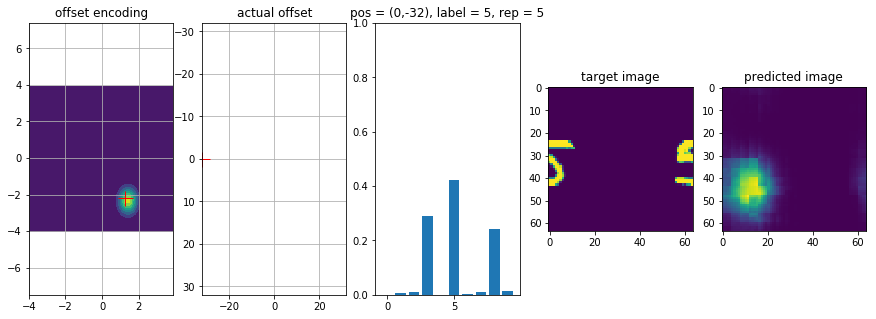

torch.Size([50, 1, 28, 28])
0 -28
[[ 1.8154745  -0.64950204]] [[ 1.64298399 -1.05214329]]


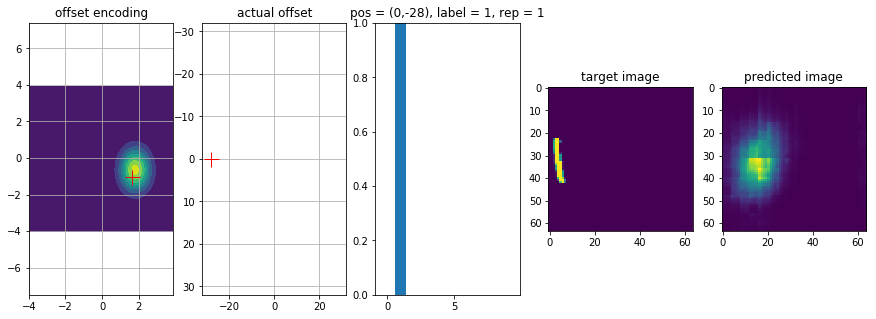

torch.Size([50, 1, 28, 28])
0 -24
[[ 1.51279079 -0.8576118 ]] [[ 1.37709957 -0.800755  ]]


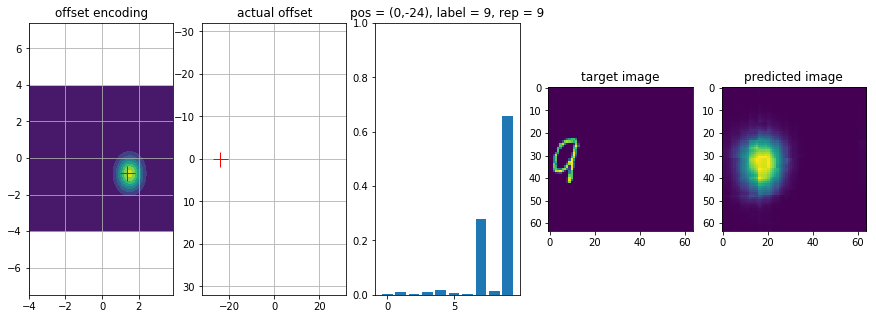

torch.Size([50, 1, 28, 28])
0 -20
[[ 1.60603942 -0.63921268]] [[ 1.96578308 -0.42537061]]


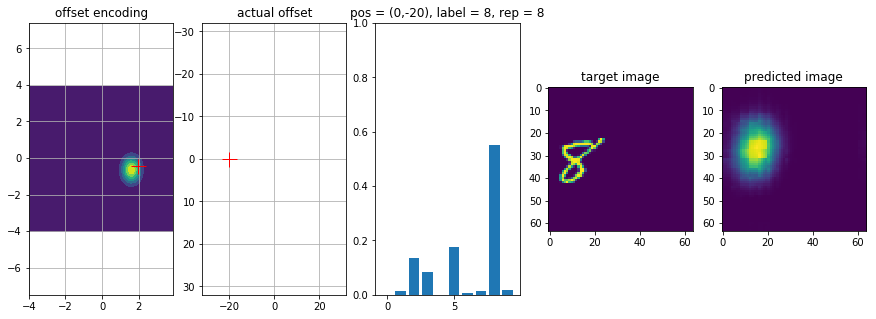

torch.Size([50, 1, 28, 28])
0 -16
[[ 1.36773252 -0.44075818]] [[ 1.52889842 -0.26496805]]


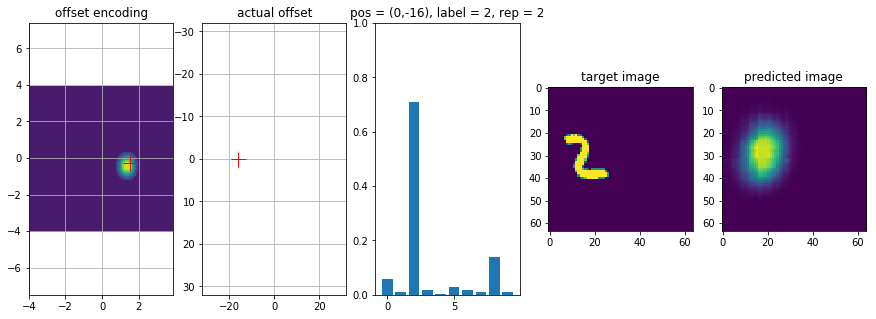

torch.Size([50, 1, 28, 28])
0 -12
[[ 0.92853837 -0.20152934]] [[ 0.87535801  0.11133439]]


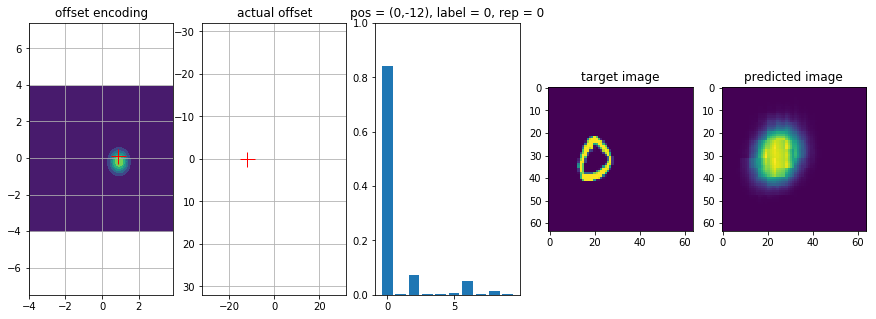

torch.Size([50, 1, 28, 28])
0 -8
[[ 0.65856941  0.0399435 ]] [[ 1.21198394 -0.39552411]]


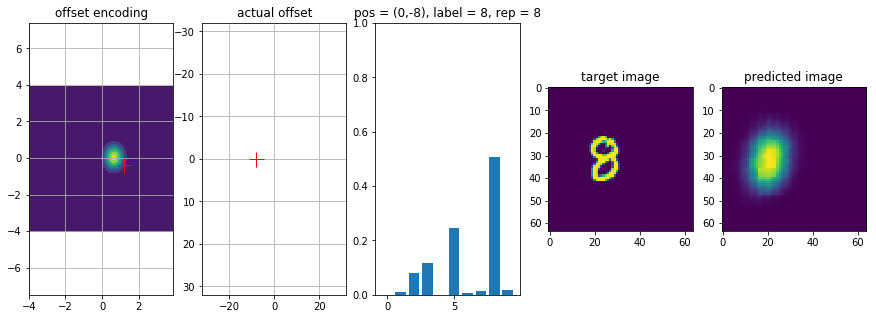

torch.Size([50, 1, 28, 28])
0 -4
[[ 0.28480014  0.05712977]] [[ 0.18528139  0.6500522 ]]


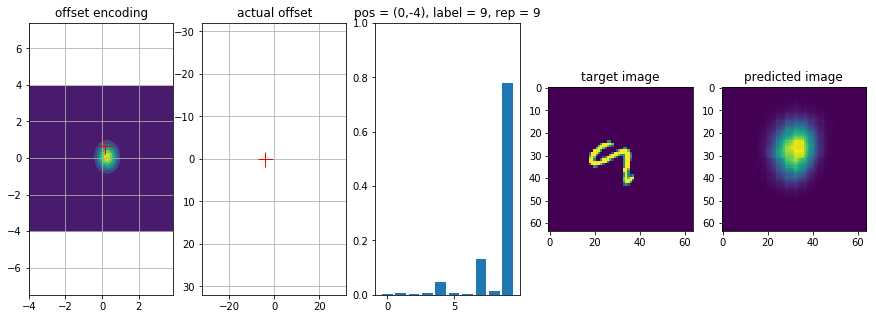

torch.Size([50, 1, 28, 28])
0 0
[[-0.0393299   0.18051872]] [[ 0.47379019  0.38398488]]


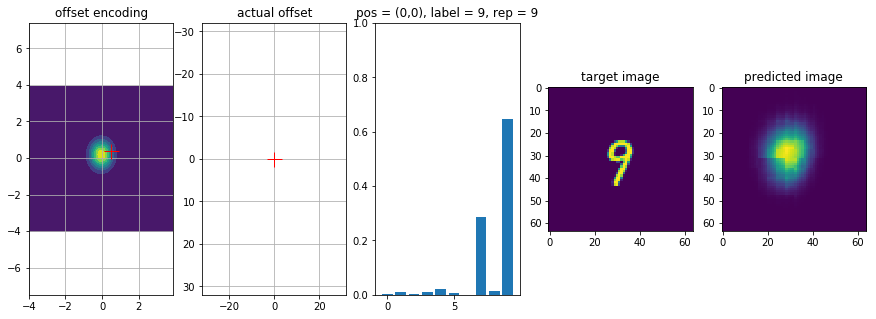

torch.Size([50, 1, 28, 28])
0 4
[[-0.5007042   0.27352415]] [[-0.5538172   1.15237706]]


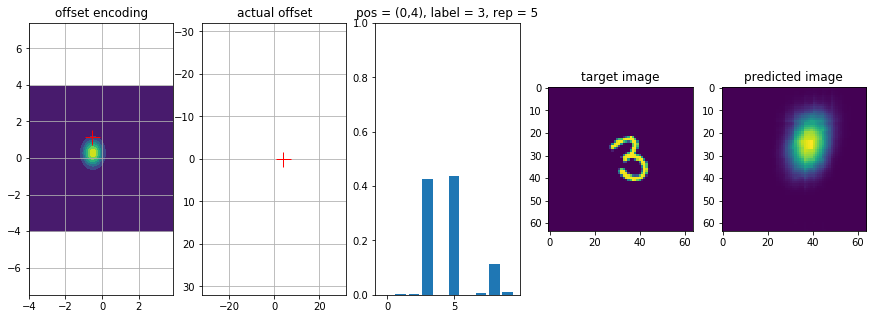

torch.Size([50, 1, 28, 28])
0 8
[[-0.74914945  0.2501748 ]] [[-0.77721802  1.16458392]]


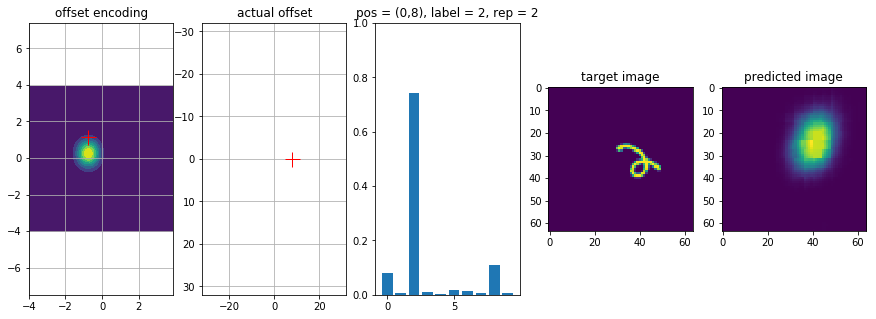

torch.Size([50, 1, 28, 28])
0 12
[[-1.28318971  0.26961202]] [[-1.55465886 -0.56515255]]


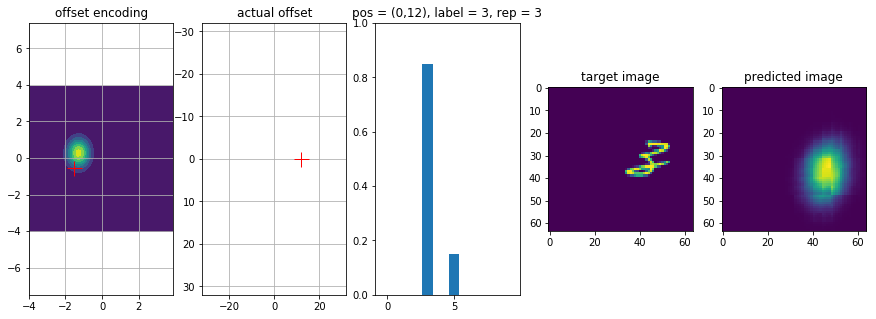

torch.Size([50, 1, 28, 28])
0 16
[[-1.30114616  0.0247009 ]] [[-1.26299271  0.32985712]]


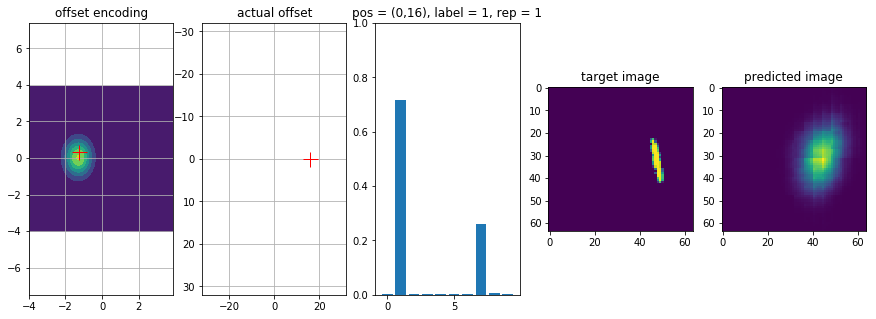

torch.Size([50, 1, 28, 28])
0 20
[[-1.86901835  0.04569487]] [[-1.92919756  0.54971234]]


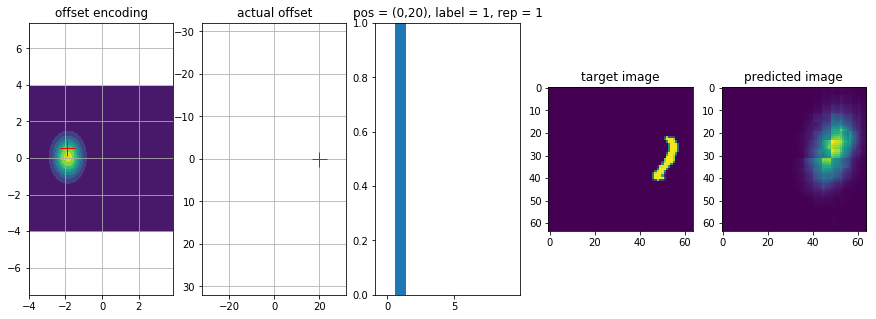

torch.Size([50, 1, 28, 28])
0 24
[[-2.03186761  0.00411144]] [[-2.1857555   0.04864722]]


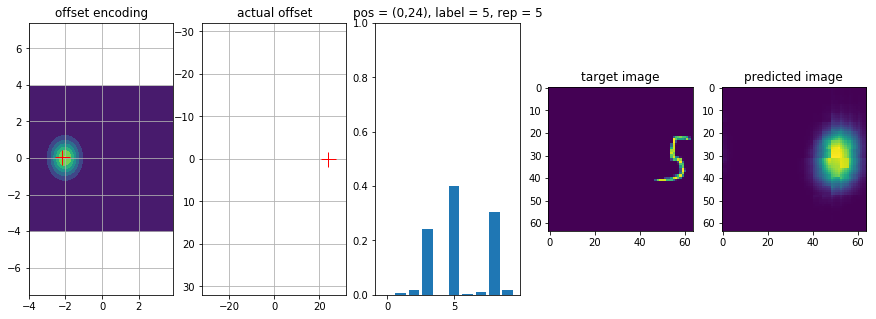

torch.Size([50, 1, 28, 28])
0 28
[[-2.53478795 -0.83563102]] [[-3.18893038 -1.67760995]]


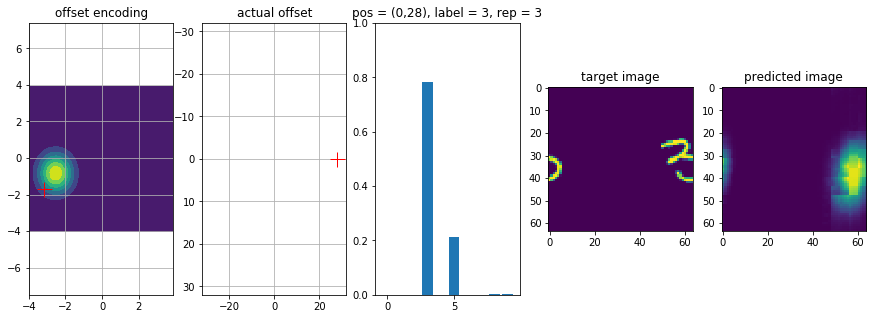

In [19]:
%matplotlib inline
import torch

from Where_act_code_VAE_classif_alt import couples_gen
from scipy.stats import multivariate_normal

import numpy as np
import torch.nn.functional as F


N_test = 10

for _ in range(-32,32,4): #range(N_test):
    '''i_offset = np.random.randint(args.size)
    j_offset = np.random.randint(args.size)'''
#     mid = np.int(ml.args.size / 2)
#     draw = np.random.multivariate_normal((0,0),((1,0),(0,1)))
#     i_offset = min(max(-mid, np.int(draw[0] * mid / 3)), mid)
#     j_offset = min(max(-mid, np.int(draw[1] * mid / 3)), mid)
    data, label = next(iter(ml.dataset.data_loader))
    print (data.shape)  
    idx = 0
    #label[idx] = 0
    i_offset = 0
    j_offset = _
    print(i_offset, j_offset)
    data_full, label_full, pos_full = couples_gen(data[idx, 0, :, :], label[idx], i_offset, j_offset, size=args.size, contrast=1.)
    label_full = np.array(label_full, dtype = 'double')
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(1, 5, figsize=((15, 5)))
    #ax[0].imshow(a_data)
    ax[3].imshow(data_full)
    ax[3].set_title('target image')
   
    x_hat_logit_output, mu_output, logvar_output, u_output, z_hat_logit_output = ml.model(torch.from_numpy(data_full[None, None, :, :]), 
                                                                      torch.from_numpy(label_full[None, :]),
                                                                      torch.from_numpy(pos_full[None, :]))[:5]
    ax[4].imshow(F.sigmoid(x_hat_logit_output.view(64, 64)).detach().numpy())
    ax[4].set_title('predicted image')
    #ax[2].imshow(F.sigmoid(output[0, 0, :, :]).detach().numpy())
    #plt.title("("+str(i_offset)+","+str(j_offset)+"), label = "+str(label[idx].item()))
    #rep = torch.argmax(z_hat_logit_output).detach().numpy()

    #ig, ax = plt.subplots(1, 3, figsize=((13, 5)))
    #ax[0].plot(a_data)
    ax[1].plot(j_offset, i_offset, 'r+', ms = 15)
    ax[1].set_xlim([-32, 32])
    ax[1].set_ylim([32, -32])
    ax[1].xaxis.grid(True)
    ax[1].yaxis.grid(True)
    ax[1].set_title('actual offset')
    
    u_offset = u_output[:,:2].detach().numpy()
    mu_offset = mu_output[:,:2].detach().numpy()
    logvar_offset = logvar_output[:,:2].detach().numpy()
    DIM1 = 0
    DIM2 = 1
    axe_x, axe_y = np.mgrid[-4:4:.1, -4:4:.1]
    q = multivariate_normal(mu_offset[0], np.exp(logvar_offset[0]) * np.eye(2))
    pos = np.empty(axe_x.shape + (2,))
    pos[:, :, DIM1] = axe_x; pos[:, :, DIM2] = axe_y

    print(mu_offset, u_offset)
    ax[0].contourf(axe_x, axe_y, q.pdf(pos))
    ax[0].plot(u_offset[0][0], u_offset[0][1], 'r+', ms = 15)
    ax[0].xaxis.grid(True)
    ax[0].set_xlim([-4, 4])
    ax[0].set_ylim([-4, 4])
    ax[0].yaxis.grid(True)
    ax[0].set_title('offset encoding')    
    ax[0].axis('equal')
    
    '''ax[2].imshow(F.sigmoid(x_hat_logit_output.view(64, 64)).detach().numpy())
    ax[2].set_title('predicted image')'''
    rep = torch.argmax(z_hat_logit_output).detach().numpy()
    ax[2].bar(np.arange(10), F.softmax(z_hat_logit_output[0,:]).detach().numpy())
    ax[2].set_ylim([0,1])
    ax[2].set_title("pos = ("+str(i_offset)+","+str(j_offset)+"), label = "+str(label[idx].item())+', rep = '+str(rep))

    
    plt.show()    

Apres environ 100 epoques

In [ ]:

%matplotlib inline
import torch

from Where_act_code_VAE_classif_alt import couples_gen
from scipy.stats import multivariate_normal

import numpy as np
import torch.nn.functional as F


N_test = 10

for _ in range(-32,32,4): #range(N_test):
    '''i_offset = np.random.randint(args.size)
    j_offset = np.random.randint(args.size)'''
#     mid = np.int(ml.args.size / 2)
#     draw = np.random.multivariate_normal((0,0),((1,0),(0,1)))
#     i_offset = min(max(-mid, np.int(draw[0] * mid / 3)), mid)
#     j_offset = min(max(-mid, np.int(draw[1] * mid / 3)), mid)
    data, label = next(iter(ml.dataset.data_loader))
    print (data.shape)  
    idx = 0
    #label[idx] = 0
    i_offset = 0
    j_offset = _
    print(i_offset, j_offset)
    data_full, label_full, pos_full = couples_gen(data[idx, 0, :, :], label[idx], i_offset, j_offset, size=args.size, contrast=1.)
    label_full = np.array(label_full, dtype = 'double')
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(1, 4, figsize=((15, 5)))
    #ax[0].imshow(a_data)
    ax[3].imshow(data_full)
    ax[3].set_title('target image')
   
    mu_output, logvar_output, u_output, x_hat_logit_output = ml.model(torch.from_numpy(data_full[None, None, :, :]), 
                                                                      torch.from_numpy(label_full[None, :]),
                                                                      torch.from_numpy(pos_full[None, :]))[6:10]
    #ax[2].imshow(F.sigmoid(output[0, 0, :, :]).detach().numpy())
    #plt.title("("+str(i_offset)+","+str(j_offset)+"), label = "+str(label[idx].item()))
    #rep = torch.argmax(z_hat_logit_output).detach().numpy()

    #ig, ax = plt.subplots(1, 3, figsize=((13, 5)))
    #ax[0].plot(a_data)
    ax[1].plot(j_offset, i_offset, 'r+', ms = 15)
    ax[1].set_xlim([-32, 32])
    ax[1].set_ylim([32, -32])
    ax[1].xaxis.grid(True)
    ax[1].yaxis.grid(True)
    ax[1].set_title('actual offset')
    
    u_offset = u_output.detach().numpy()
    mu_offset = mu_output.detach().numpy()
    logvar_offset = logvar_output.detach().numpy()
    DIM1 = 0
    DIM2 = 1
    axe_x, axe_y = np.mgrid[-4:4:.1, -4:4:.1]
    q = multivariate_normal(mu_offset[0], np.exp(logvar_offset[0]) * np.eye(2))
    pos = np.empty(axe_x.shape + (2,))
    pos[:, :, DIM1] = axe_x; pos[:, :, DIM2] = axe_y

    print(mu_offset, u_offset)
    ax[0].contourf(axe_x, axe_y, q.pdf(pos))
    ax[0].plot(u_offset[0][0], u_offset[0][1], 'r+', ms = 15)
    ax[0].xaxis.grid(True)
    ax[0].set_xlim([-4, 4])
    ax[0].set_ylim([-4, 4])
    ax[0].yaxis.grid(True)
    ax[0].set_title('offset encoding')    
    ax[0].axis('equal')
    
    ax[2].imshow(F.sigmoid(x_hat_logit_output.view(64, 64)).detach().numpy())
    ax[2].set_title('predicted image')
    
    plt.show()    

In [ ]:
from Where_act_code_VAE_classif_alt import couples_gen
data, label = next(iter(ml.dataset.data_loader))
idx = 0
for _ in range(10):
    #label[idx] = z
    idx = 1
    i_offset = 0
    j_offset = _ 
    print(i_offset, j_offset)
    data_full, label_full, pos_full = couples_gen(data[idx, 0, :, :], label[idx], i_offset, j_offset, size=args.size, contrast=1.)
    label_full = np.array(label_full, dtype = 'double')
    x, d1, d2 = ml.model(torch.from_numpy(data_full[None, None, :, :]), 
                        torch.from_numpy(label_full[None, :]),
                        torch.from_numpy(pos_full[None, :]))[9:]
    plt.plot(d1.detach().numpy(),d2.detach().numpy(),'.')
    plt.xlim([-4, 4])
    plt.ylim([-4, 4])
    plt.show()



In [ ]:
_ = plt.plot(data_full)

In [ ]:
size = 256
grid_x, grid_y = np.abs(np.mgrid[-size/2:size/2, -size/2:size/2]) * 8 / size
pos = np.empty((size, size, 2))
pos[:, :, 0] = grid_x; pos[:, :, 1] = grid_y
d = multivariate_normal([0, 0], [[1, 0], [0, 1]])
mask = d.pdf(pos)
mask2 = np.exp(-20 * mask)
_ = plt.imshow(mask2)

In [ ]:
np.random.randn(5)

In [ ]:
output = ml.model(torch.from_numpy(data_full[None, None, :, :]))#.double())
output.shape

In [ ]:
output = torch.from_numpy(data_full[None, None, :, :].astype(np.float))
output.shape

In [ ]:
output = ml.model(torch.from_numpy(data_full[None, None, :, :])).detach().numpy()[0, 0, :, :]
output.shape

In [ ]:
output.min(), output.max()

In [ ]:
_ = plt.plot(a_data)

In [ ]:
draw = np.random.multivariate_normal((0,0),((1,0),(0,1)))

In [ ]:
plt.plot(ml.model.deconv1.bias.detach().numpy())

In [ ]:
plt.plot((1 + np.tanh(ml.model.fc4.bias.detach().numpy()))/2)

In [ ]:
plt.imshow(np.reshape(ml.model.fc4.bias.detach().numpy(),(64,64)))

In [ ]:
data, foo = next(iter(ml.dataset.data_loader))

In [ ]:
foo

In [ ]:
target_full = np.zeros(10, dtype = 'int')

In [ ]:
target_full

In [ ]:
loss_u = torch.zeros(1)

In [ ]:
torch.distributions.multinomial.Multinomial(